In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def E(q, r0, x, y):
   """Return the artificial field vector E=(Ex,Ey) due to cone q at r0."""
   den = ((x-r0[0])**2 + (y-r0[1])**2)**1.1
   return -q * (y - r0[1]) / den, q * (x - r0[0]) / den

In [3]:
# Grid of x, y points
nx, ny = 40, 40
x = np.linspace(-20, 20, nx)
y = np.linspace(-20, 20, ny)
X, Y = np.meshgrid(x, y)

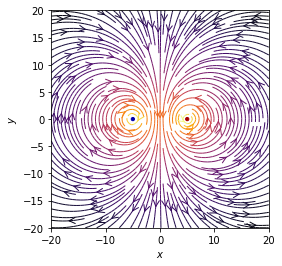

In [4]:
cones = []
cones.append((1, (5.0, 0.0)))
cones.append((-1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.rc('figure', figsize= ( 15.0, 15.0))
plt.show()

Classic positive and negative charge field vector plot. The orange color indicates a stronger force and then 'cools' off to the weaker black color. 

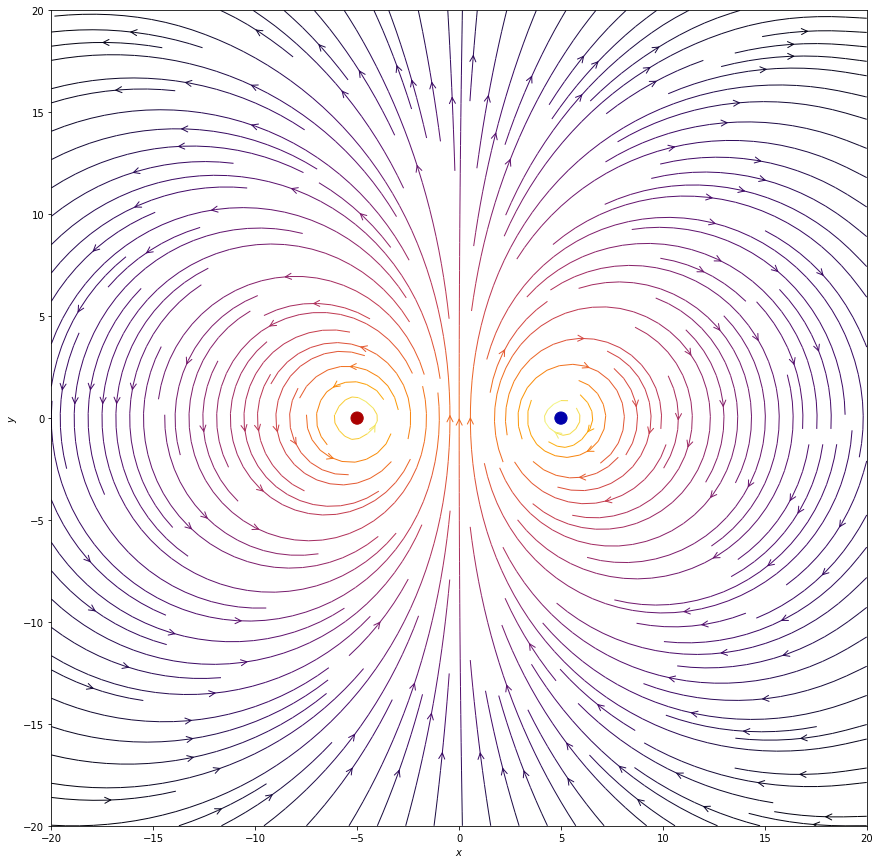

In [5]:
cones = []
cones.append((-1, (5.0, 0.0)))
cones.append((1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2.0 + Ey**2.0))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Now you can see that you have a force vector that shows you the way between the two cones. How it works is a negative blue cone has a clockwise force so you pass by the blue cones on the left side. For red cones the force is changed to positive and the force is counter clockwise. Red cones you pass on the right.   

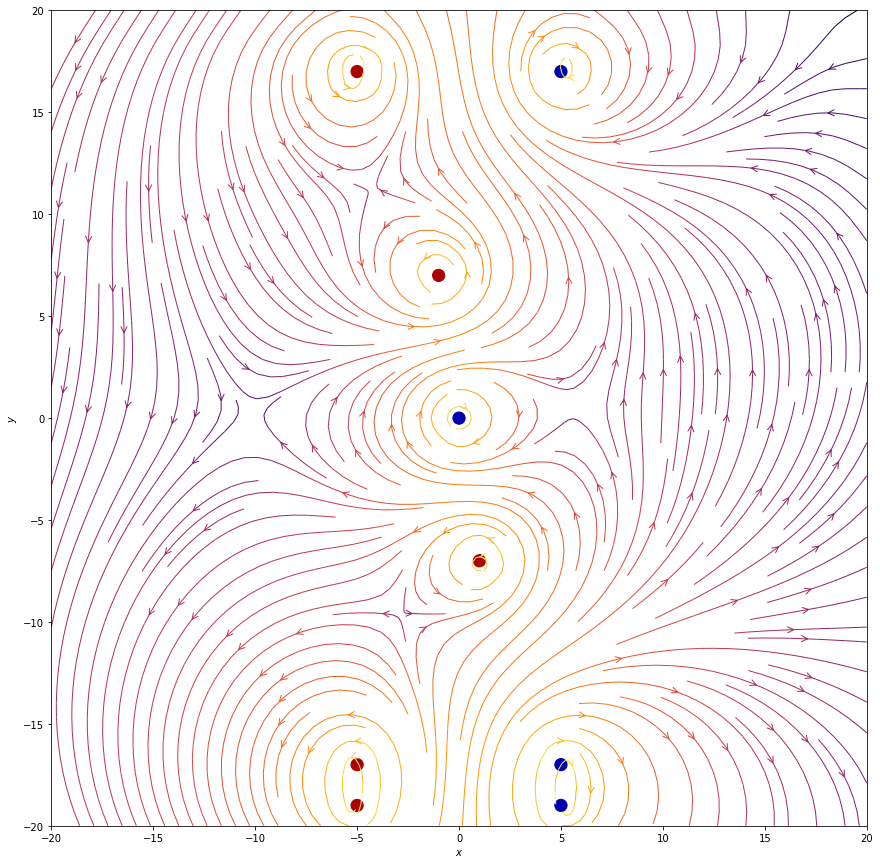

In [6]:


cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Imagine starting at point (0,-20). The force would be in the upwards direction. As you move up, the force would start pushing you to the right. When as you pass the first blue cone in the slalom you are directed right between the blue and the red cones. Then back between the red and the last blue cone in the slalom. Then the force directs you across the finish line at (0,17). Now if you get really off the 'line' then the force vectors are weaked and influenced by all the cones. The idea is that the cones you are closest too will have the strongest influence on your direction. My next step is to develop the code to step the virtual car through the course guided by the force. ;)

In [7]:
cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 0.0
Ypos = -19.0
path = []
speed = 1.0
tries = 0
angle = -np.pi/2.0
print(Xpos, Ypos)
while not(Xpos < 5.0 and Xpos > -5.0 and Ypos > 17.0) and tries < 80:
    Ex = 0.0
    Ey = 0.0
    for cone in cones:
        ex, ey = E(*cone, x=Xpos, y=Ypos)
        Ex += ex
        Ey += ey
    
    #print(Ex,Ey)
    angle = np.arctan2(Ey, Ex)    
    print(np.arctan2(Ey, Ex)*180/np.pi)
    newx=  np.cos(angle) * speed
    newy= np.sin(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    print (newx, newy)
    print(Xpos, Ypos)
    #time.sleep(.5)

0.0 -19.0
85.6166419404
0.0764294242892 0.997074993721
0.0764294242892 -18.0029250063
85.3064451967
0.0818263964685 0.996646597767
0.158255820758 -17.0062784085
83.930922372
0.105727414479 0.994395149741
0.263983235237 -16.0118832588
81.2203410724
0.152634987108 0.988282631999
0.416618222345 -15.0236006268
76.7478021592
0.229237729152 0.973370465718
0.645855951497 -14.0502301611
70.0766389998
0.340762902175 0.940149267139
0.986618853672 -13.1100808939
61.2219306139
0.48141822243 0.876491012568
1.4680370761 -12.2335898813
51.7184039987
0.619526921515 0.784975409499
2.08756399762 -11.4486144718
44.9331688354
0.707931086199 0.706281514123
2.79549508382 -10.7423329577
43.3409810442
0.727282037114 0.686338719942
3.52277712093 -10.0559942378
46.6123530422
0.686930844423 0.726722791015
4.20970796535 -9.32927144677
53.2806812641
0.597895452142 0.801574094085
4.8076034175 -8.52769735268
62.1864242272
0.466596221573 0.884470443833
5.27419963907 -7.64322690885
72.6876423011
0.297580792388 0.95469

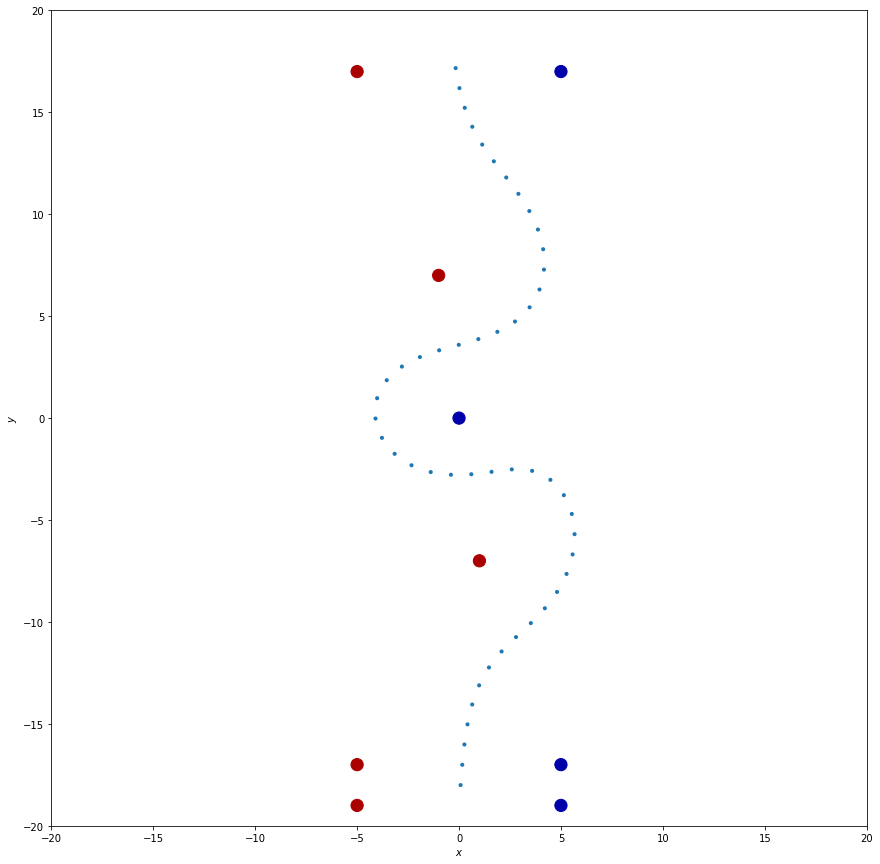

In [8]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.1))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


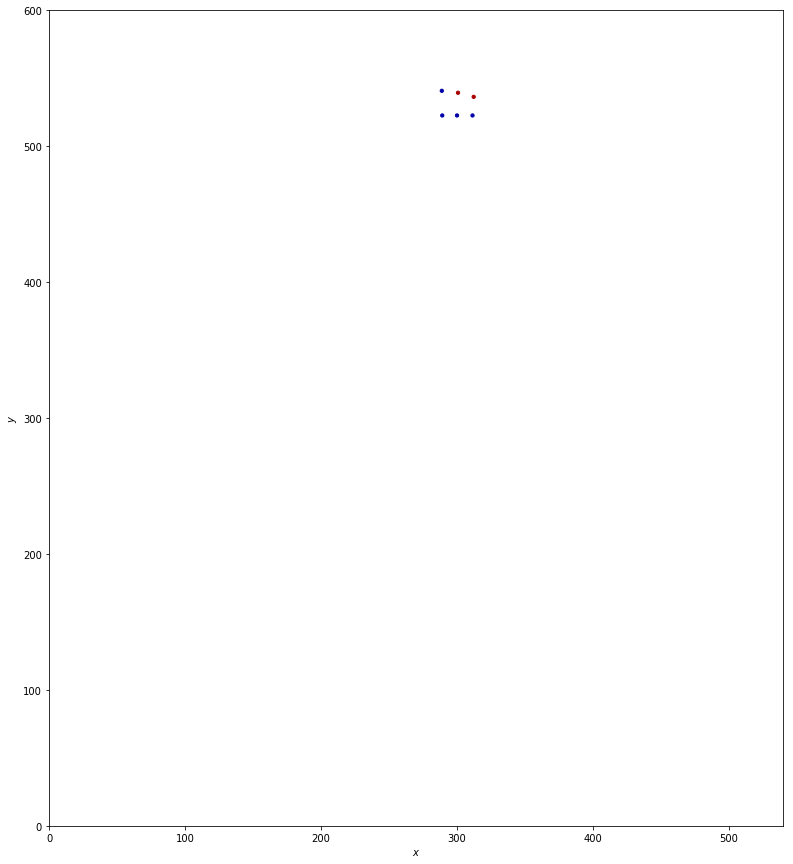

angle -90.0
move (0.8036598368525063, -0.59508895690493446)
293.803659837 557.404911043
1
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


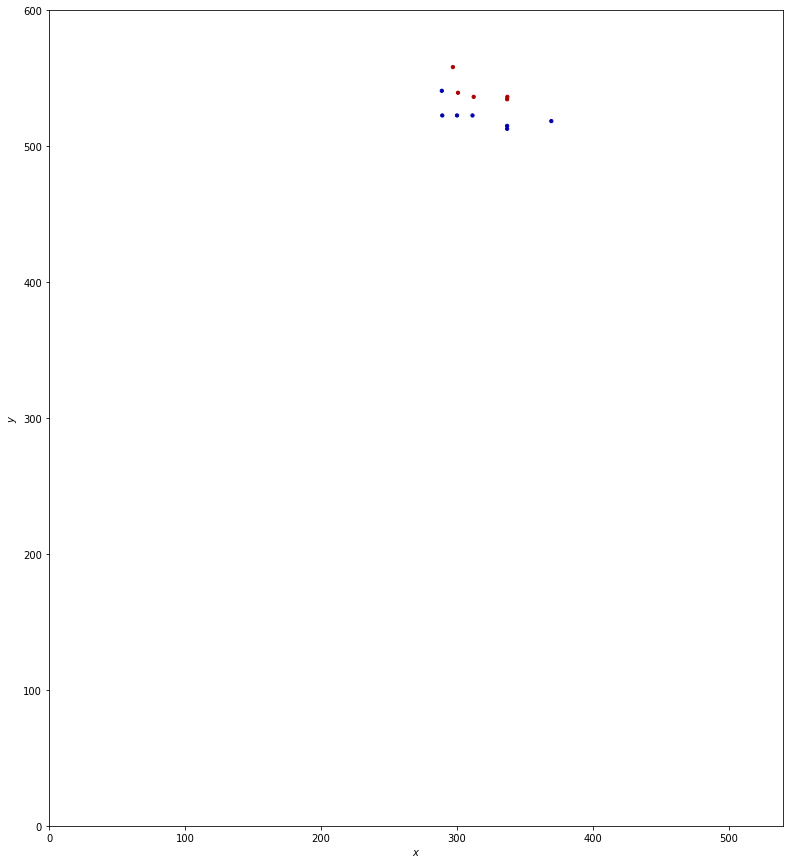

angle -36.5189738947
move (0.35029775639270988, -0.93663839440108032)
294.153957593 556.468272649
2
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


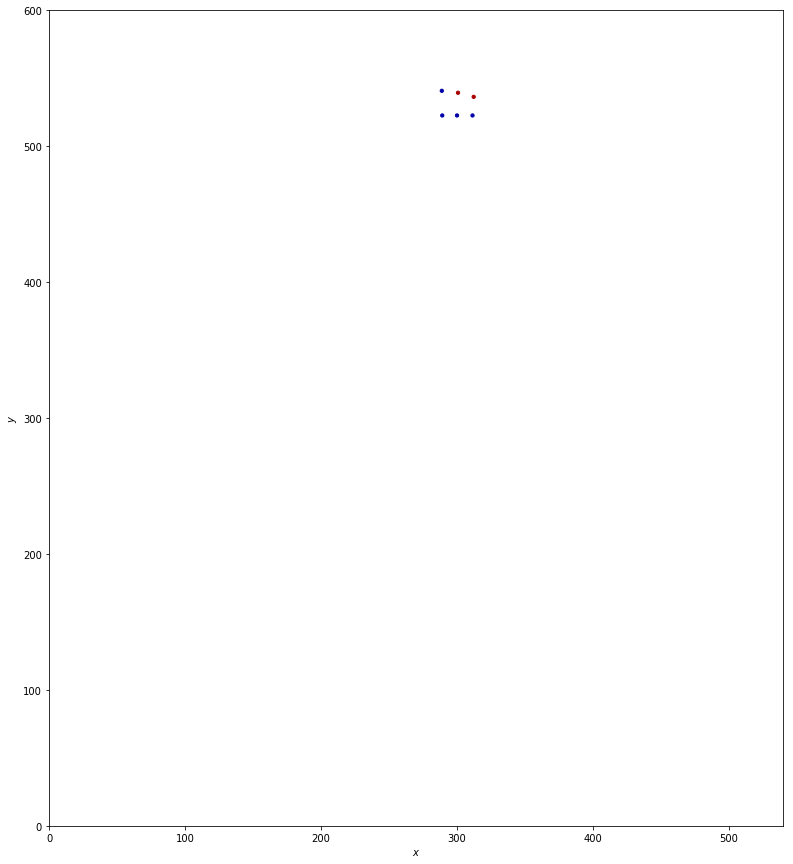

angle -69.4944716976
move (0.72757328202771243, -0.68602996966562824)
294.881530875 555.782242679
3
yes -1 (337.0497, 515.0402)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


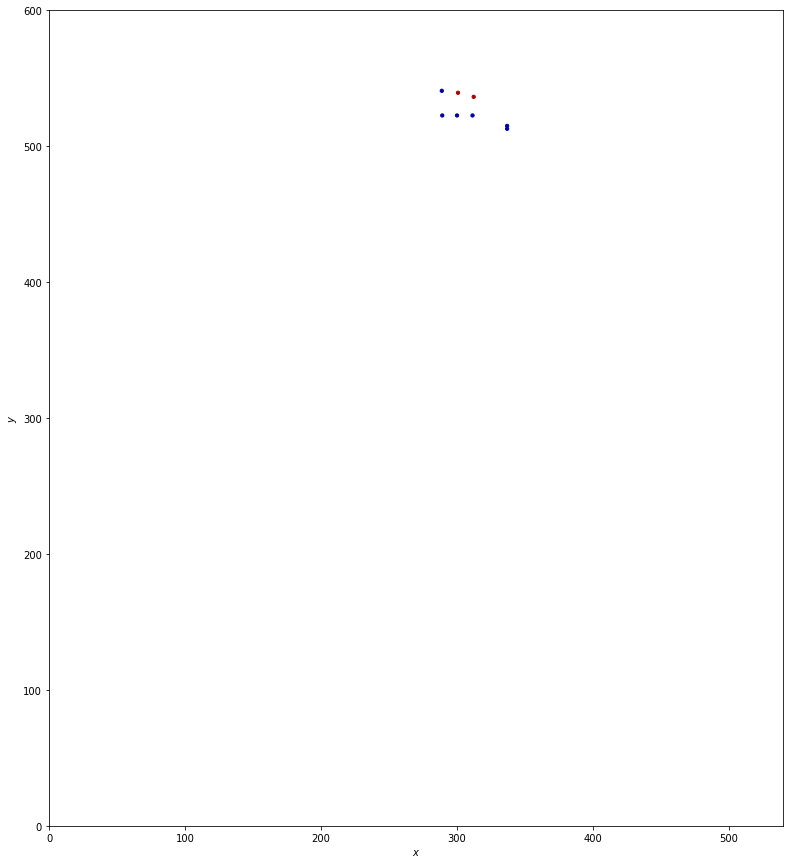

angle -43.3166623546
move (0.88026179577079122, -0.47448832536362984)
295.761792671 555.307754354
4
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)


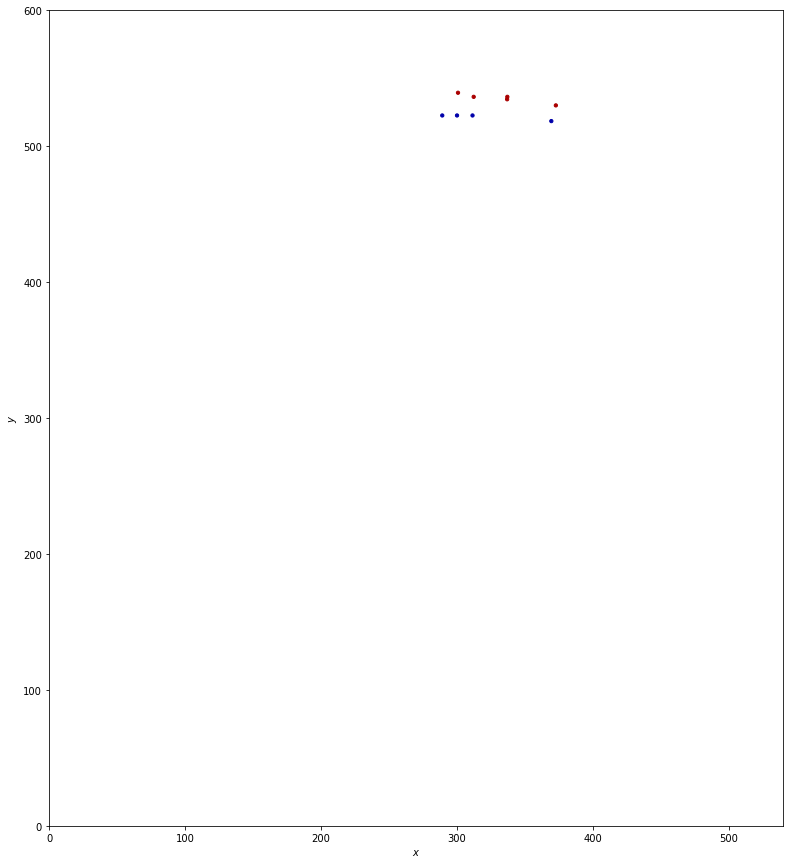

angle -28.3260401728
move (-0.35510344889134393, -0.93482701104828625)
295.406689222 554.372927343
5
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)


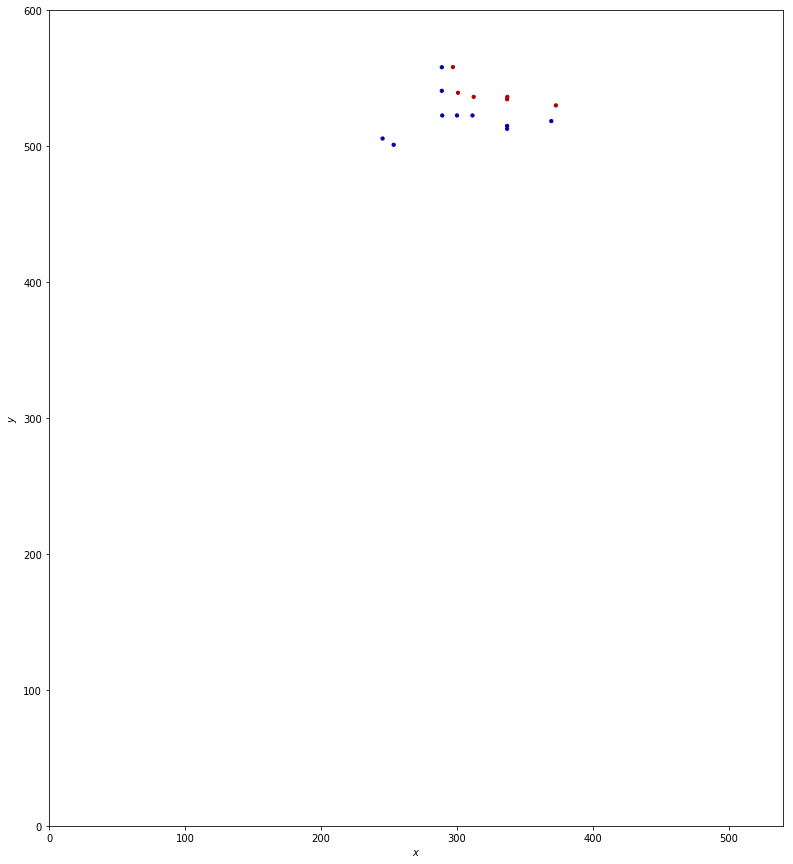

angle -110.799784656
move (0.60674426146628169, -0.79489710099970579)
296.013433484 553.578030242
6
yes -1 (337.0497, 515.0402)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


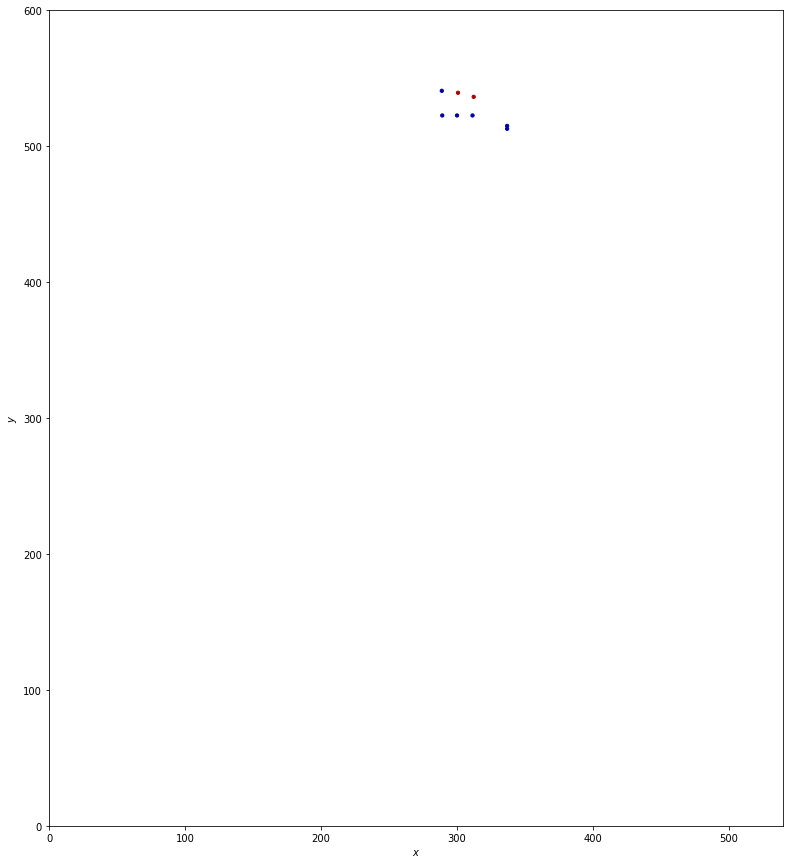

angle -52.6455376578
move (0.76980482301126962, -0.63827935456866203)
296.783238307 552.939750887
7
yes -1 (337.0497, 515.0402)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)


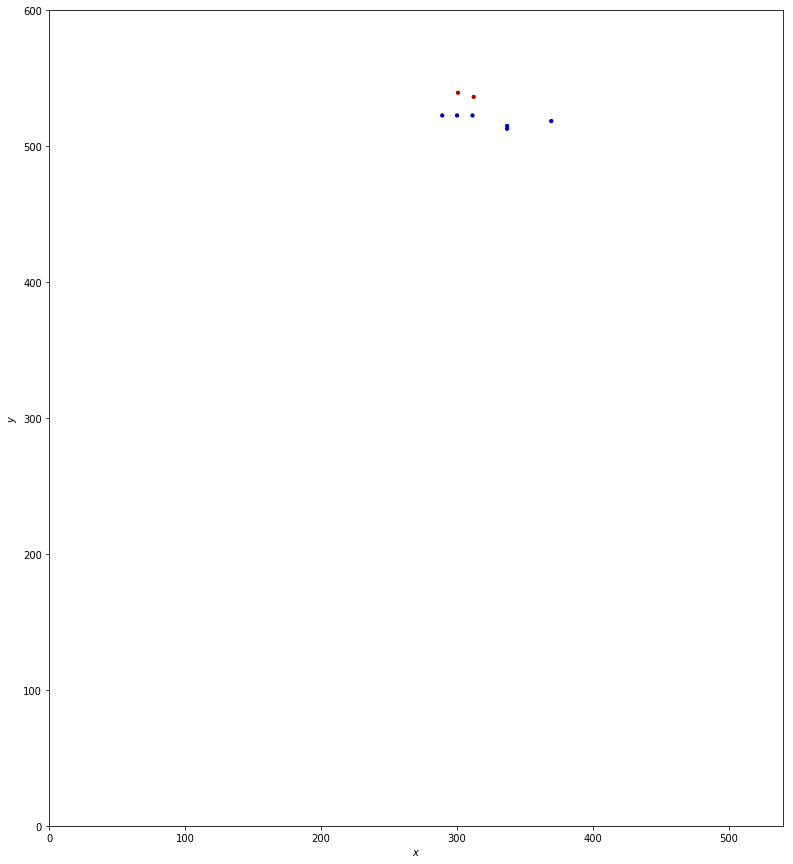

angle -39.6636346352
move (0.2283678651295801, -0.97357491657096318)
297.011606172 551.96617597
8
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


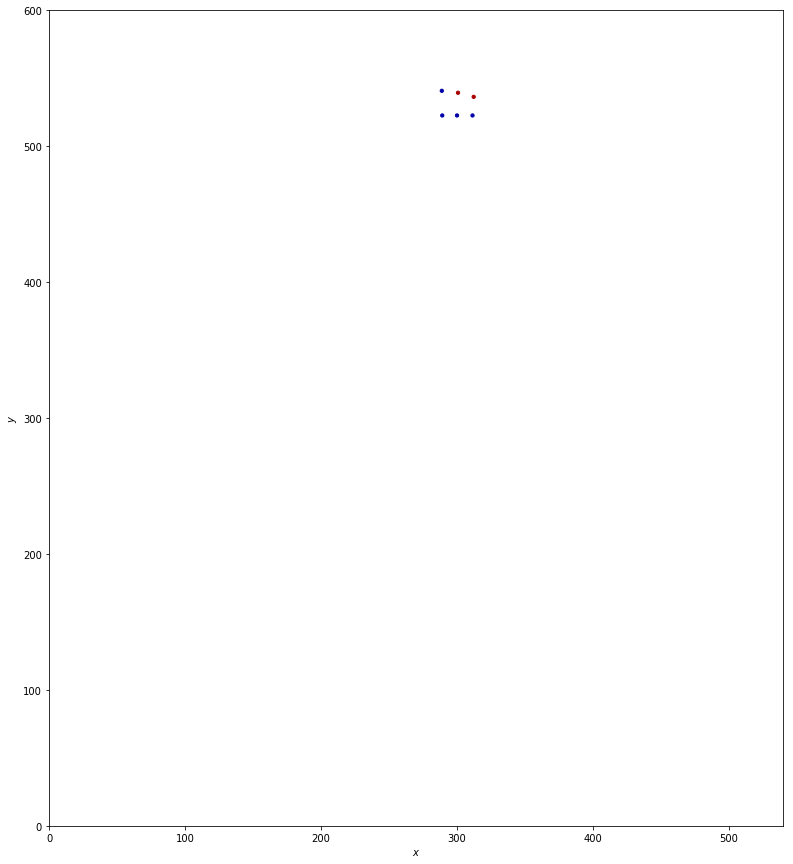

angle -76.7989998295
move (0.37885940740436941, -0.92545423950685424)
297.390465579 551.040721731
9
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


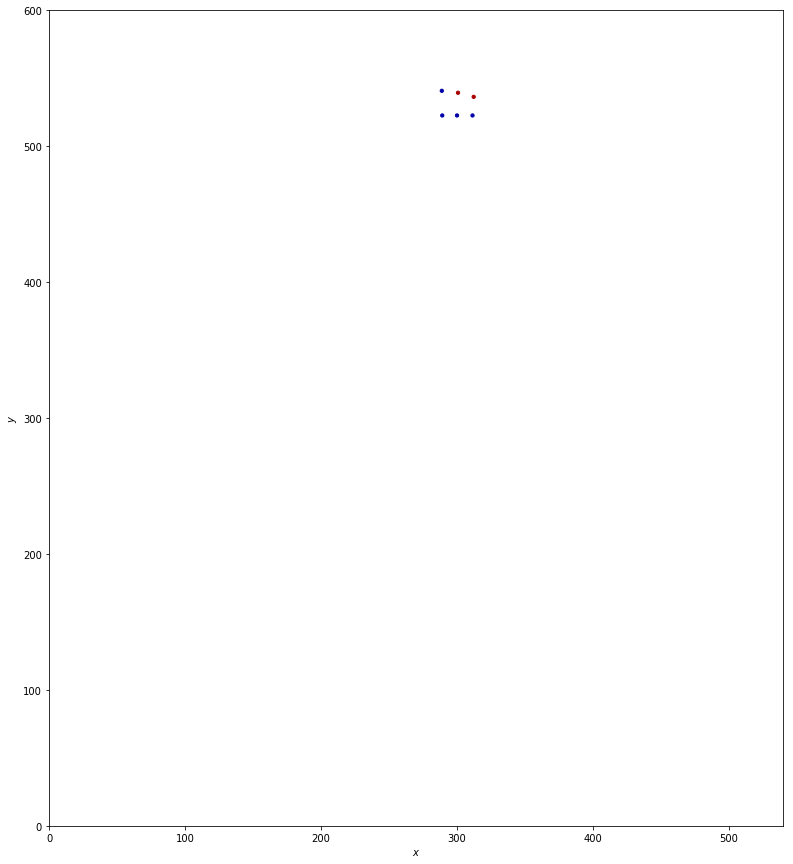

angle -67.7369503894
move (0.29248137483133146, -0.95627121956941386)
297.682946954 550.084450511
10
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


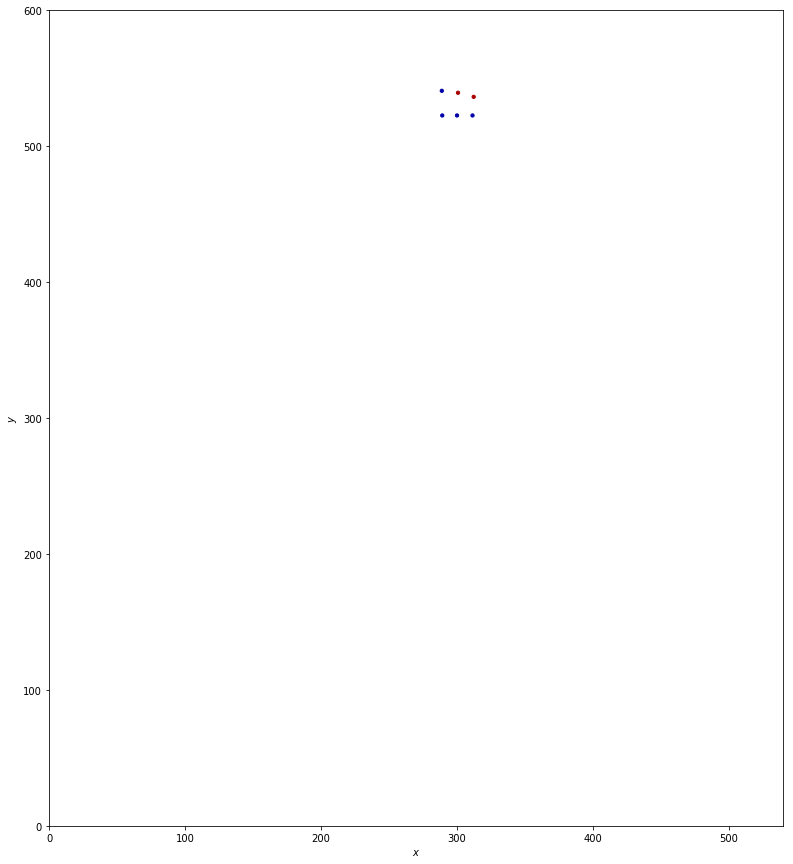

angle -72.9934291401
move (0.2034127195052981, -0.9790930831864042)
297.886359674 549.105357428
11
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


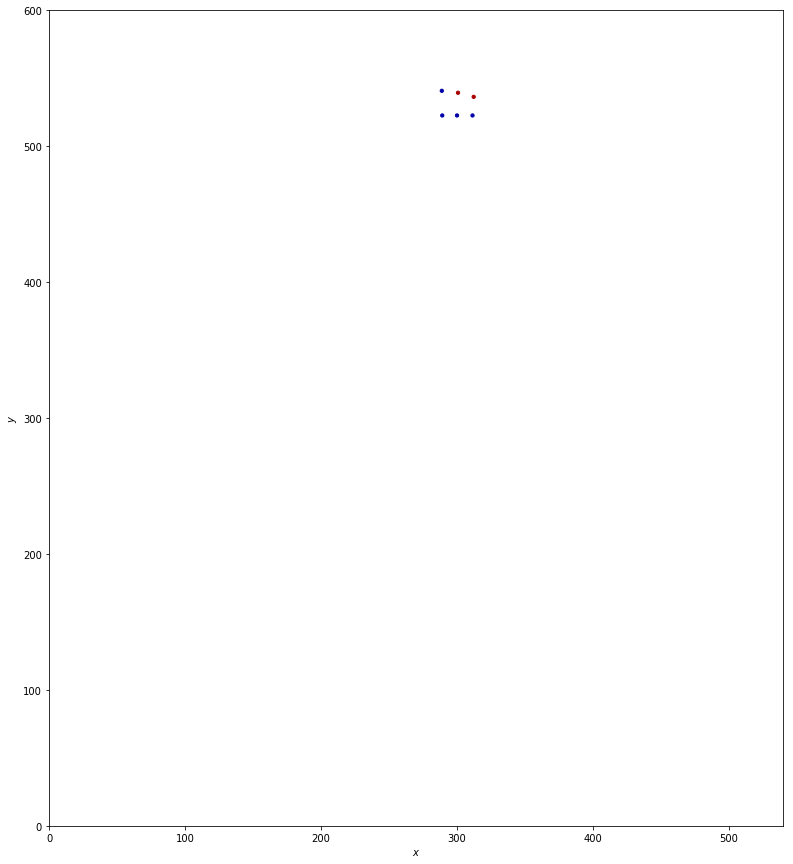

angle -78.2634030822
move (0.11418987108611912, -0.99345894396363232)
298.000549545 548.111898484
12
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


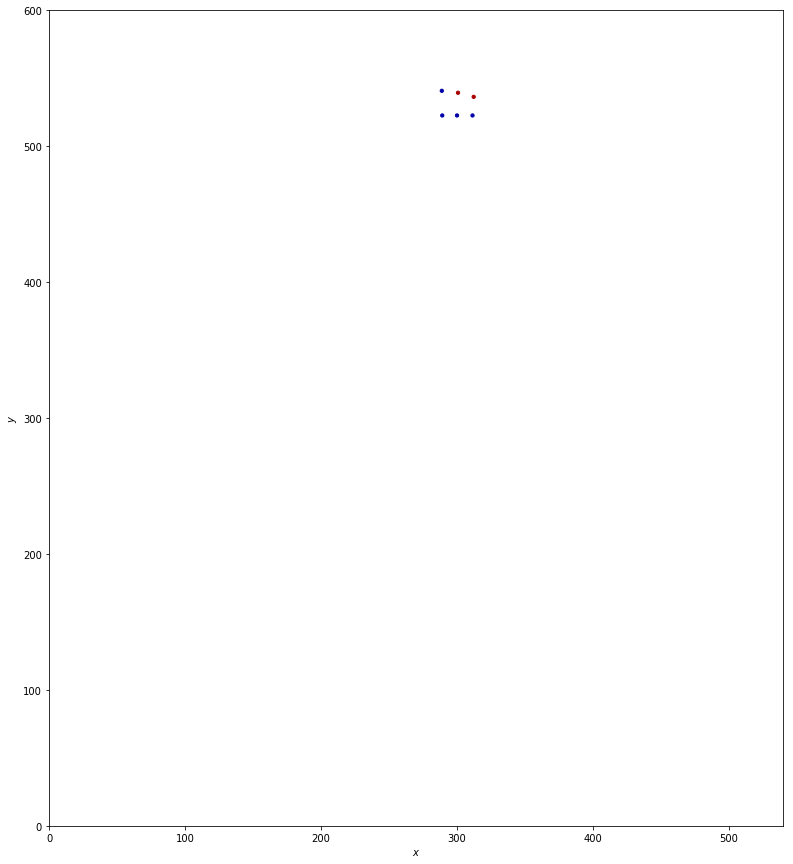

angle -83.443099729
move (0.028122670213831157, -0.99960447949178588)
298.028672215 547.112294005
13
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


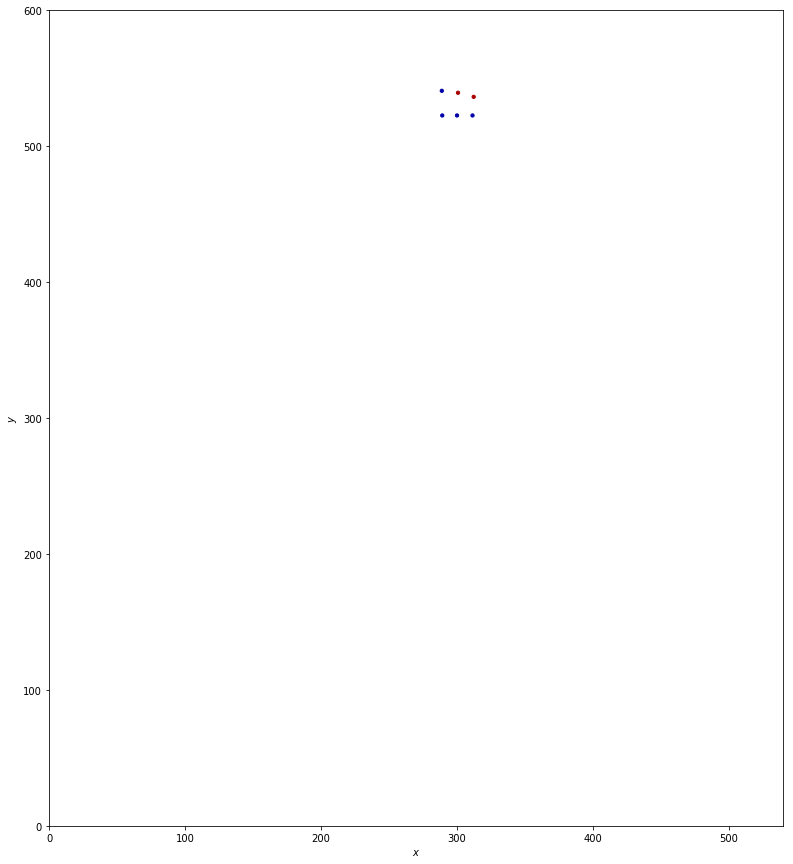

angle -88.3884772191
move (-0.050590026143757579, -0.99871950479339988)
297.978082189 546.1135745
14
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


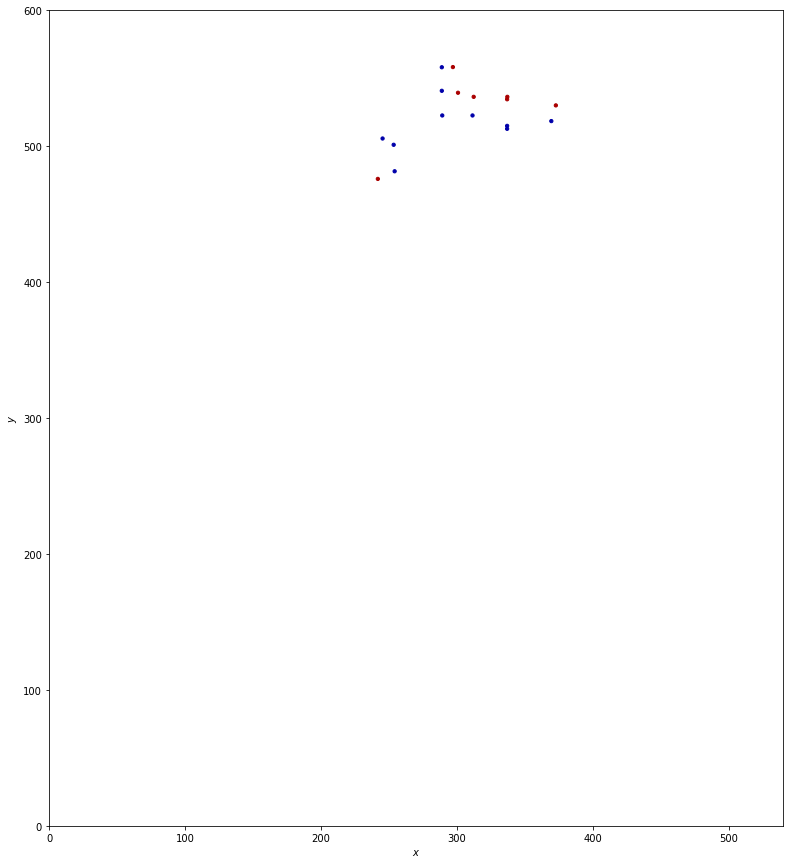

angle -92.8998328299
move (-0.0073083004302394294, -0.99997329401580592)
297.970773888 545.113601206
15
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


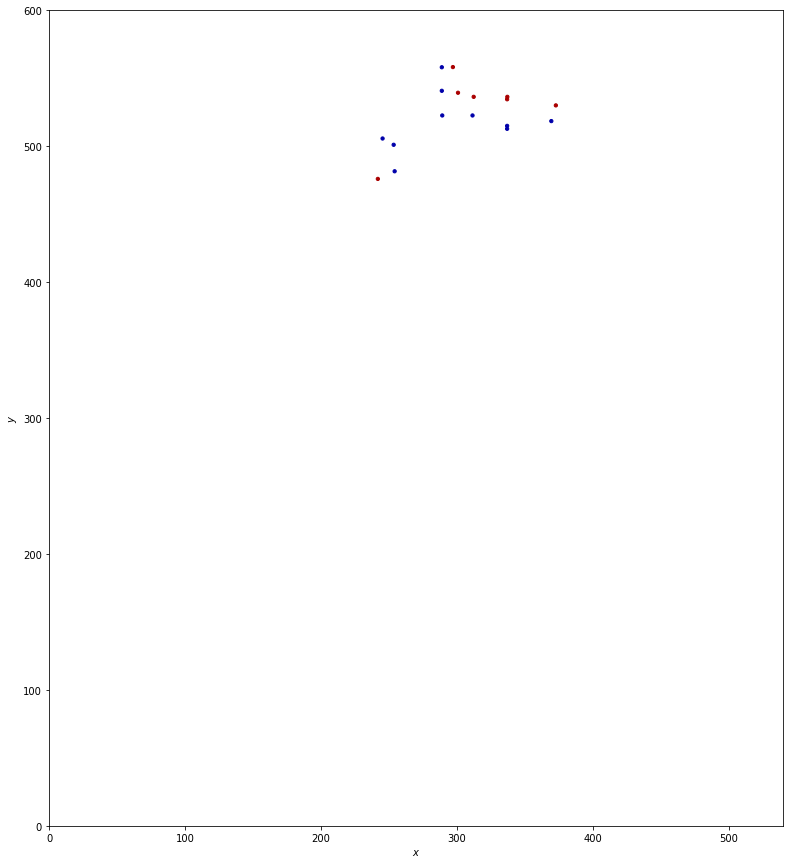

angle -90.4187384977
move (-0.096925326290857663, -0.99529165631156113)
297.873848562 544.11830955
16
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


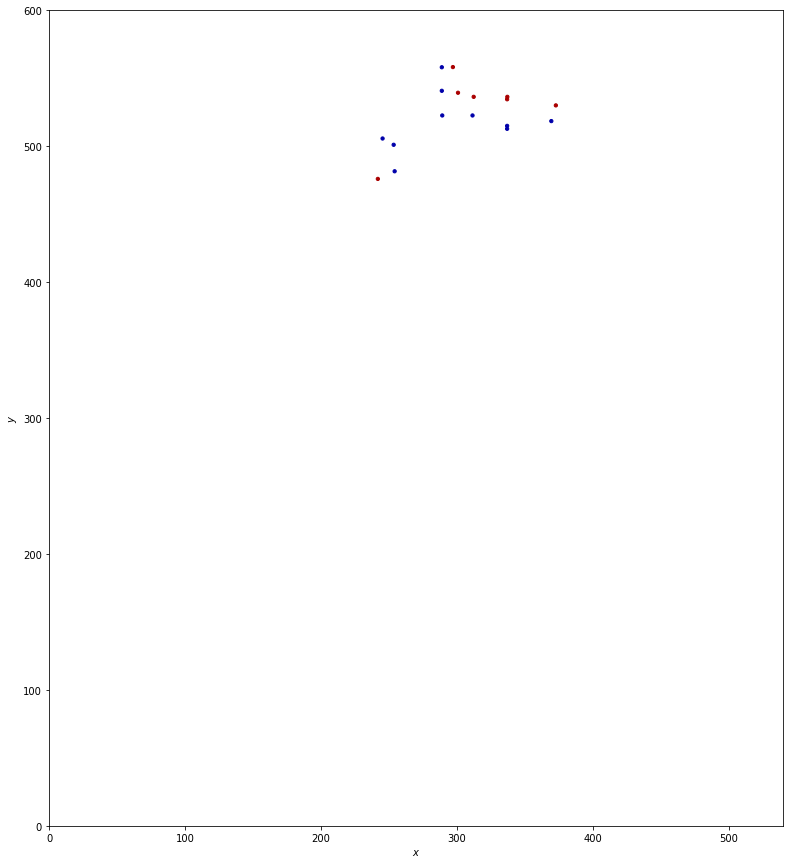

angle -95.5621443633
move (-0.15778847587162809, -0.98747293475928166)
297.716060086 543.130836615
17
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


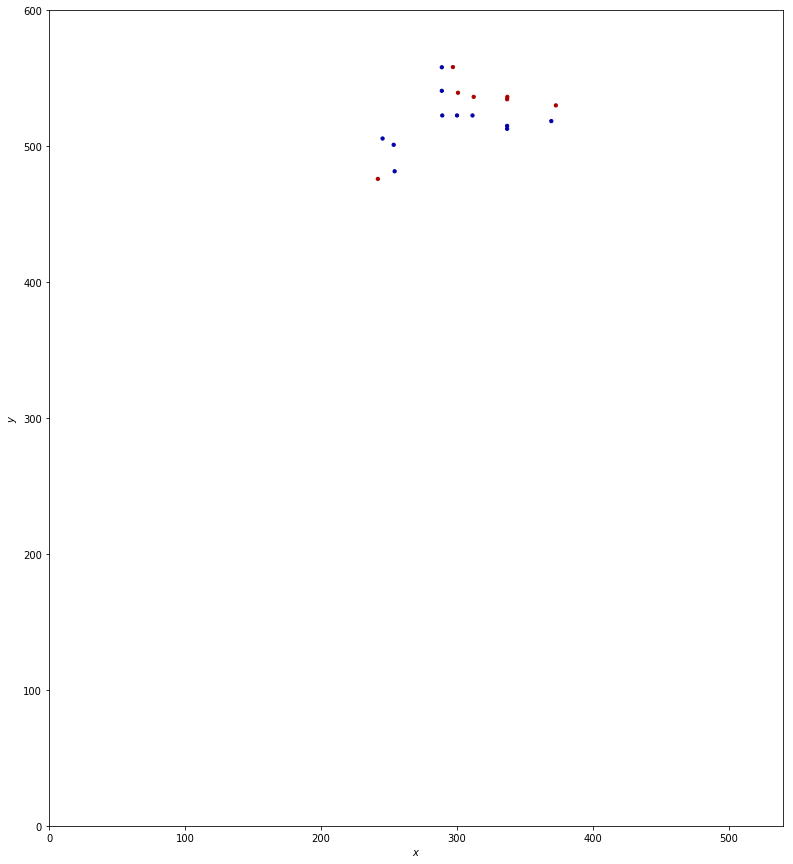

angle -99.0785546931
move (-0.0681618281206917, -0.99767427810245024)
297.647898258 542.133162337
18
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


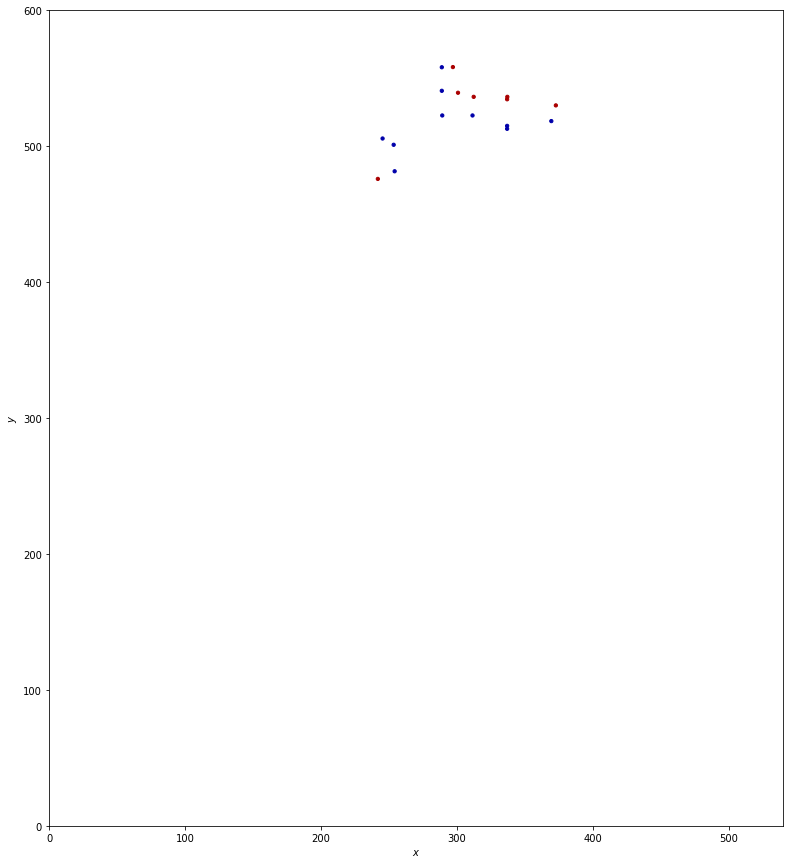

angle -93.9084155078
move (-0.17280101449887511, -0.9849567550852979)
297.475097243 541.148205582
19
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


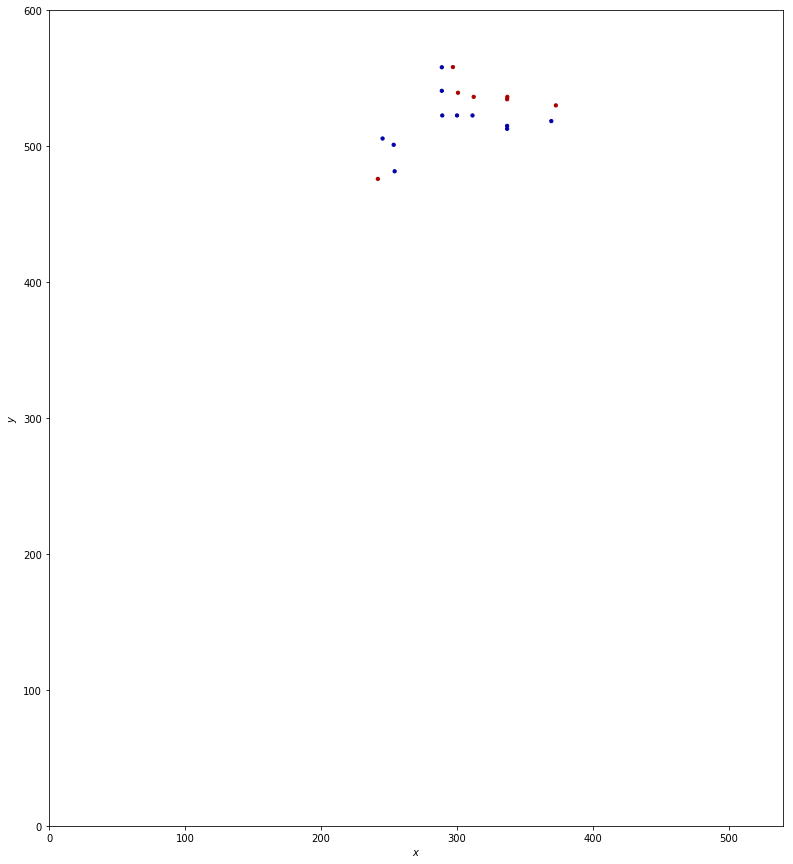

angle -99.9507160669
move (-0.0026138830536240687, -0.99999658380185574)
297.47248336 540.148208998
20
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)


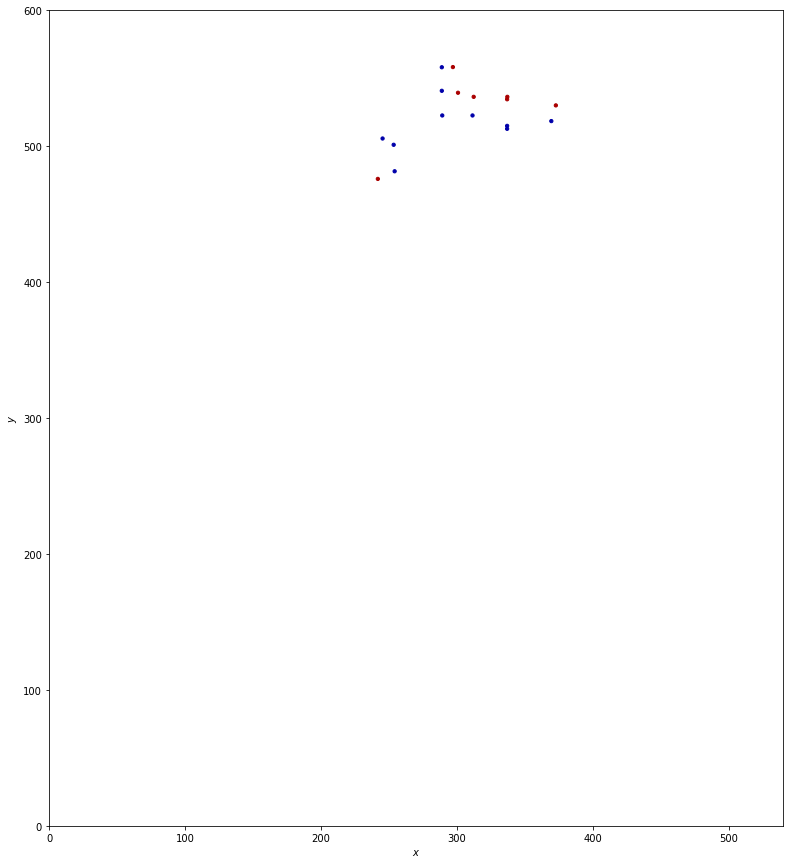

angle -90.1497646377
move (0.018470450789086299, -0.99982940667278231)
297.490953811 539.148379591
21
yes 1 (312.4497, 536.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)


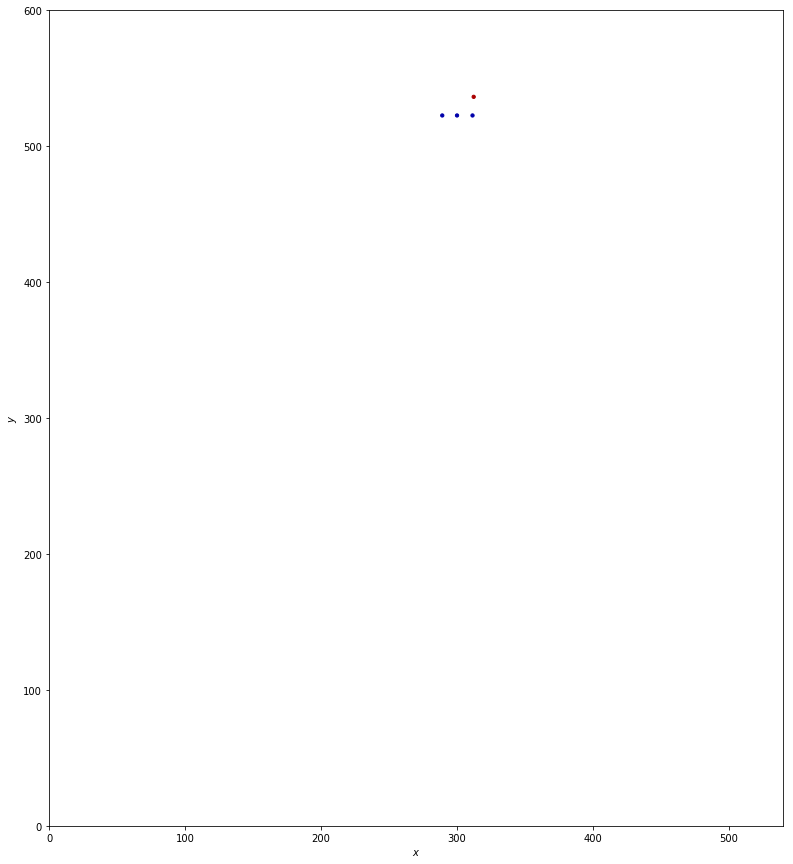

angle -88.9416609415
move (0.92800219701666975, -0.37257472046857121)
298.418956008 538.775804871
22
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


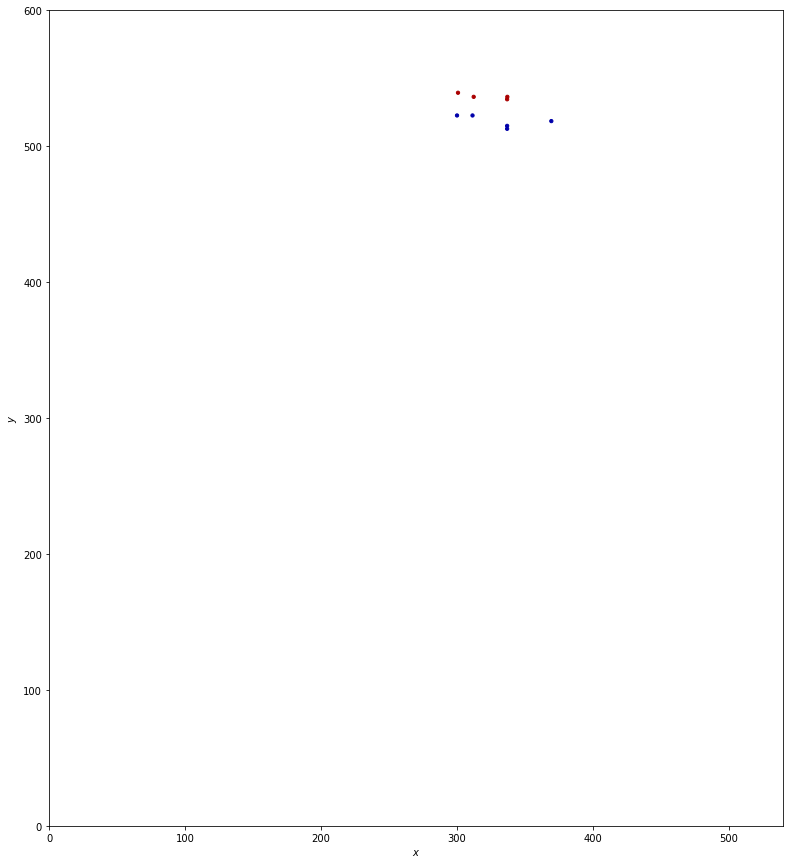

angle -21.8744948543
move (0.37957029525293079, -0.92516289968934817)
298.798526303 537.850641971
23
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)


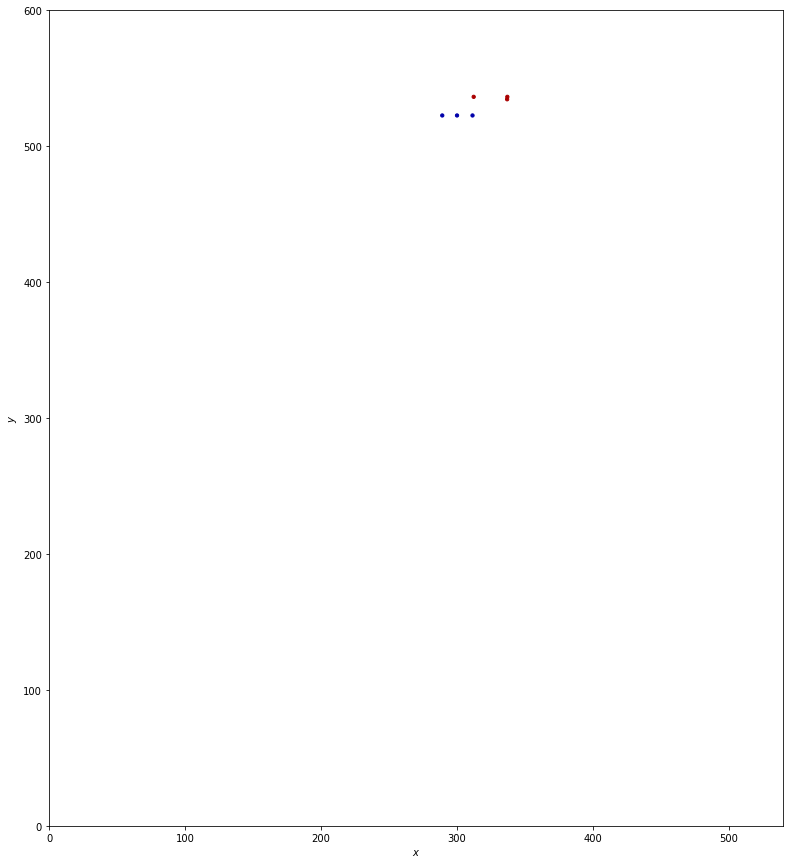

angle -67.6929316991
move (0.78328186534975586, -0.62166672696405989)
299.581808169 537.228975244
24
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


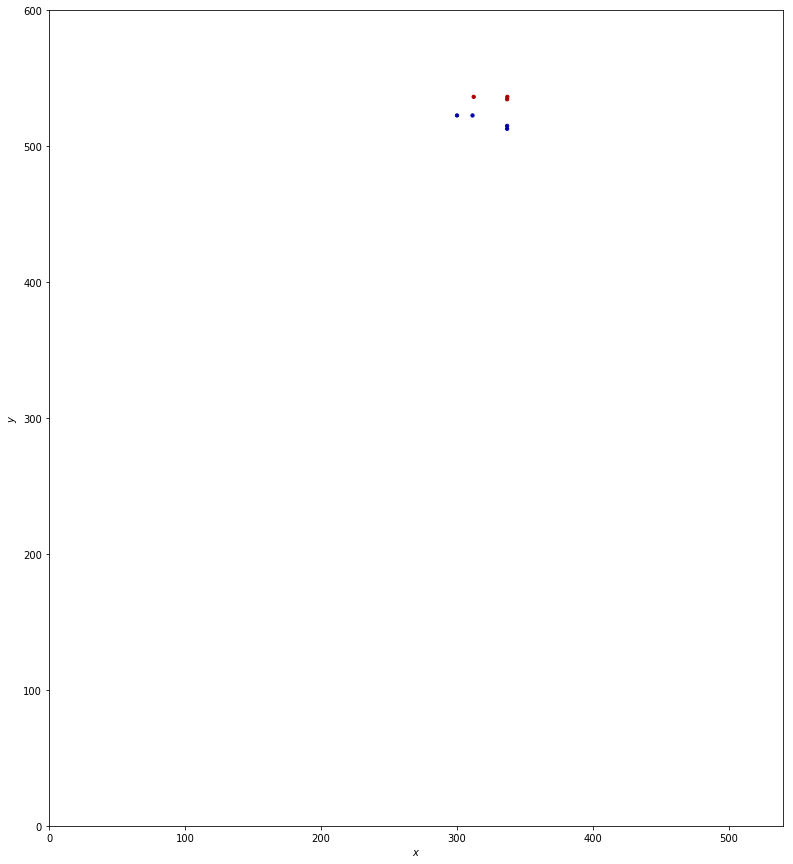

angle -38.4379501239
move (0.90121045555932722, -0.43338171949281601)
300.483018624 536.795593525
25
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


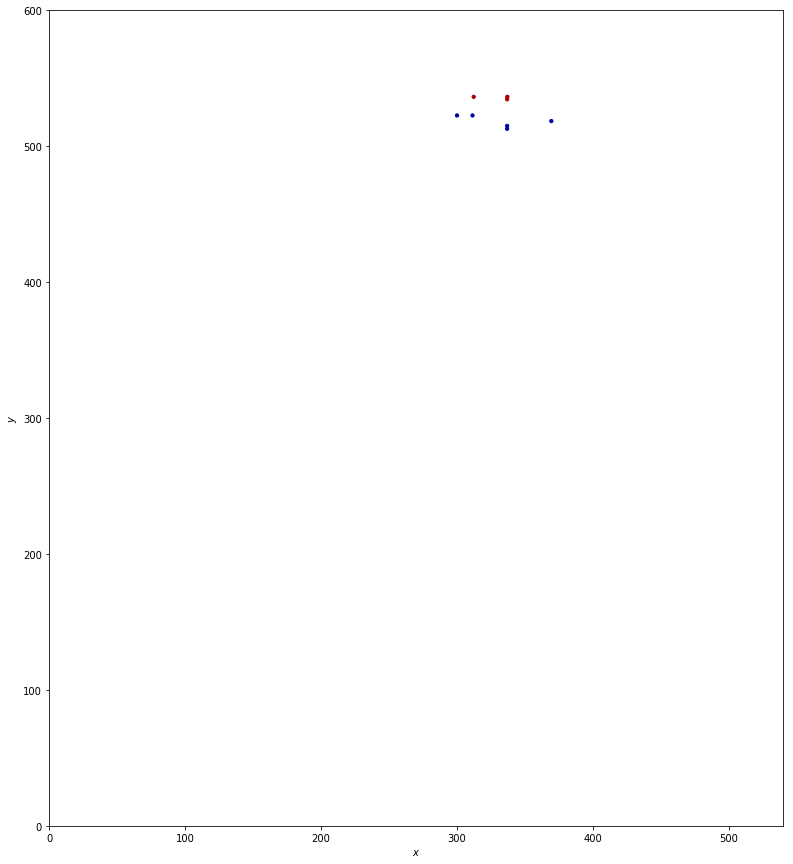

angle -25.682364801
move (0.91182588261154185, -0.41057710579096196)
301.394844507 536.385016419
26
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


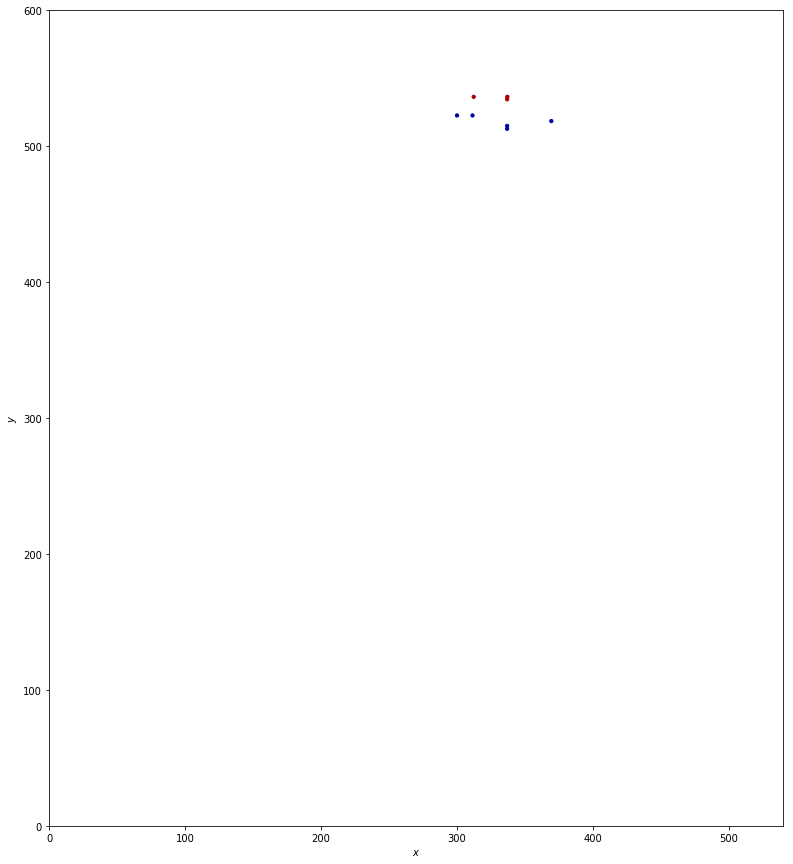

angle -24.24109284
move (0.88935901186721844, -0.45720952309697671)
302.284203519 535.927806896
27
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


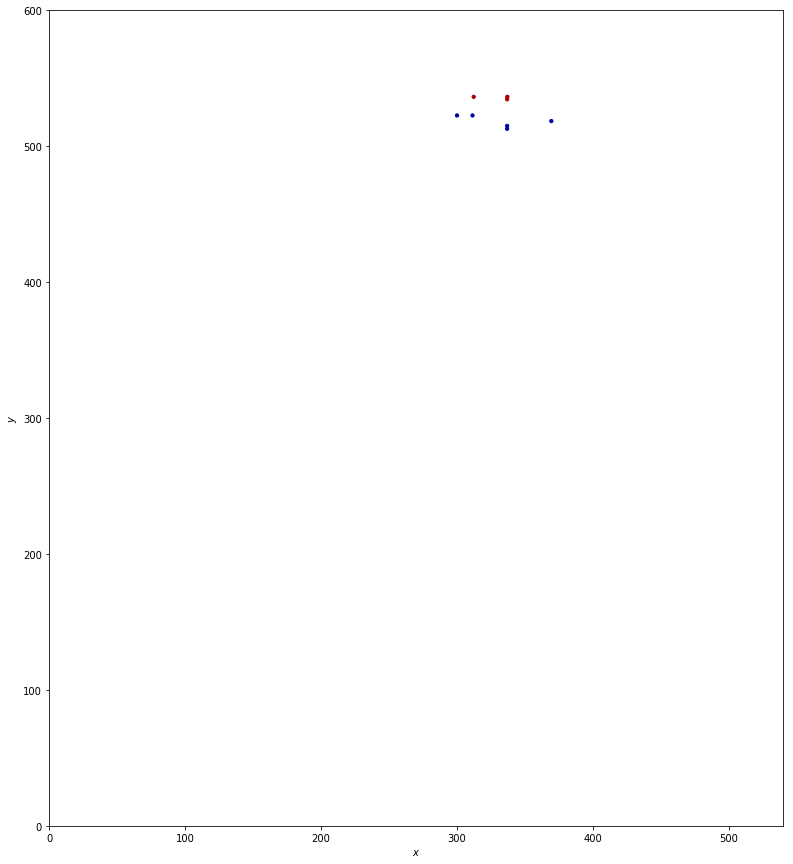

angle -27.2071891955
move (0.86820028060629484, -0.49621393849341927)
303.152403799 535.431592957
28
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


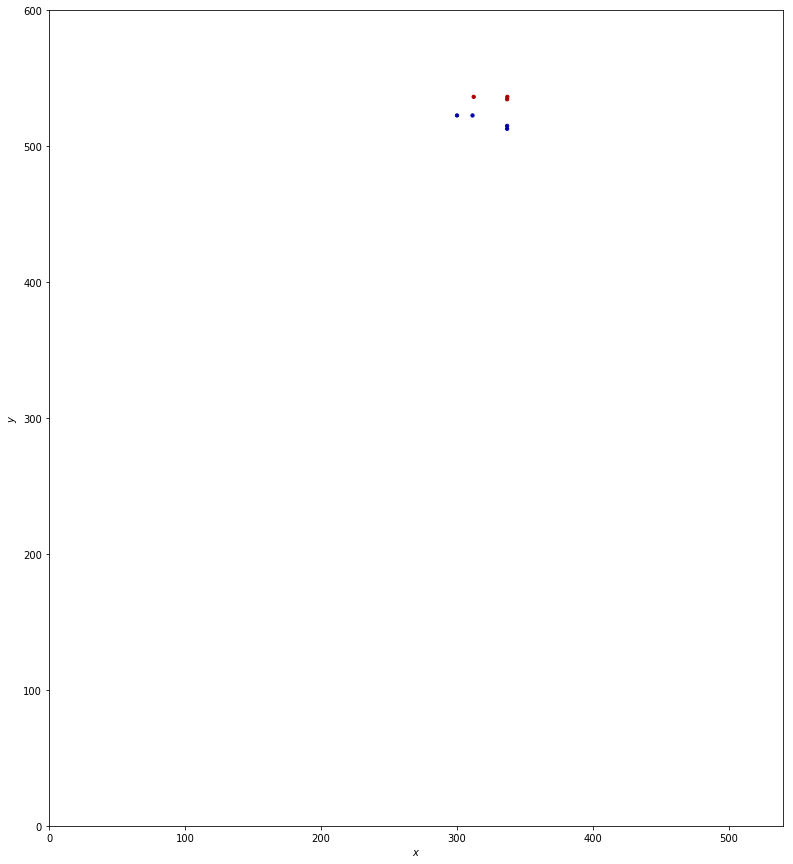

angle -29.7498307139
move (0.82237202167704149, -0.56895013662254756)
303.974775821 534.862642821
29
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


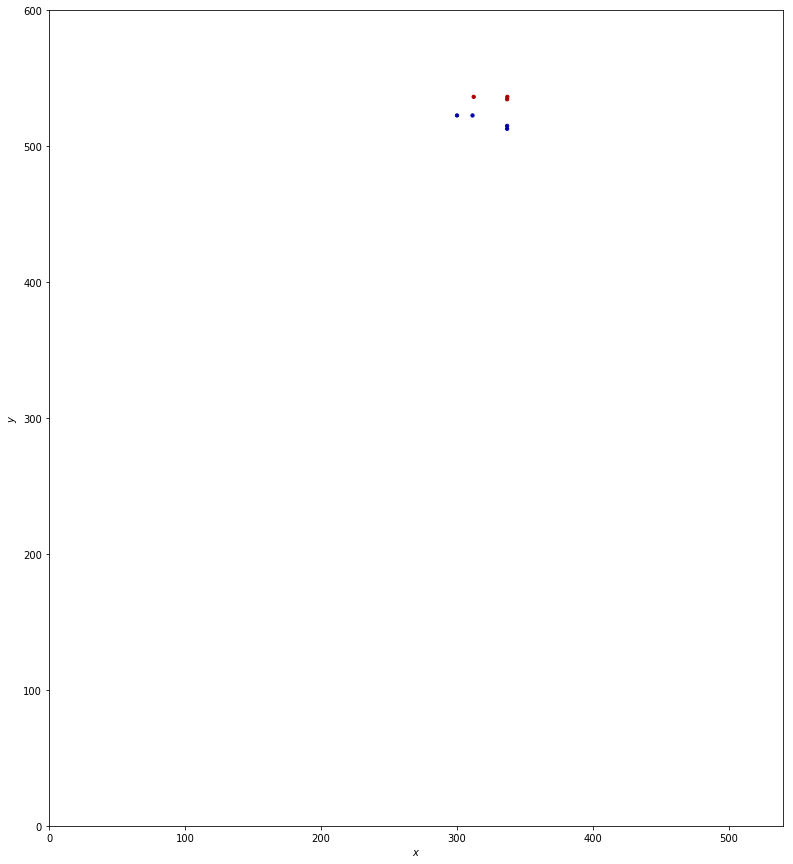

angle -34.6770479911
move (0.81559947338221317, -0.57861688449150572)
304.790375295 534.284025936
30
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


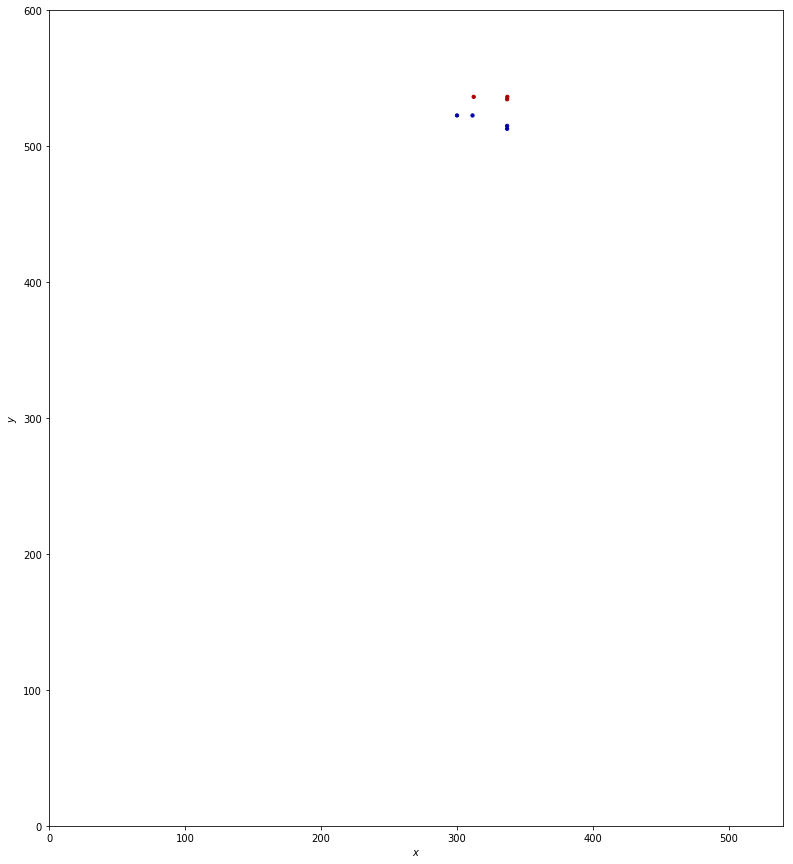

angle -35.3533203511
move (0.81584259287415051, -0.57827403854261272)
305.606217887 533.705751898
31
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)


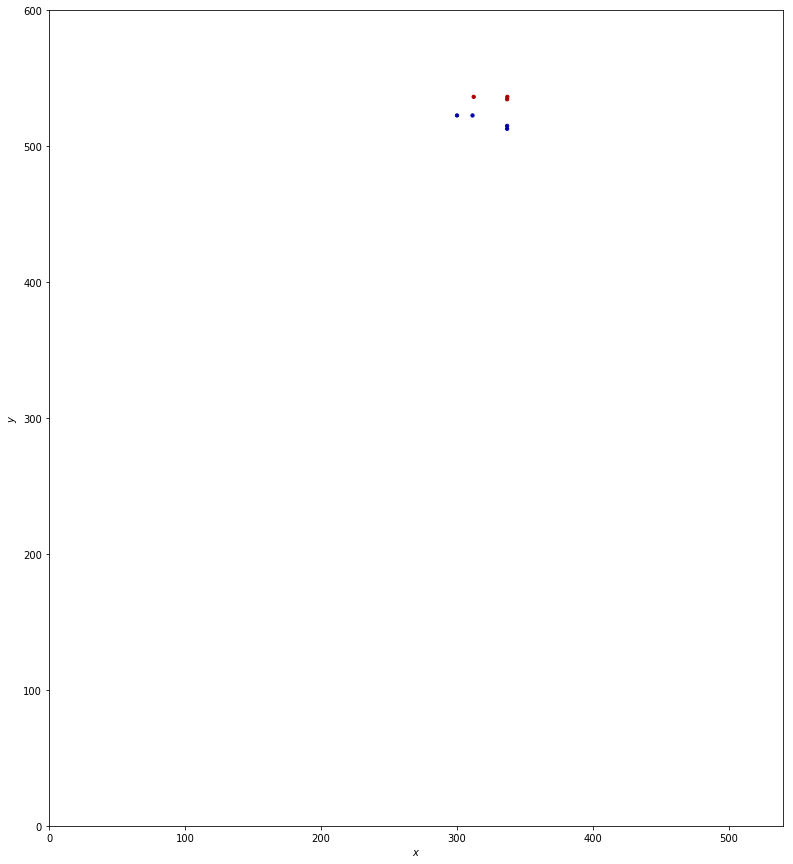

angle -35.3292390478
move (0.82399240192479672, -0.56660084854349113)
306.430210289 533.139151049
32
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


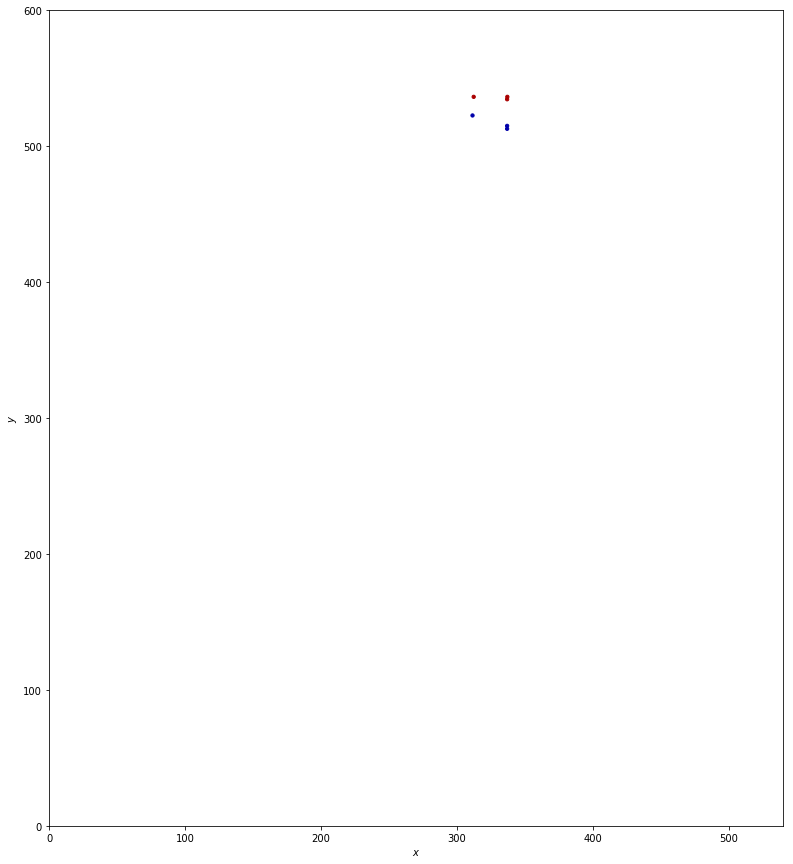

angle -34.5135310947
move (0.83304912430598477, -0.55319902069059379)
307.263259414 532.585952028
33
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


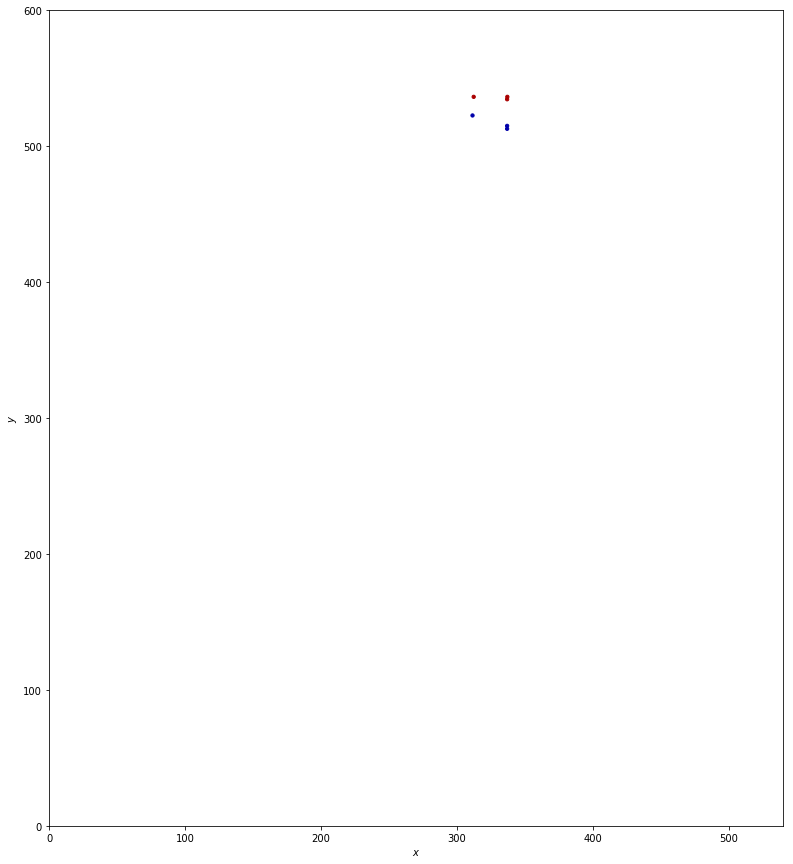

angle -33.5867571793
move (0.87821086225079892, -0.4782736470104833)
308.141470276 532.107678381
34
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


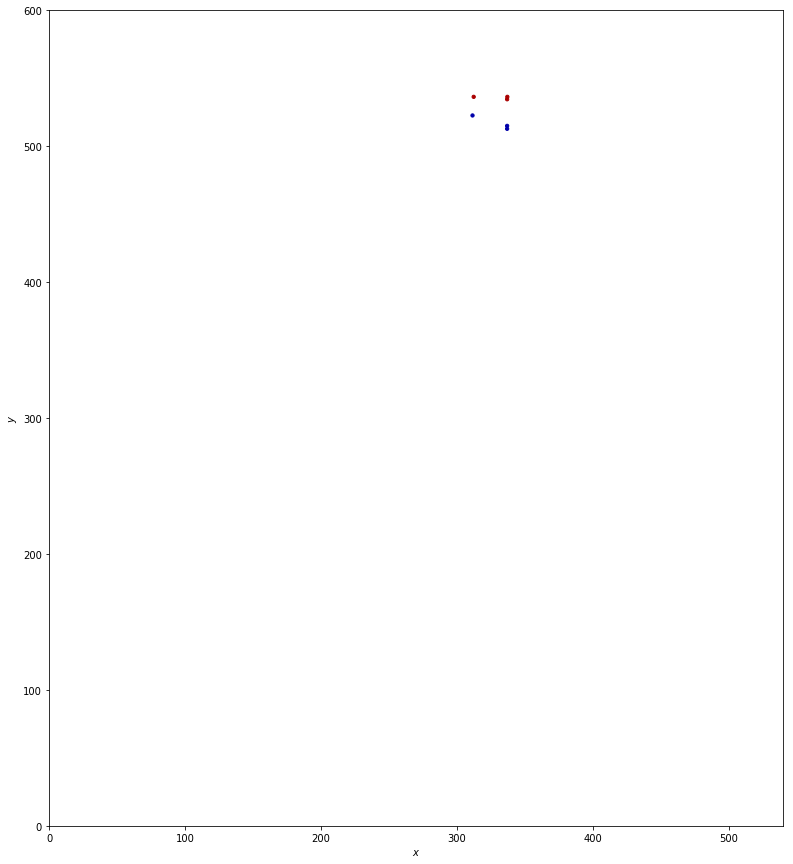

angle -28.5727117585
move (0.9160989717105128, -0.40095220916081886)
309.057569248 531.706726172
35
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


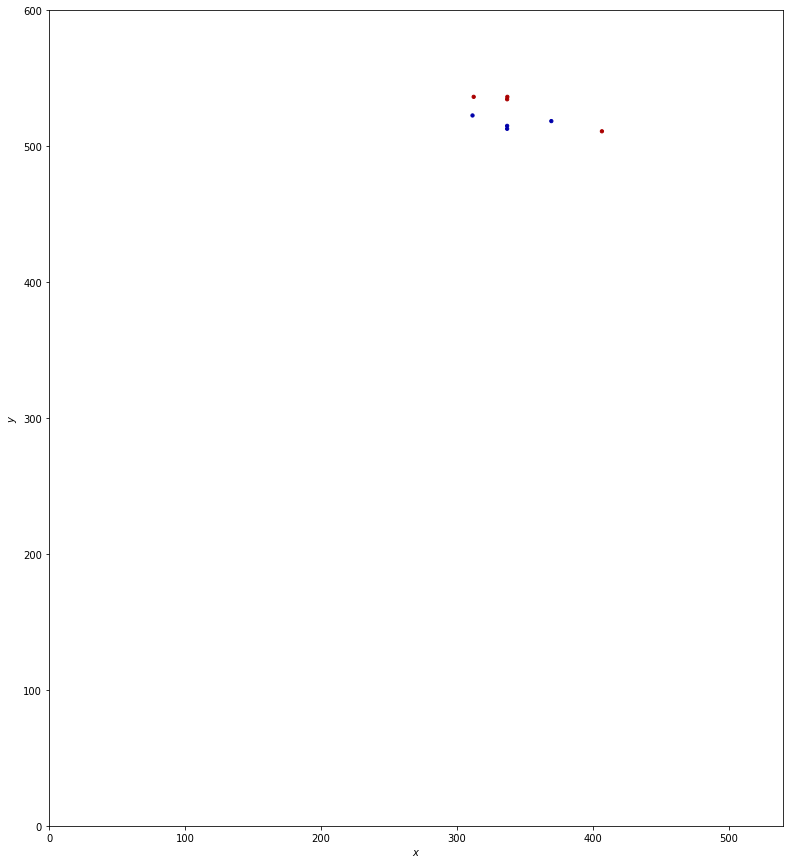

angle -23.6377191757
move (0.95115747459325428, -0.30870610380324986)
310.008726722 531.398020068
36
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


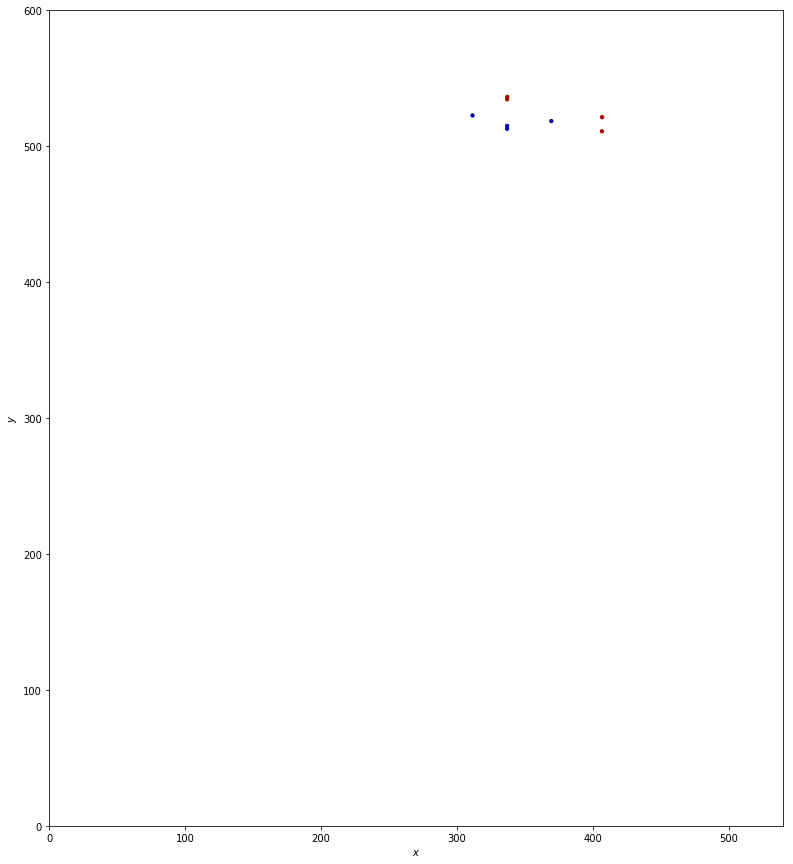

angle -17.9812715945
move (0.99995014014733108, 0.0099858509568754739)
311.008676862 531.408005919
37
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


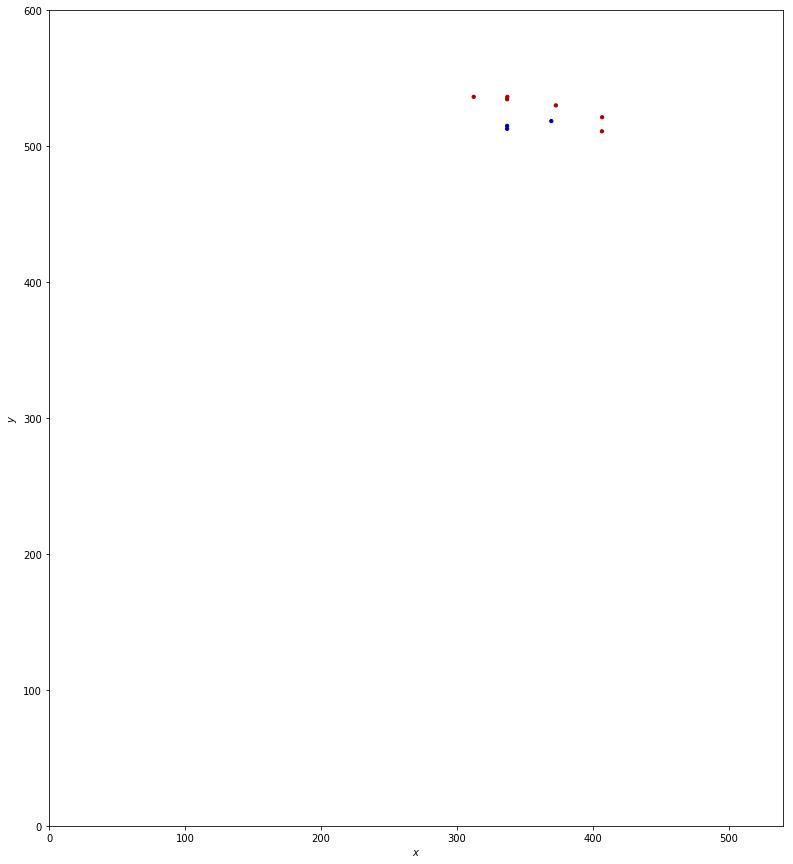

angle 0.572156623922
move (0.93690582339740081, -0.34958186177780787)
311.945582686 531.058424058
38
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


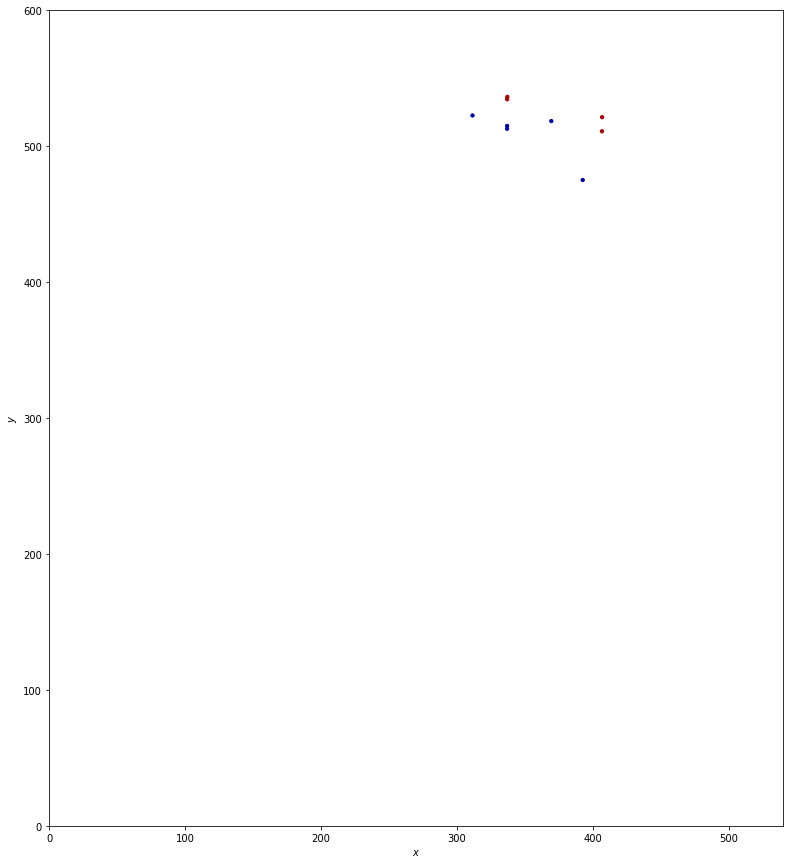

angle -20.4617420521
move (0.99181548606219705, -0.12767944864858993)
312.937398172 530.930744609
39
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


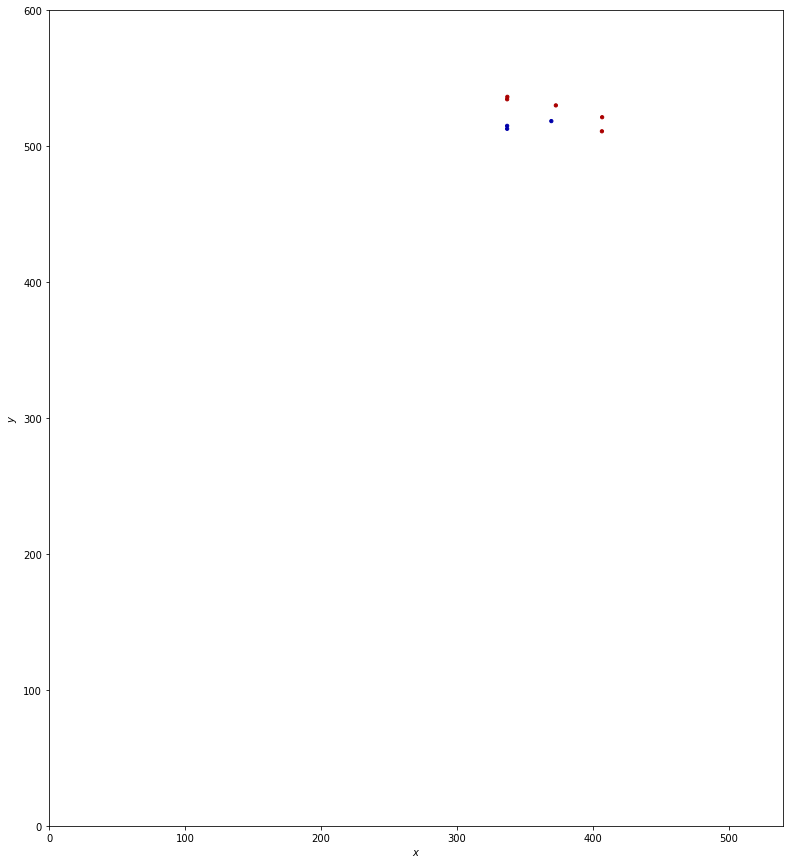

angle -7.3355170261
move (0.78539775591415661, -0.61899140947593678)
313.722795928 530.311753199
40
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)


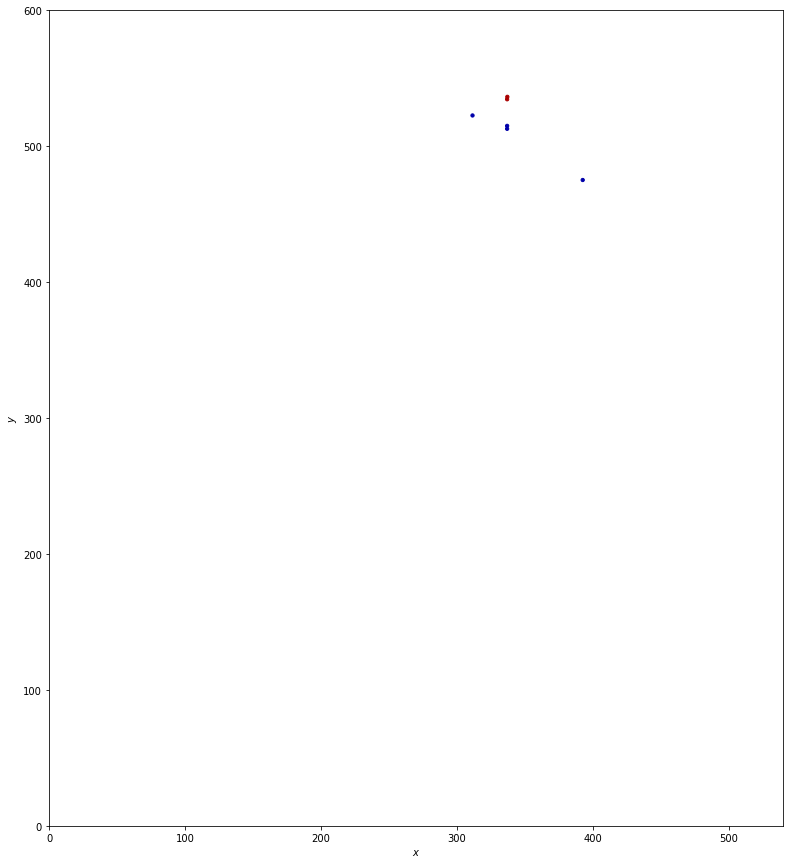

angle -38.2425192019
move (0.96014172071970916, -0.2795136421239508)
314.682937648 530.032239557
41
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


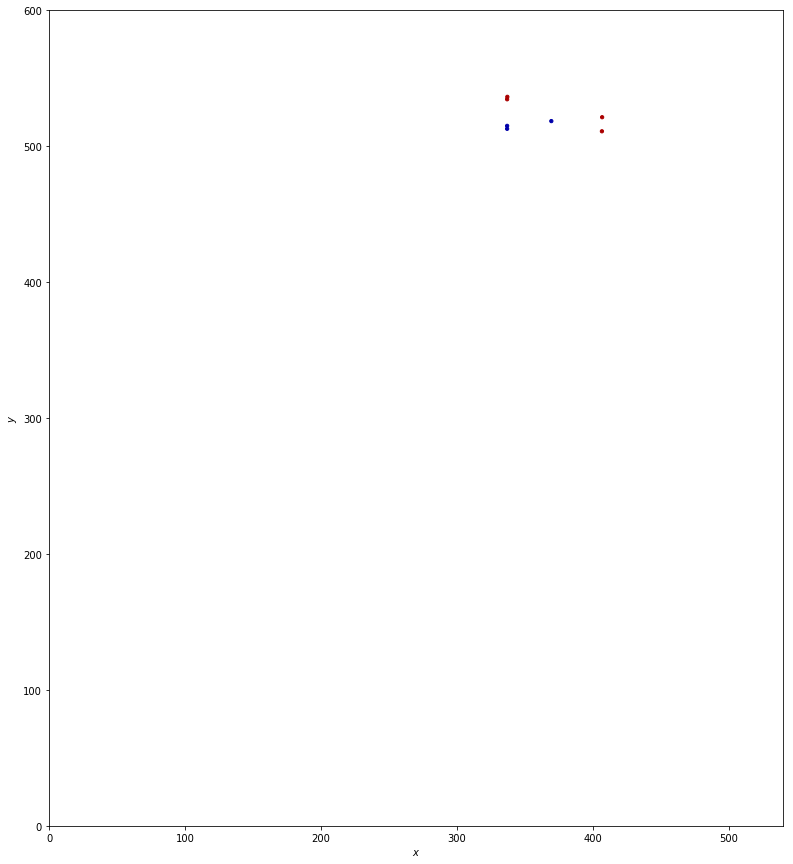

angle -16.2311795038
move (0.90853894968302917, -0.41780016384493934)
315.591476598 529.614439393
42
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.7997, 511.0502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


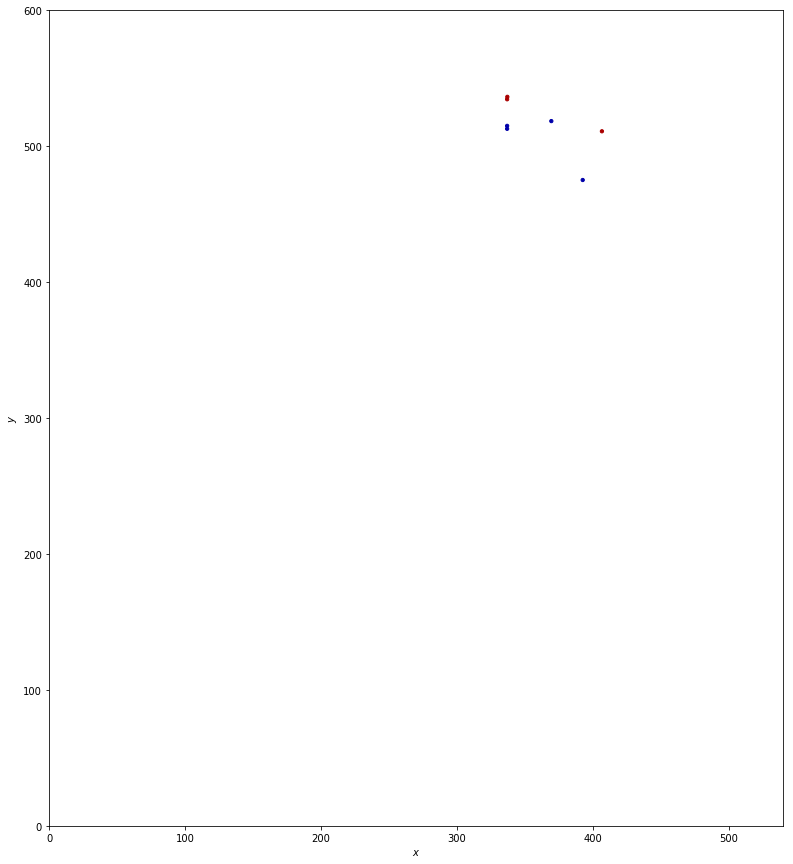

angle -24.6957803427
move (0.98143699328758094, -0.19178484874106408)
316.572913591 529.422654545
43
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


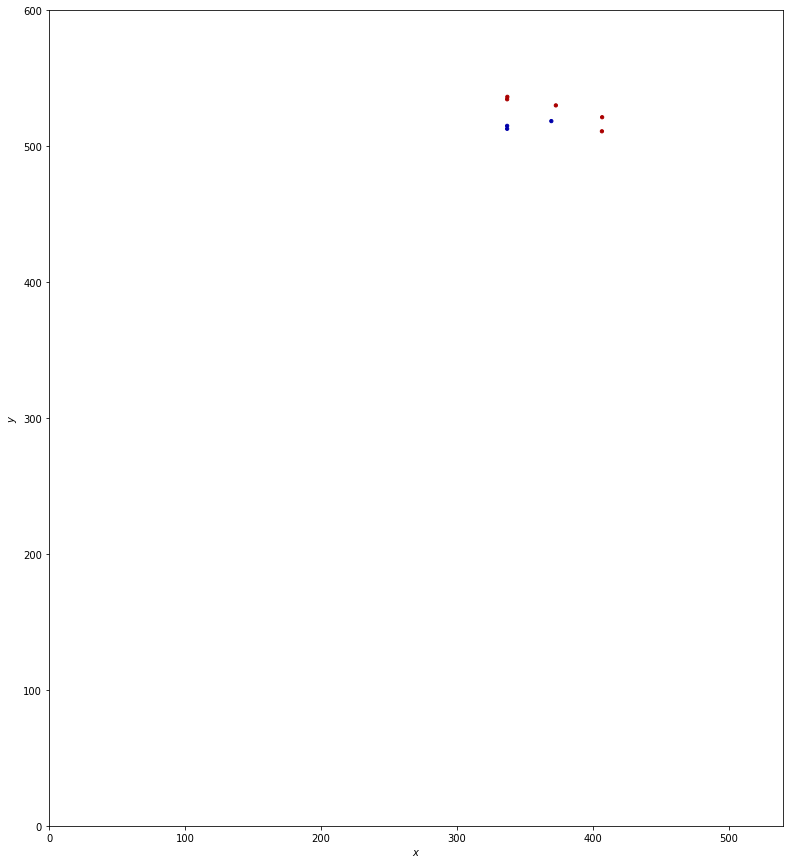

angle -11.056964286
move (0.84880440026320036, -0.52870699834012858)
317.421717992 528.893947546
44
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (337.0497, 512.8801)


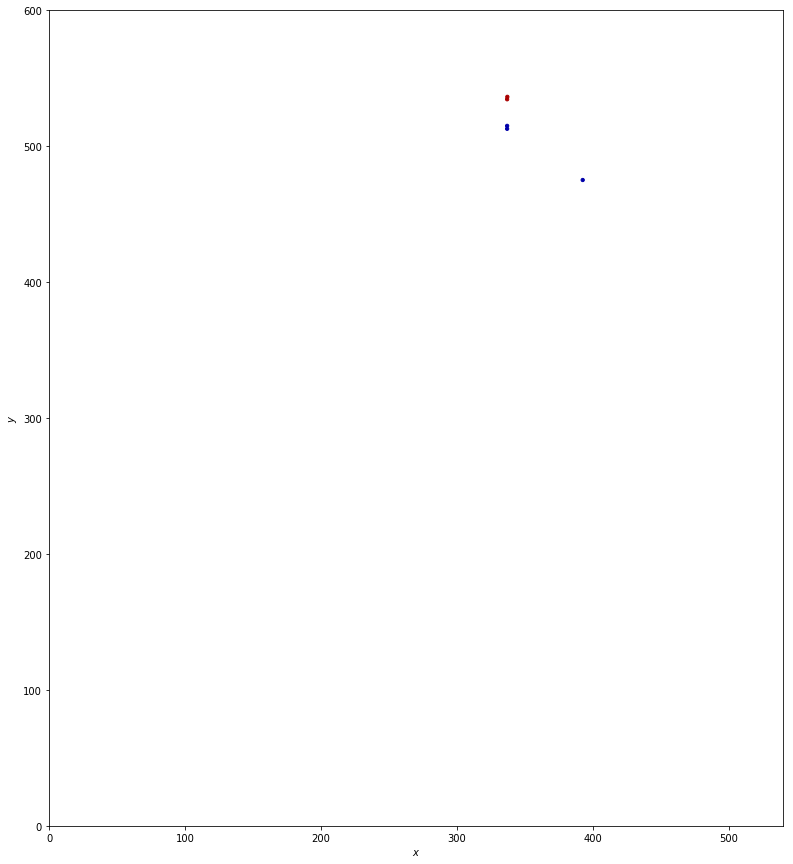

angle -31.9181334764
move (0.96554312796552466, -0.26024309412268837)
318.38726112 528.633704452
45
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


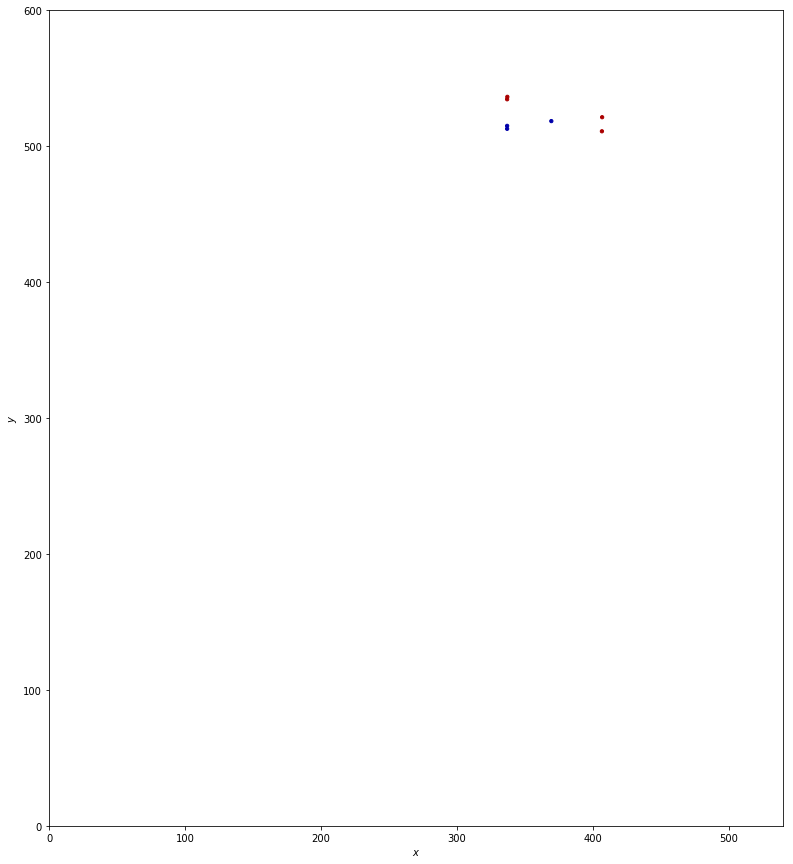

angle -15.0844869742
move (0.94032548856639742, -0.34027632235047728)
319.327586608 528.29342813
46
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


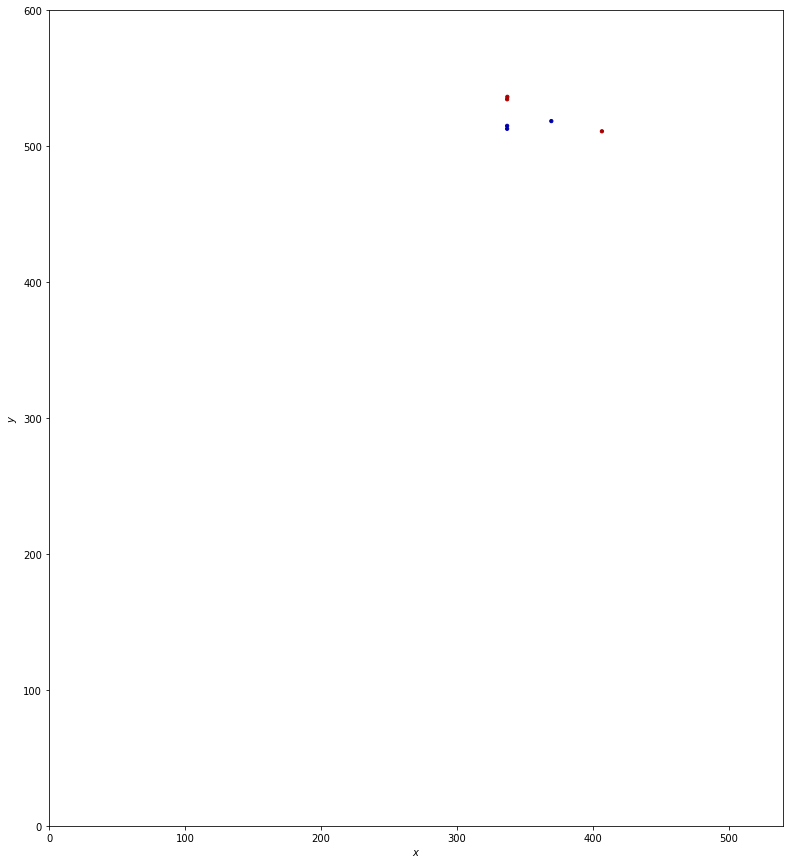

angle -19.8937100095
move (0.97153475078119356, -0.2368970831912546)
320.299121359 528.056531047
47
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


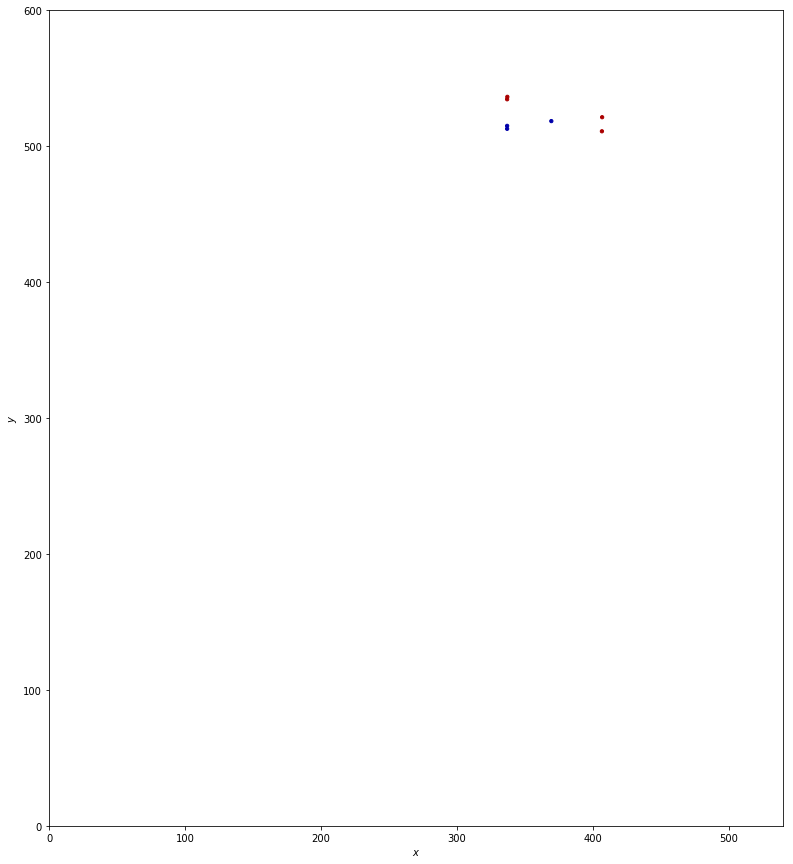

angle -13.703475762
move (0.95269763691915266, -0.30391974698703328)
321.251818996 527.7526113
48
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


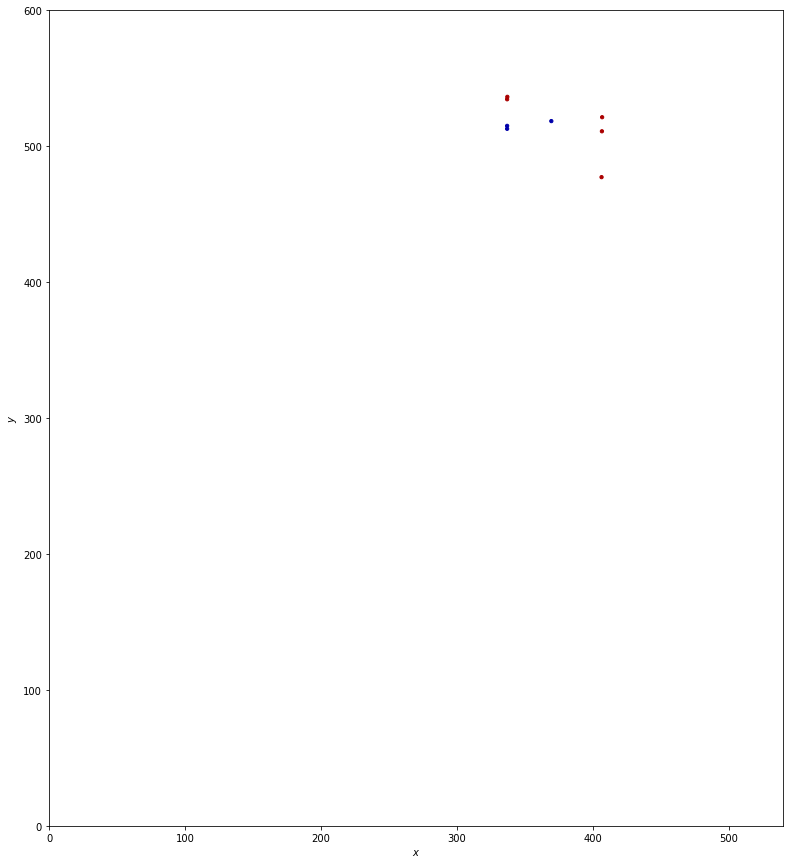

angle -17.6931851058
move (0.94036581955992427, -0.34016485033493976)
322.192184815 527.412446449
49
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


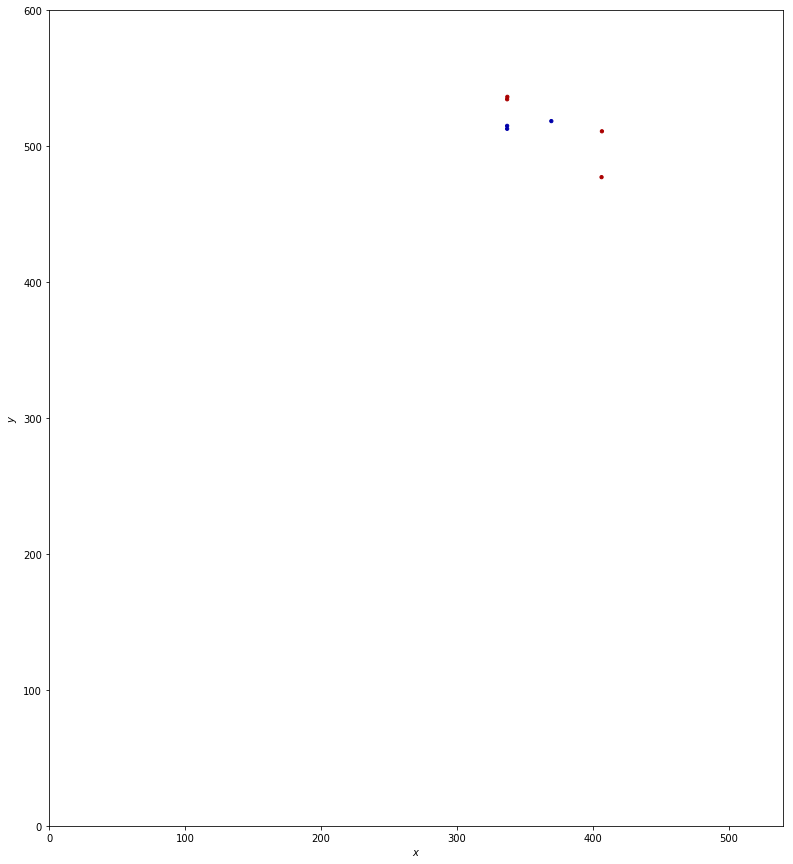

angle -19.8869179581
move (0.96983143014428153, -0.24377653107774253)
323.162016246 527.168669918
50
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


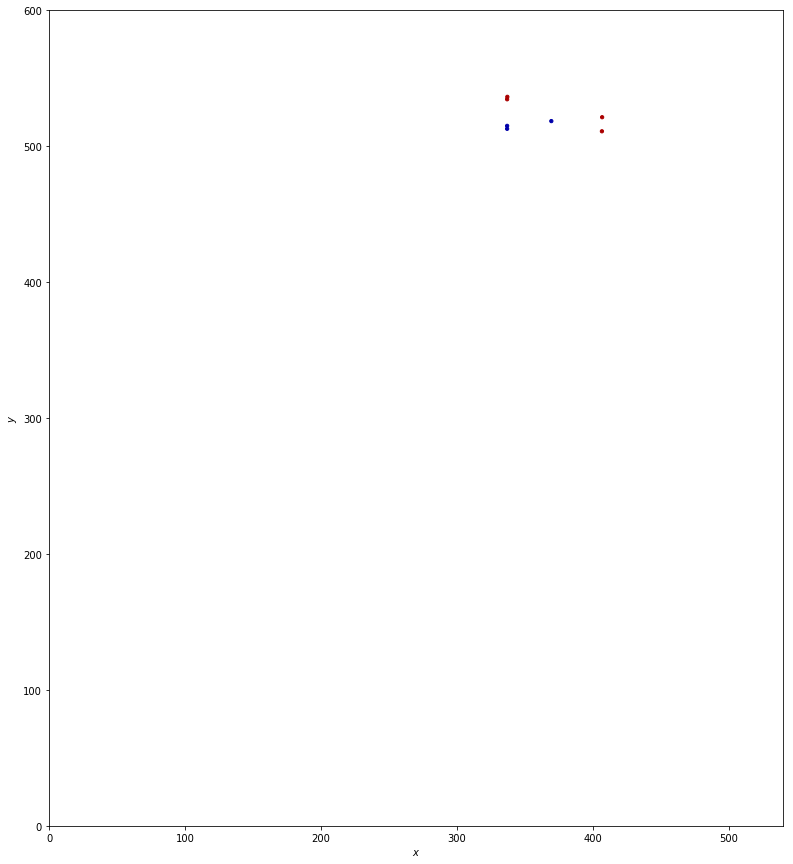

angle -14.1095420501
move (0.97168886959080869, -0.2362641333620833)
324.133705115 526.932405785
51
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


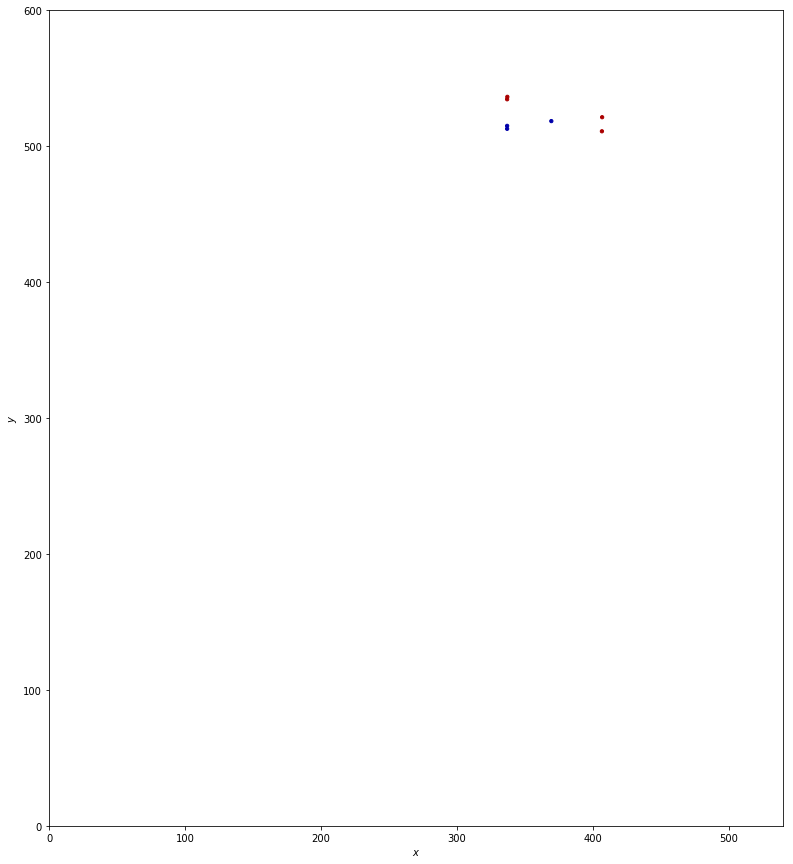

angle -13.666150822
move (0.97633613417629495, -0.21625853301474118)
325.110041249 526.716147252
52
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


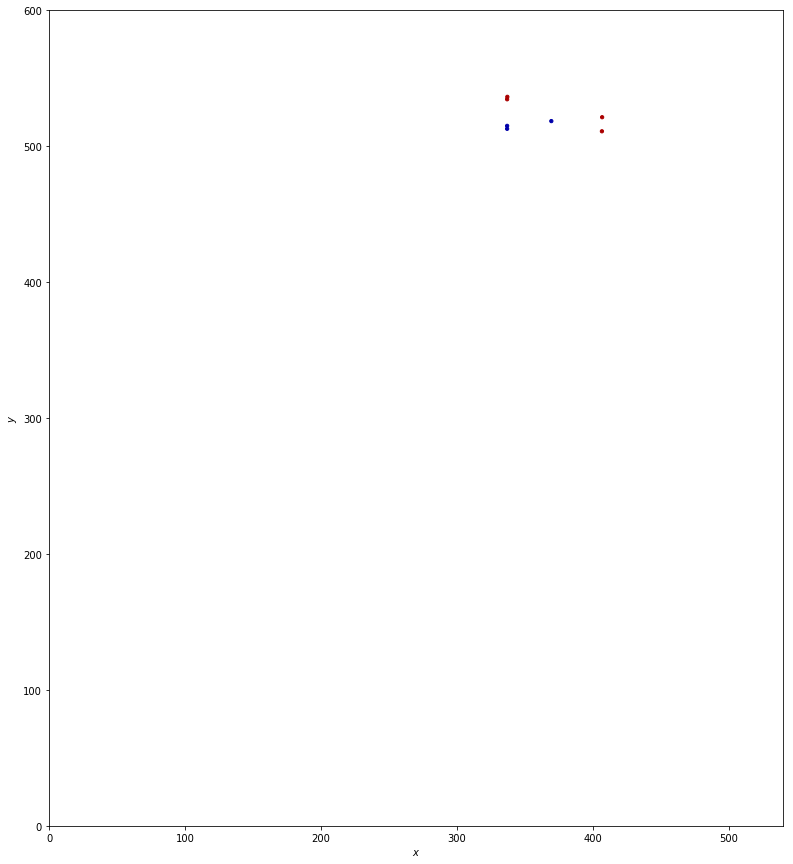

angle -12.4893731416
move (0.98045650800138429, -0.19673595481693579)
326.090497757 526.519411297
53
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


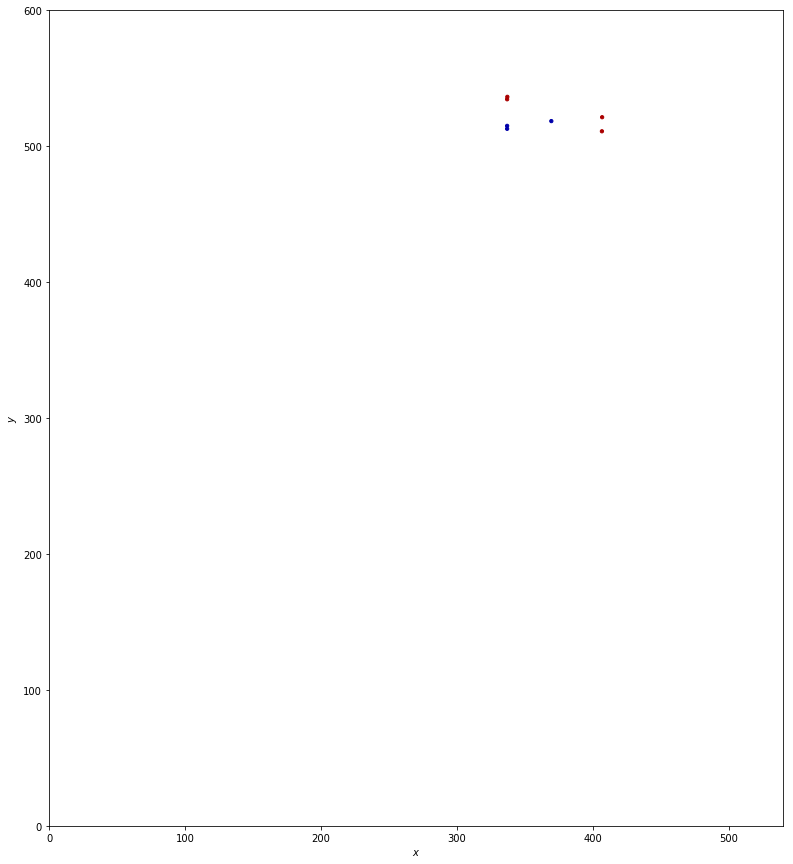

angle -11.3461511146
move (0.98408461335546105, -0.17770051704210879)
327.074582371 526.34171078
54
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


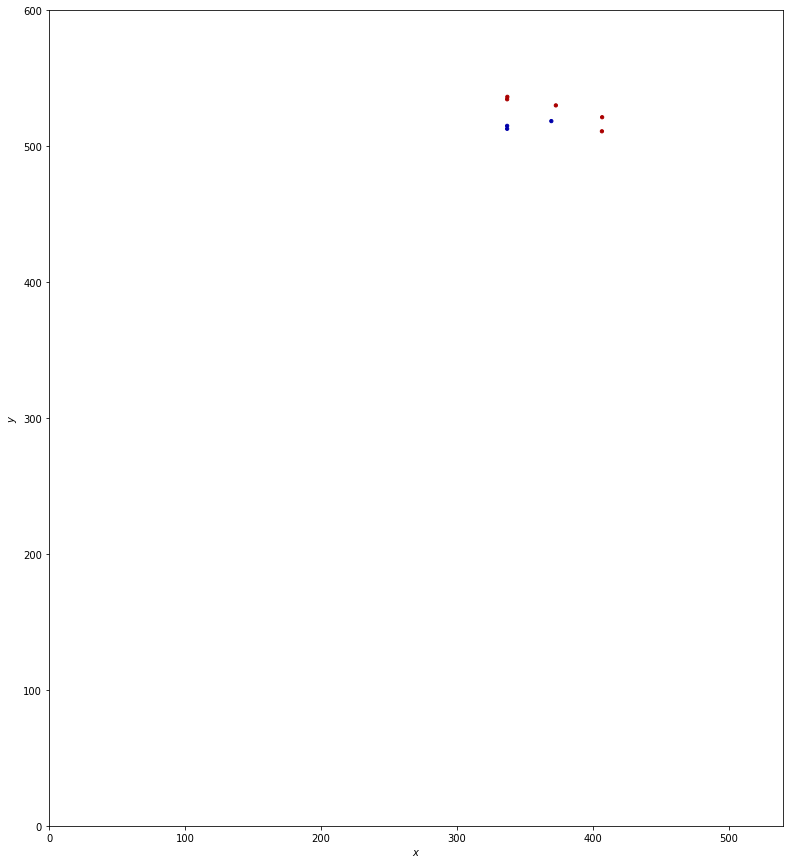

angle -10.2358499829
move (0.97087260068826042, -0.23959631306181162)
328.045454971 526.102114467
55
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


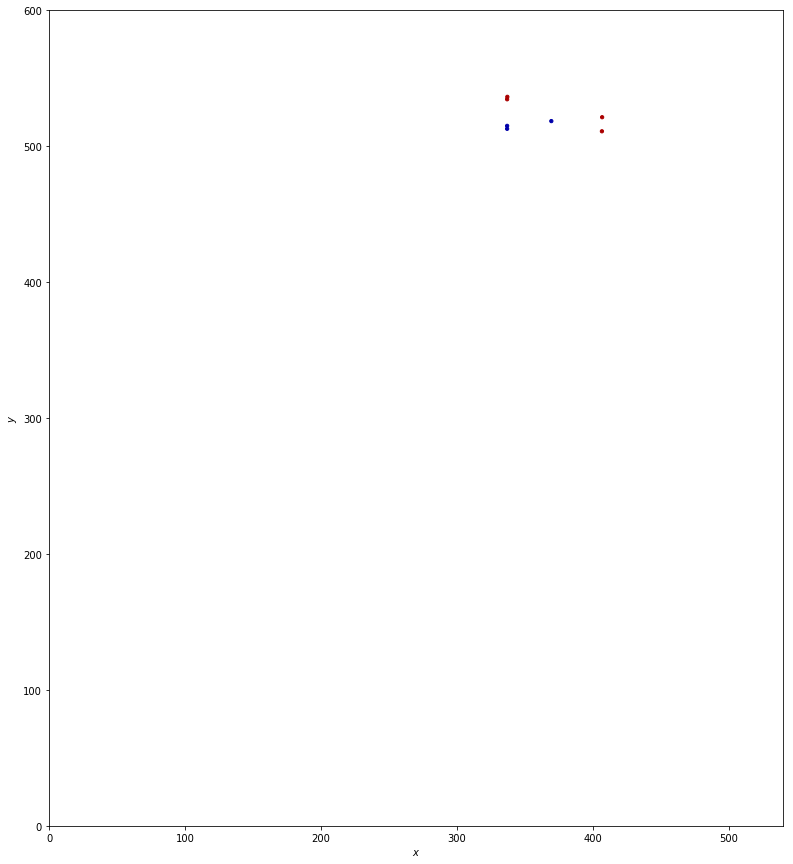

angle -13.8627156659
move (0.99112442741710516, -0.1329374641593386)
329.036579399 525.969177003
56
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


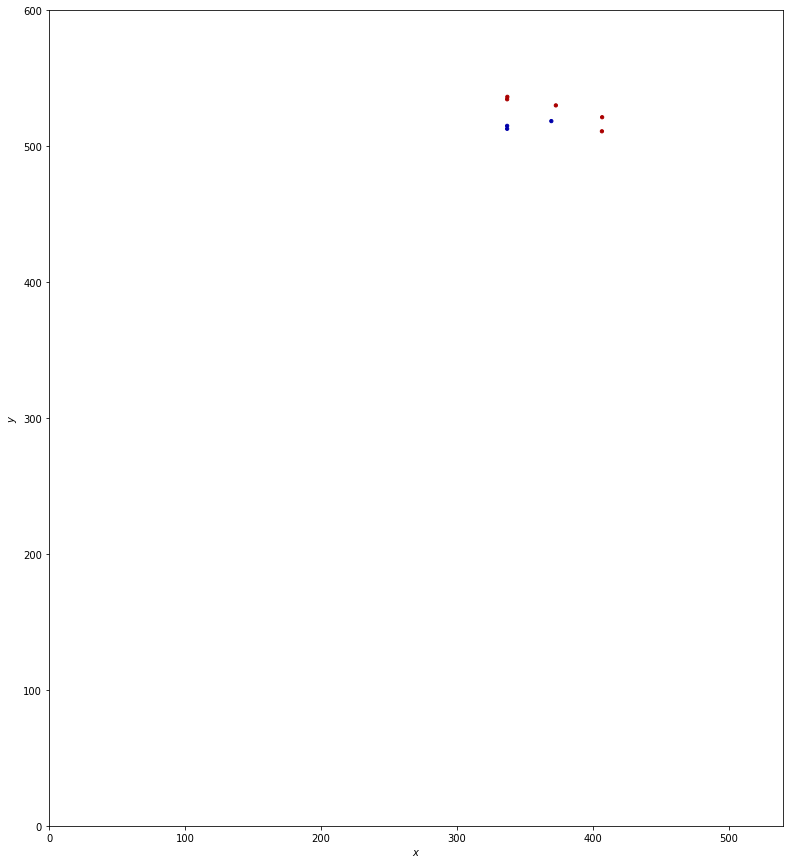

angle -7.63937029897
move (0.98232896460598873, -0.18716251039170767)
330.018908363 525.782014492
57
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes -1 (337.0497, 512.8801)


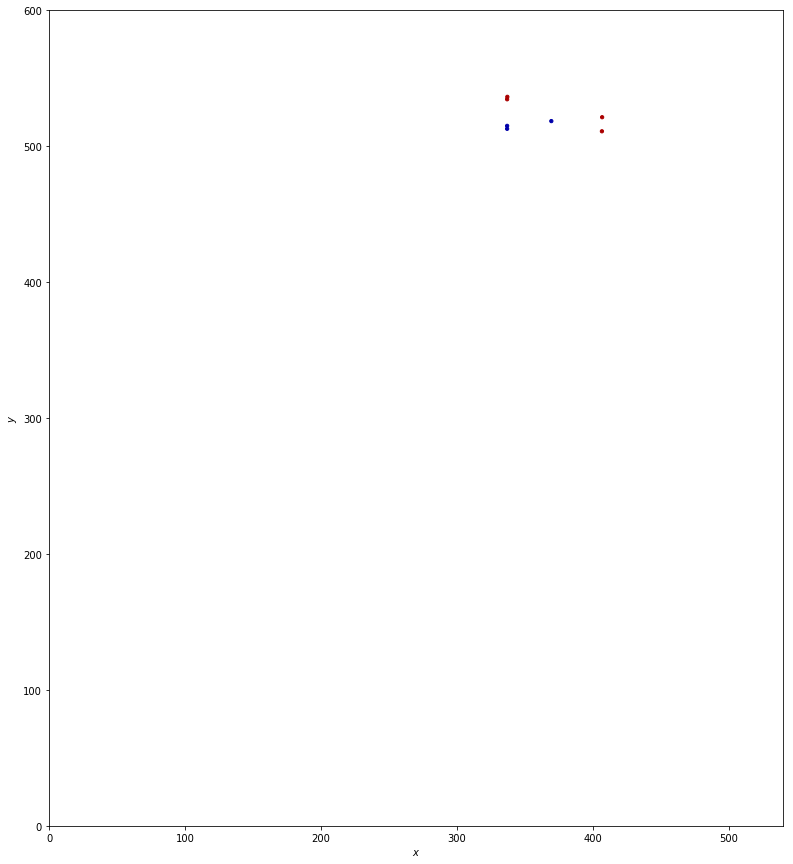

angle -10.7872376531
move (0.99563397418638955, -0.093343395298306056)
331.014542338 525.688671097
58
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


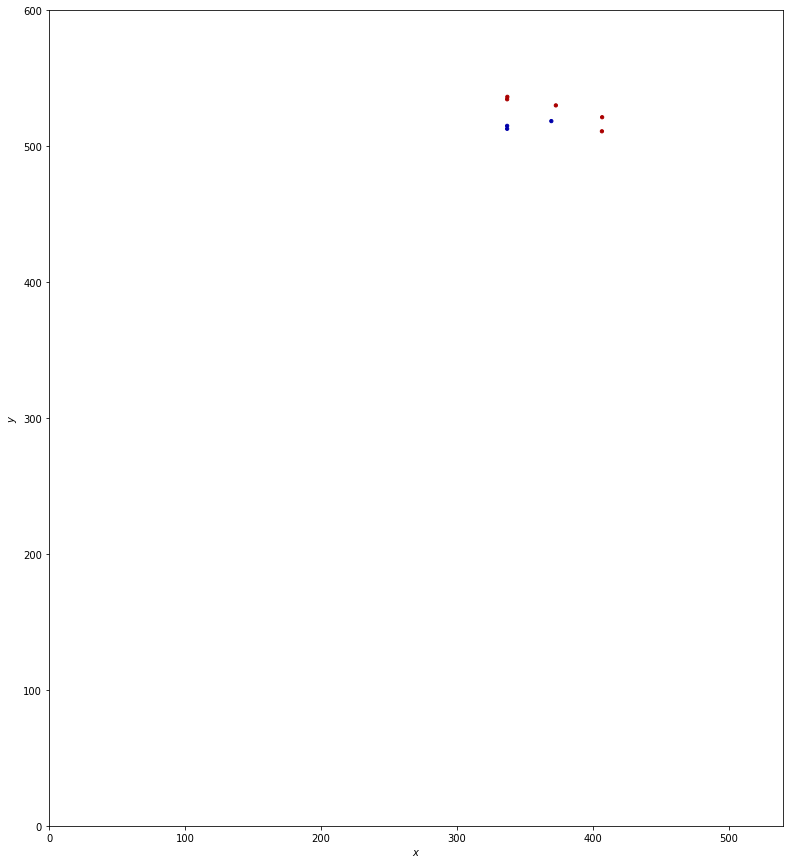

angle -5.35597964899
move (0.98994967568343539, -0.14142008207557039)
332.004492013 525.547251015
59
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


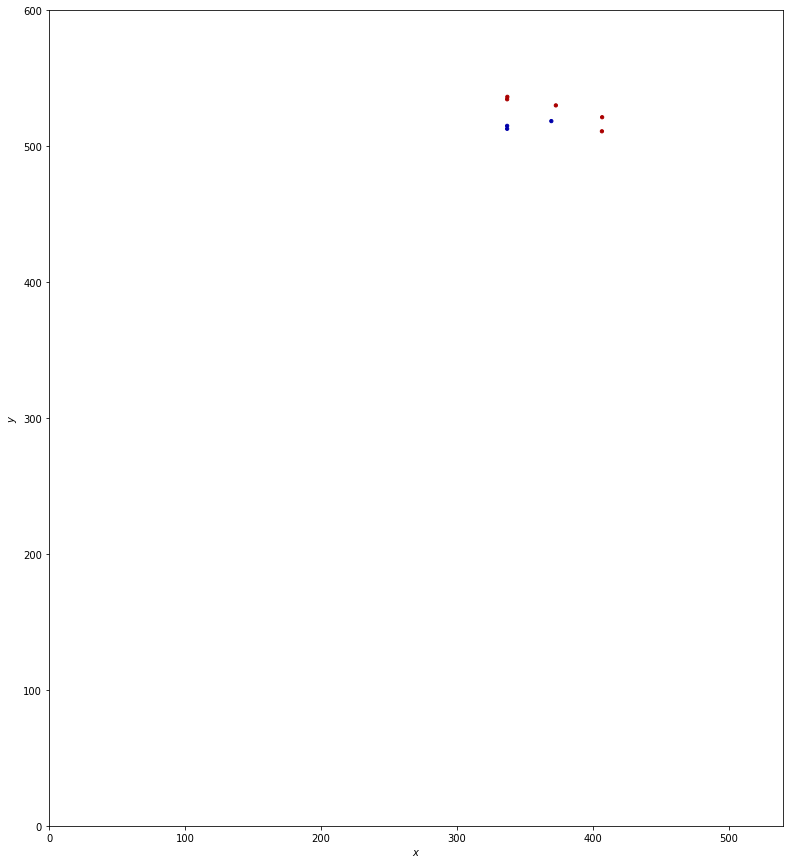

angle -8.1300286089
move (0.99292691054280102, -0.11872720968644193)
332.997418924 525.428523805
60
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


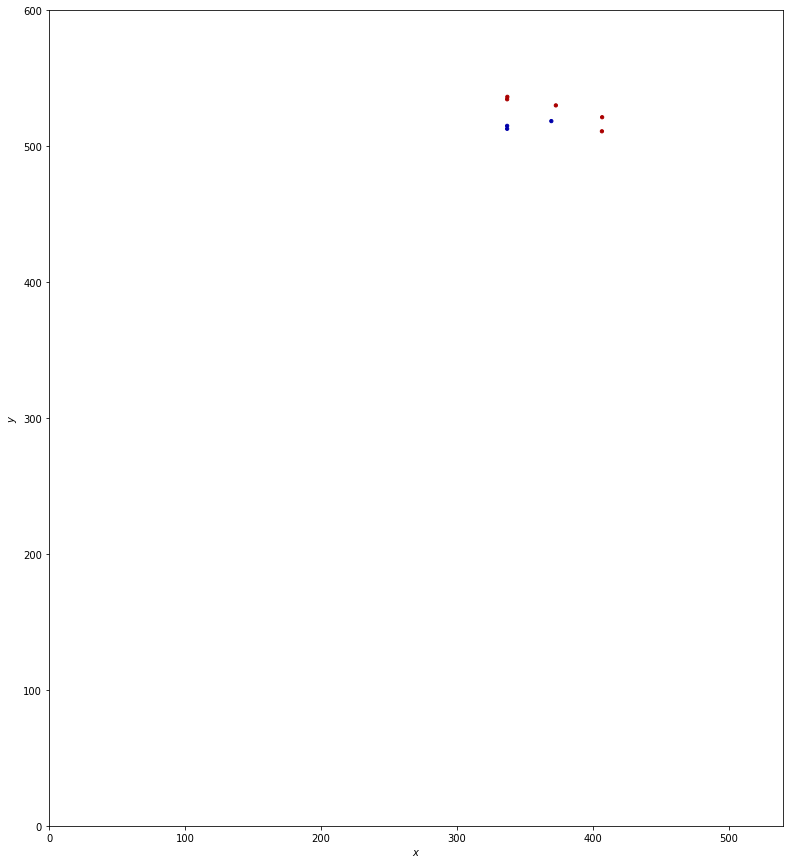

angle -6.81865193351
move (0.99510085867523701, -0.098864963782960391)
333.992519782 525.329658842
61
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


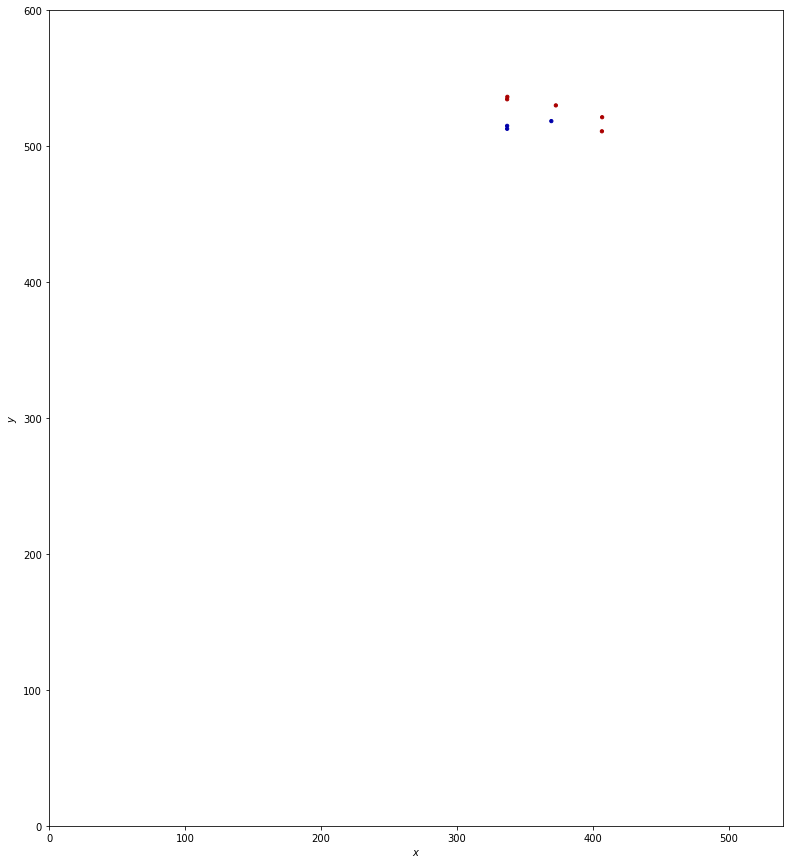

angle -5.67381380147
move (0.99664147892287547, -0.081888720165988388)
334.989161261 525.247770121
62
yes -1 (337.0497, 515.0402)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


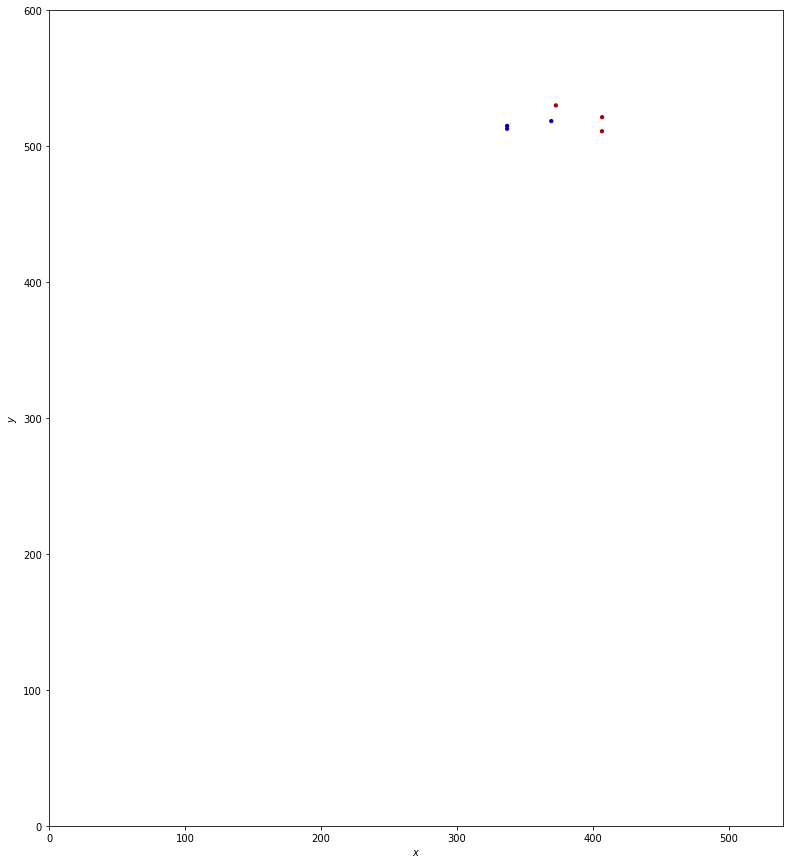

angle -4.69713771223
move (0.99633239704056353, 0.085567251956602877)
335.985493658 525.333337373
63
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


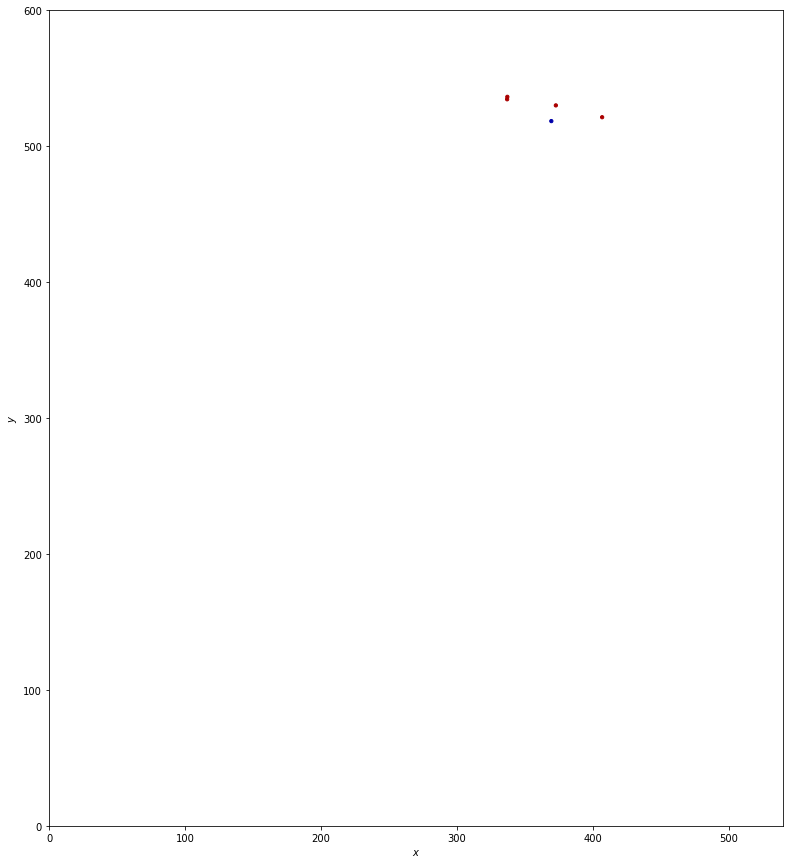

angle 4.90864485701
move (0.98943322870155881, -0.14498926146859548)
336.974926887 525.188348112
64
yes -1 (337.0497, 515.0402)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


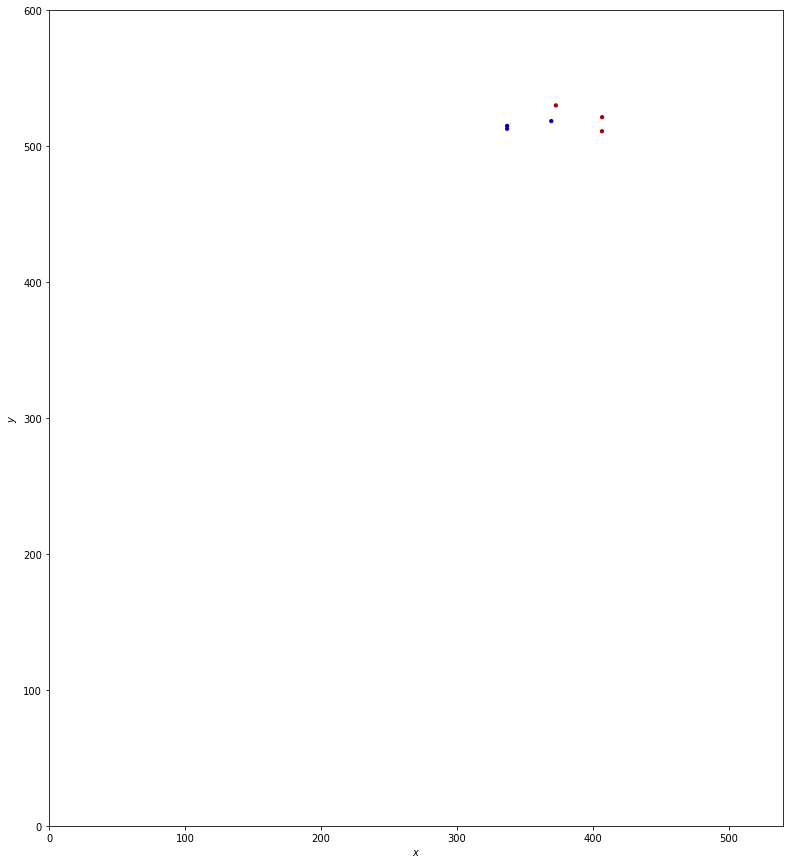

angle -8.33665734501
move (0.99627443648946945, -0.086239475865696746)
337.971201324 525.102108636
65
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


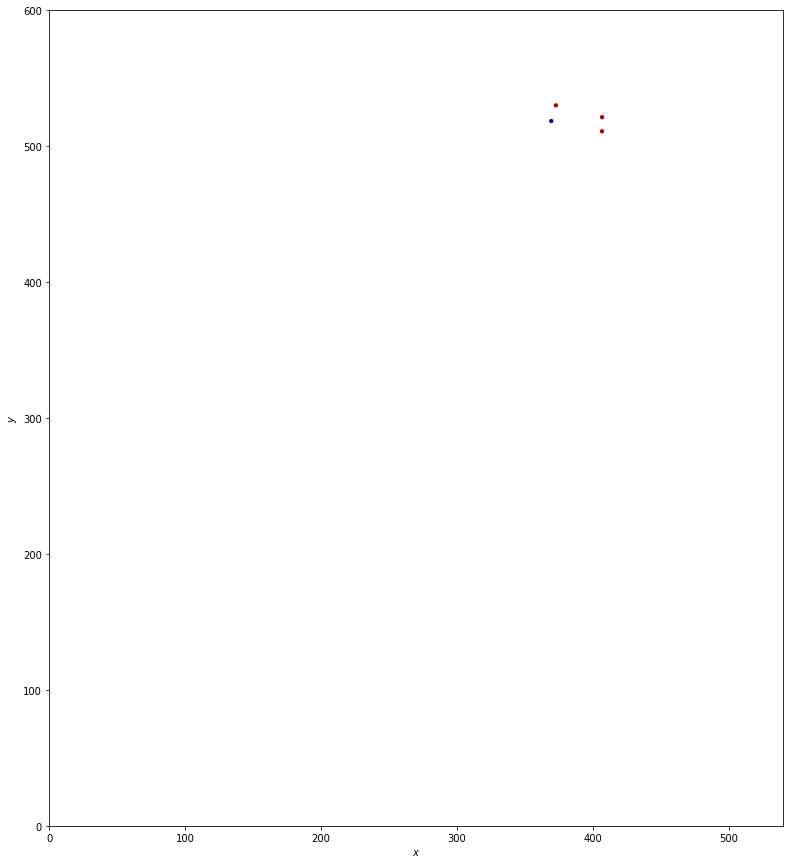

angle -4.94730335278
move (0.31392379977770107, -0.94944818075191961)
338.285125123 524.152660455
66
yes -1 (337.0497, 515.0402)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


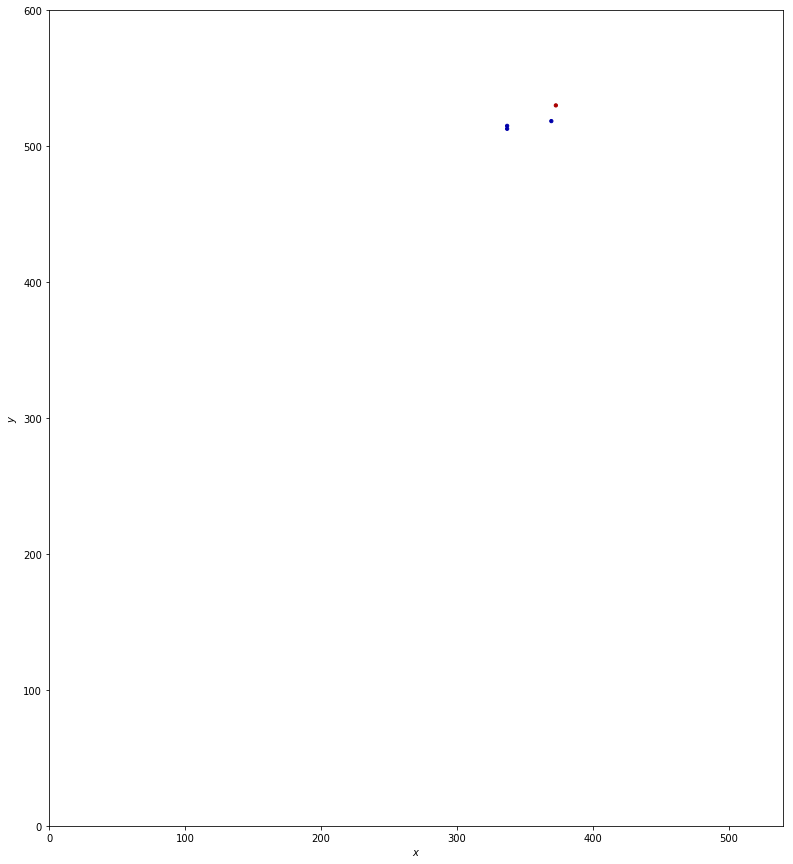

angle -71.7041432034
move (0.9944625624780532, -0.10509144508276676)
339.279587686 524.04756901
67
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


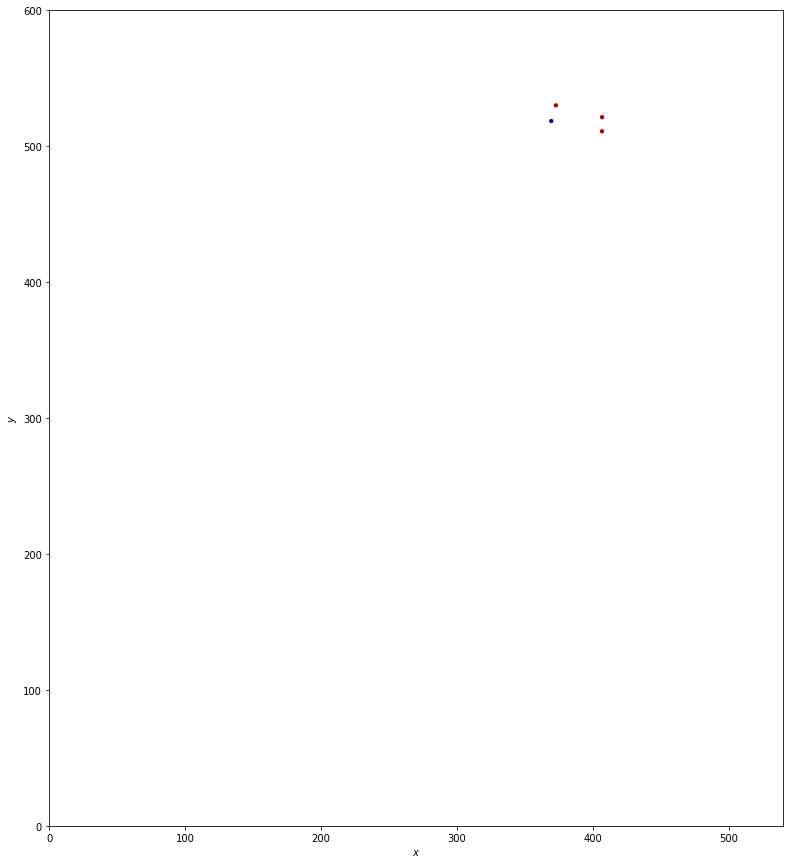

angle -6.03243512634
move (0.35751888927437681, -0.93390590736541335)
339.637106575 523.113663103
68
yes -1 (337.0497, 515.0402)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


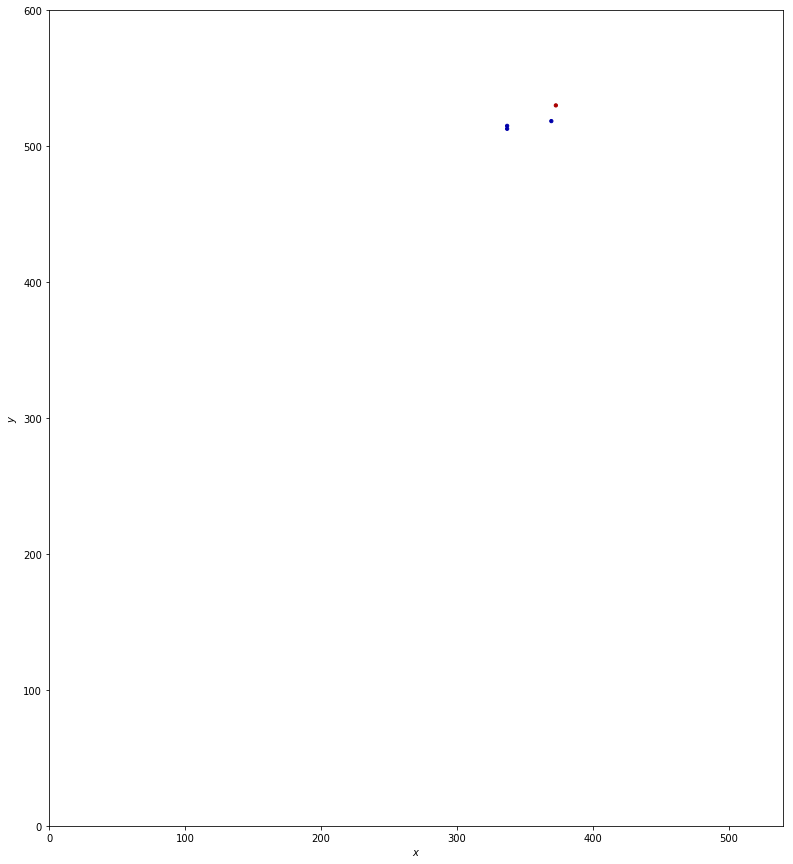

angle -69.0520995156
move (0.96728962702461752, -0.25367455026189834)
340.604396202 522.859988553
69
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


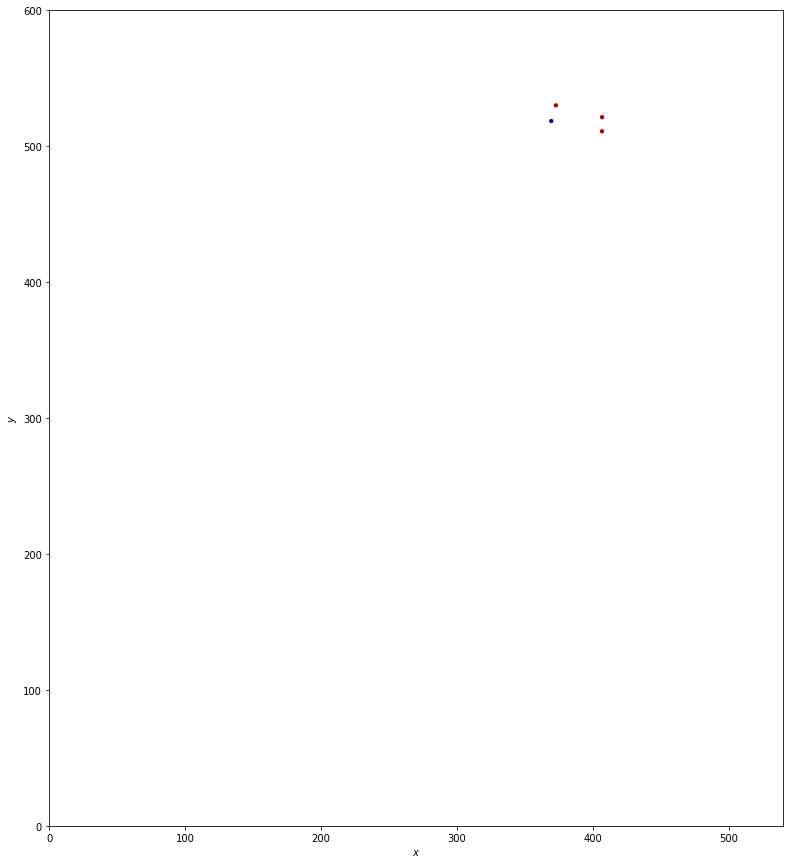

angle -14.6950602212
move (0.40657893796581462, -0.91361565617199791)
341.01097514 521.946372896
70
yes -1 (337.0497, 515.0402)
yes 1 (401.5797, 444.1501)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


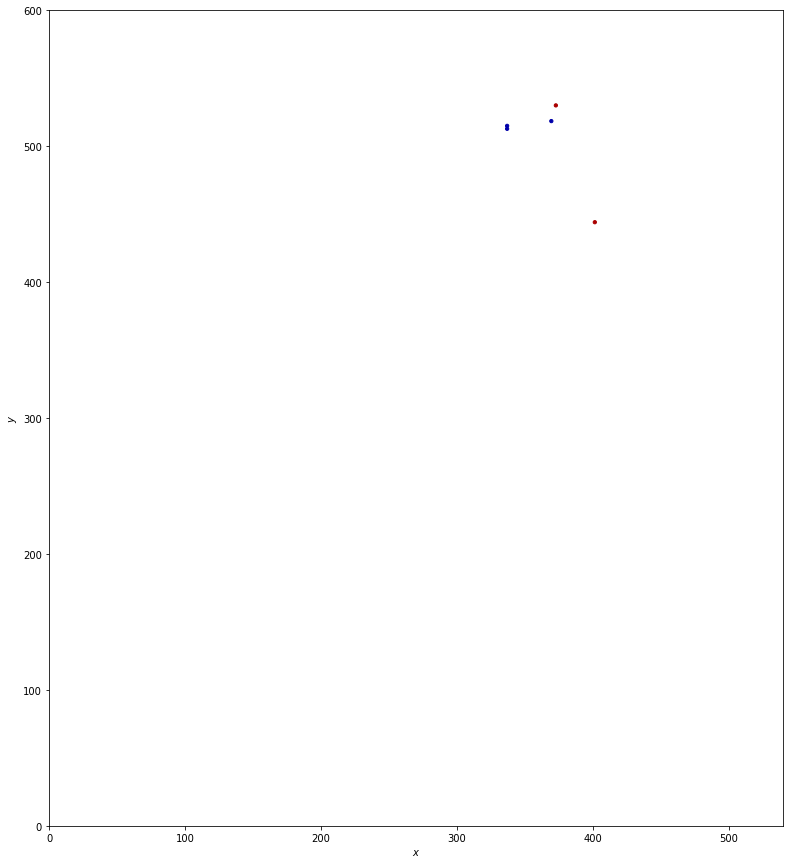

angle -66.0098905752
move (0.8950595469210767, -0.44594664194882866)
341.906034687 521.500426254
71
yes 1 (406.5297, 477.3002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


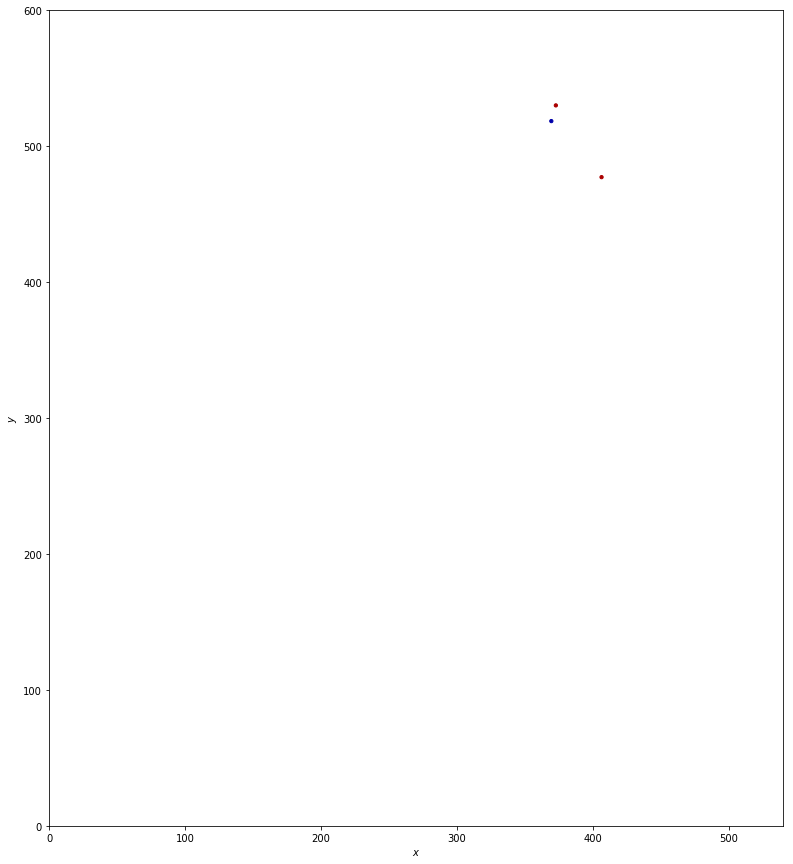

angle -26.4839205627
move (0.95226407341516173, -0.30527550586767288)
342.858298761 521.195150749
72
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


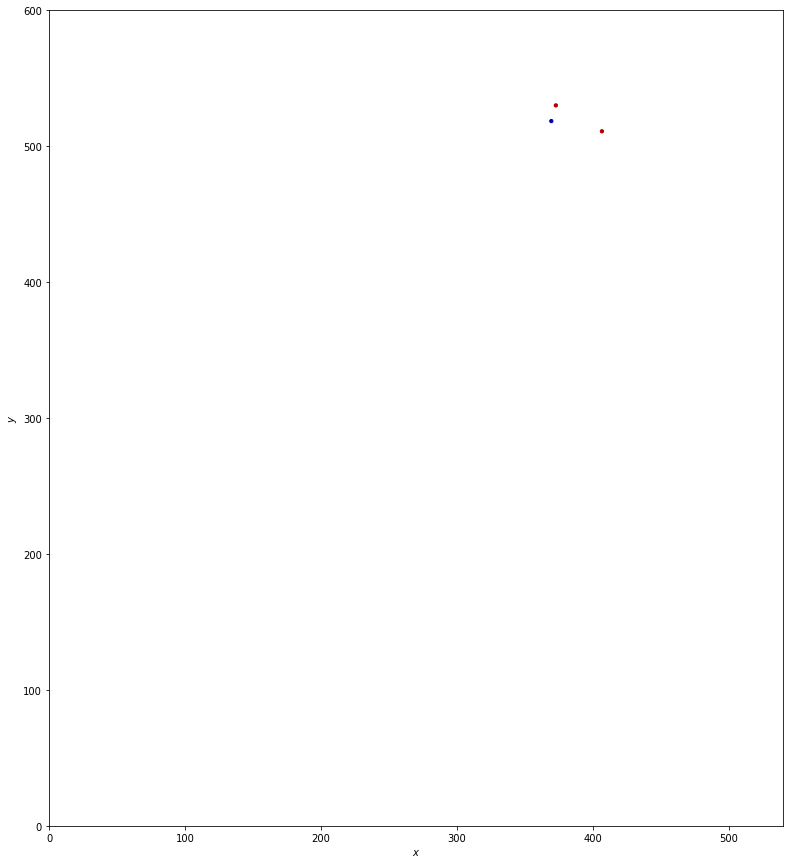

angle -17.7747397621
move (0.8886545356360579, -0.45857727406998949)
343.746953296 520.736573475
73
yes 1 (406.5297, 477.3002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


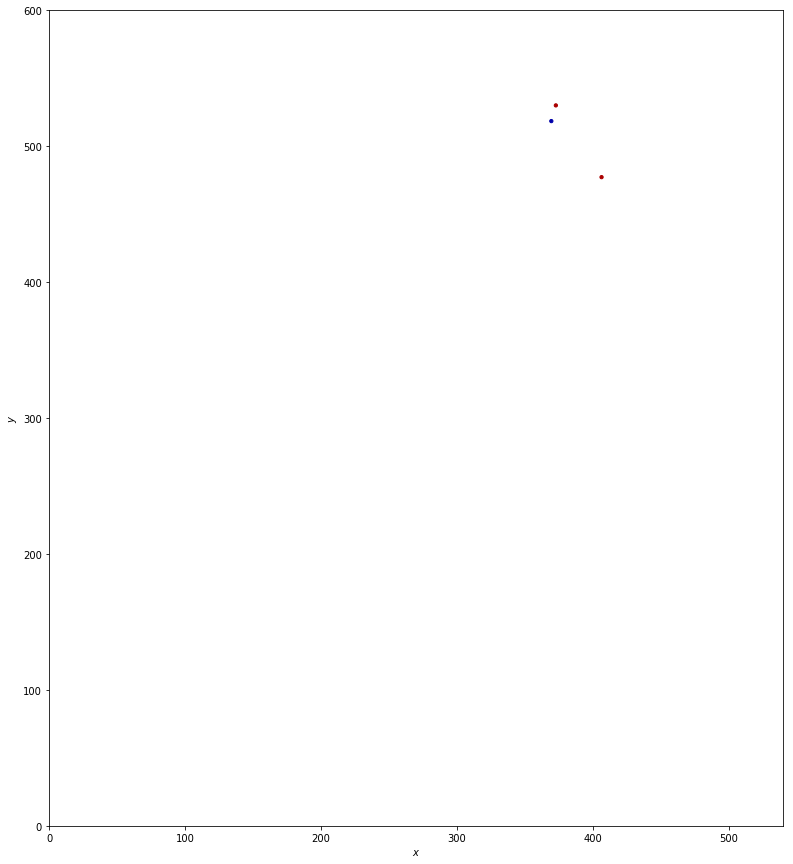

angle -27.2953396405
move (0.99904246706556155, -0.043750988555190315)
344.745995763 520.692822486
74
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


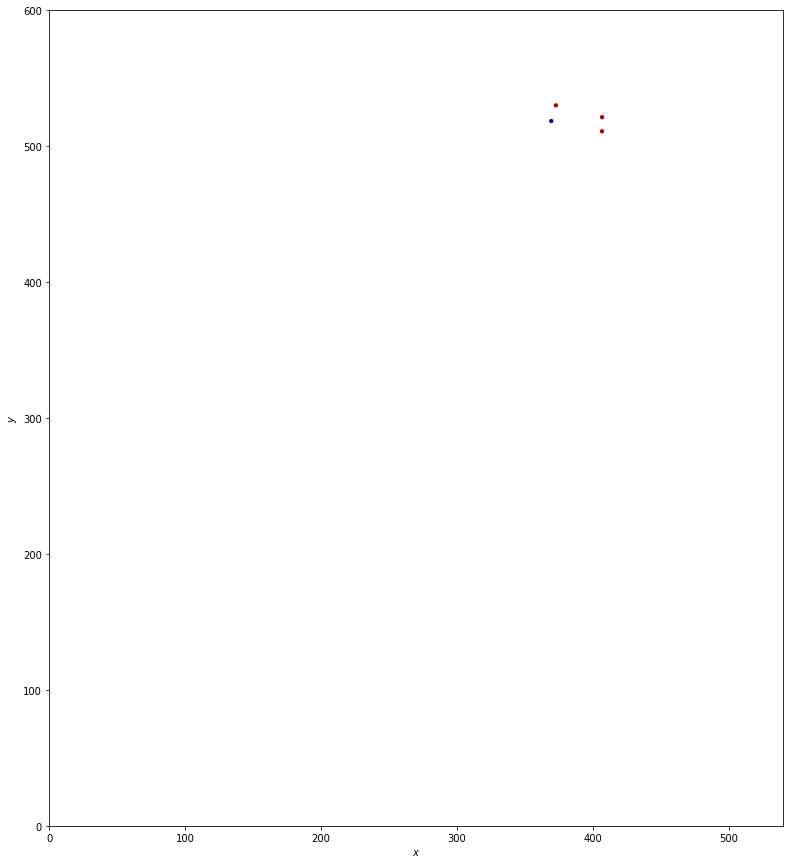

angle -2.50754739791
move (0.56539808698210847, -0.82481816374093753)
345.31139385 519.868004322
75
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


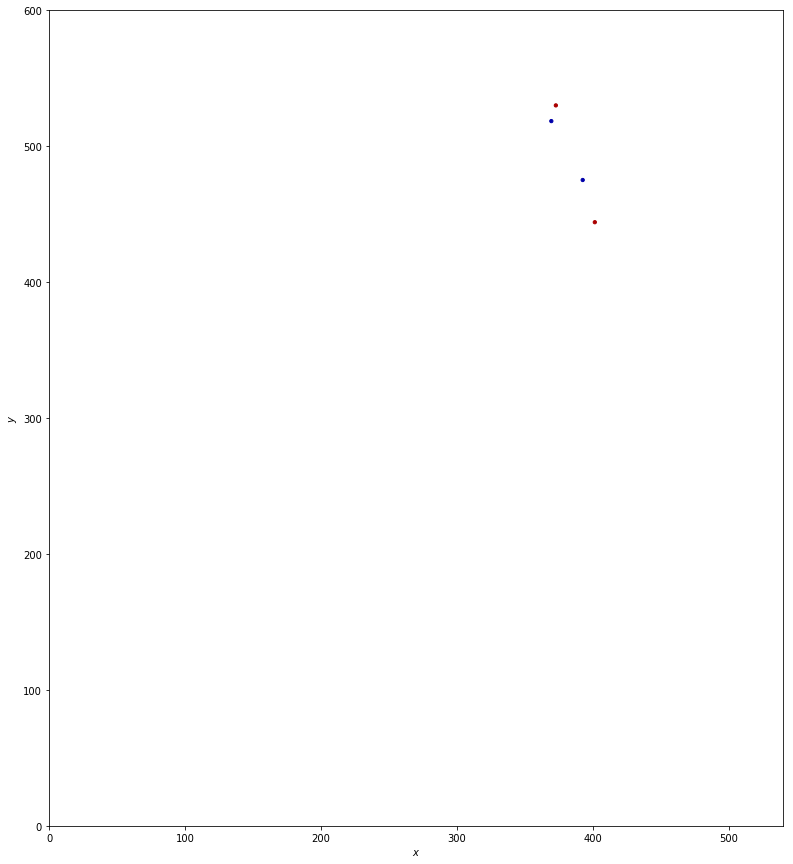

angle -55.5700602535
move (0.72948293125617658, 0.68399901535447871)
346.040876781 520.552003338
76
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


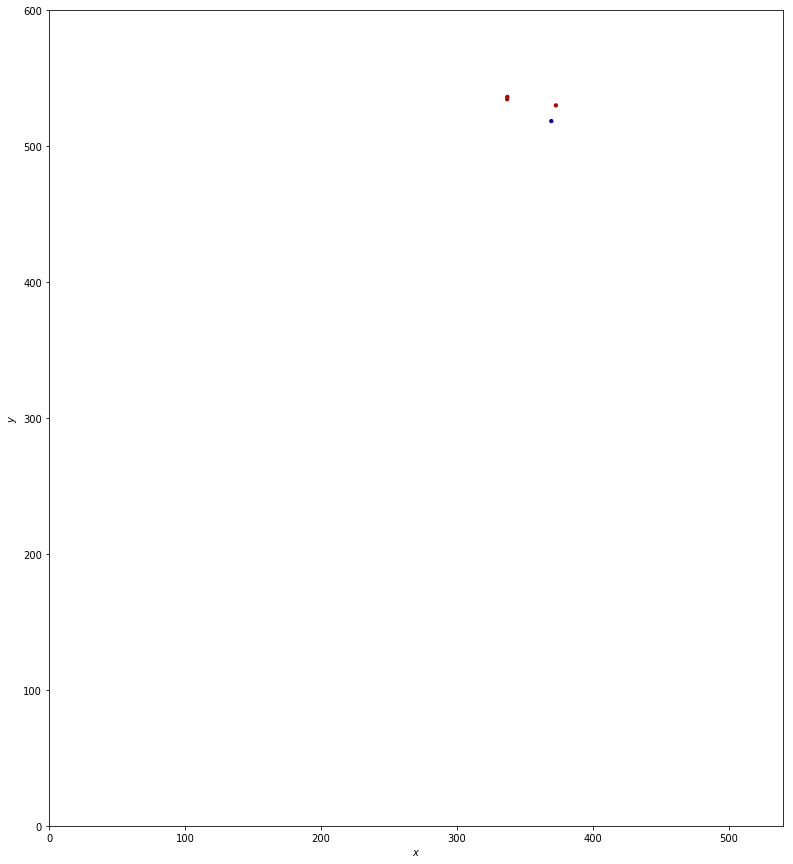

angle 43.1569361423
move (0.85290852629135361, 0.52206038518500075)
346.893785308 521.074063723
77
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


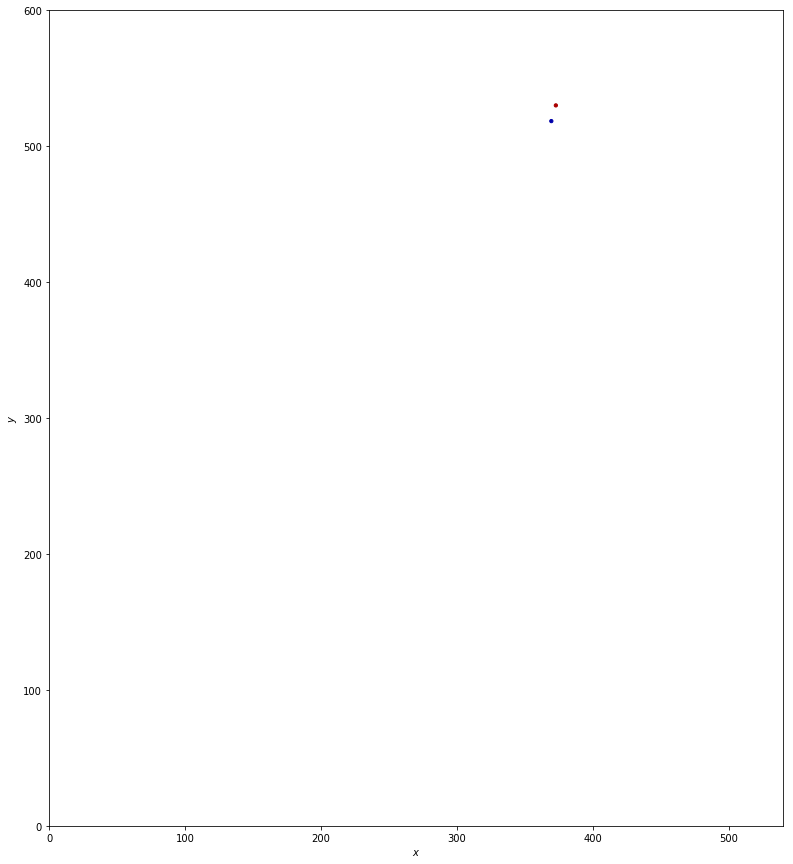

angle 31.4705598118
move (0.84084447911625027, 0.54127678865781947)
347.734629787 521.615340511
78
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


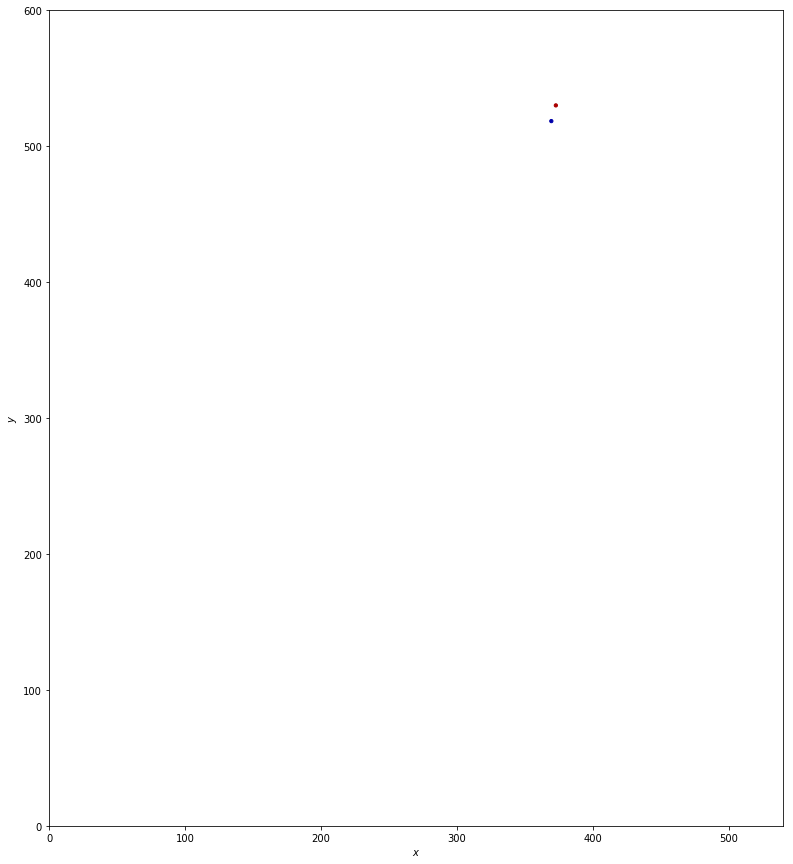

angle 32.7705977461
move (0.86177409799534421, 0.50729222744322722)
348.596403885 522.122632739
79
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


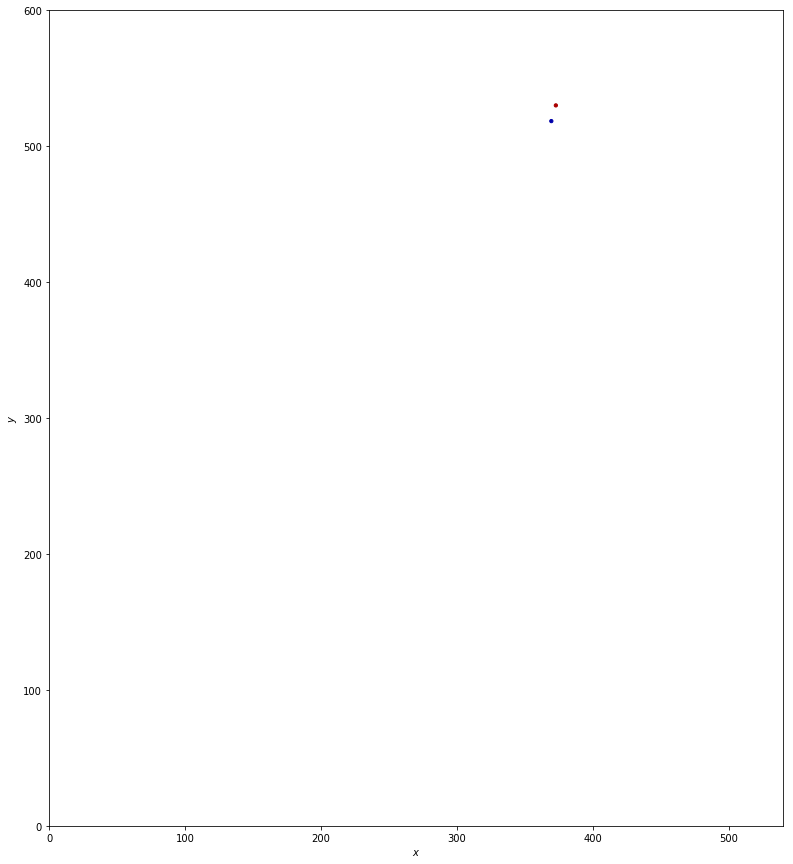

angle 30.4836340959
move (0.88127405632504652, 0.47260558359841537)
349.477677941 522.595238322
80
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


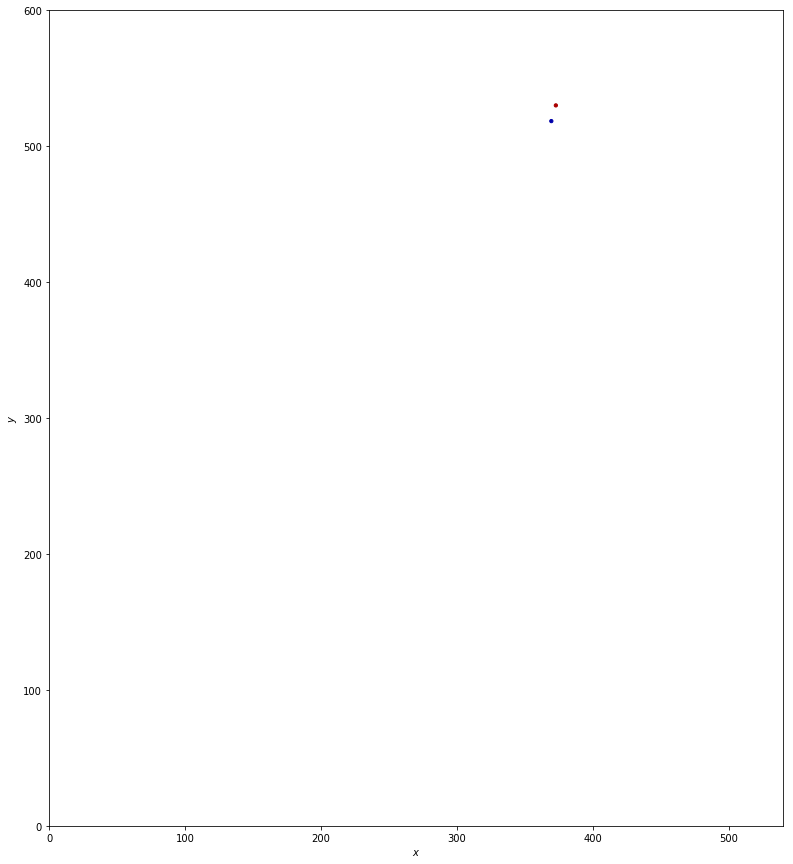

angle 28.2035639645
move (0.89931400347641011, 0.43730346803019005)
350.376991945 523.032541791
81
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


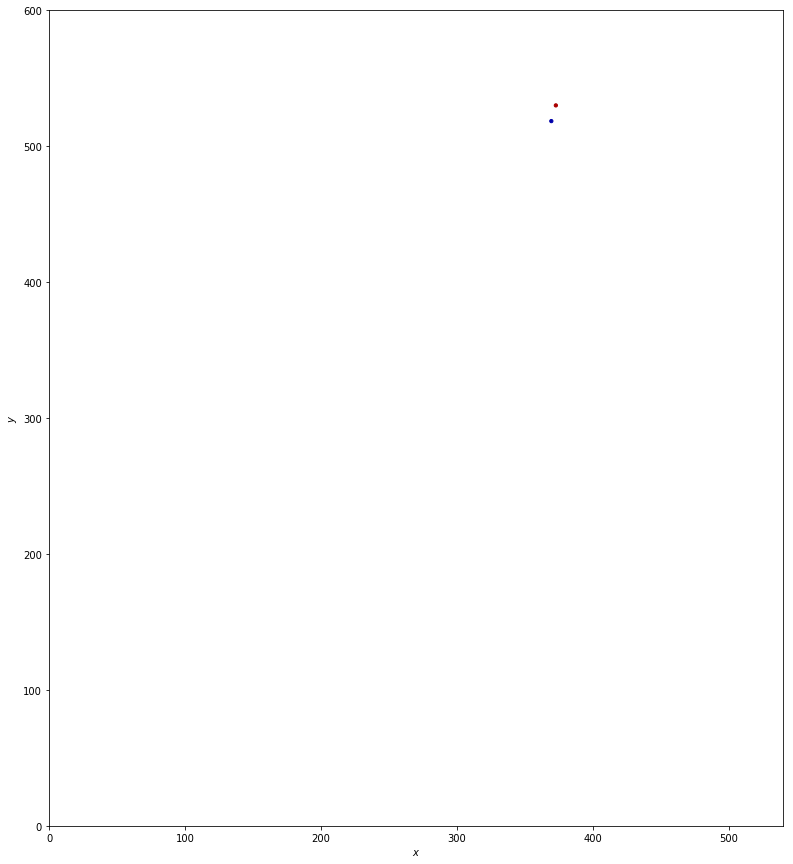

angle 25.9319579493
move (0.9158694063545324, 0.40147631375187803)
351.292861351 523.434018104
82
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


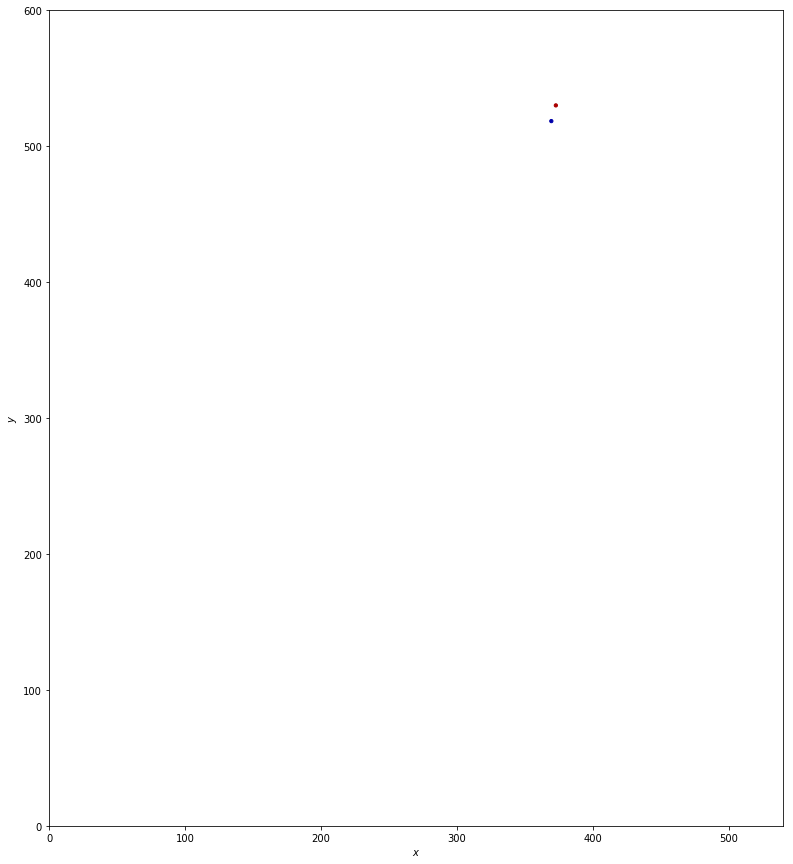

angle 23.6705024711
move (0.93092195485108886, 0.36521817311879123)
352.223783306 523.799236277
83
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


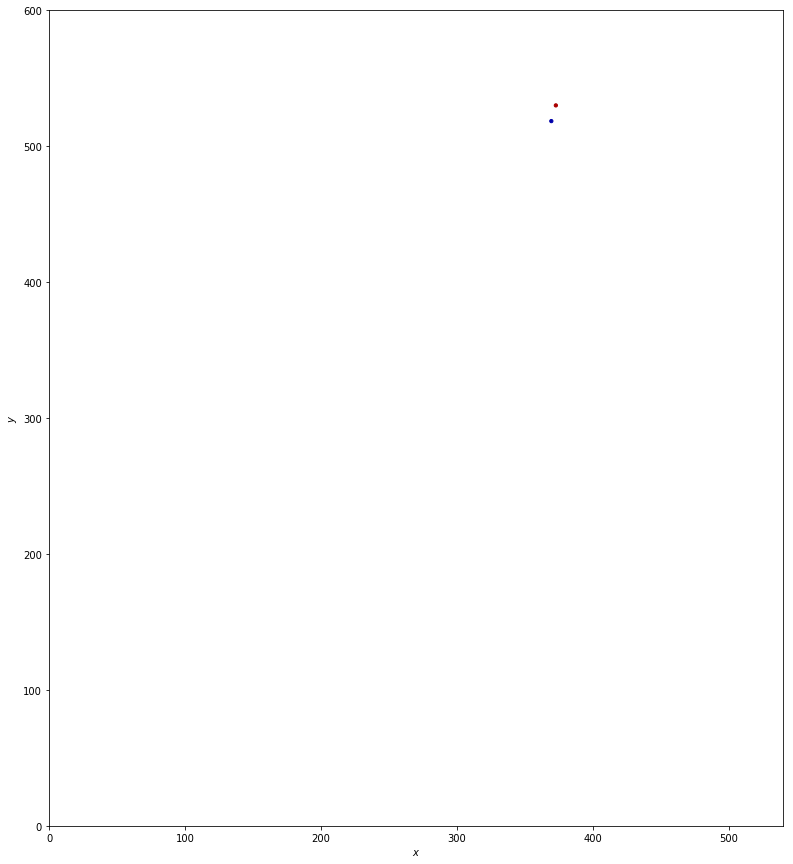

angle 21.4210100641
move (0.94445995608116318, 0.32862652260456299)
353.168243262 524.1278628
84
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


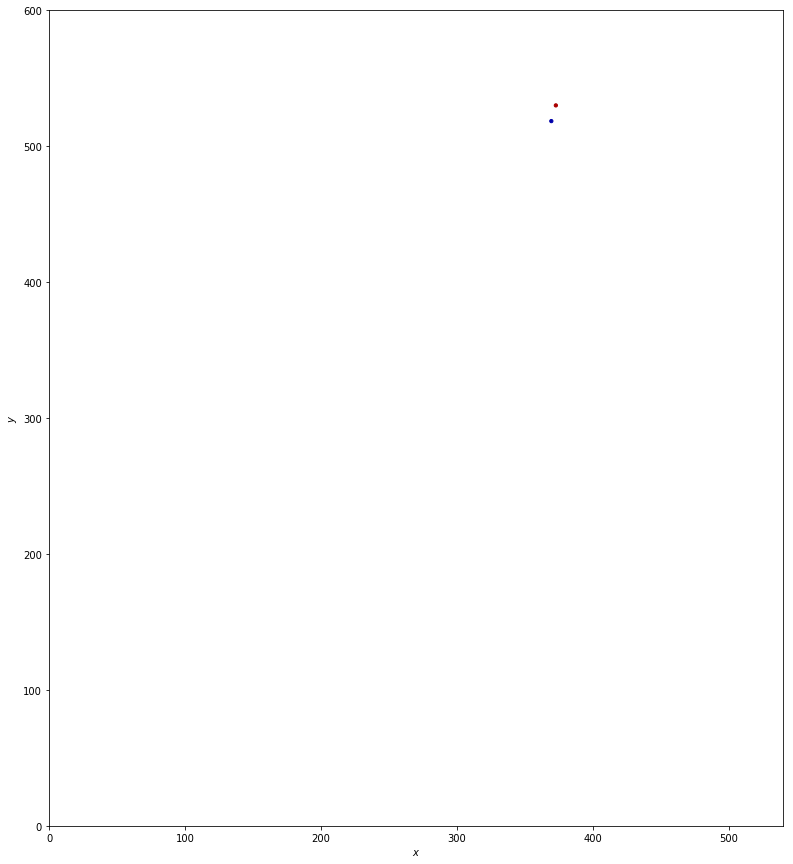

angle 19.1854321953
move (0.95647871899148151, 0.29180209066491386)
354.124721981 524.419664891
85
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


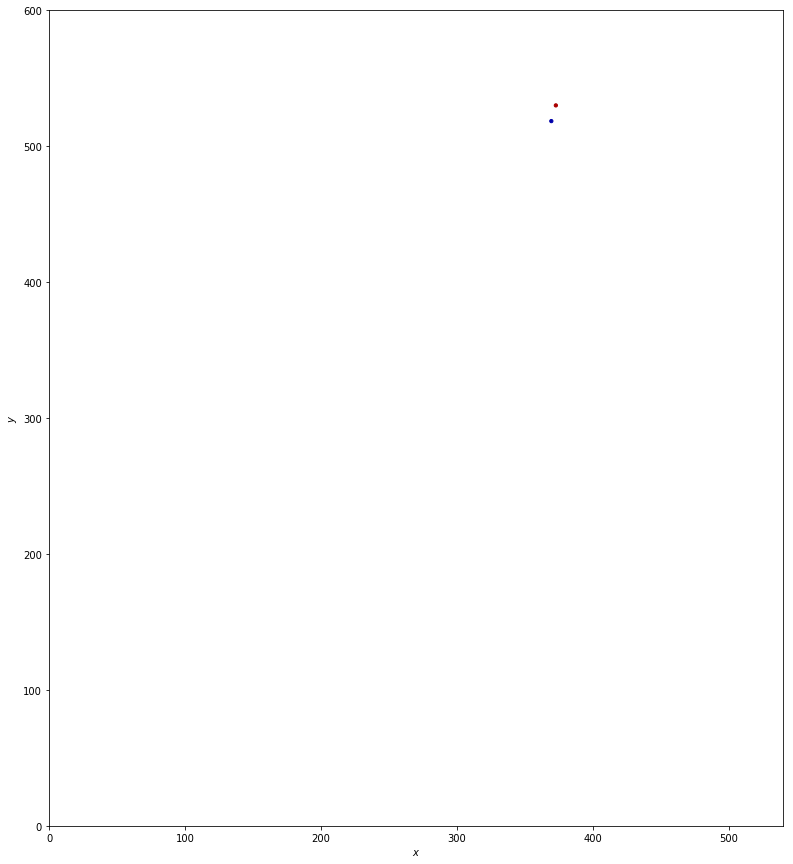

angle 16.9658754052
move (0.96698093339589863, 0.25484872856029073)
355.091702914 524.674513619
86
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


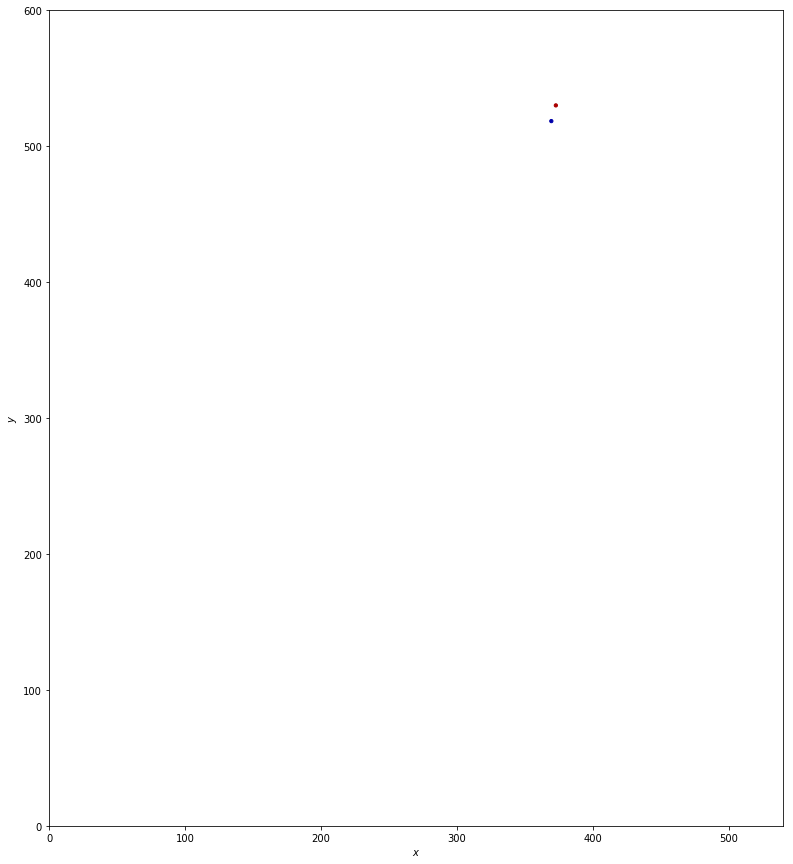

angle 14.7646217955
move (0.97597705076843333, 0.21787334938755321)
356.067679965 524.892386969
87
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


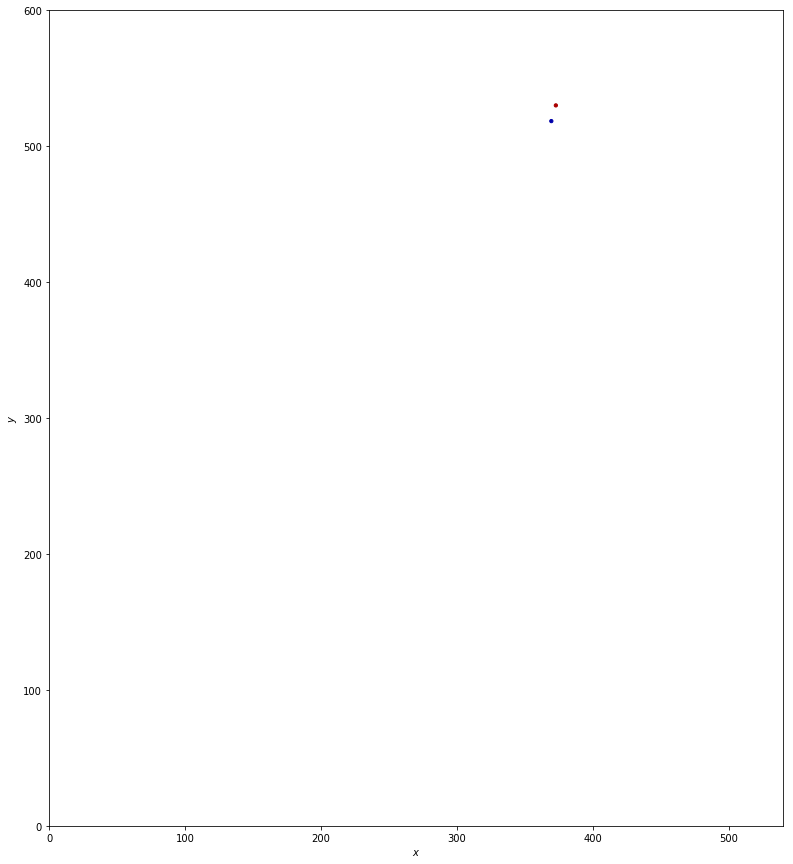

angle 12.5841552109
move (0.98348567842222001, 0.18098596724162236)
357.051165644 525.073372936
88
yes 1 (406.9497, 521.4001)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


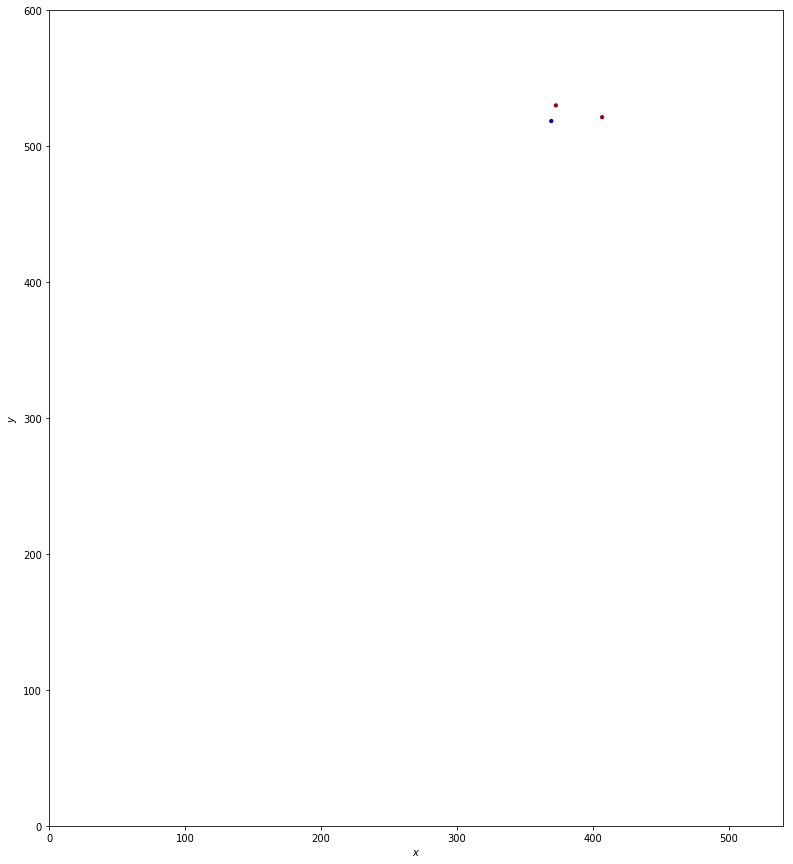

angle 10.4271948676
move (0.98659905149618443, -0.16316345052378997)
358.037764695 524.910209485
89
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


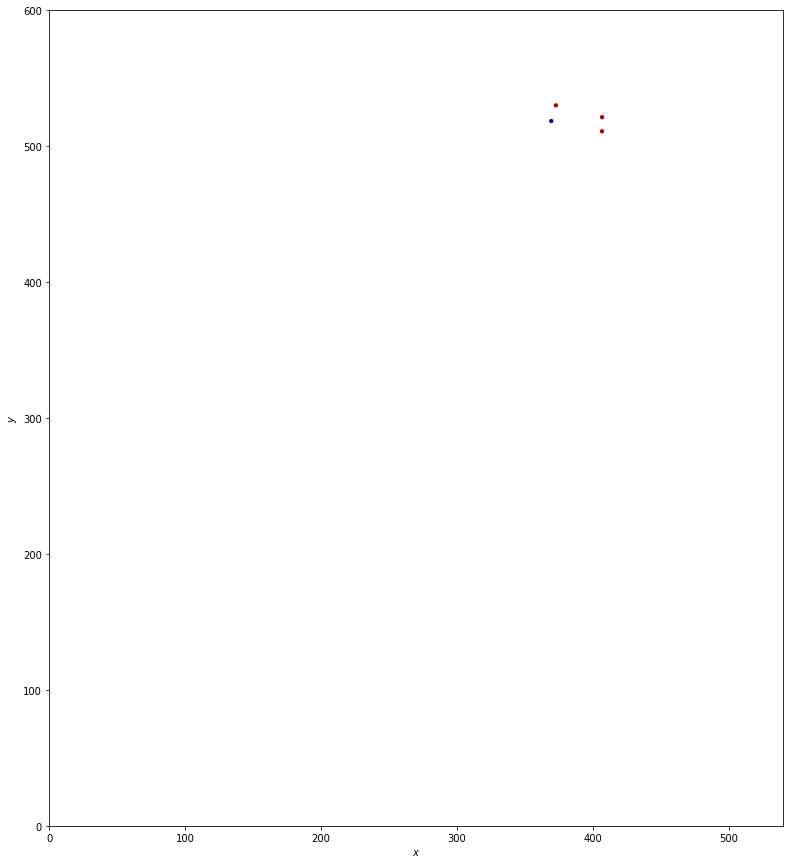

angle -9.39056216159
move (0.92313507602730882, -0.38447578780471309)
358.960899771 524.525733698
90
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


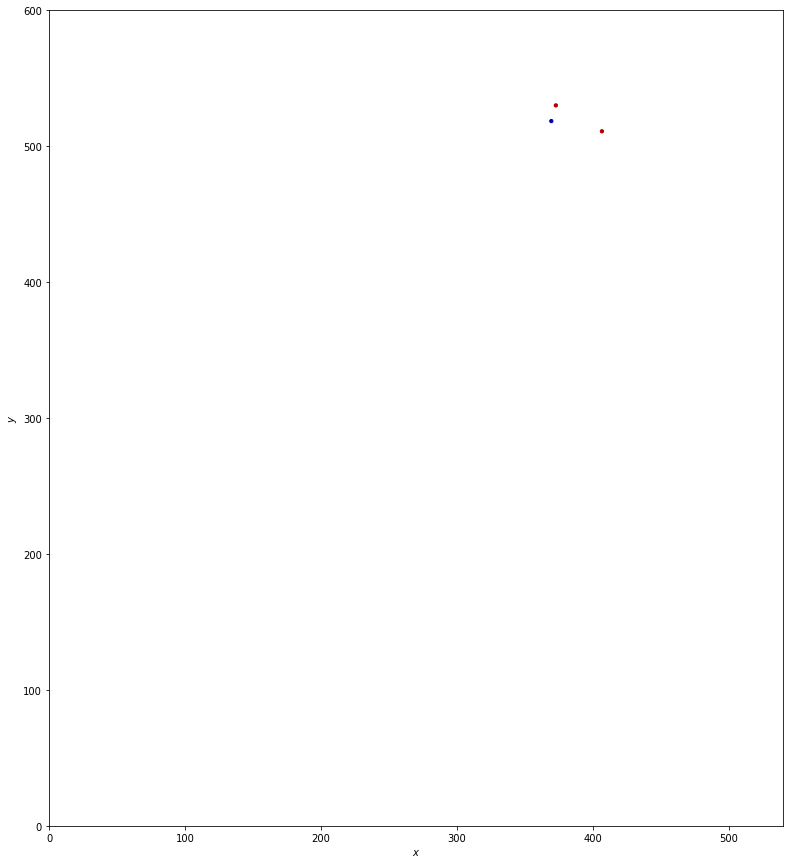

angle -22.6112003872
move (0.99921664894228701, -0.039573835757307822)
359.96011642 524.486159862
91
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


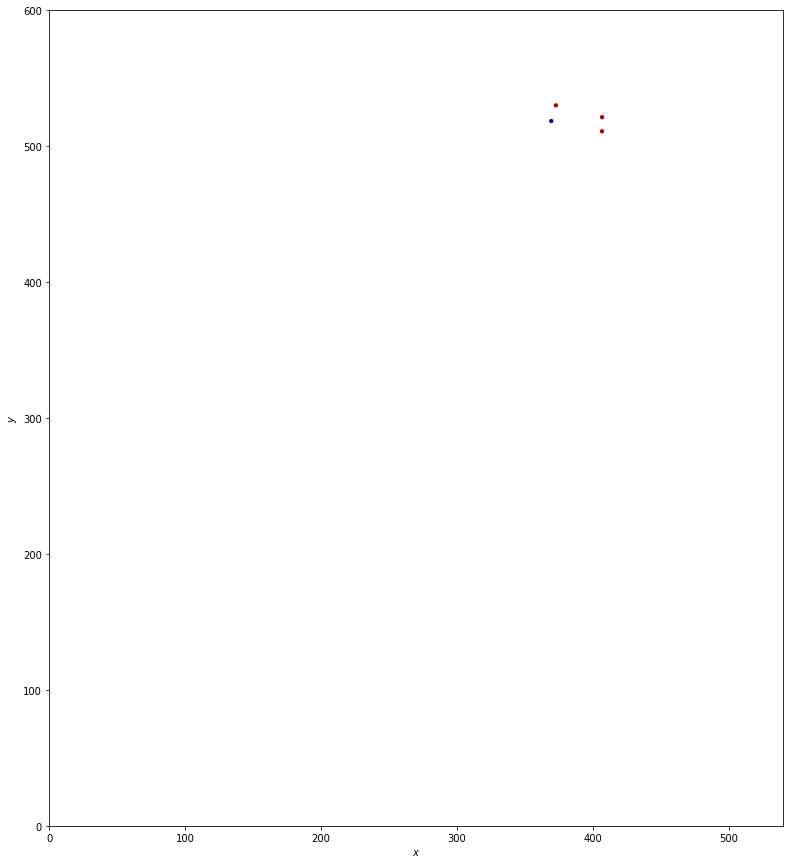

angle -2.26800601394
move (0.96851820252539045, -0.24894274718695214)
360.928634623 524.237217115
92
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


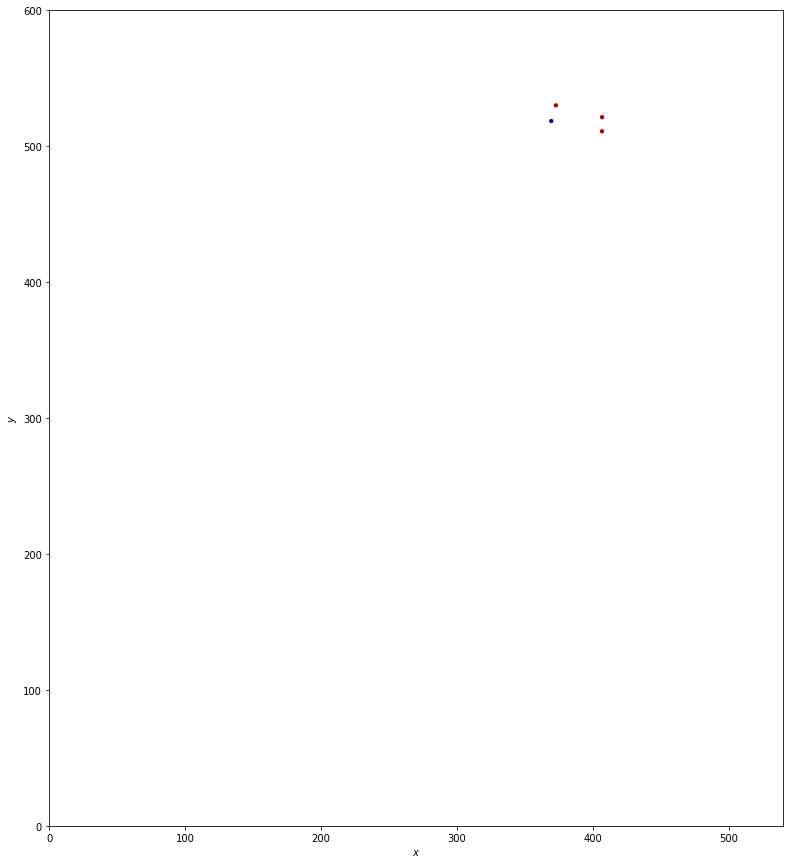

angle -14.4149582384
move (0.98437500240639519, -0.17608479388467774)
361.913009625 524.061132321
93
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


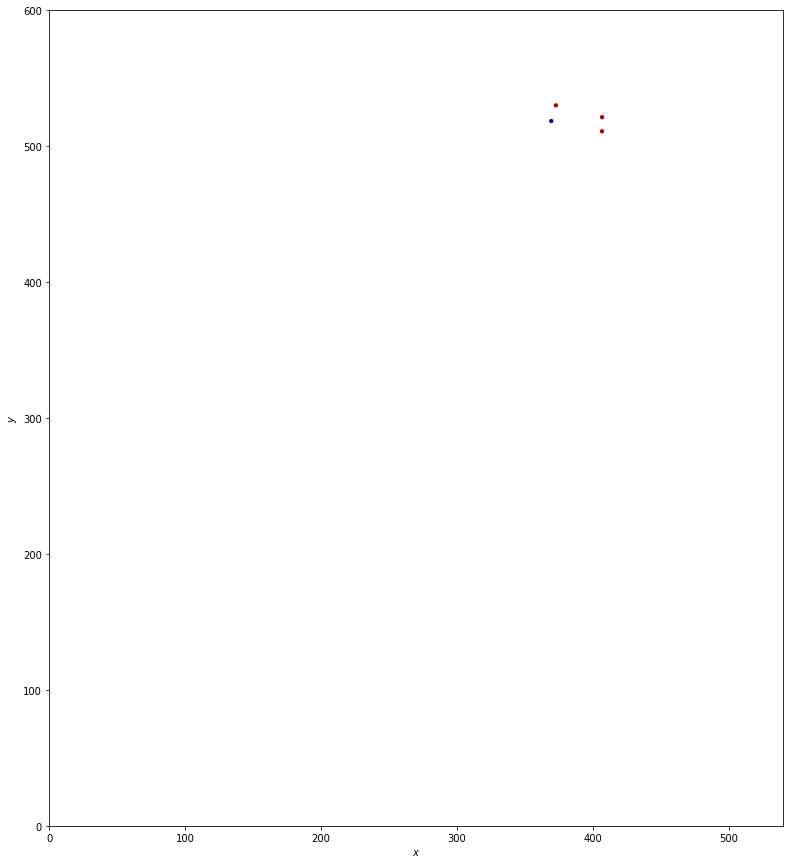

angle -10.1417925827
move (0.99293888383251439, -0.11862703306346582)
362.905948509 523.942505288
94
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


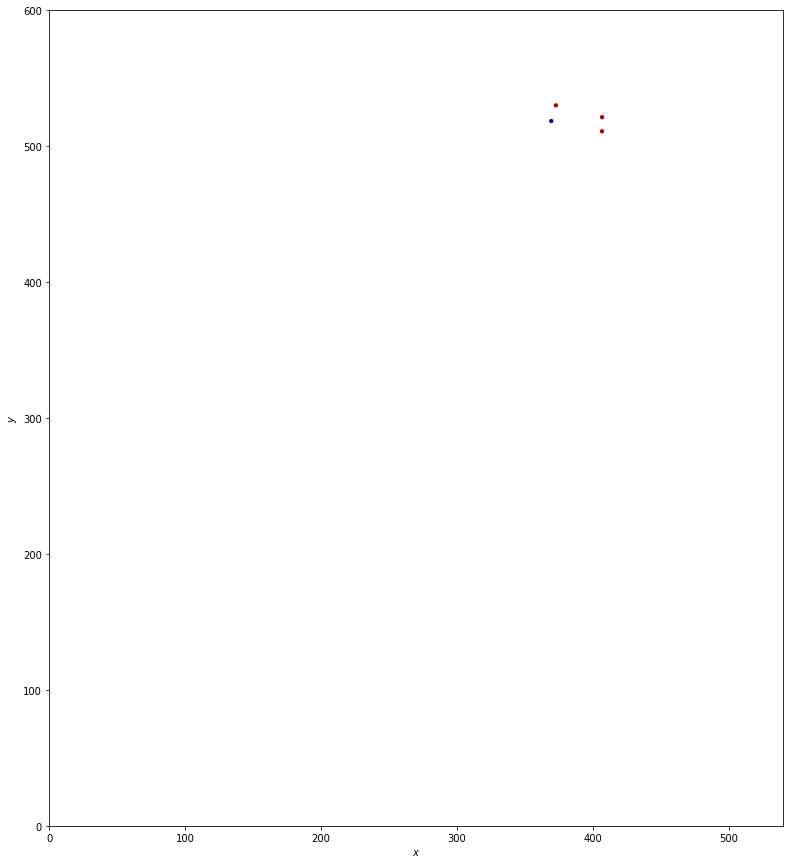

angle -6.81287138407
move (0.99686254532374885, -0.079152168199340484)
363.902811054 523.863353119
95
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


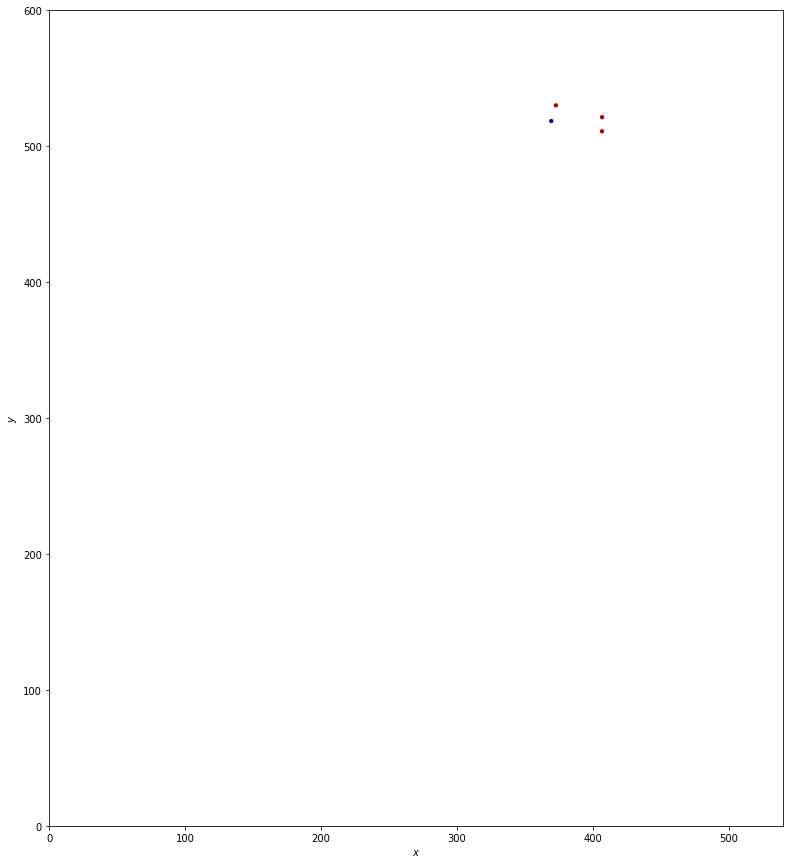

angle -4.5398340121
move (0.99828391174503983, -0.058559640974150638)
364.901094966 523.804793478
96
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


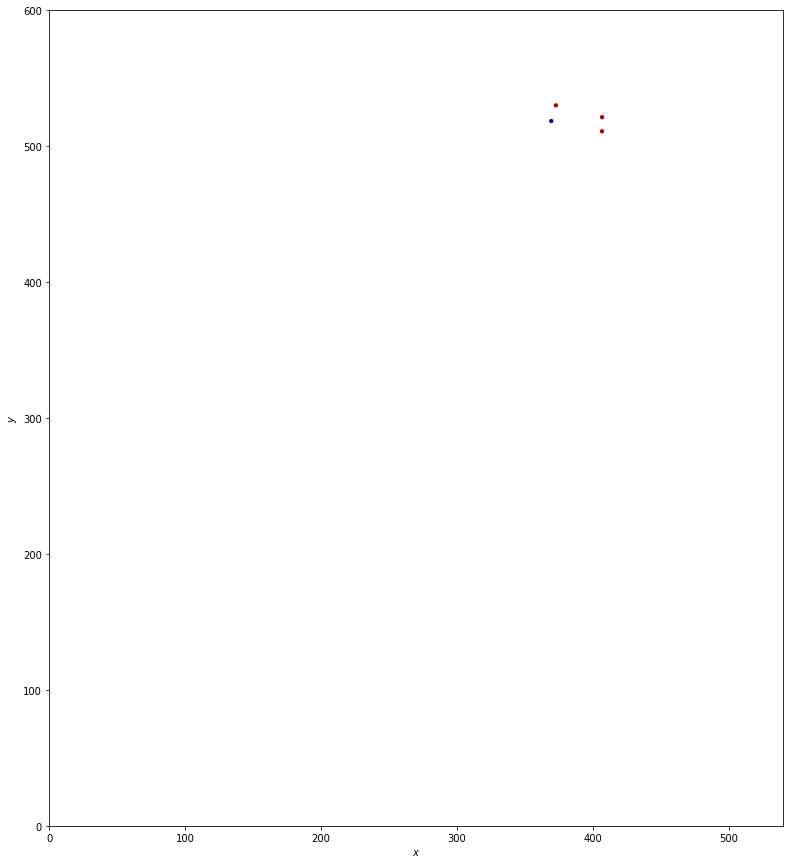

angle -3.35714088076
move (0.99839624602124855, -0.05661215355980203)
365.899491212 523.748181325
97
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


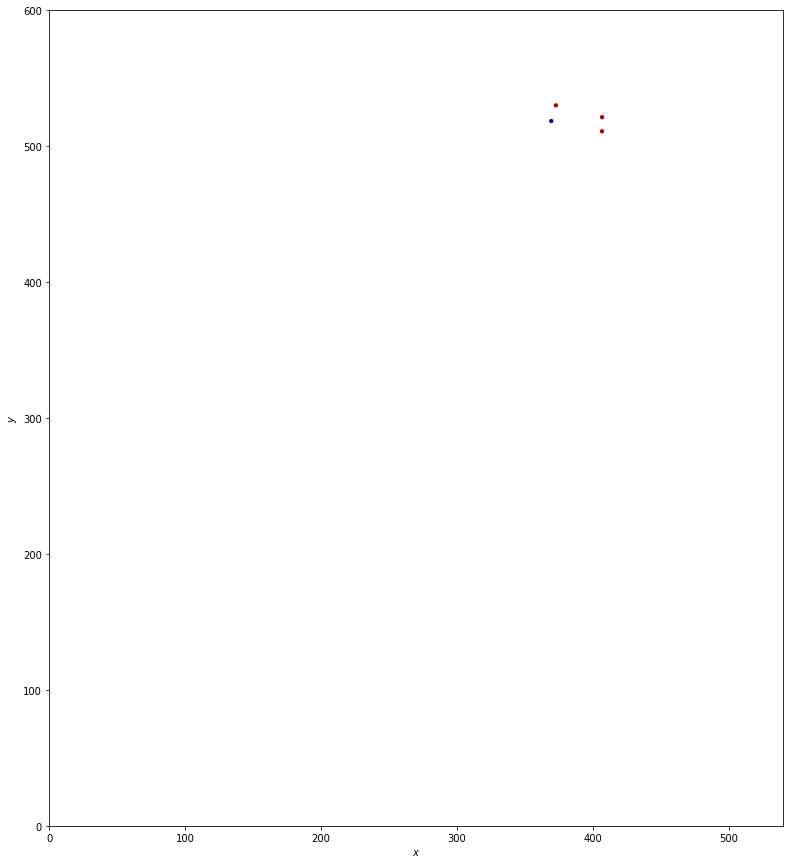

angle -3.24537258008
move (0.99737143550936358, -0.072458399306025351)
366.896862647 523.675722926
98
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


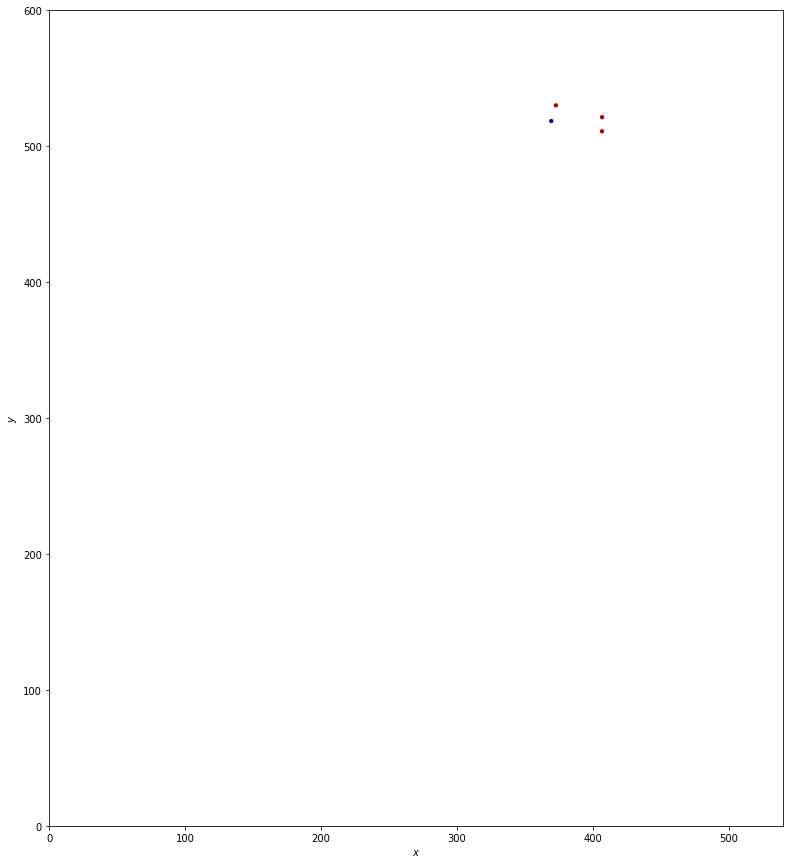

angle -4.15520184758
move (0.99447842555002797, -0.10494122695841511)
367.891341073 523.570781699
99
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


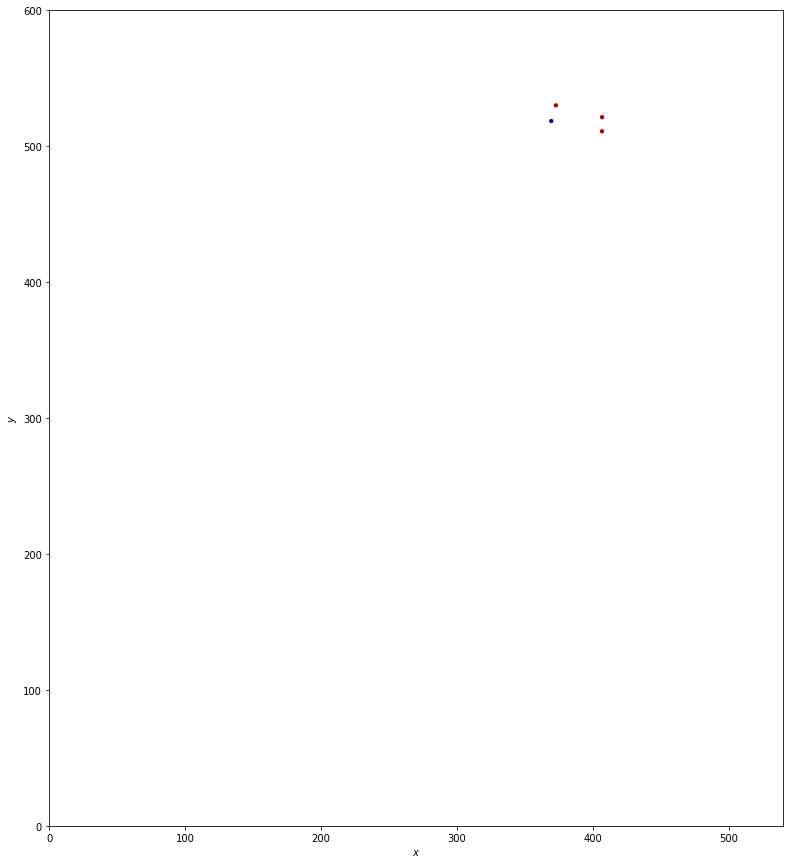

angle -6.02378040549
move (0.98827254895224403, -0.15270025863578085)
368.879613622 523.41808144
100
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


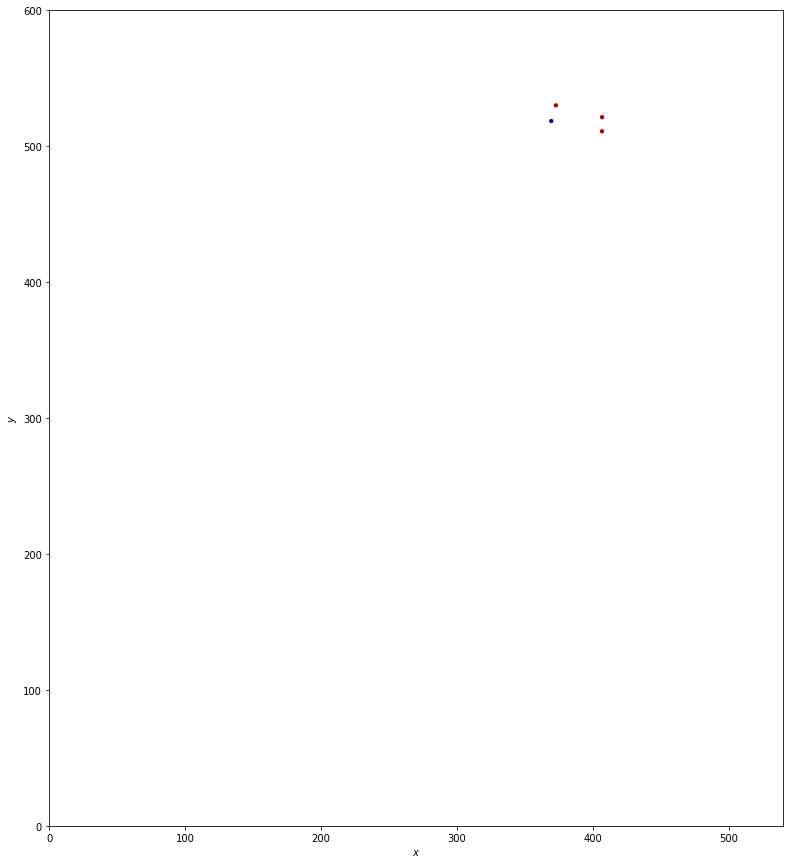

angle -8.78344306992
move (0.97679357401526945, -0.21418289792249137)
369.856407196 523.203898542
101
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)


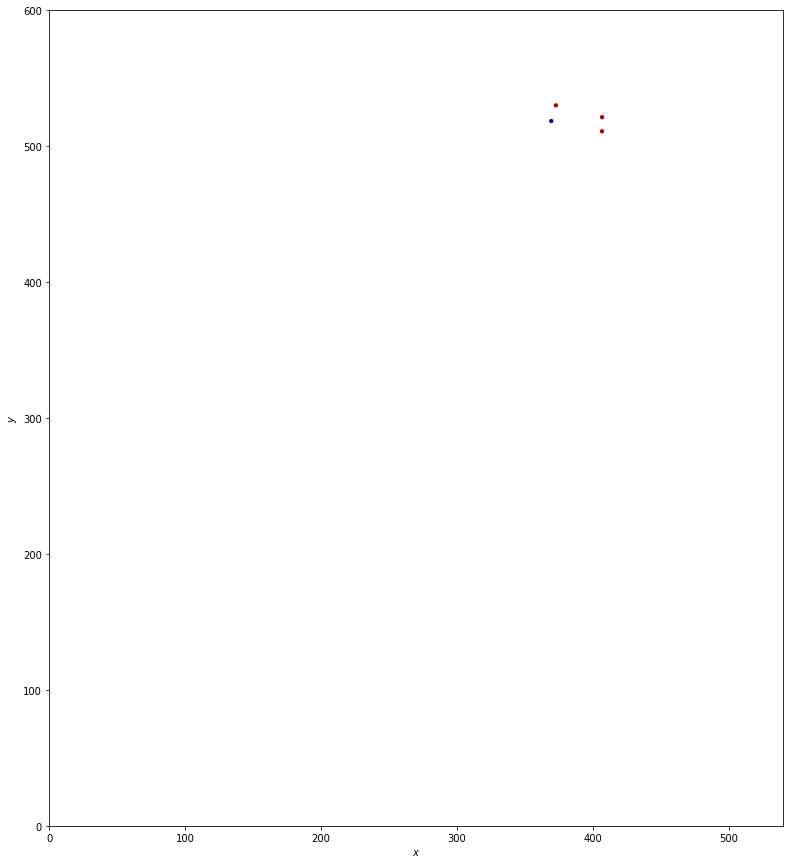

angle -12.3675941473
move (0.95772524704705697, -0.28768446459385627)
370.814132443 522.916214077
102
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)


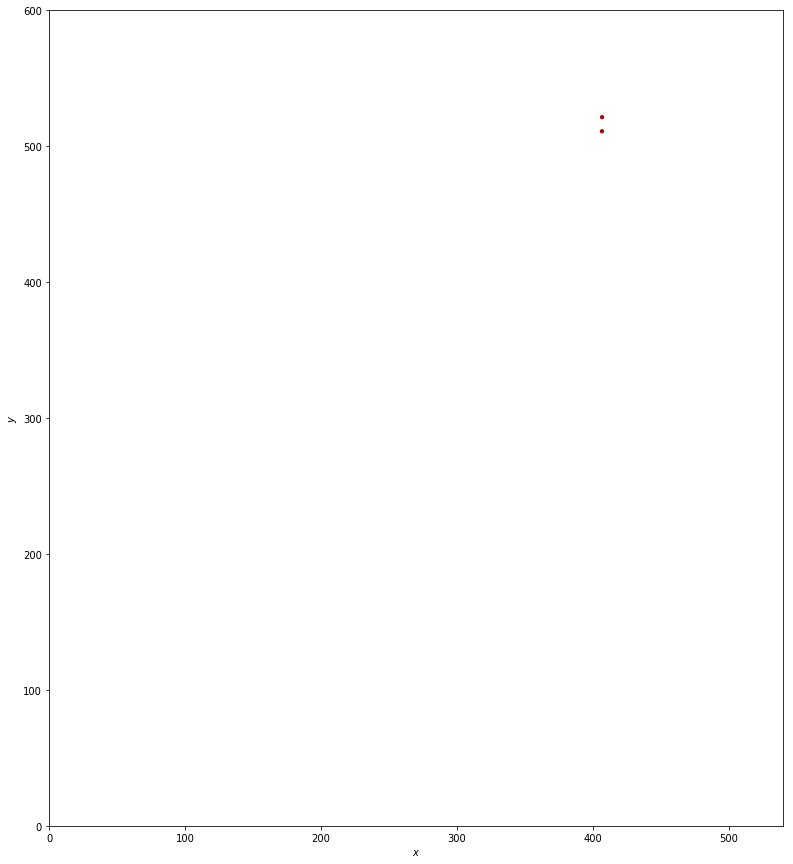

angle -16.7193789651
move (-0.17542375347275588, -0.98449302014667928)
370.638708689 521.931721057
103
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


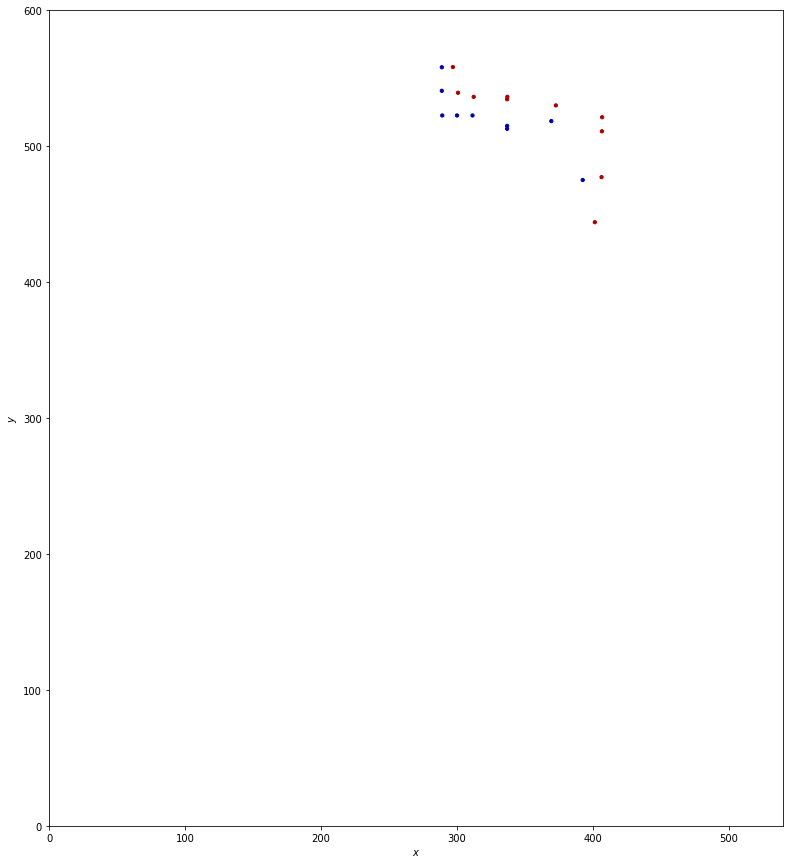

angle -100.103318877
move (0.91741647101227675, -0.39792840903280619)
371.55612516 521.533792648
104
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)


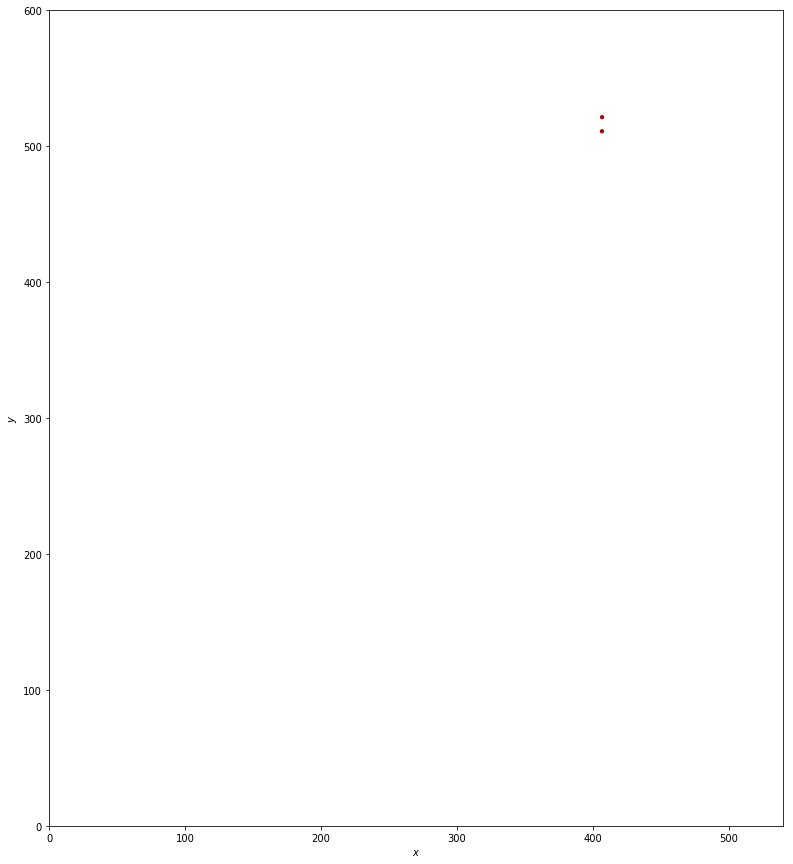

angle -23.4487370441
move (-0.1426764788834515, -0.98976937837731671)
371.413448682 520.54402327
105
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


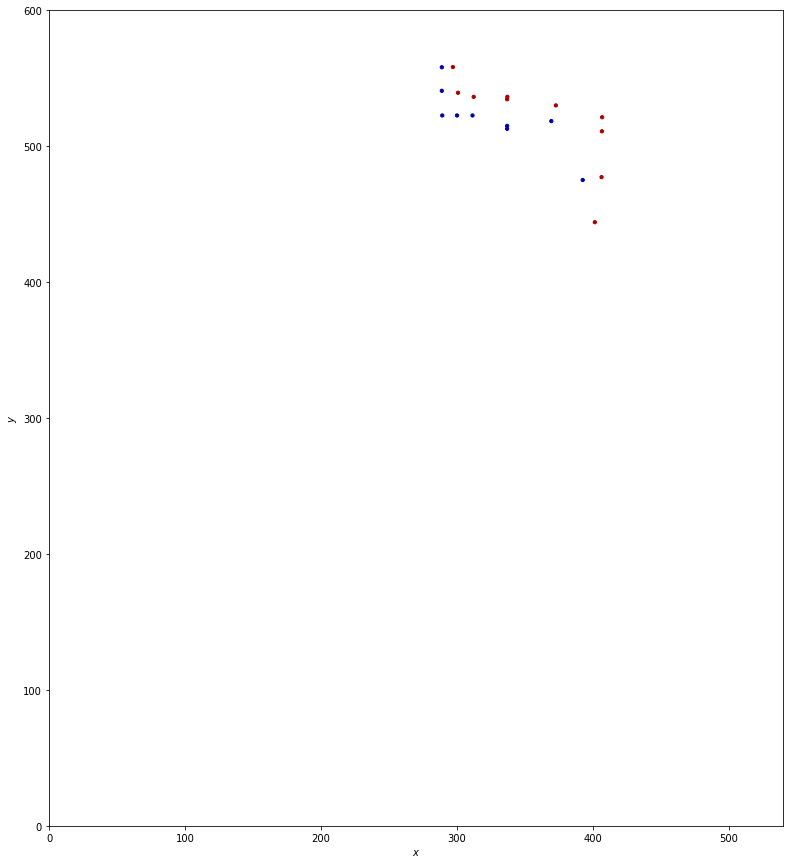

angle -98.2027522862
move (0.75562429764950023, -0.65500528303342676)
372.169072979 519.889017987
106
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)


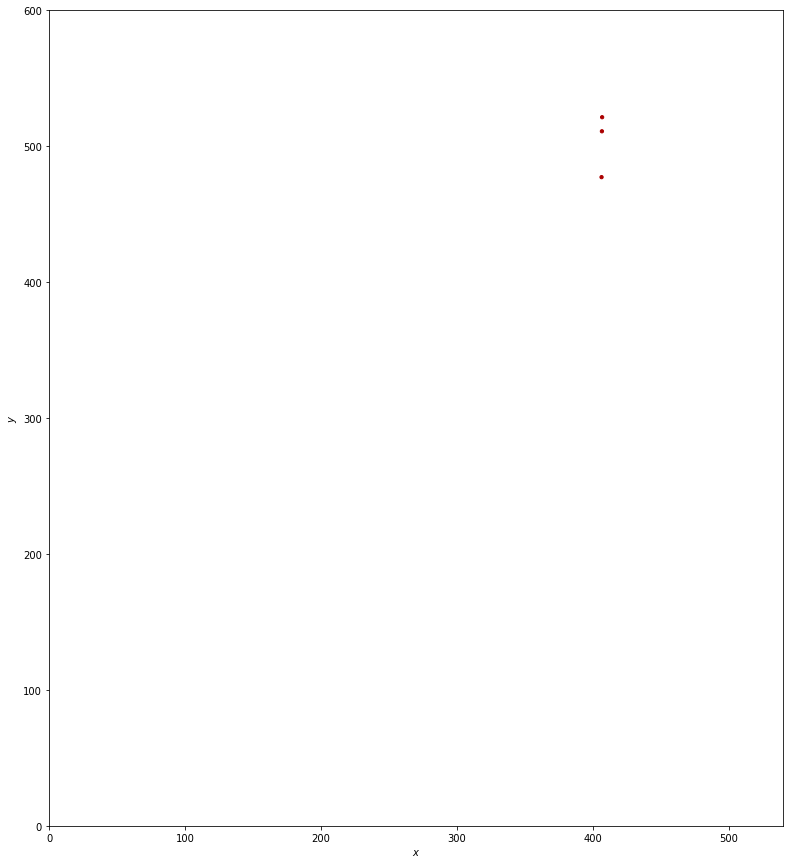

angle -40.9200505436
move (-0.27107939185111135, -0.96255699224182645)
371.897993587 518.926460995
107
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


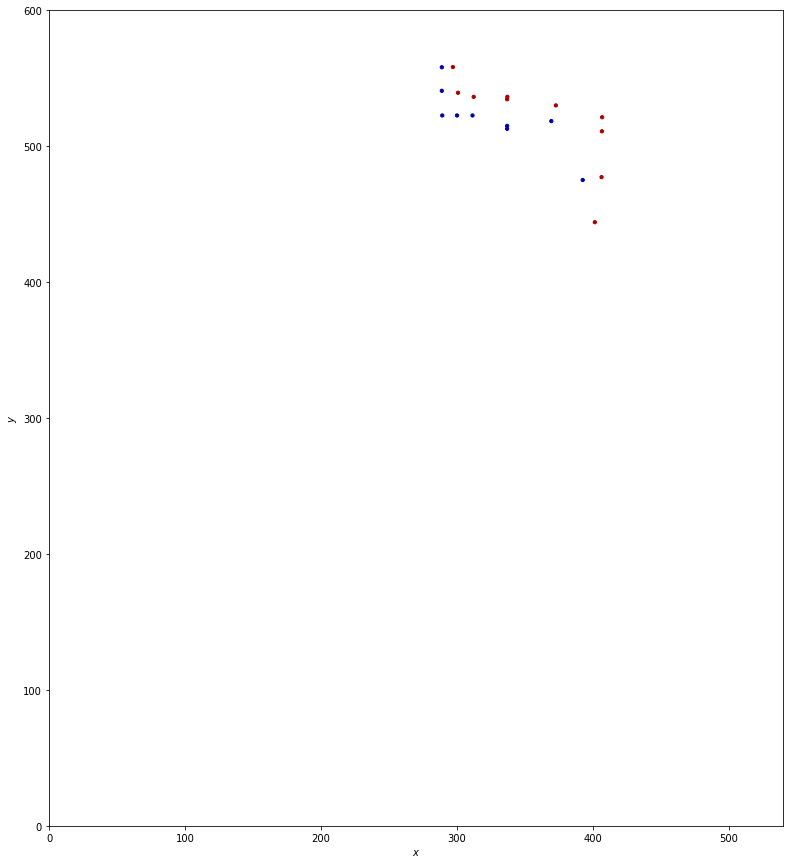

angle -105.728507046
move (0.29296395955164911, -0.95612348491385757)
372.190957547 517.97033751
108
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


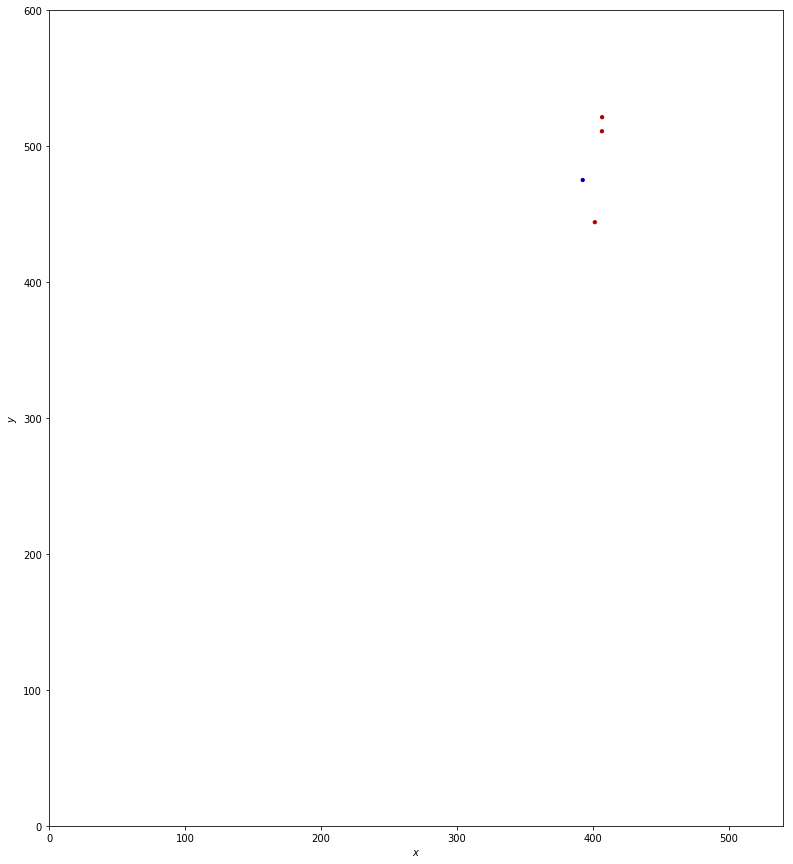

angle -72.9645124452
move (0.10100779121745881, -0.99488563469042524)
372.291965338 516.975451875
109
yes 1 (406.7997, 511.0502)


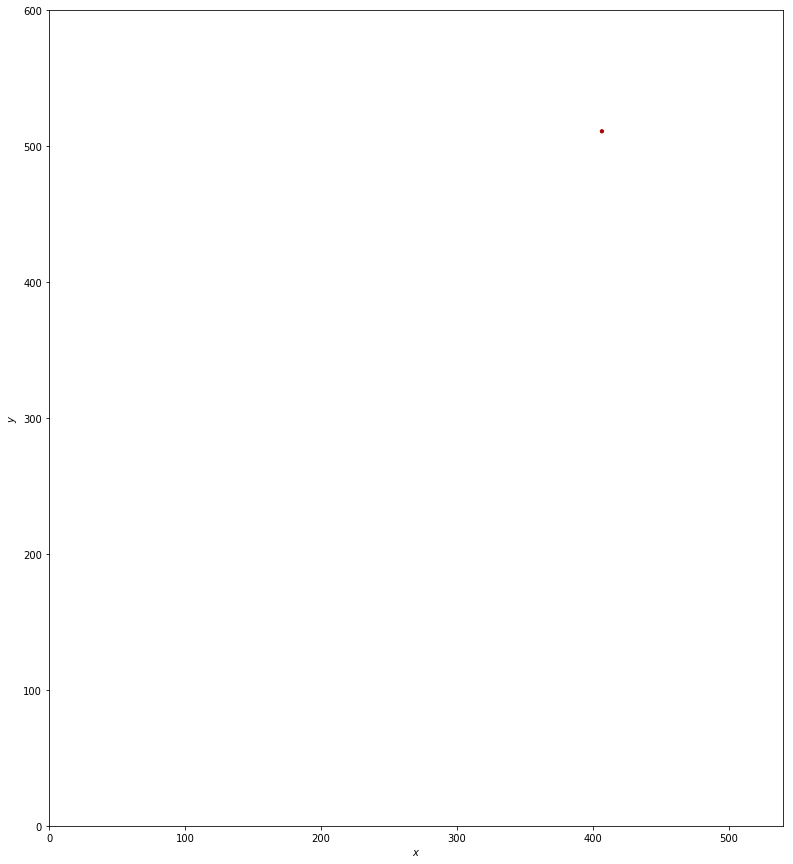

angle -84.2027934809
move (-0.16923128297995157, -0.98557636581898589)
372.122734055 515.989875509
110
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


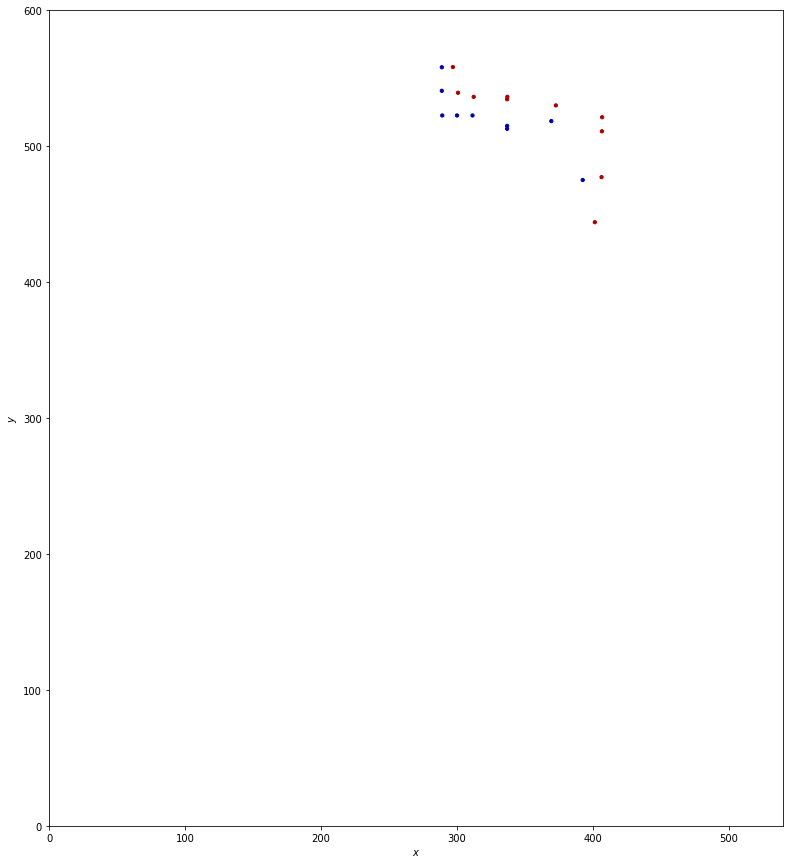

angle -99.7431272432
move (-0.43588773720832658, -0.90000104475017406)
371.686846318 515.089874464
111
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


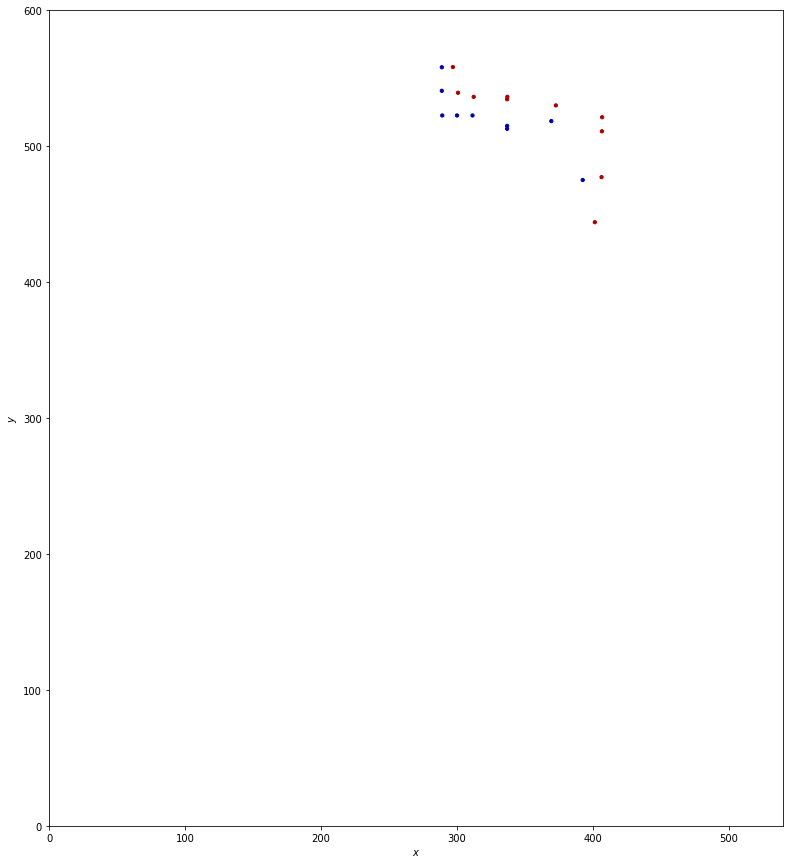

angle -115.841795435
move (-0.58578441646890833, -0.81046691321865849)
371.101061901 514.279407551
112
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


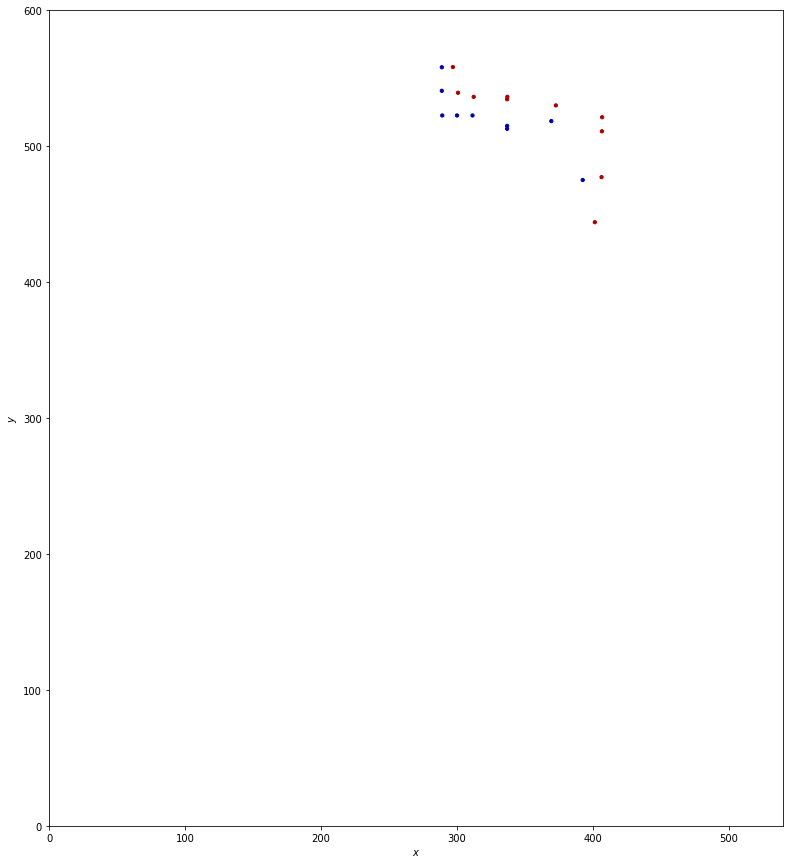

angle -125.858424787
move (-0.69407796500942676, -0.71989983920568634)
370.406983936 513.559507712
113
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


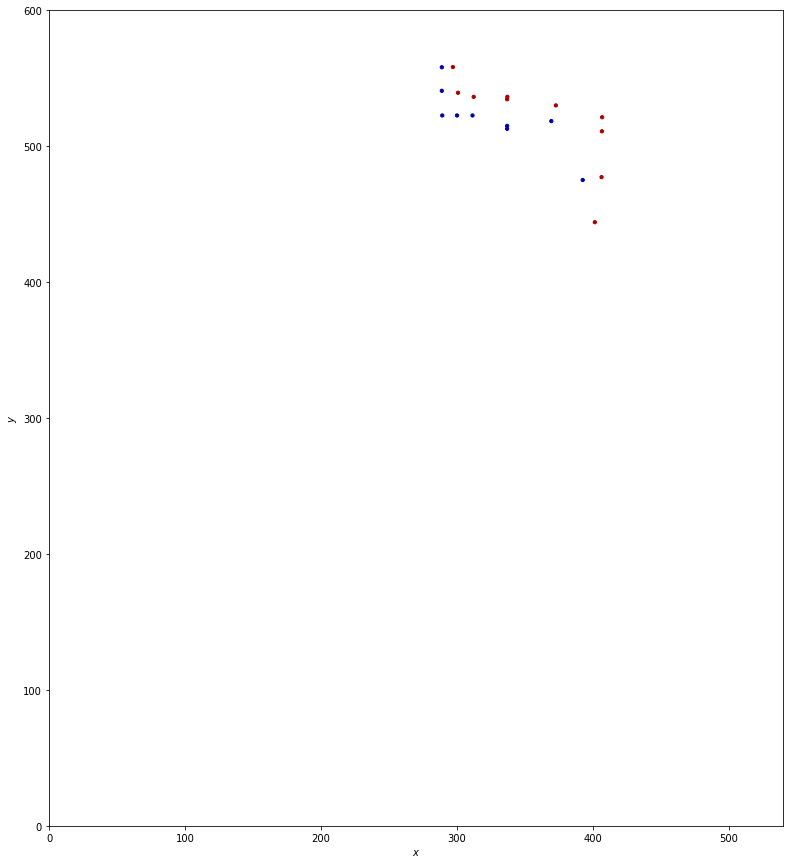

angle -133.953788403
move (-0.76771126415309121, -0.64079592296804033)
369.639272672 512.918711789
114
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


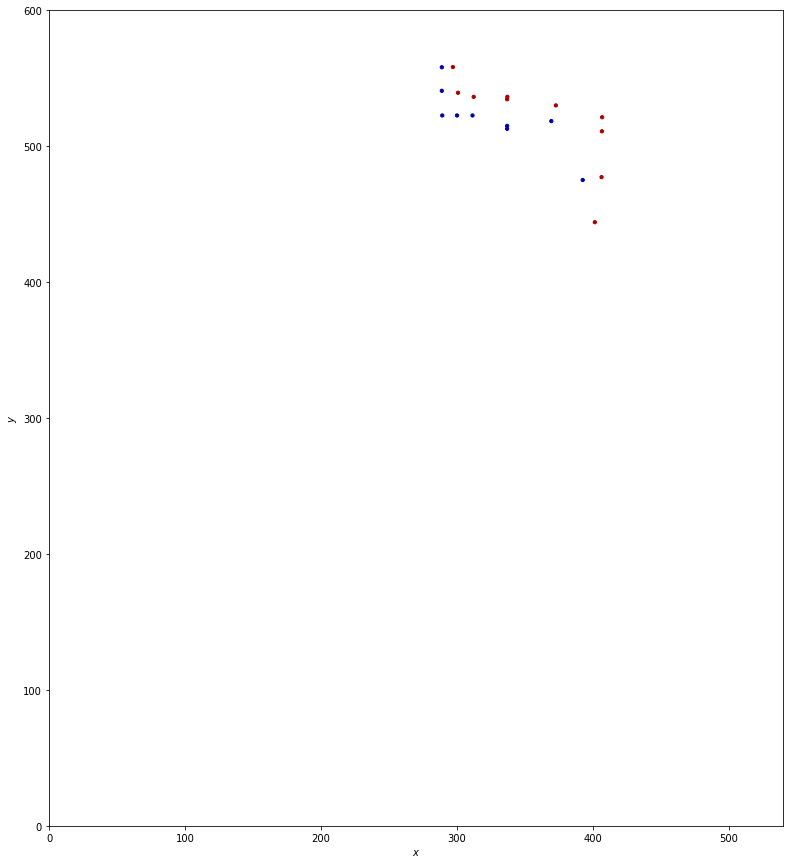

angle -140.148804896
move (-0.81238720254414321, -0.58311836975223241)
368.82688547 512.335593419
115
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


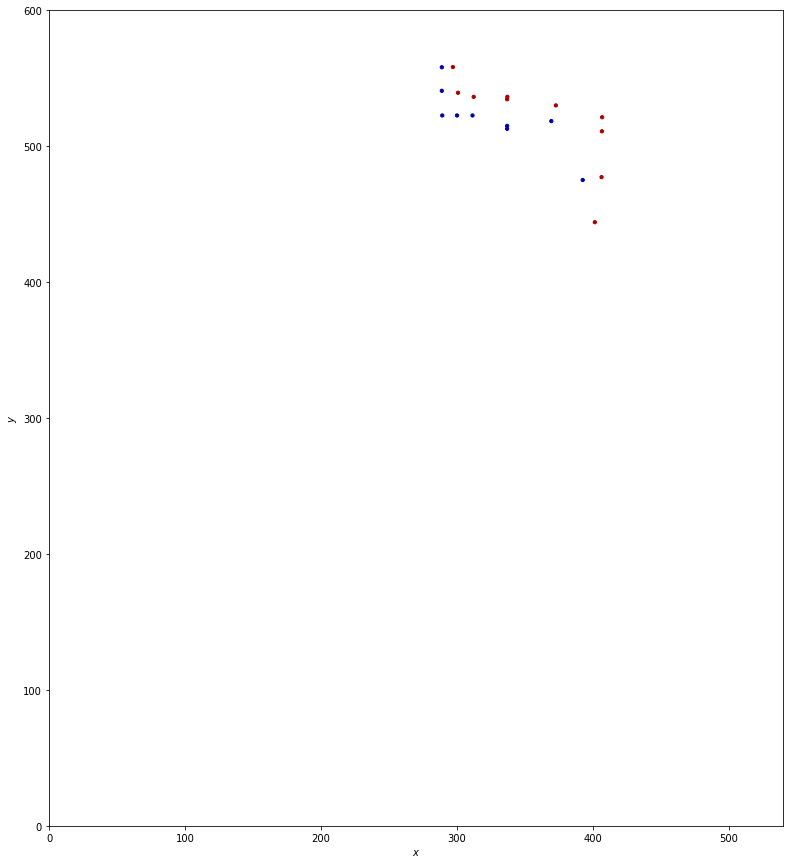

angle -144.329827609
move (-0.83104869111023982, -0.55619967008616367)
367.995836779 511.779393749
116
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


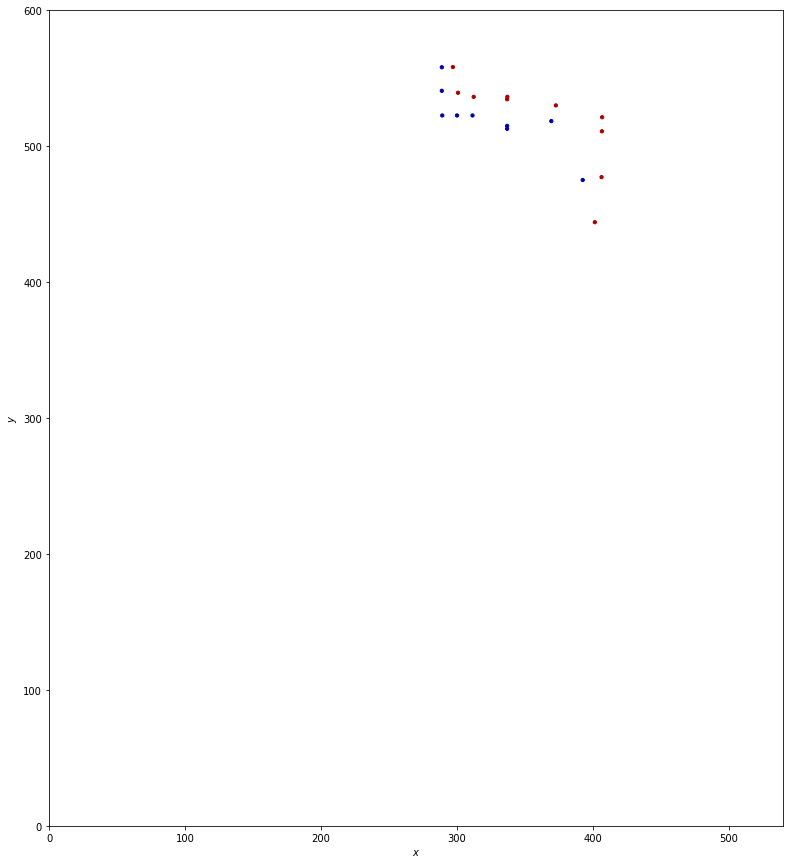

angle -146.206615111
move (-0.82218416333660449, -0.56922157509926452)
367.173652615 511.210172174
117
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


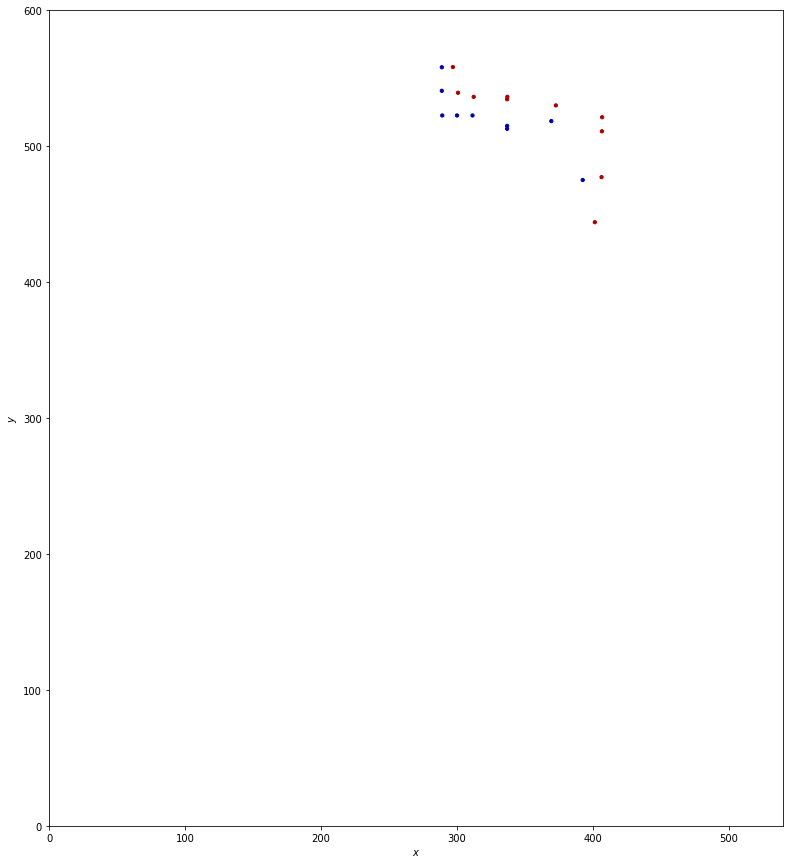

angle -145.30403836
move (-0.77859046914506336, -0.62753237474768597)
366.395062146 510.582639799
118
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


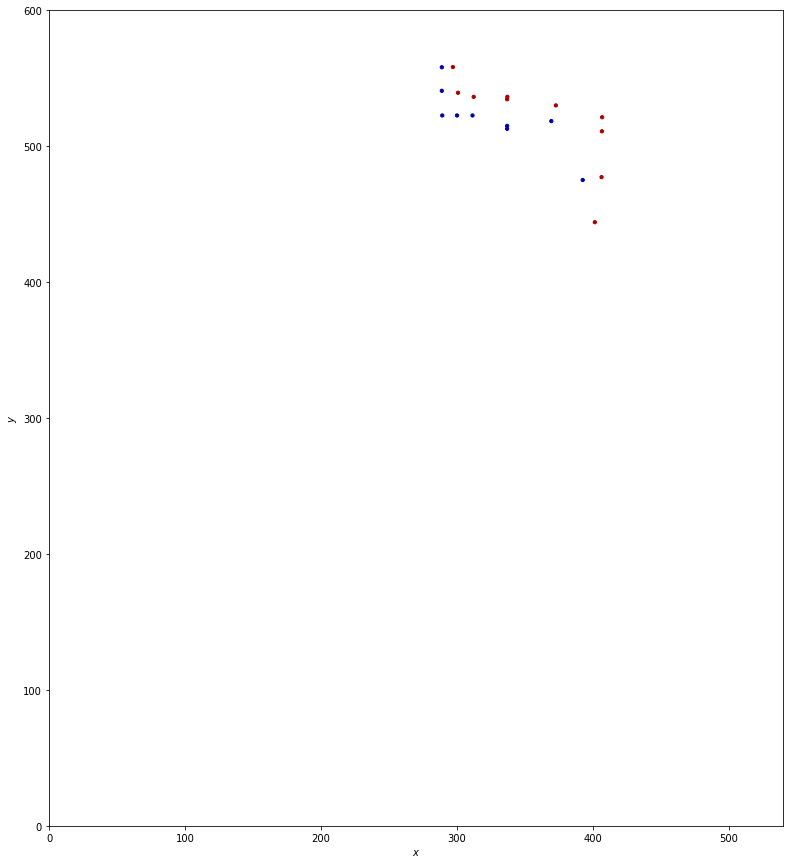

angle -141.131700641
move (-0.69231459756046343, -0.72159579960300047)
365.702747549 509.861044
119
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


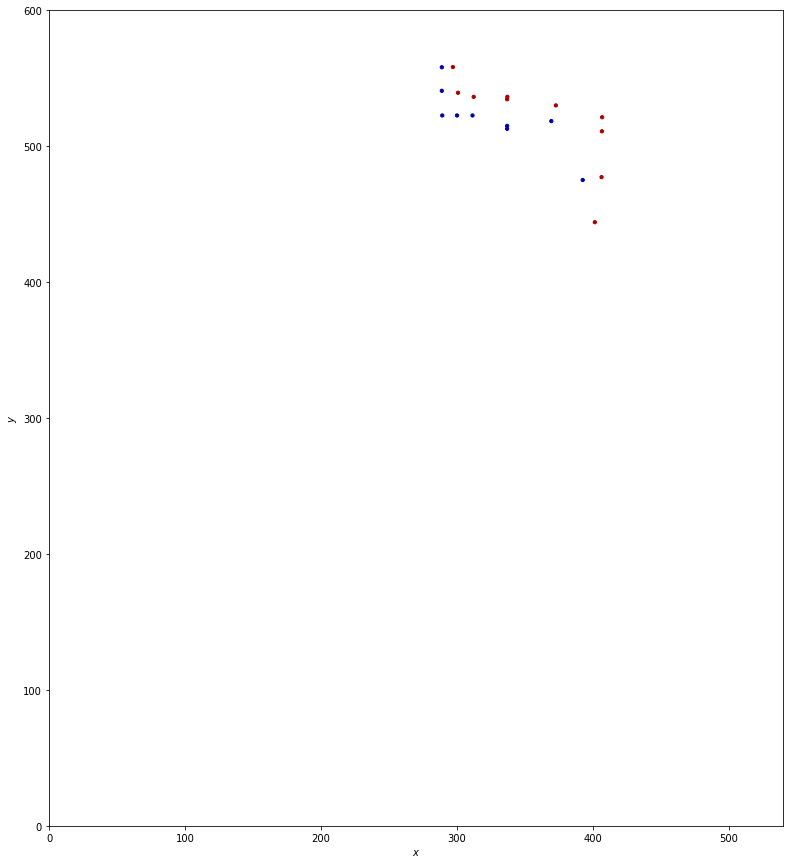

angle -133.813609745
move (-0.57248477166504552, -0.8199153530771458)
365.130262777 509.041128647
120
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


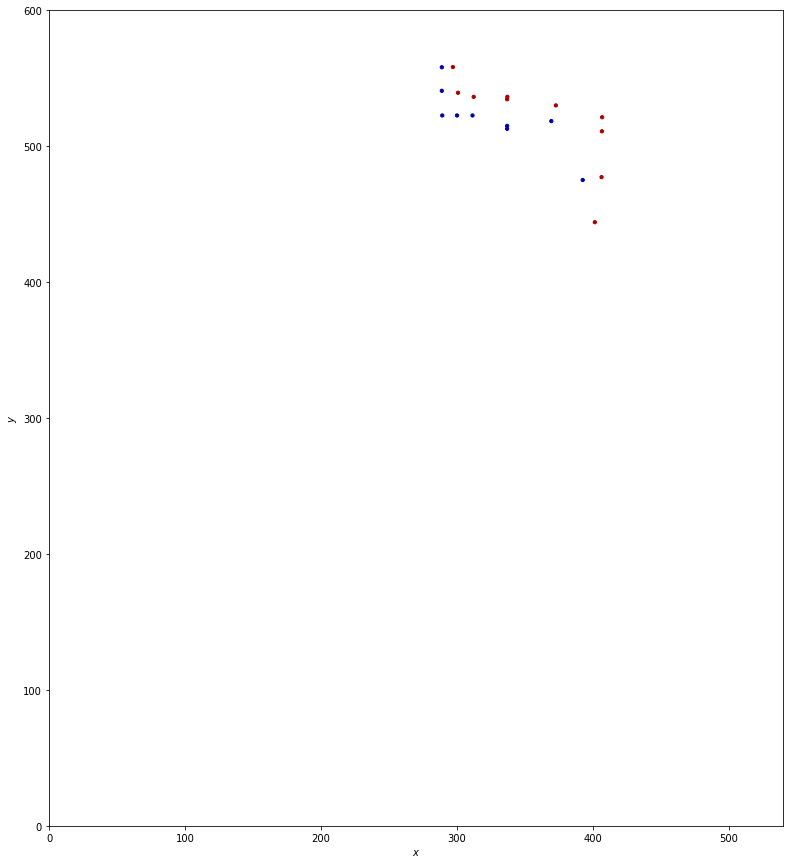

angle -124.923678831
move (-0.45150021040458049, -0.89227101264392727)
364.678762567 508.148857634
121
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


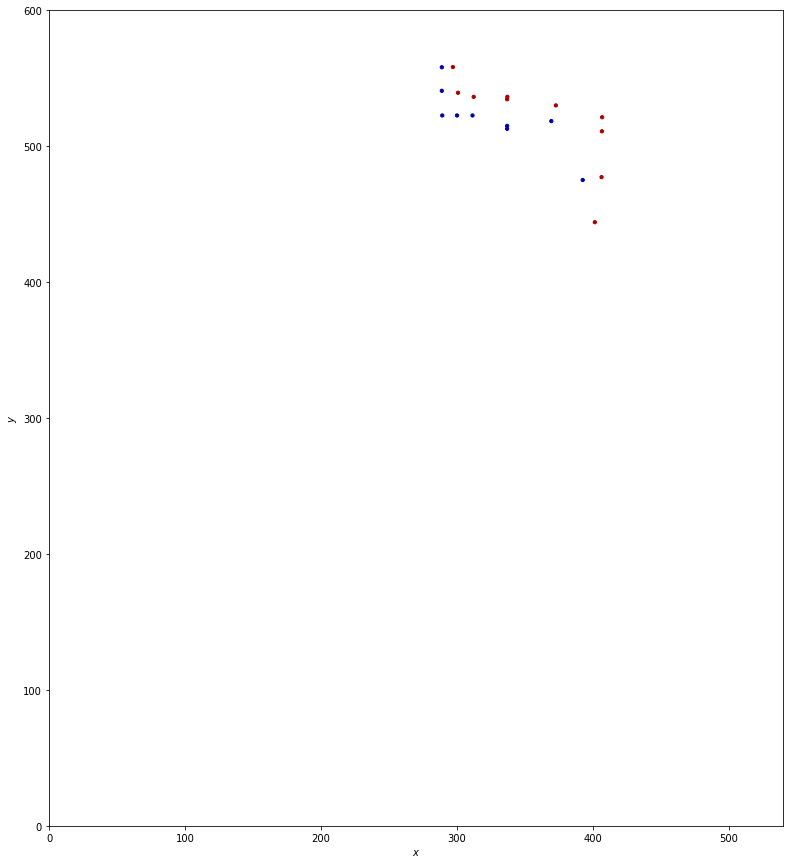

angle -116.839976702
move (-0.35504638157284873, -0.93484868665042642)
364.323716185 507.214008947
122
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


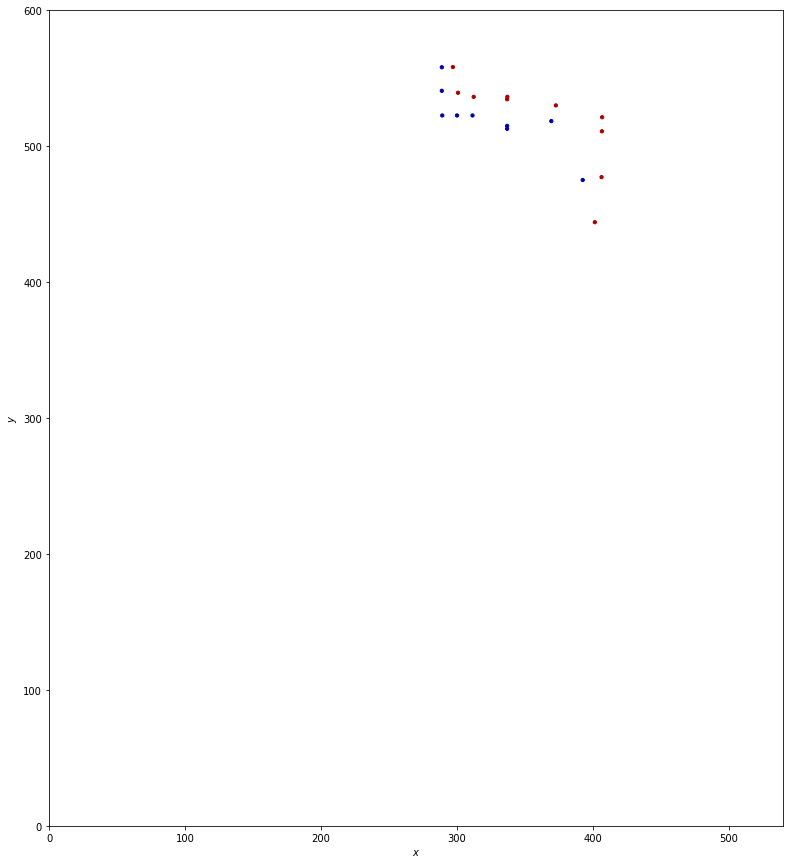

angle -110.796287026
move (-0.28656795736681856, -0.9580599176516098)
364.037148228 506.25594903
123
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


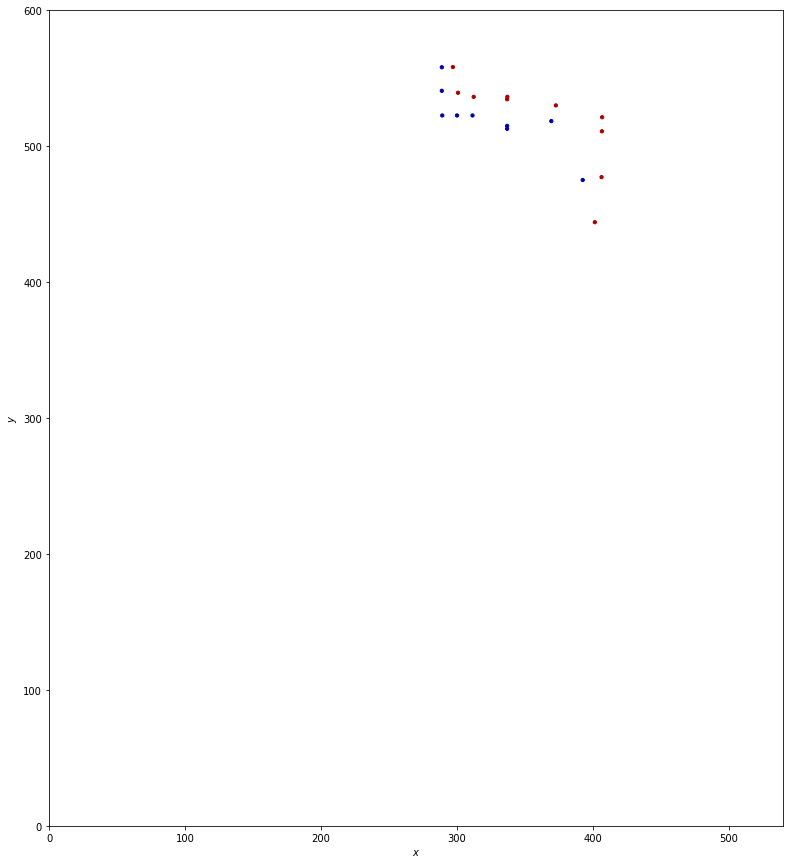

angle -106.652595752
move (-0.239673064093611, -0.97085365650440836)
363.797475164 505.285095373
124
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


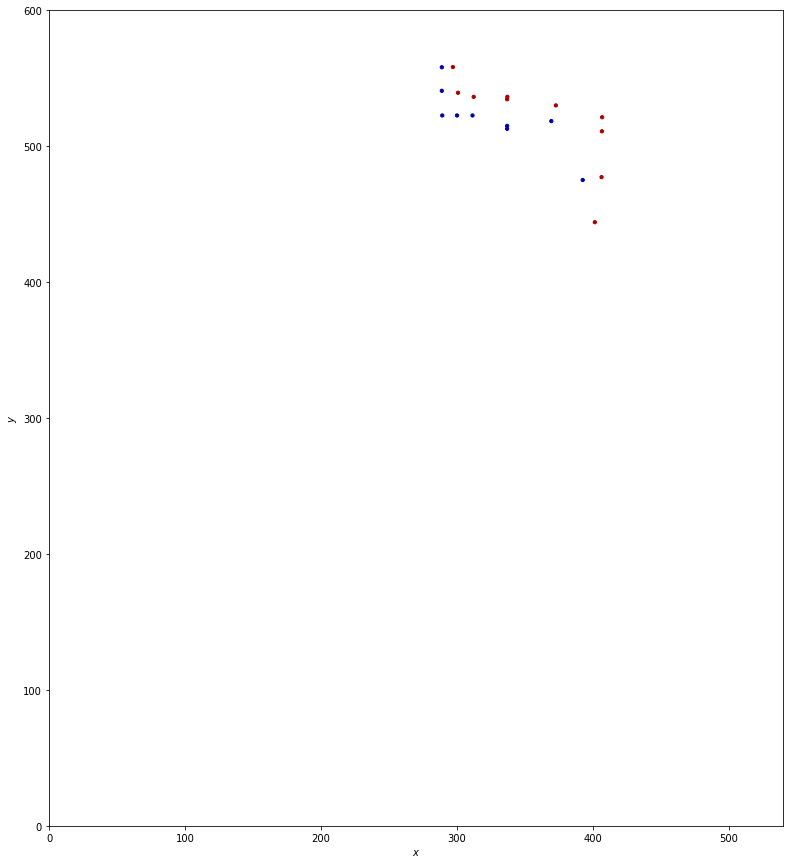

angle -103.867245151
move (-0.20772040328467542, -0.97818824060568821)
363.58975476 504.306907133
125
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


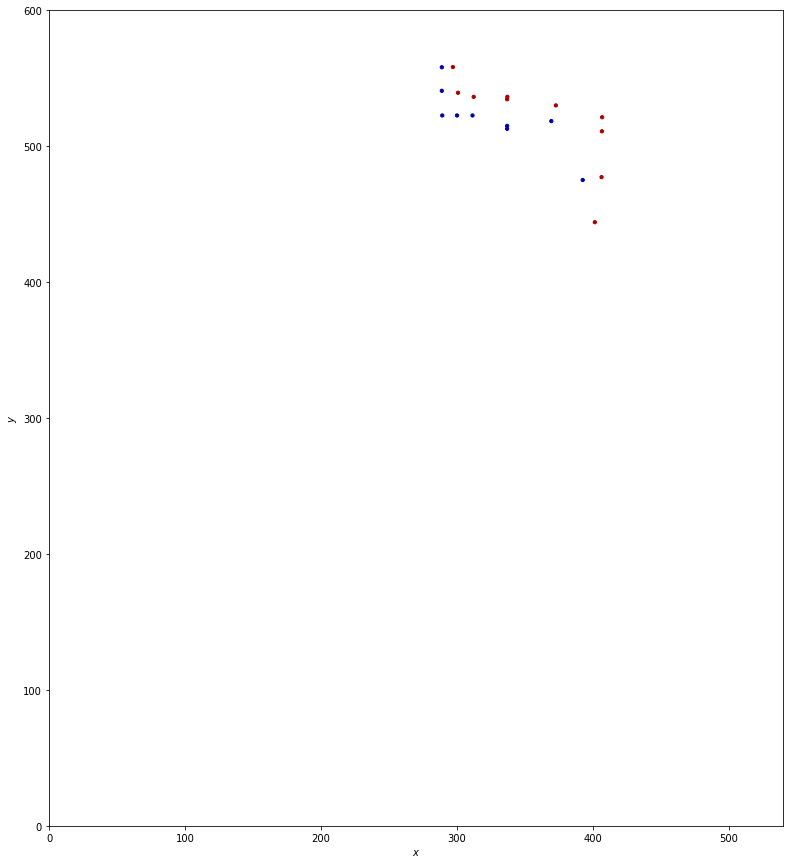

angle -101.988795412
move (-0.1859590869404831, -0.98255748838643631)
363.403795673 503.324349644
126
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


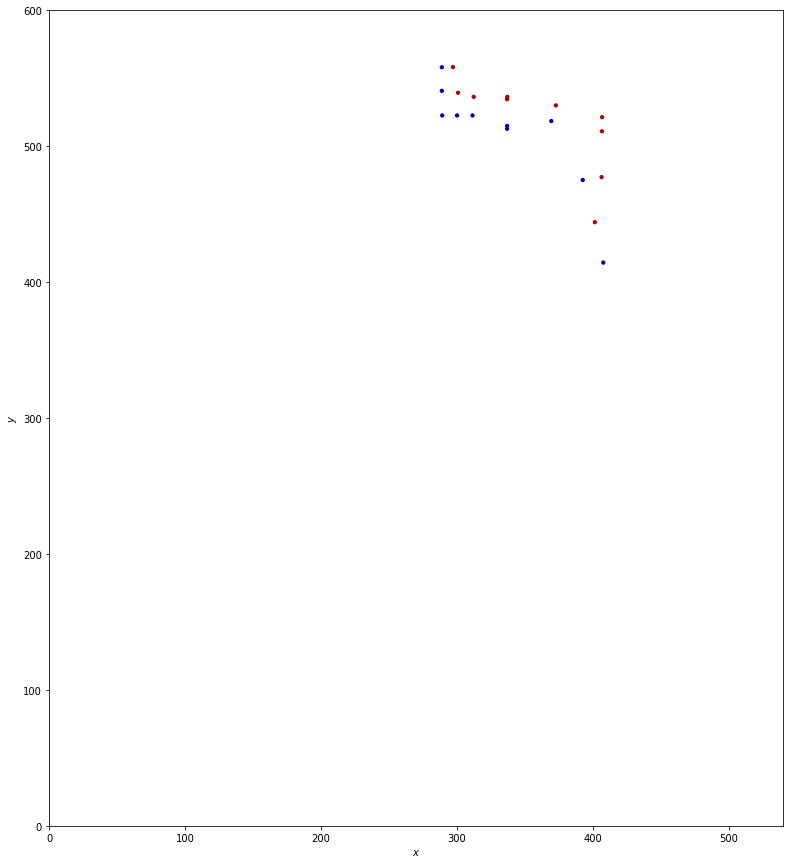

angle -100.717054385
move (-0.09964832140405909, -0.99502271935938902)
363.304147352 502.329326925
127
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


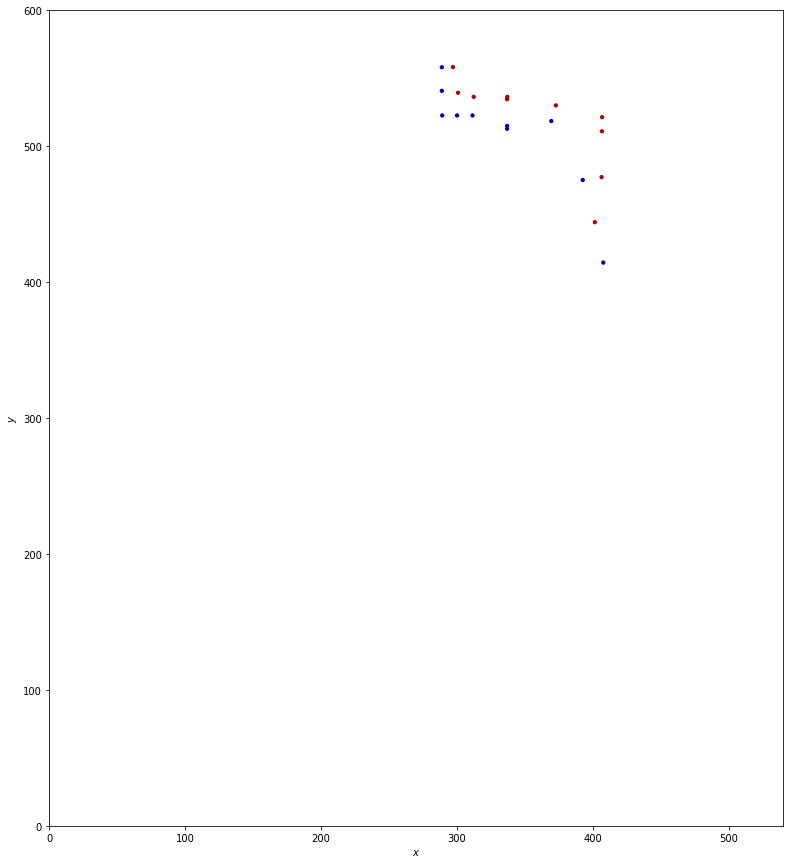

angle -95.7189196268
move (-0.089418815717591901, -0.99599411413705818)
363.214728536 501.333332811
128
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


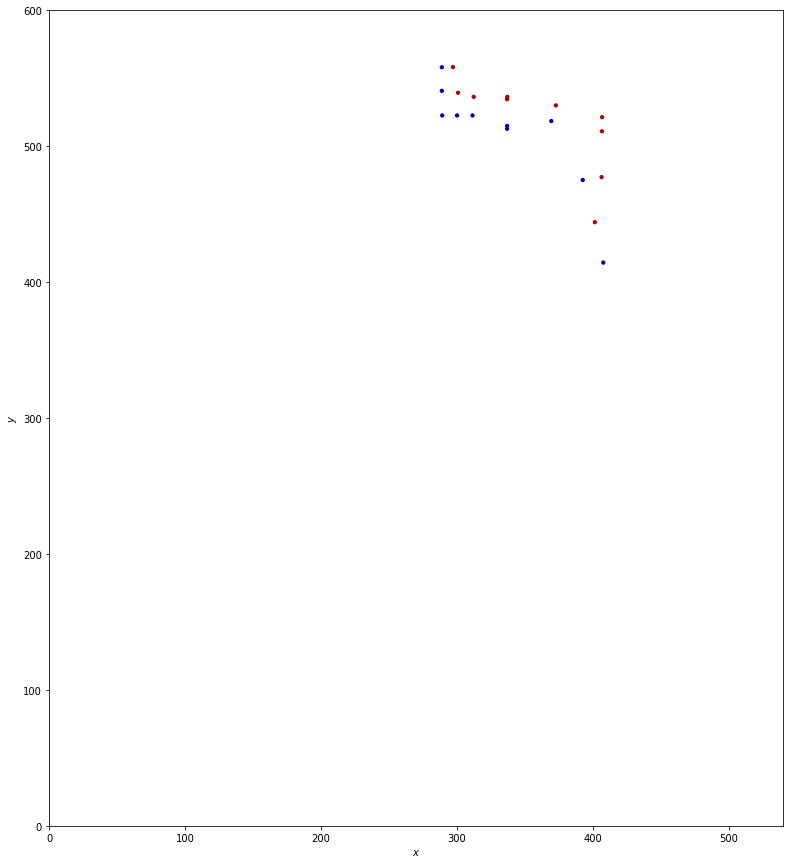

angle -95.1301728765
move (-0.081961799926465906, -0.99663547165090105)
363.132766736 500.336697339
129
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


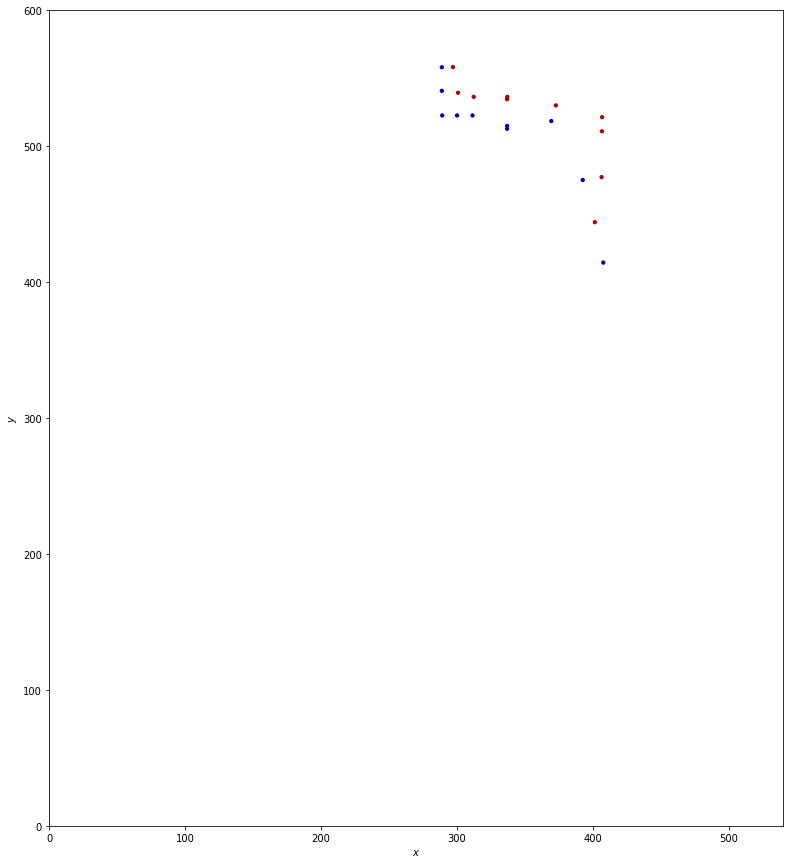

angle -94.7013389968
move (-0.076490755569254804, -0.99707029055751351)
363.056275981 499.339627049
130
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


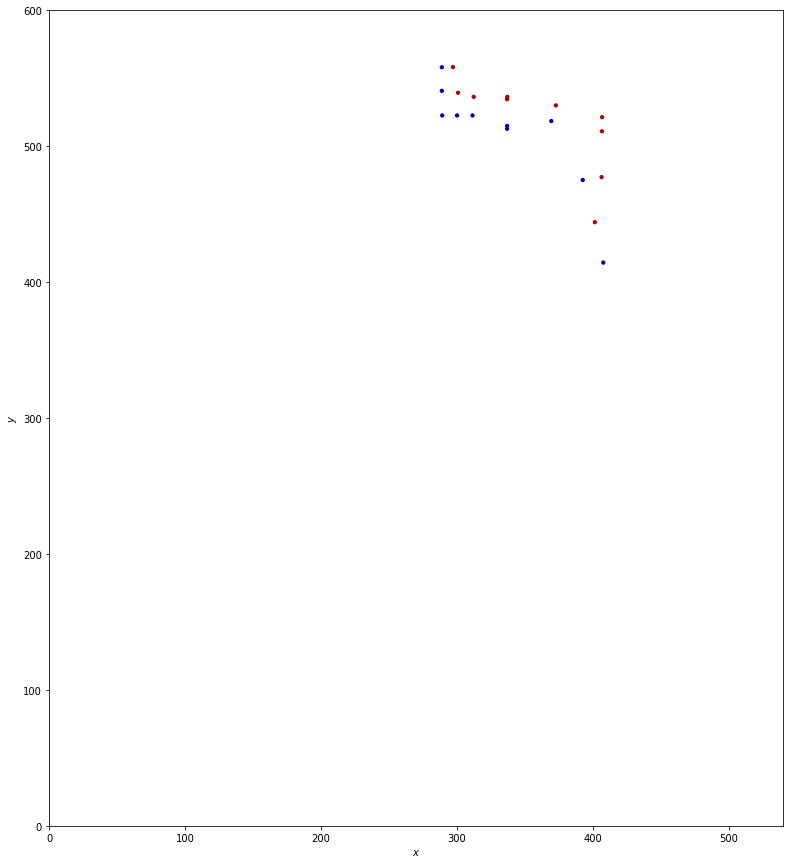

angle -94.3868824001
move (-0.072467319275220765, -0.99737078743918661)
362.983808661 498.342256261
131
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


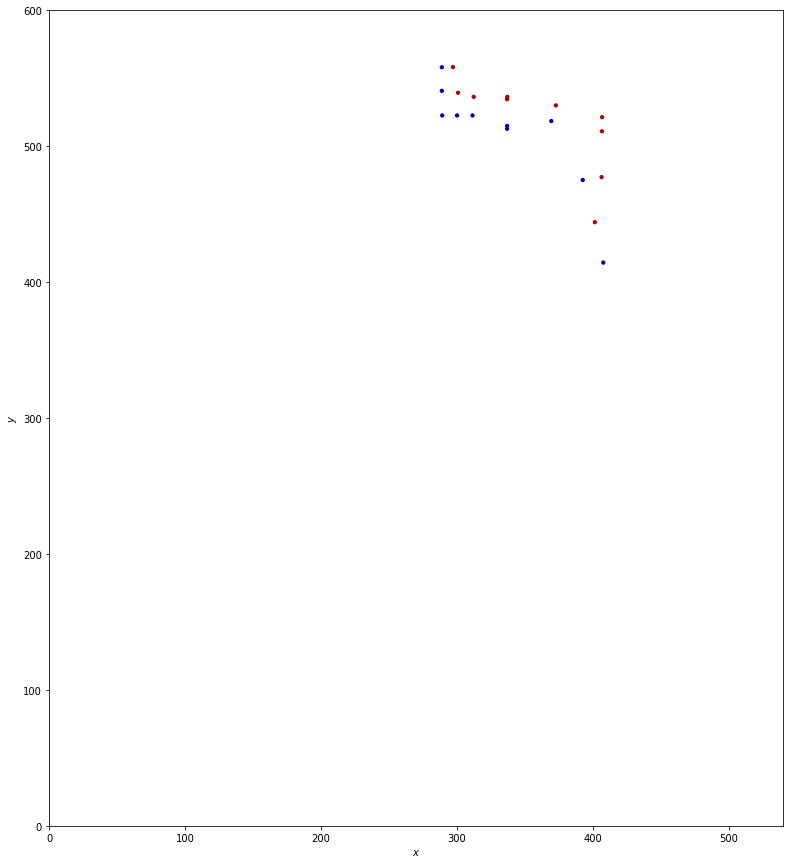

angle -94.1557142713
move (-0.069517716435519544, -0.99758071708588614)
362.914290945 497.344675544
132
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


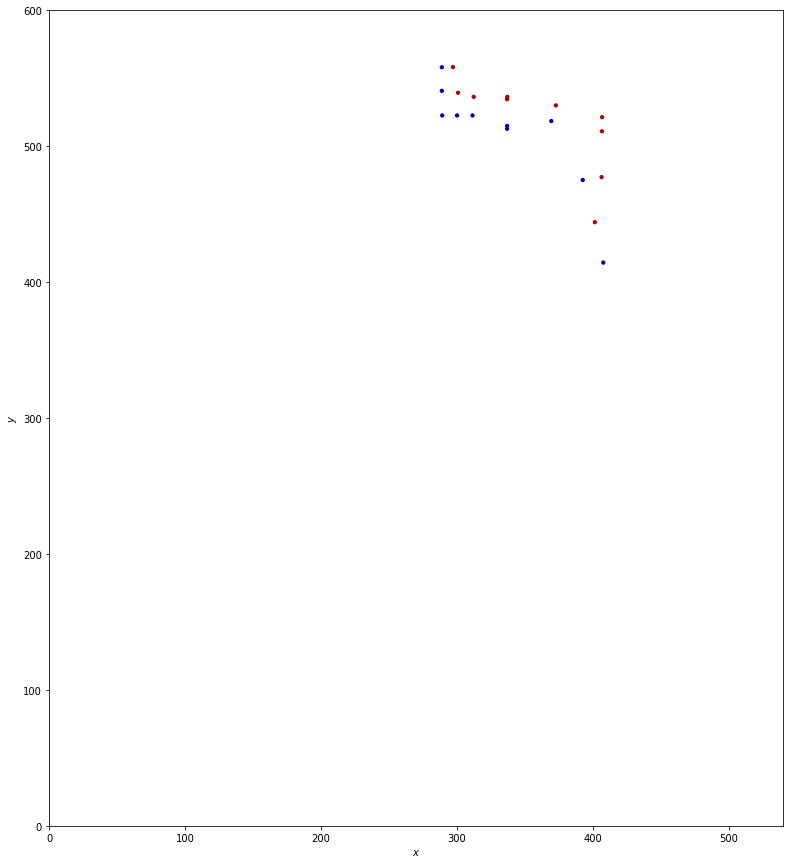

angle -93.9862869239
move (-0.067382035830099274, -0.99772724792269318)
362.846908909 496.346948296
133
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


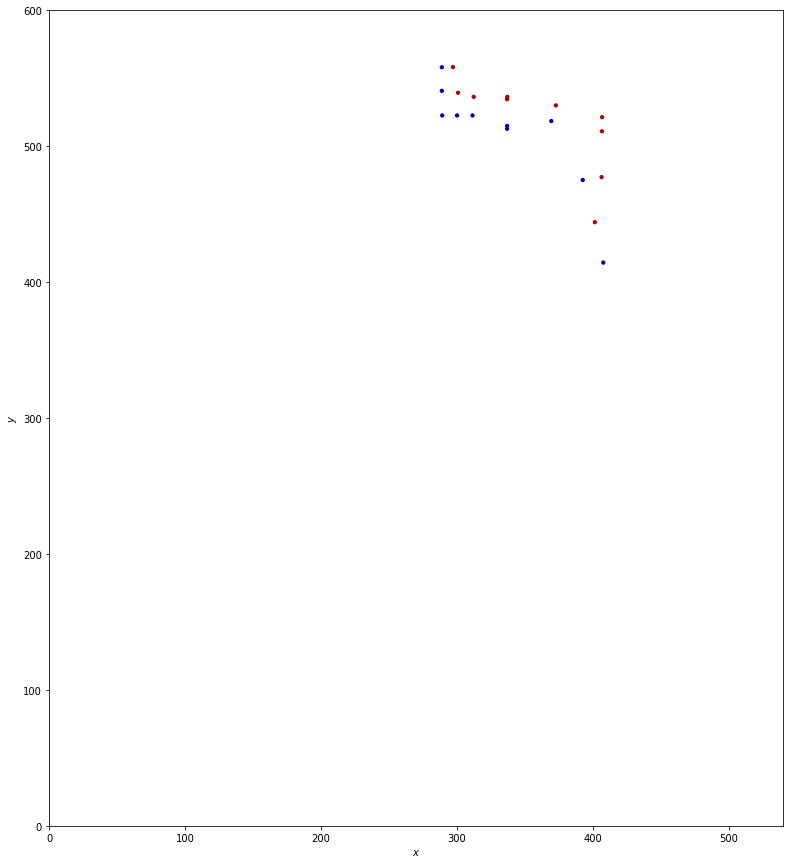

angle -93.863633739
move (-0.065882208875844422, -0.99782740719707619)
362.7810267 495.349120889
134
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


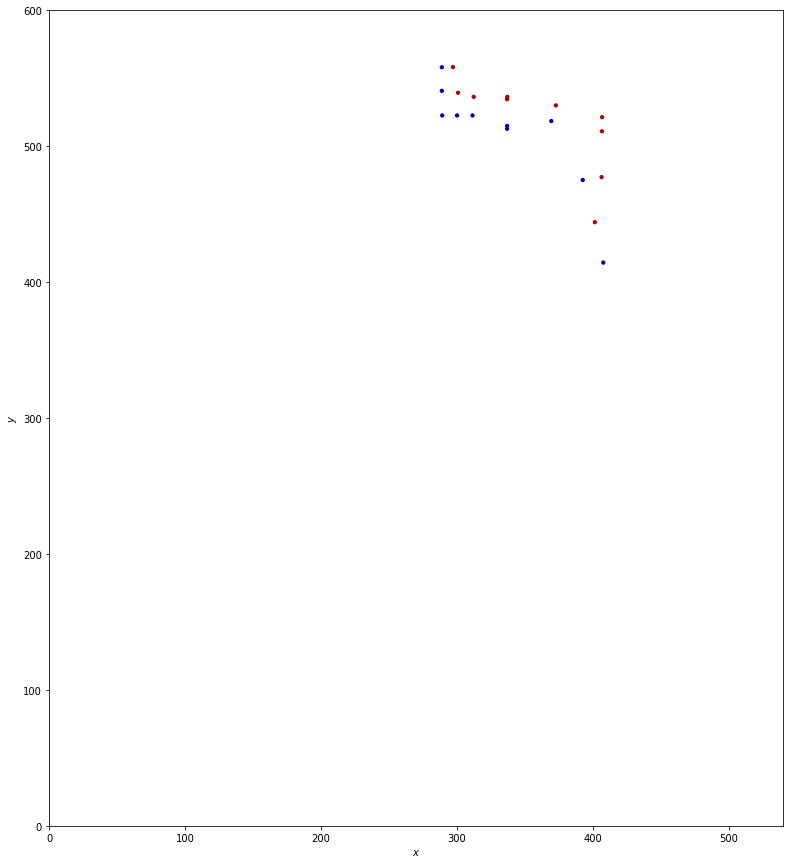

angle -93.7775085727
move (-0.064901021880513776, -0.99789170622811829)
362.716125678 494.351229183
135
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


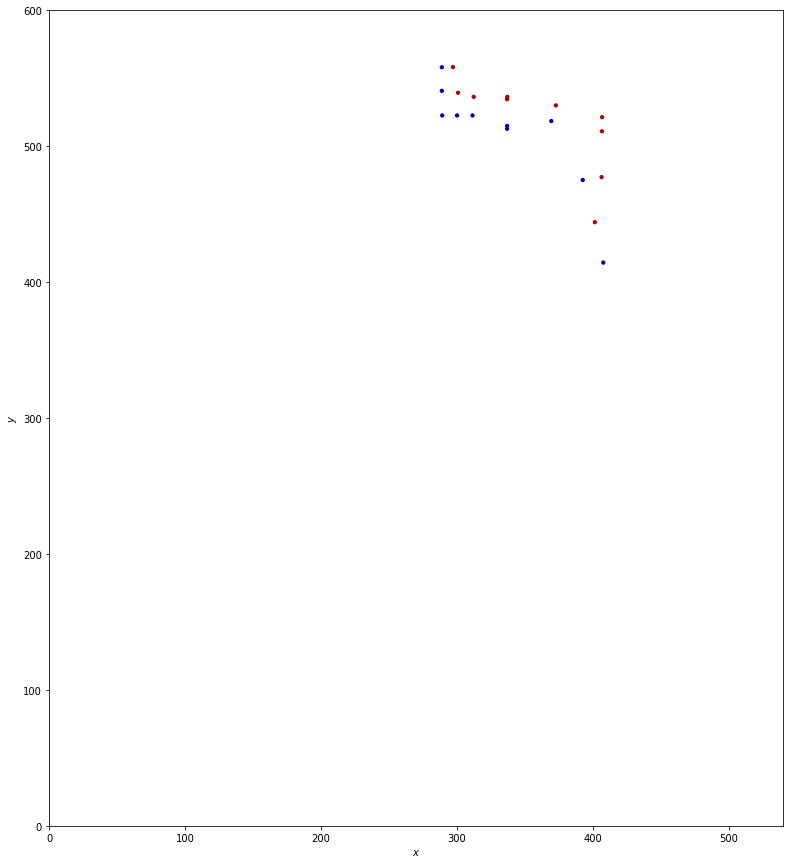

angle -93.7211701142
move (-0.064367834456360462, -0.99792624070489222)
362.651757844 493.353302942
136
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


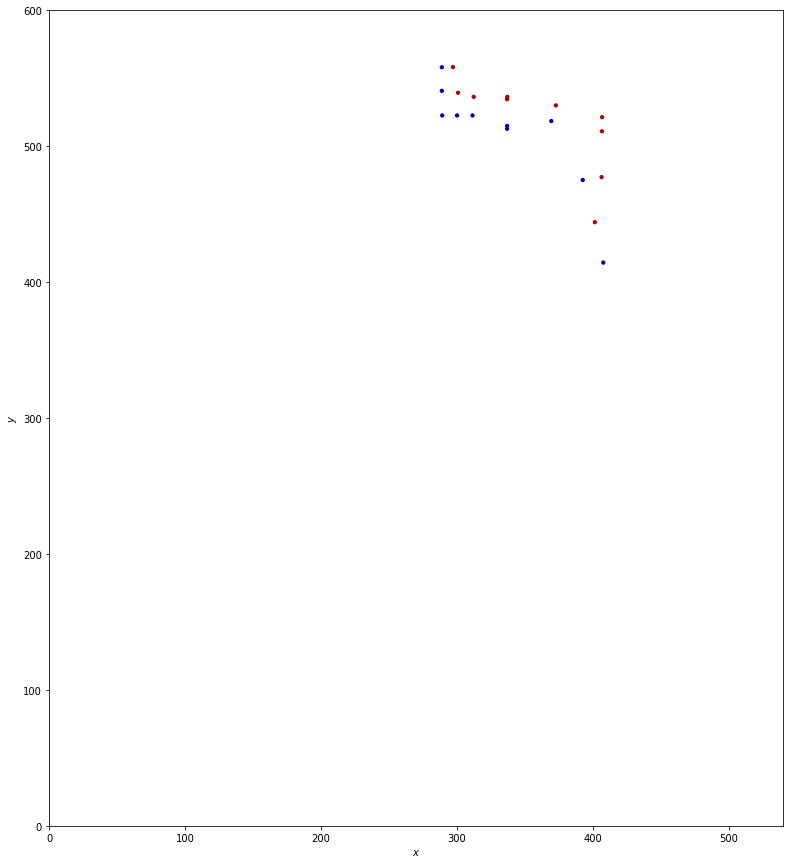

angle -93.6905567124
move (-0.064248464347716208, -0.99793393309825884)
362.58750938 492.355369009
137
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


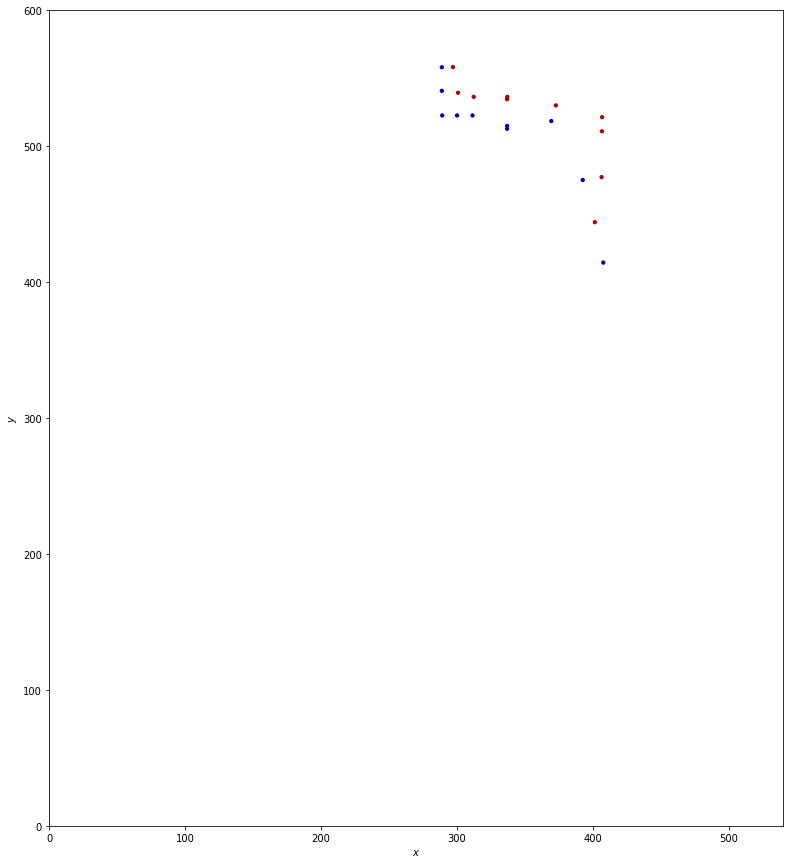

angle -93.6837031226
move (-0.064537683684777344, -0.99791527064405805)
362.522971696 491.357453738
138
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


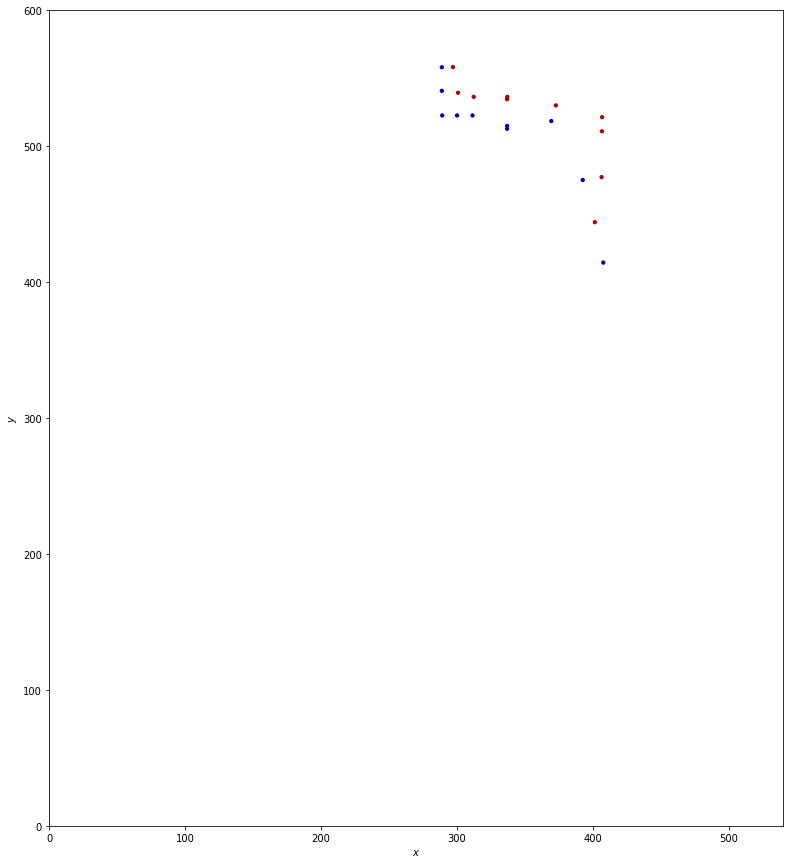

angle -93.7003086329
move (-0.065253329843629193, -0.99786873031692824)
362.457718366 490.359585008
139
yes 1 (297.1497, 558.3002)
yes -1 (288.9881, 558.1653)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


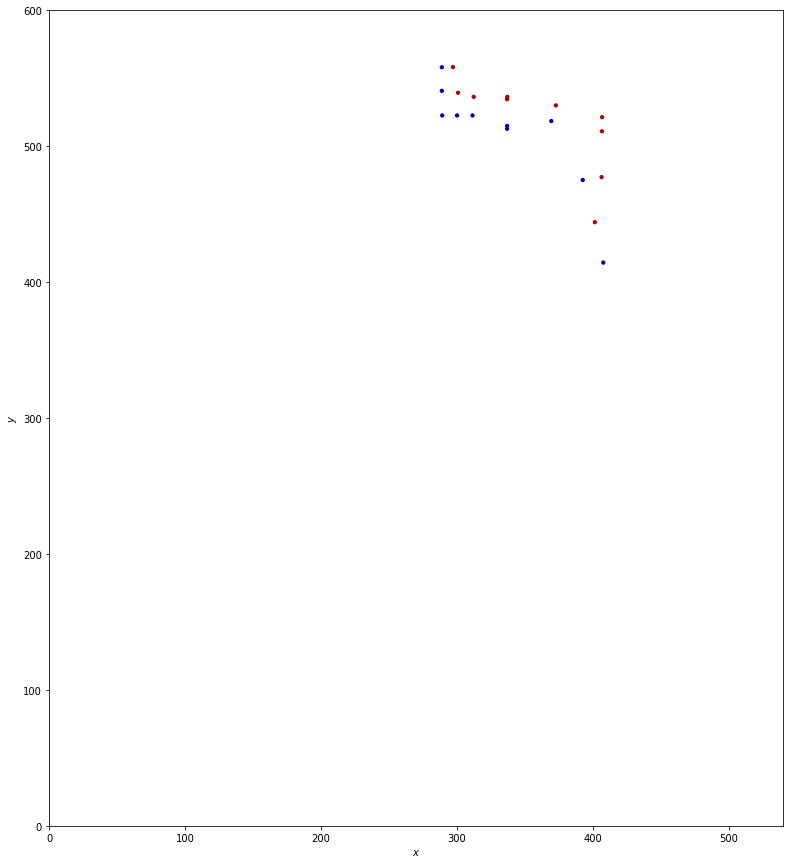

angle -93.7413987536
move (-0.066431359183659278, -0.9977909974122896)
362.391287007 489.361794011
140
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


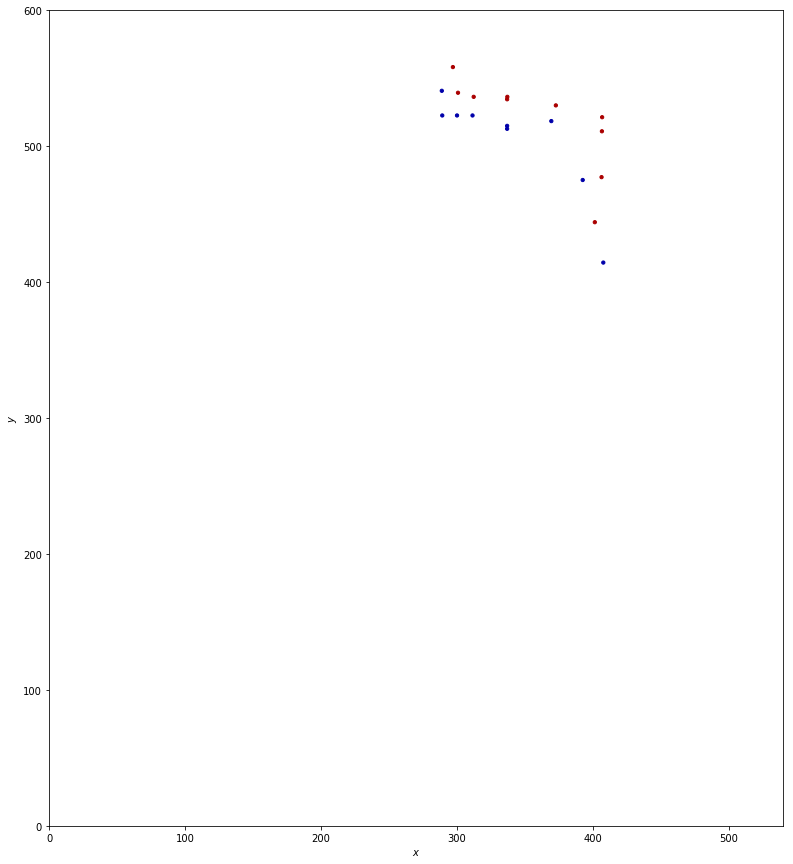

angle -93.8090416494
move (0.0088597580265577826, -0.99996075157363595)
362.400146765 488.361833259
141
yes -1 (392.6697, 475.2002)


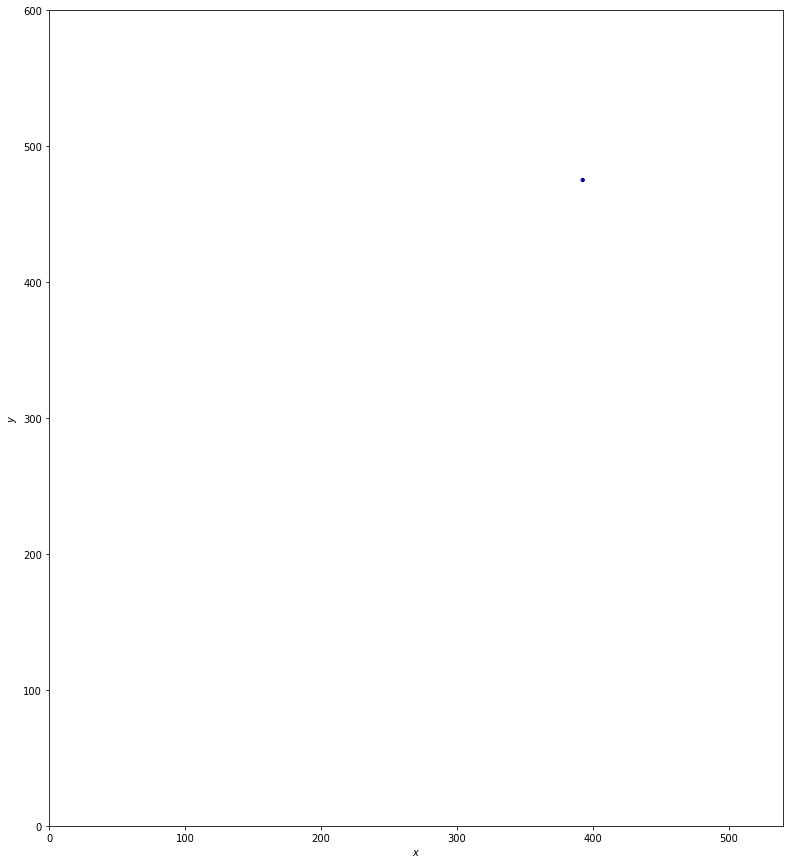

angle -89.4923666163
move (0.39875051940303452, 0.91705944369806813)
362.798897284 489.278892703
142
yes -1 (337.0497, 515.0402)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


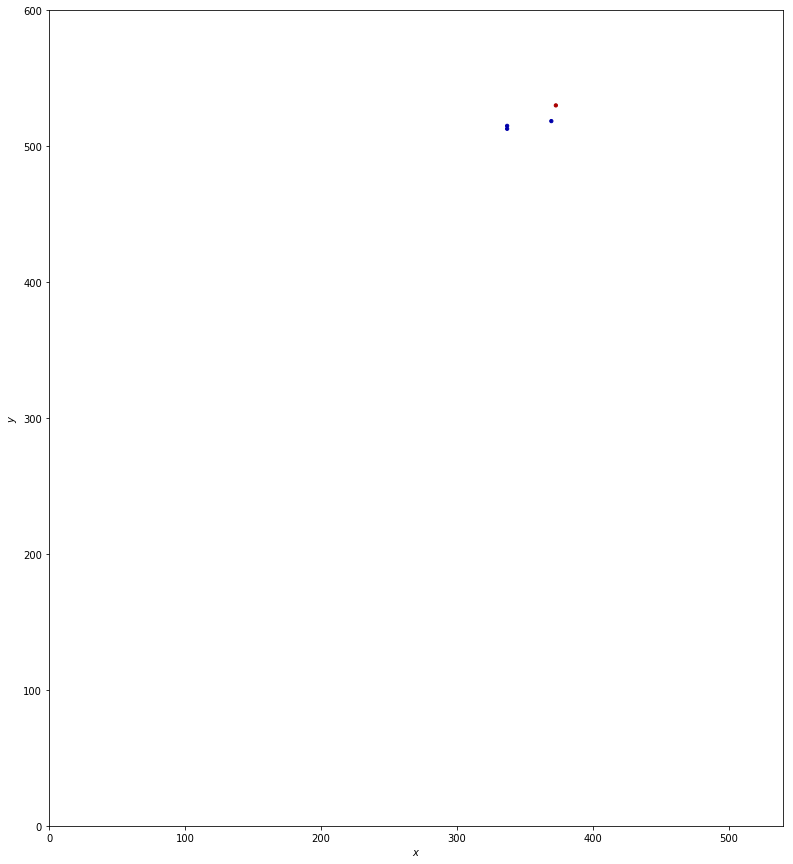

angle 66.4999093775
move (-0.79389723231356912, -0.60805195873778317)
362.005000052 488.670840744
143
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


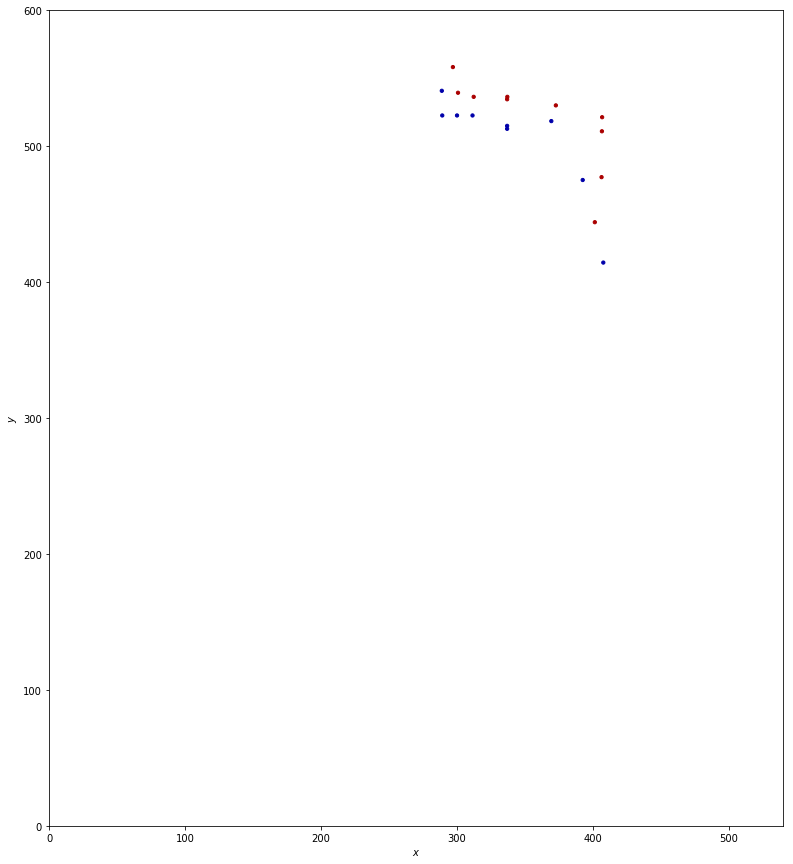

angle -142.551220205
move (-0.0015213598956775513, -0.9999988427313643)
362.003478692 487.670841901
144
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


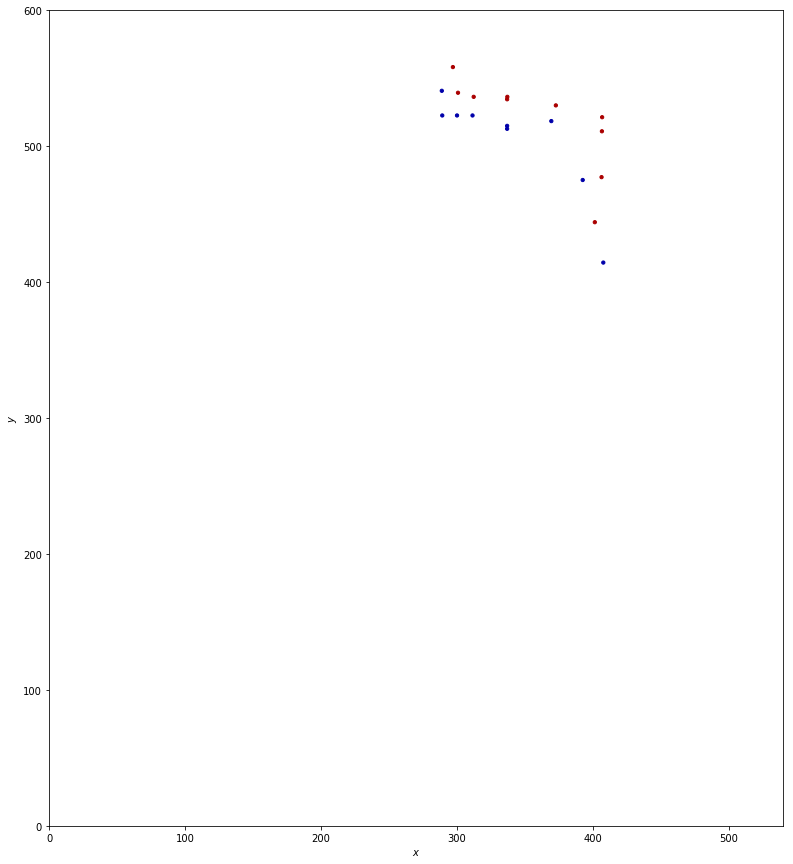

angle -90.0871675348
move (6.0214978312078053e-05, -0.99999999818707819)
362.003538907 486.670841903
145
yes -1 (392.6697, 475.2002)


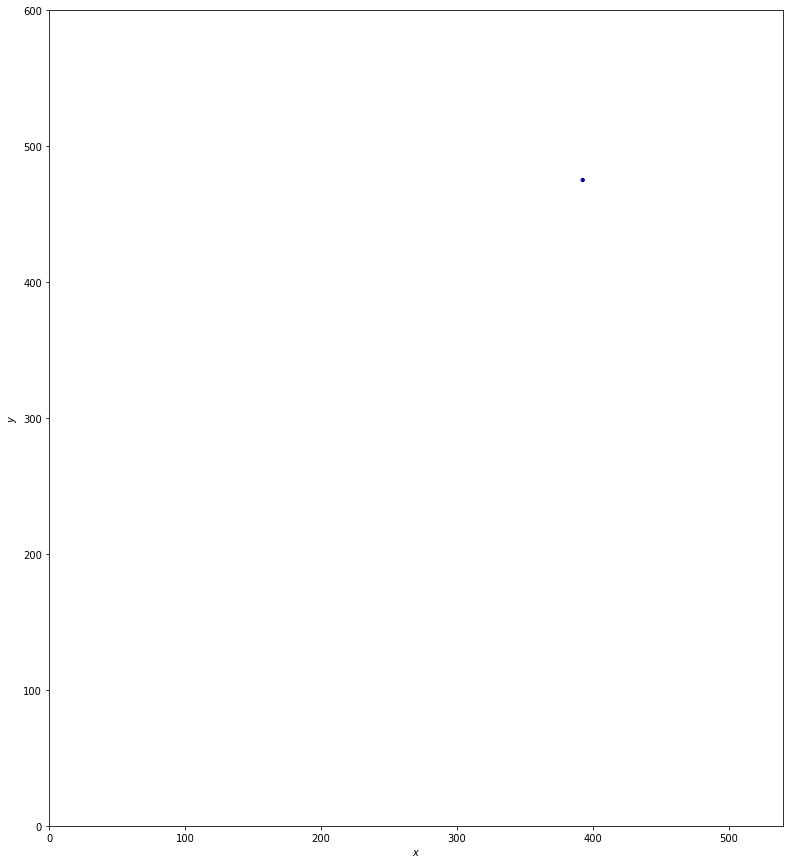

angle -89.9965499359
move (0.35034227428809661, 0.93662174374004581)
362.353881181 487.607463647
146
yes -1 (337.0497, 515.0402)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)


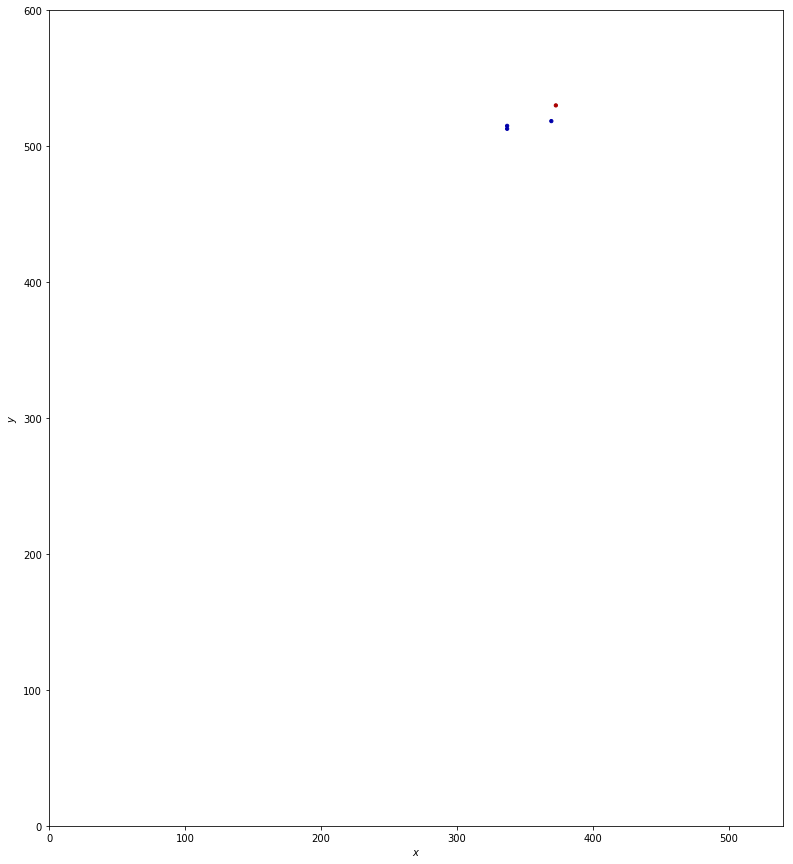

angle 69.4917484373
move (-0.80993209475781014, -0.58652365841560528)
361.543949087 487.020939988
147
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


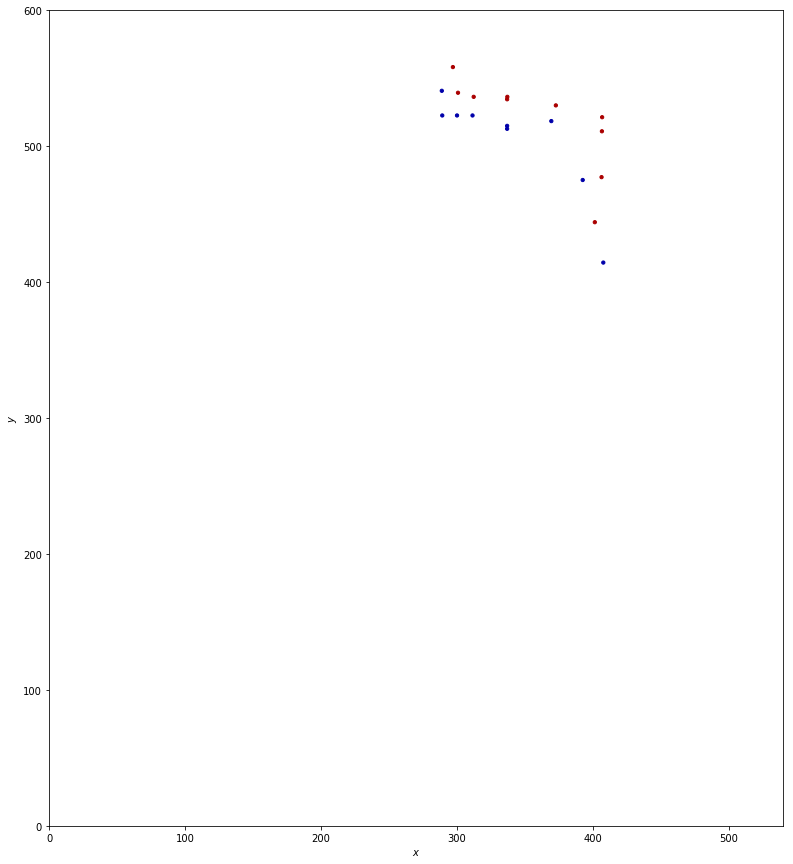

angle -144.089297422
move (-0.013648677390713484, -0.99990685246451039)
361.530300409 486.021033136
148
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


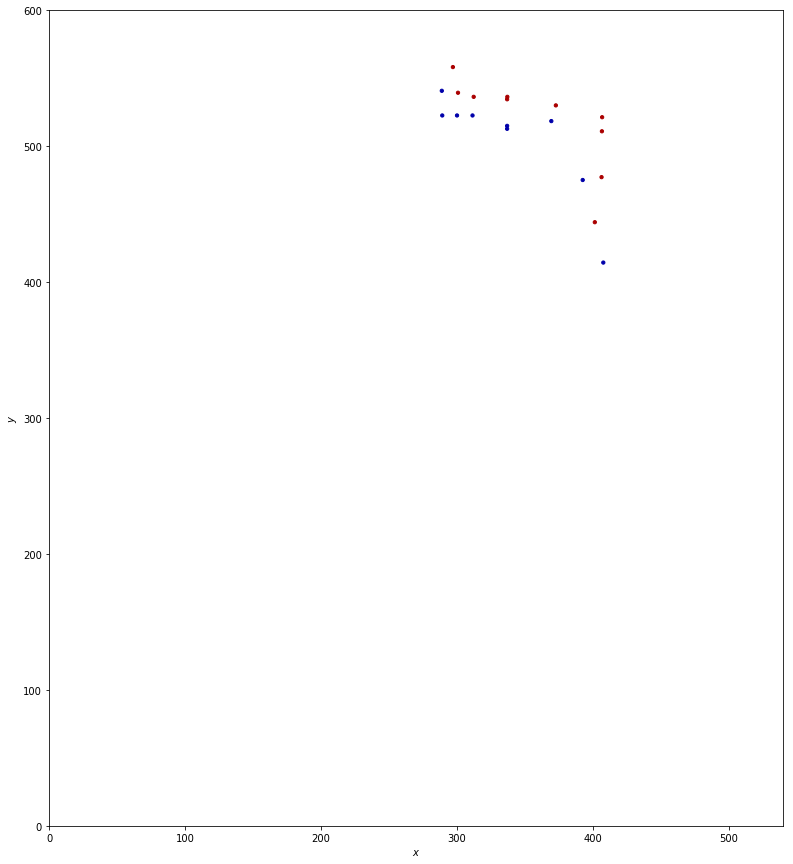

angle -90.7820358921
move (-0.013398355488356673, -0.99991023800649603)
361.516902054 485.021122898
149
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


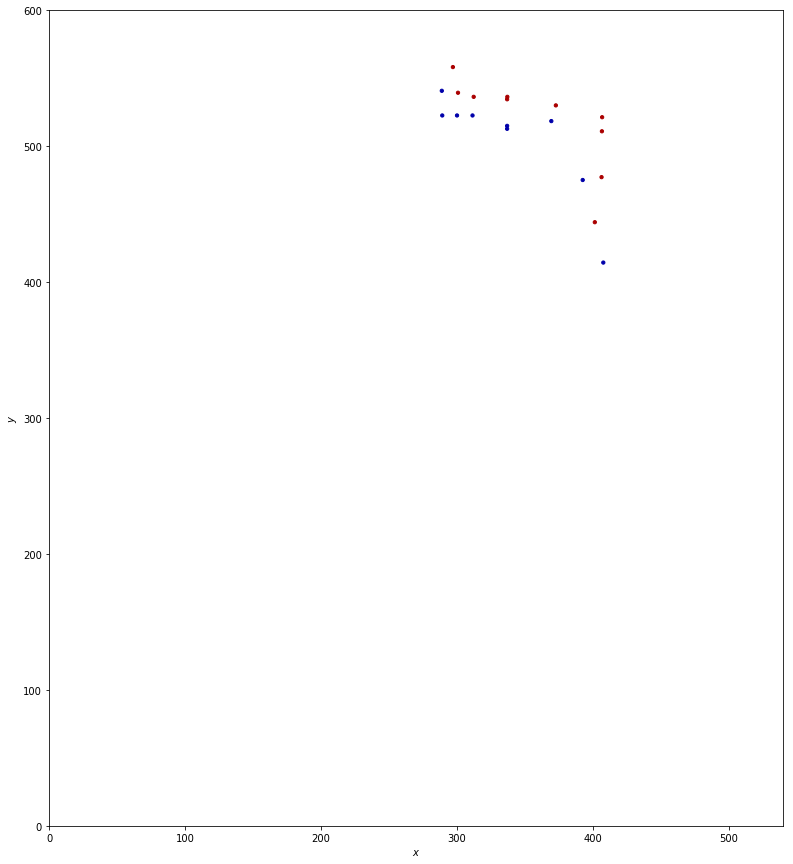

angle -90.7676921919
move (-0.013663225962654147, -0.99990665377138754)
361.503238828 484.021216244
150
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


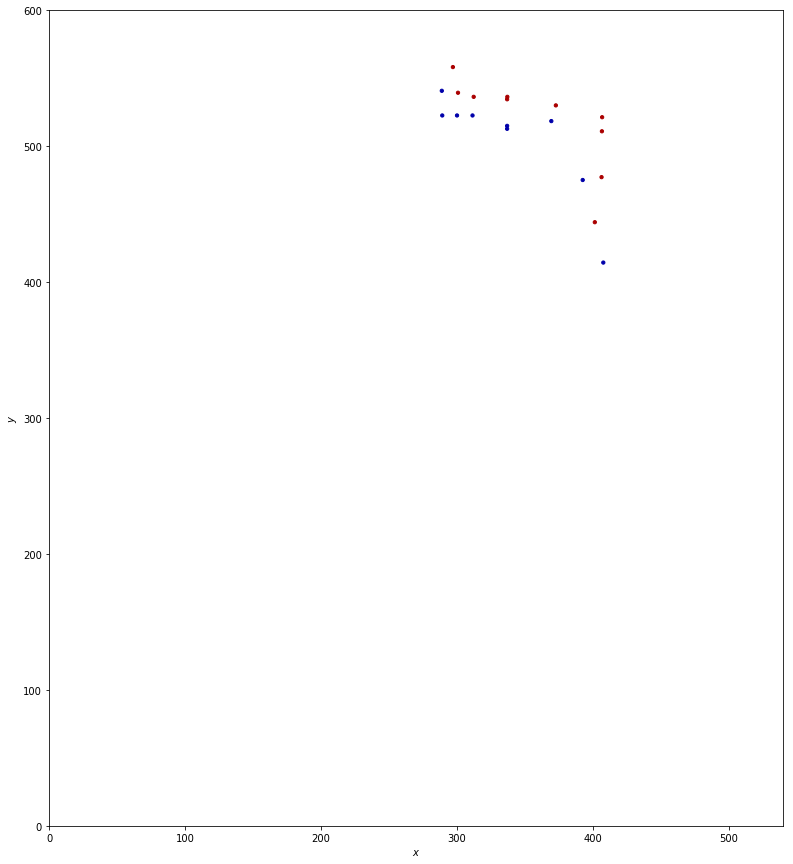

angle -90.7828695417
move (-0.014531542575465954, -0.99989441156072945)
361.488707285 483.021321833
151
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


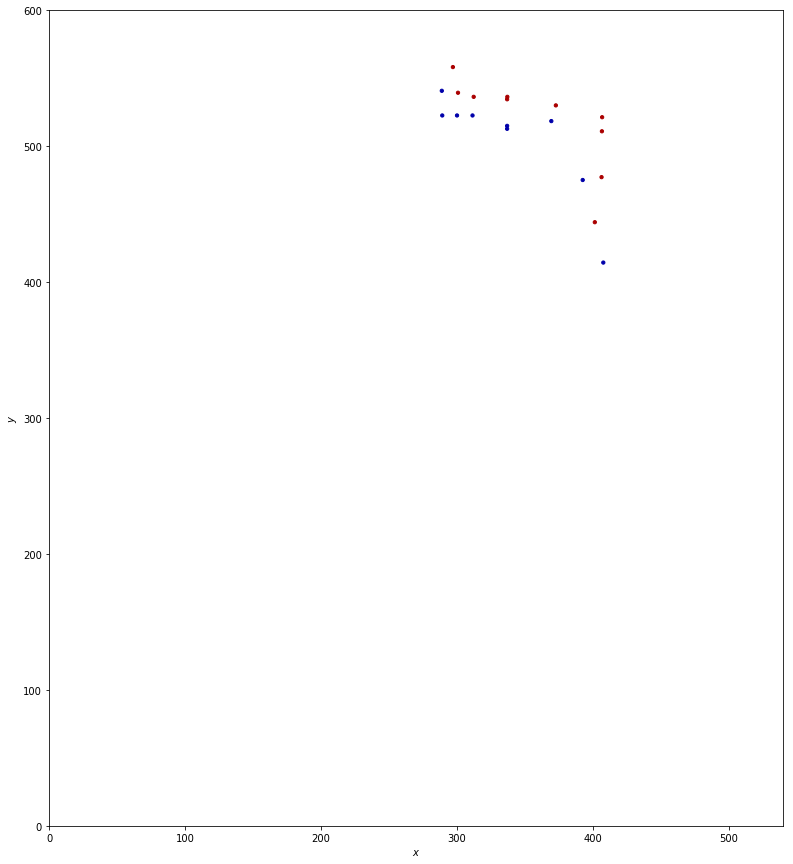

angle -90.8326253648
move (-0.016082188688998581, -0.99987067324078038)
361.472625096 482.021451159
152
yes 1 (297.1497, 558.3002)
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


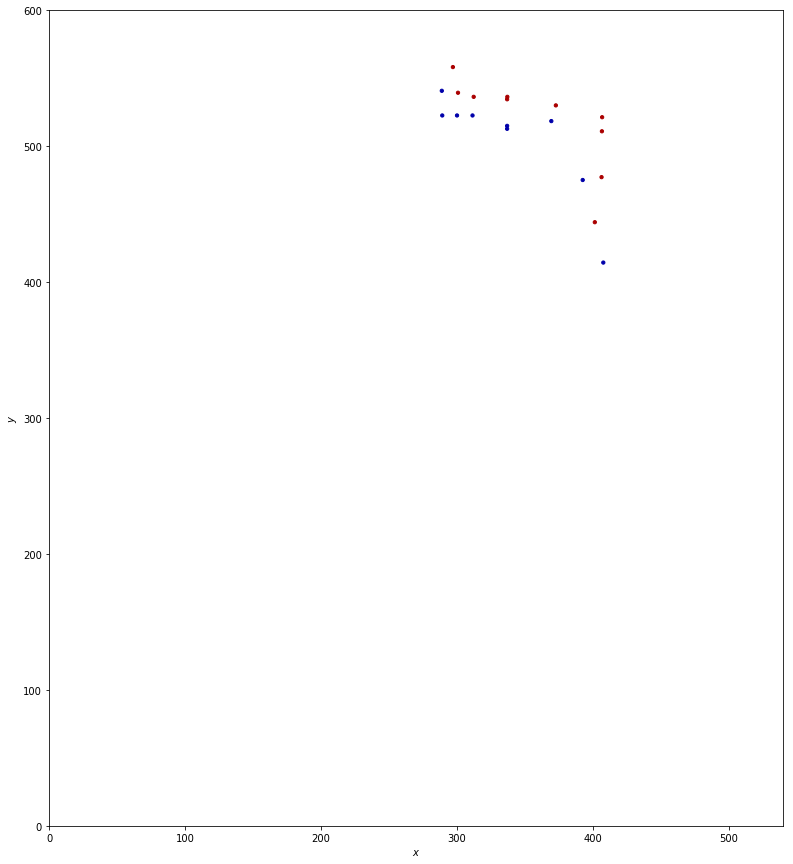

angle -90.9214812616
move (-0.018379509287251915, -0.99983108255262787)
361.454245587 481.021620077
153
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


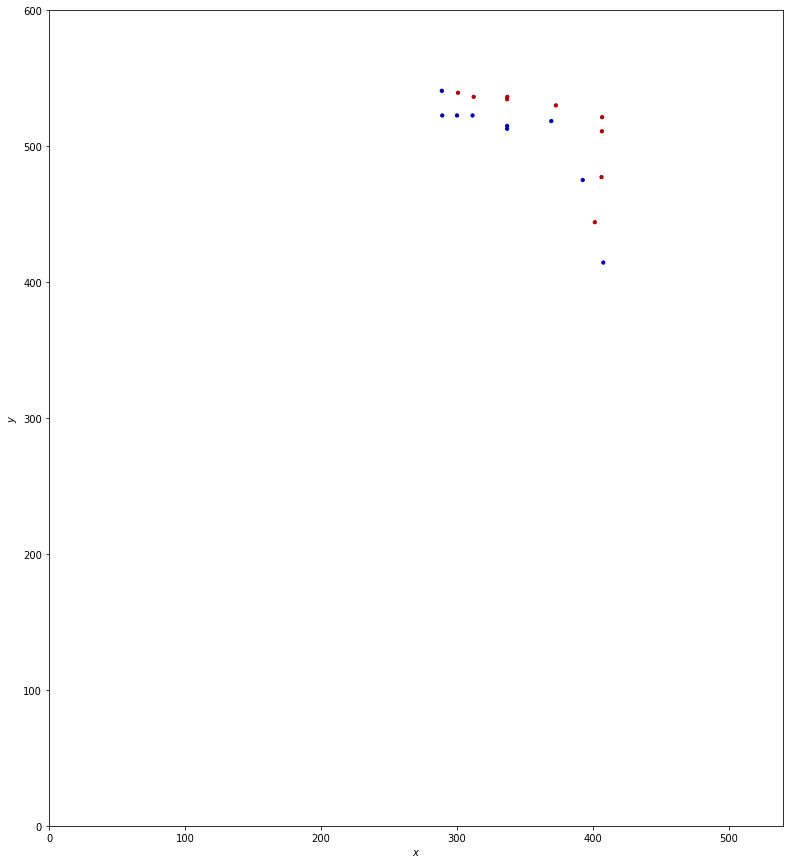

angle -91.0531276096
move (-0.12876778956602689, -0.99167477348689248)
361.325477798 480.029945303
154
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


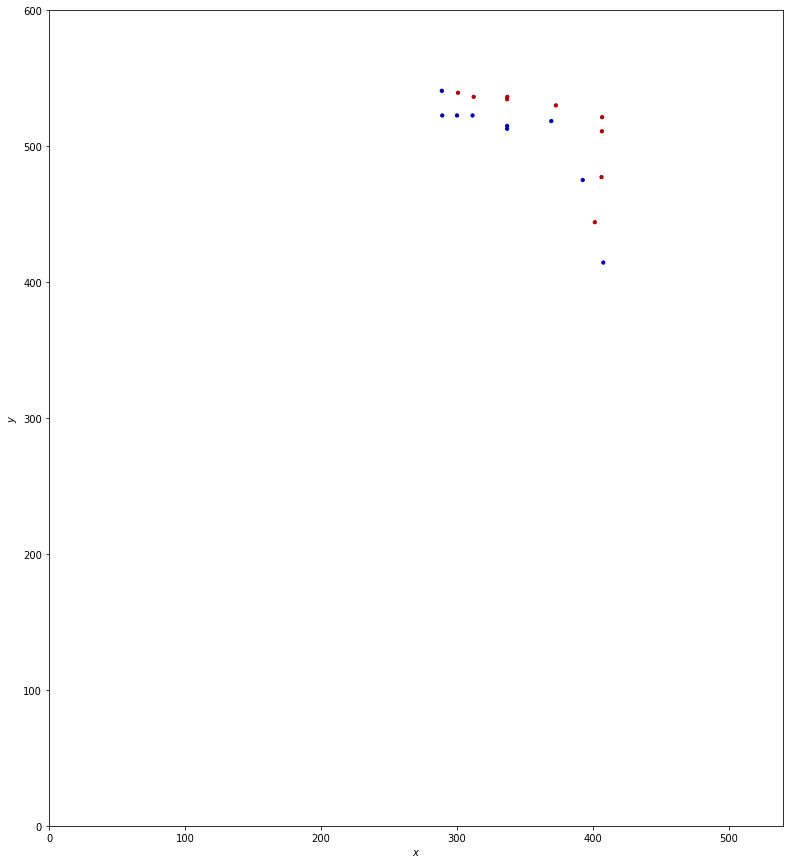

angle -97.3983933974
move (-0.13787519997739658, -0.9904496096375589)
361.187602598 479.039495694
155
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


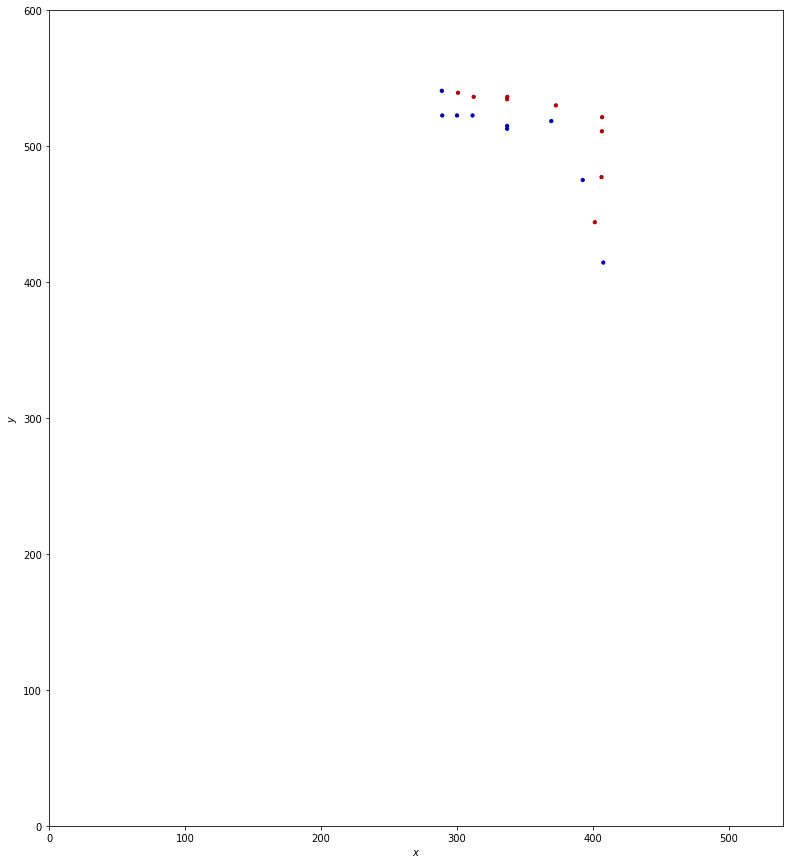

angle -97.9249118249
move (-0.14754697302818118, -0.98905504940332878)
361.040055625 478.050440644
156
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


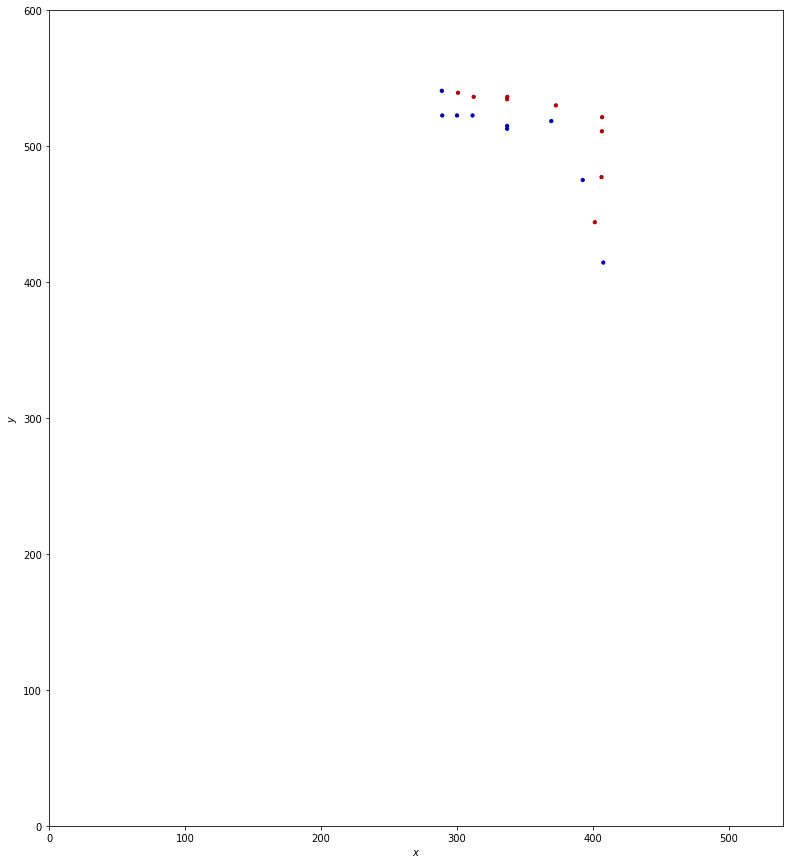

angle -98.4847967073
move (-0.15764604521807404, -0.9874956832447932)
360.882409579 477.062944961
157
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


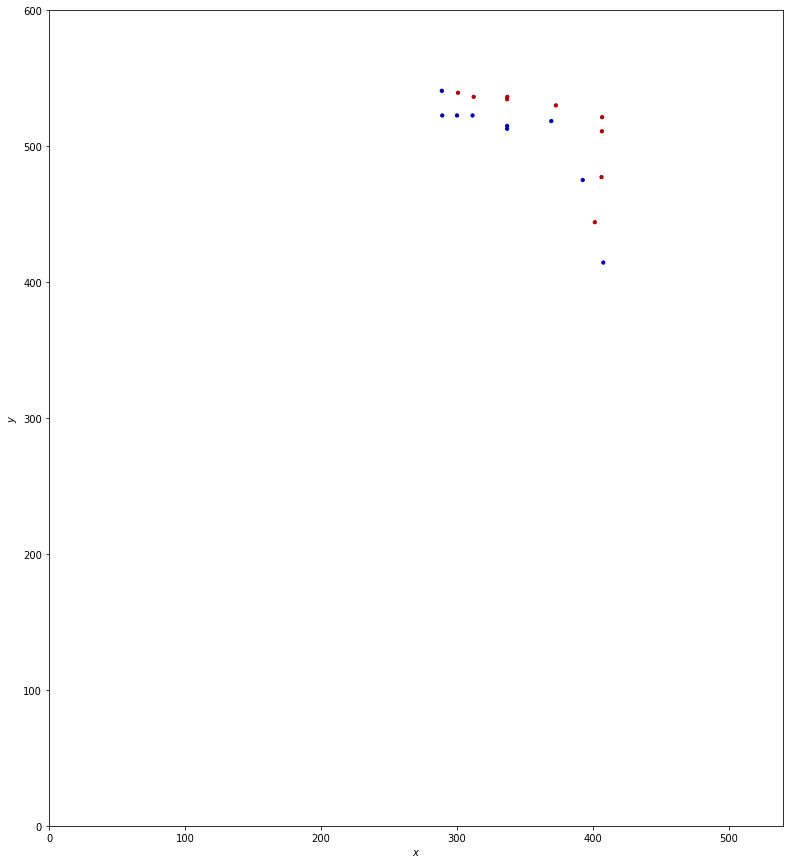

angle -99.0702905868
move (-0.16801084032734018, -0.98578514775406356)
360.714398739 476.077159813
158
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


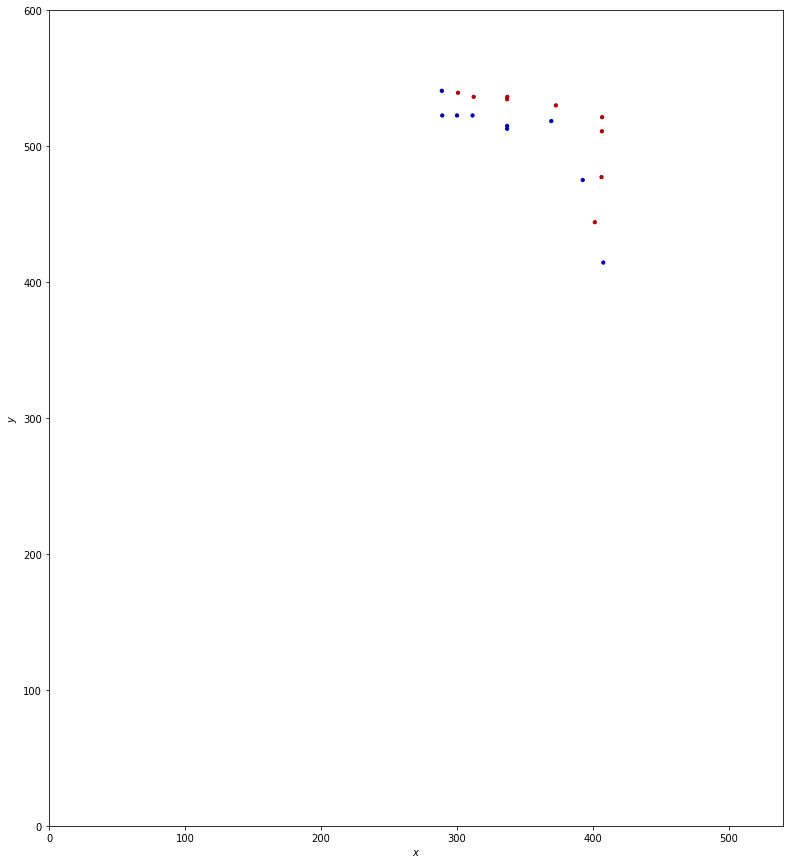

angle -99.6721852027
move (-0.1784625629903614, -0.98394670262718564)
360.535936176 475.093213111
159
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


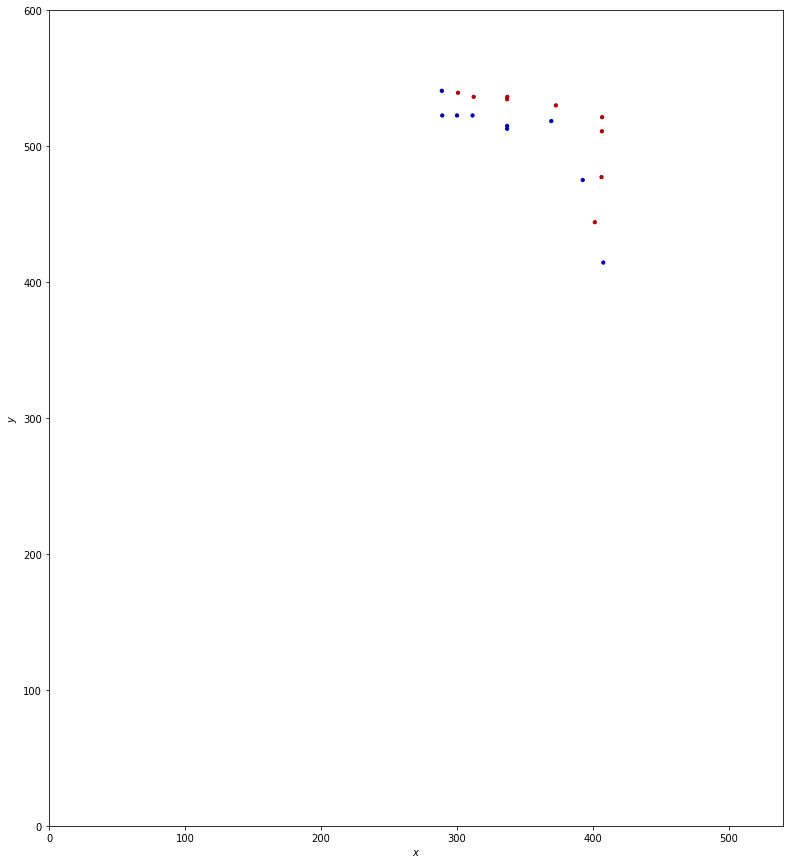

angle -100.280221243
move (-0.18881413354803839, -0.98201284257004684)
360.347122043 474.111200268
160
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


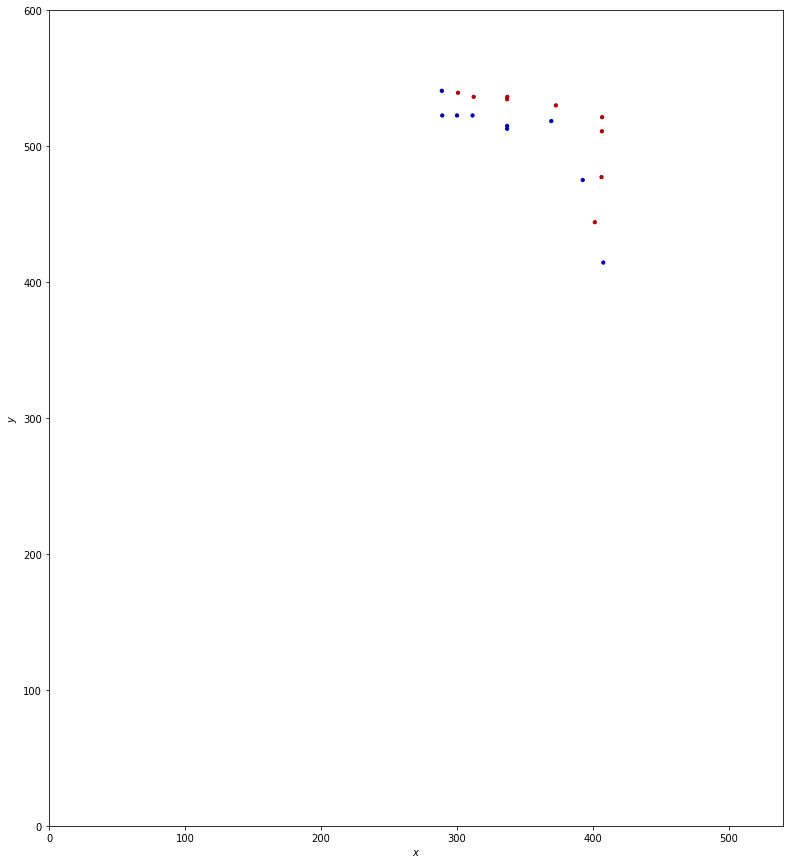

angle -100.88358648
move (-0.19887977160881368, -0.98002389585398686)
360.148242271 473.131176372
161
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


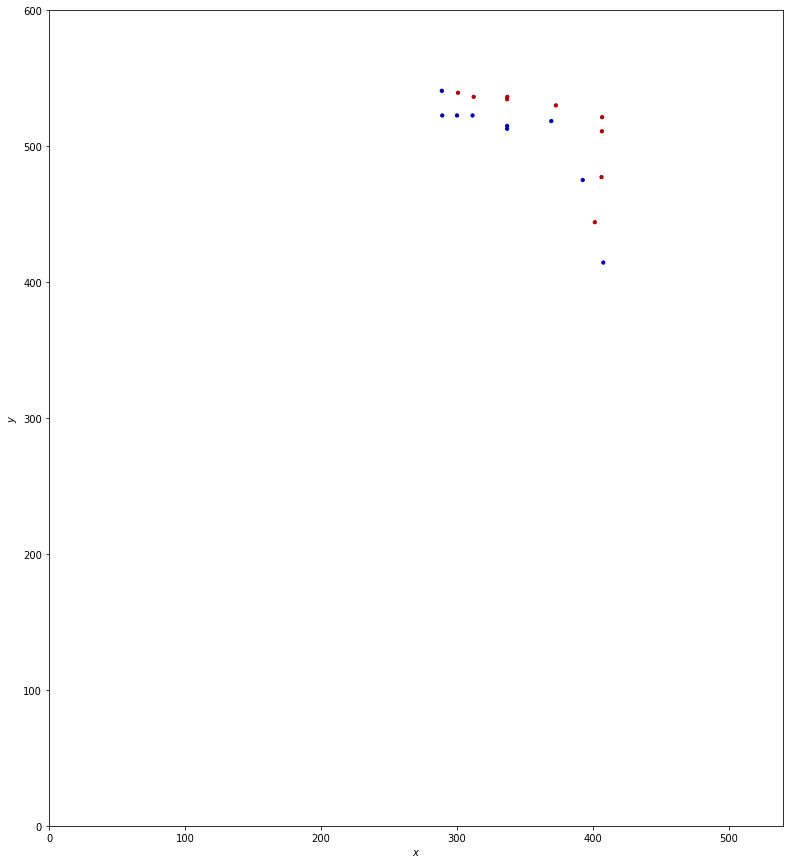

angle -101.471458774
move (-0.20848412863669374, -0.97802575022675065)
359.939758142 472.153150622
162
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


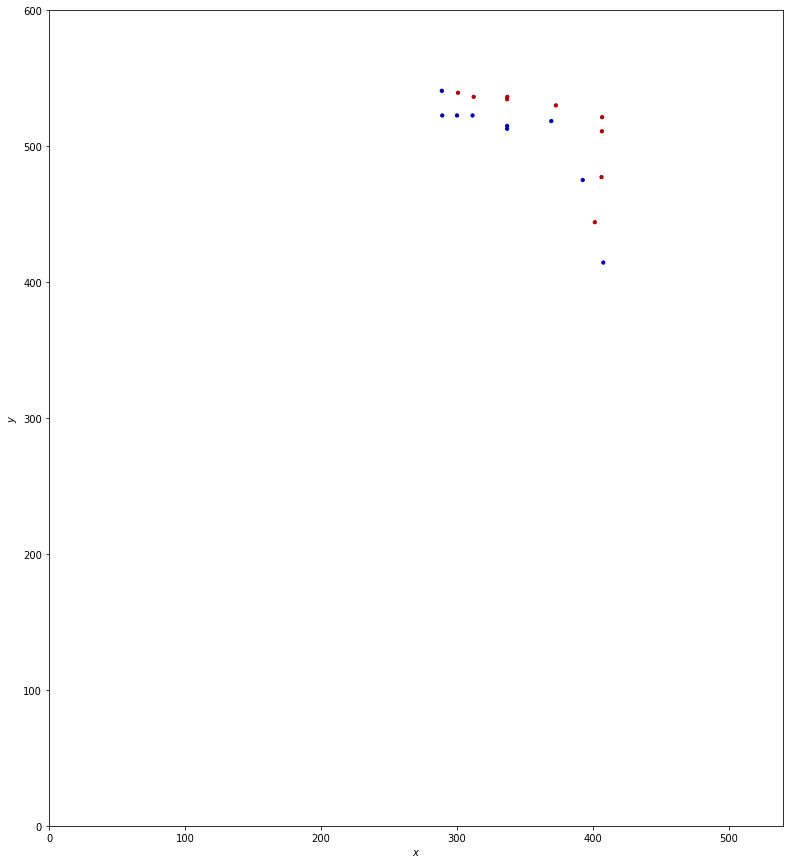

angle -102.033533092
move (-0.21746998156630595, -0.97606700954265968)
359.722288161 471.177083612
163
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


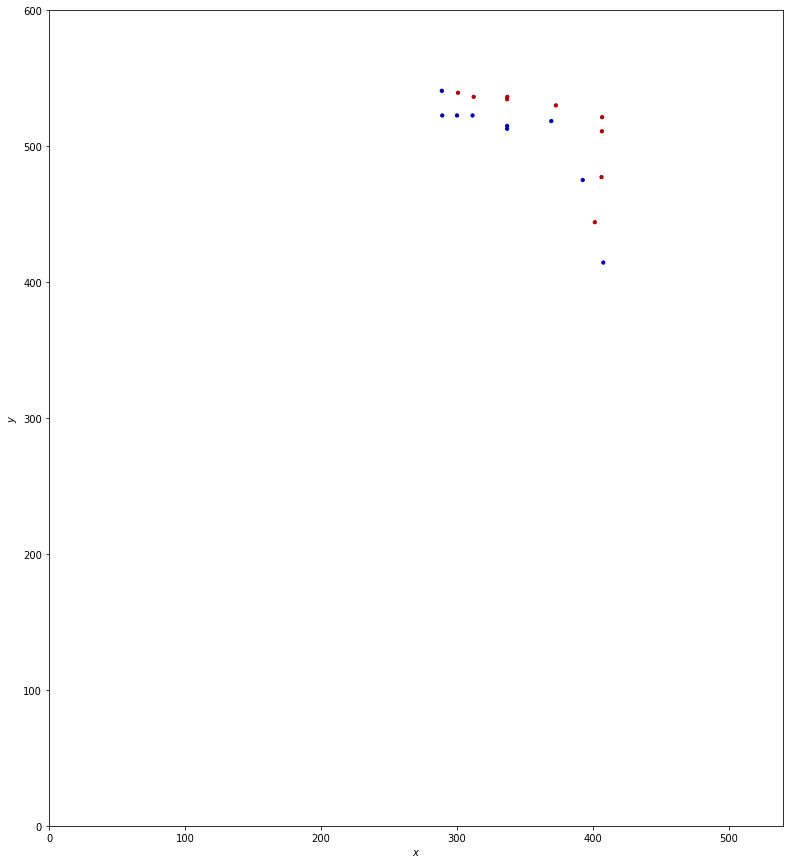

angle -102.560476162
move (-0.2257037949881269, -0.97419597460057161)
359.496584366 470.202887638
164
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (288.9881, 540.8401)


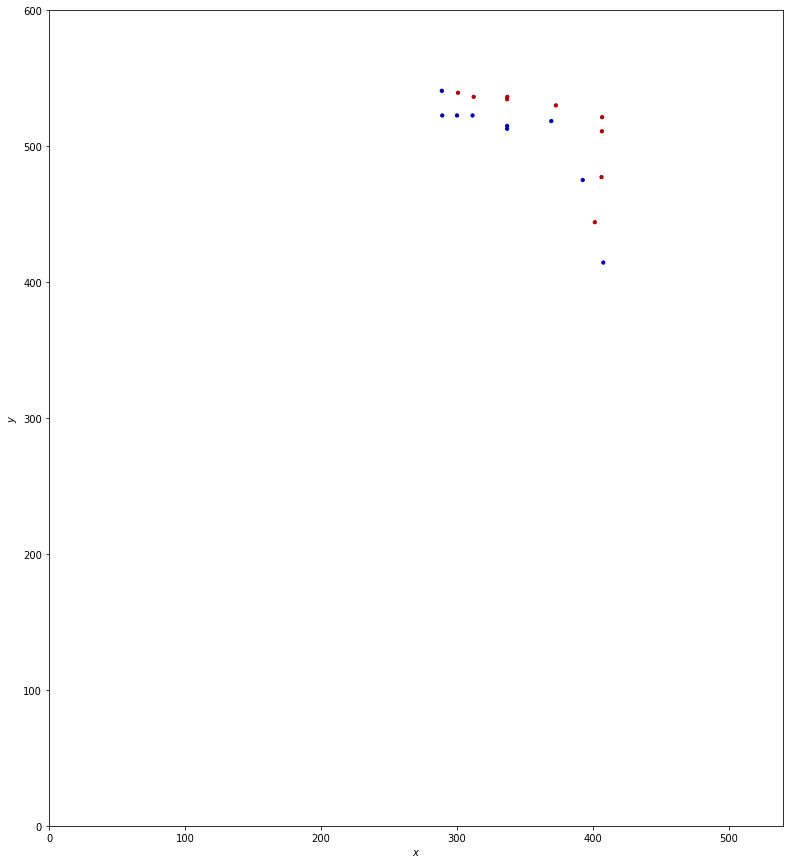

angle -103.044267281
move (-0.23307885148375346, -0.9724578391843085)
359.263505514 469.230429799
165
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes 1 (265.4697, 435.1501)


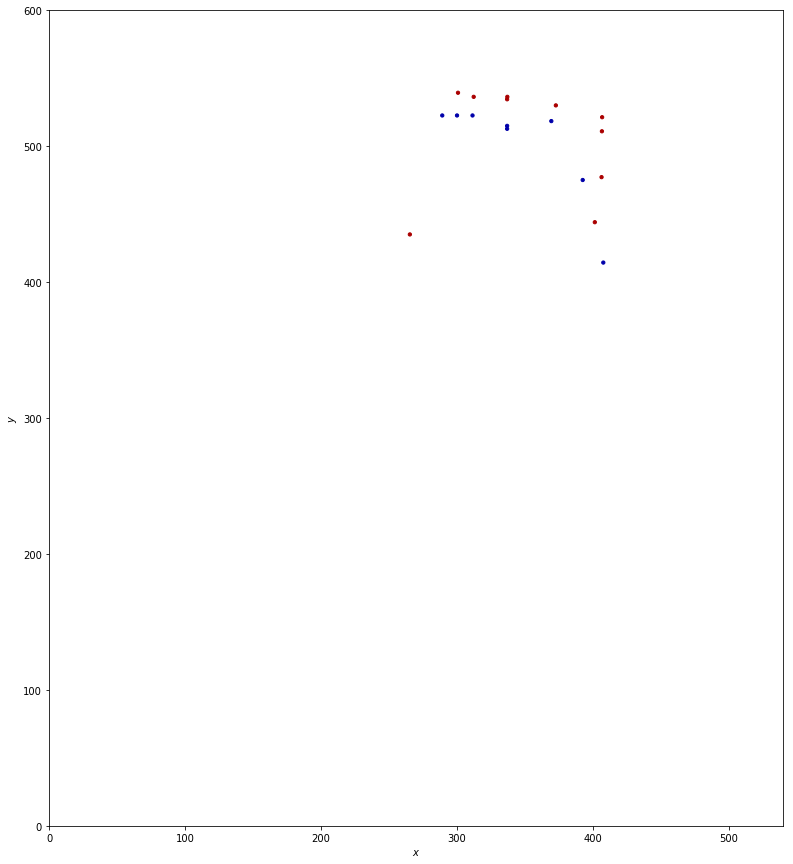

angle -103.478404656
move (-0.24849528839605547, -0.96863310476411102)
359.015010226 468.261796694
166
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes 1 (265.4697, 435.1501)


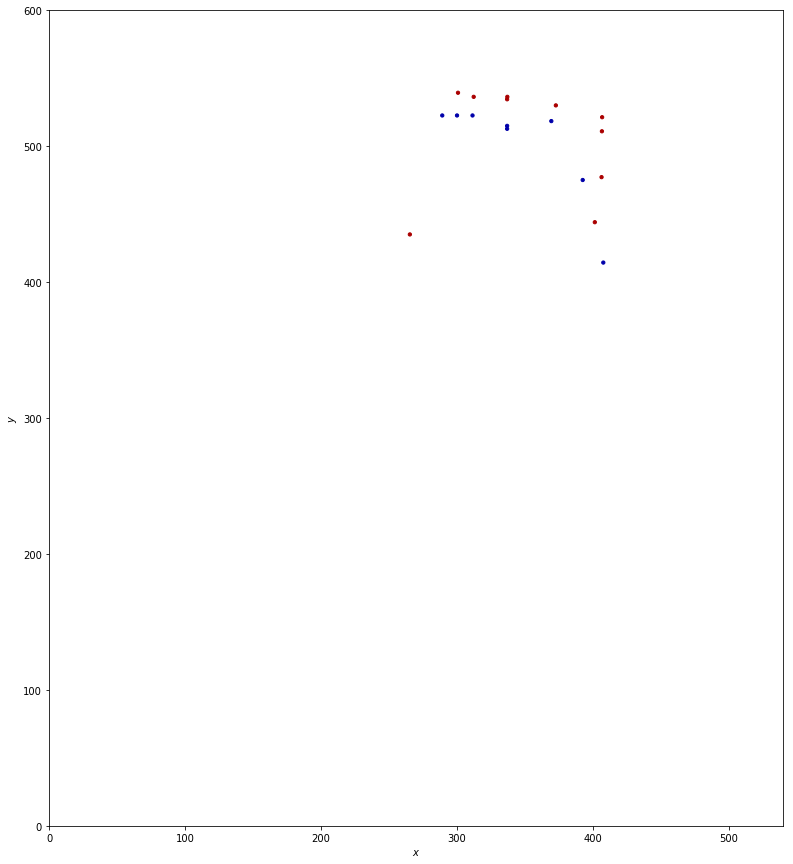

angle -104.388488959
move (-0.25490323885089533, -0.96696656551471494)
358.760106987 467.294830128
167
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes 1 (265.4697, 435.1501)


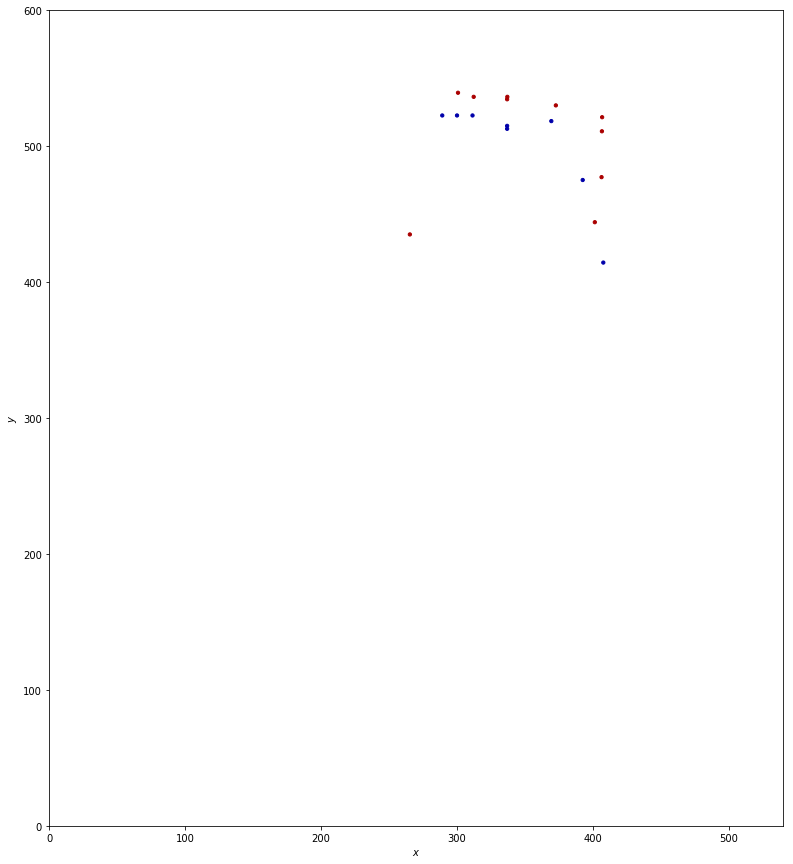

angle -104.767851676
move (-0.25986251516814829, -0.96564562506671359)
358.500244472 466.329184503
168
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes 1 (265.4697, 435.1501)


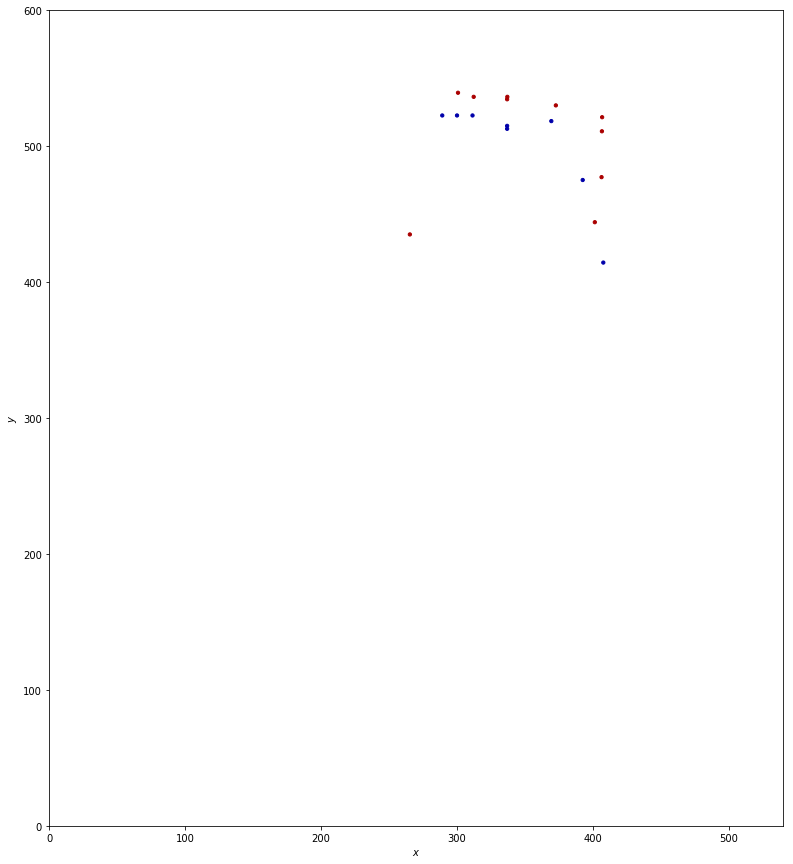

angle -105.061904441
move (-0.26332956318480238, -0.96470593506669233)
358.236914909 465.364478568
169
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


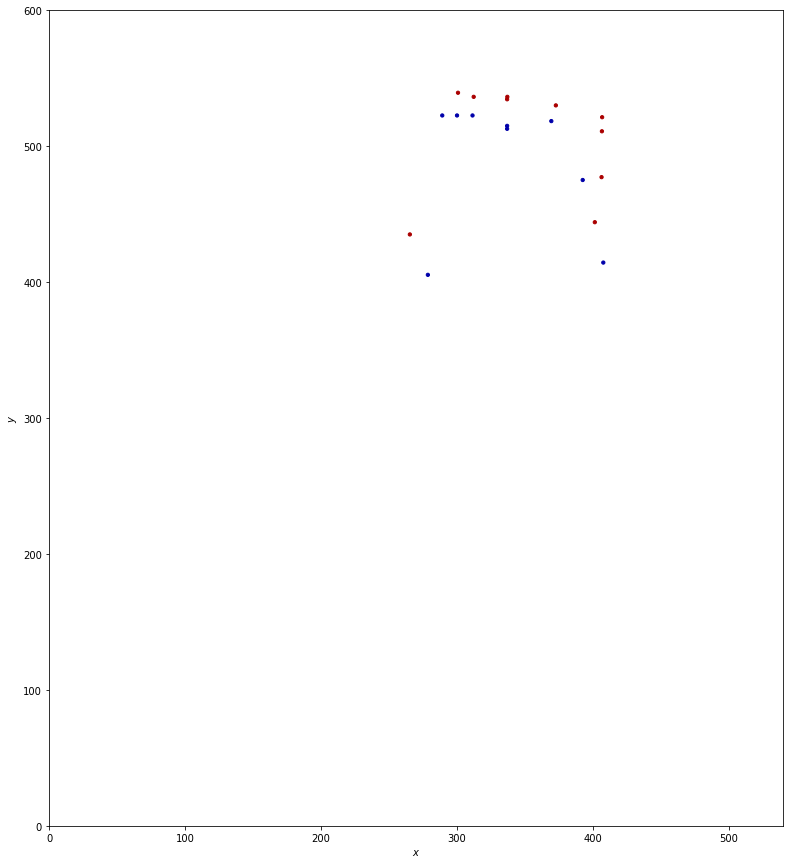

angle -105.267718769
move (-0.076619892465503464, -0.99706037534272451)
358.160295016 464.367418193
170
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


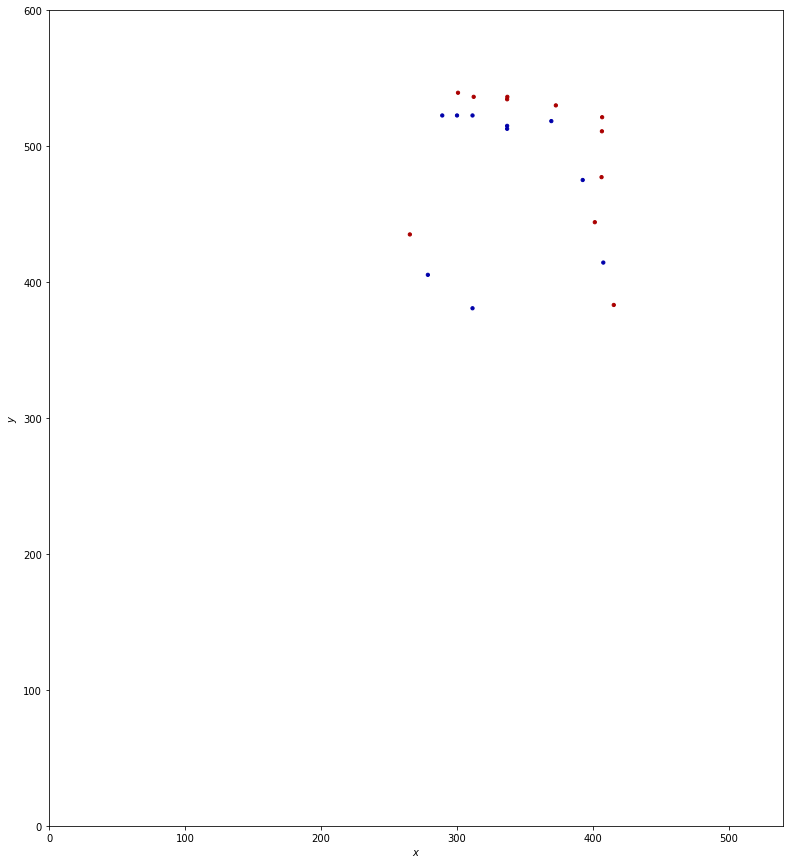

angle -94.3943031768
move (-0.037173448251053808, -0.99930882851355129)
358.123121568 463.368109364
171
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


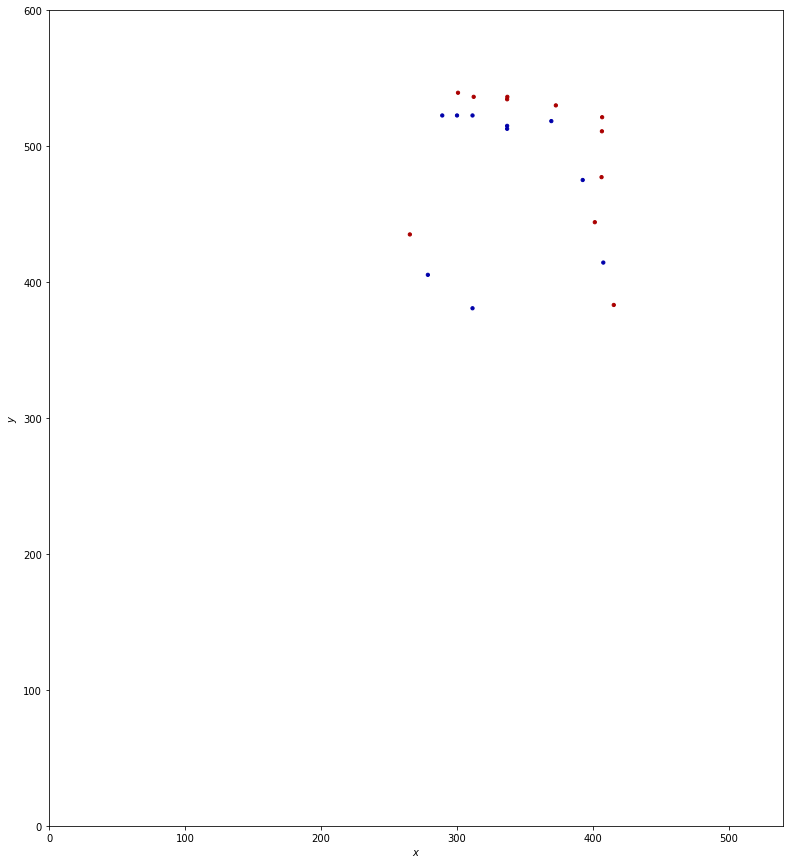

angle -92.1303725349
move (-0.030184071375612232, -0.99954435711237544)
358.092937497 462.368565007
172
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


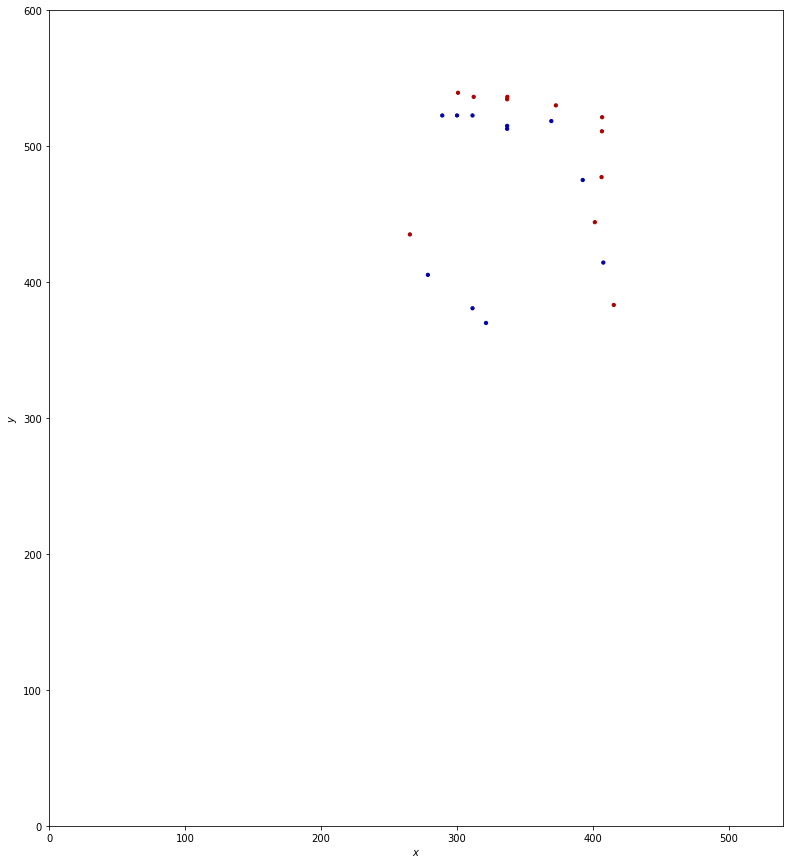

angle -91.7296826122
move (0.14698343253402404, -0.98913895412147024)
358.239920929 461.379426053
173


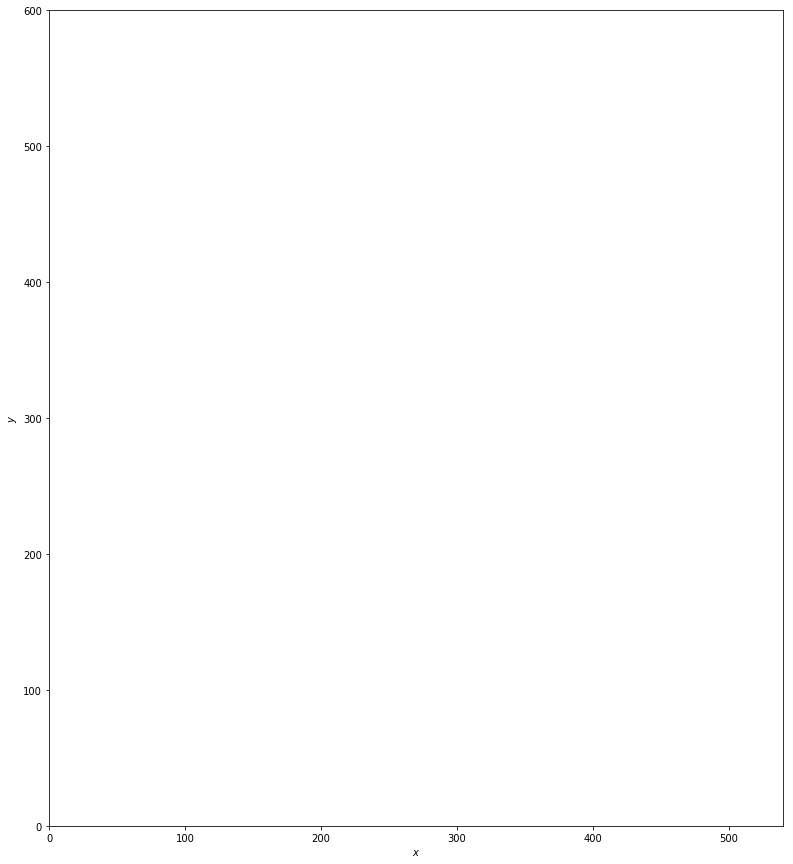

angle -81.5478477057
move (1.0, 0.0)
359.239920929 461.379426053
174
yes -1 (392.6697, 475.2002)


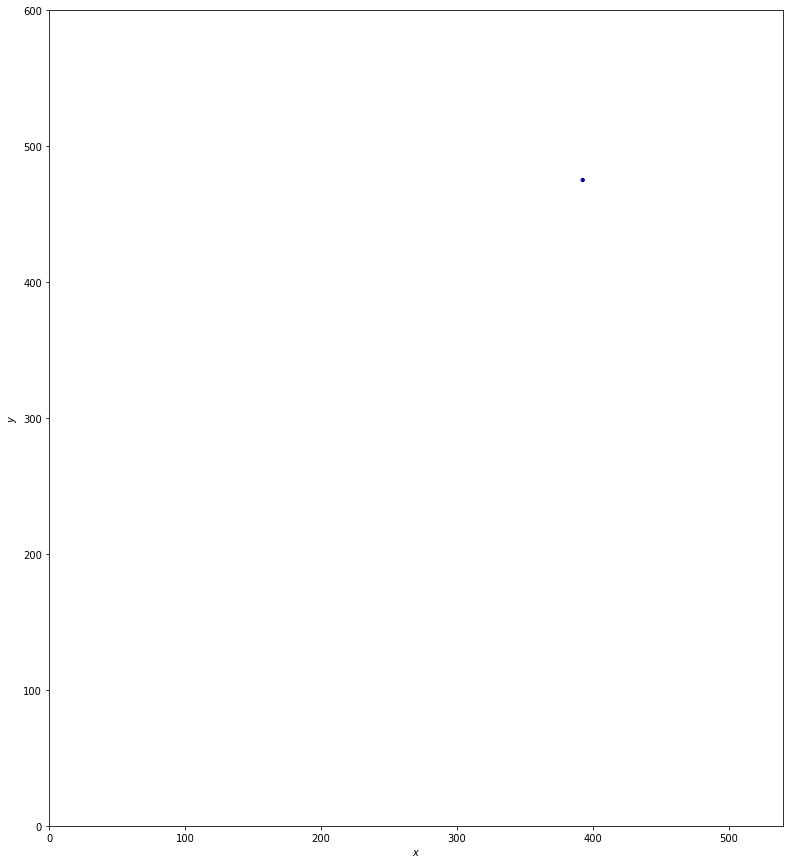

angle 0.0
move (-0.38206292185218865, 0.92413631231857152)
358.857858007 462.303562365
175
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


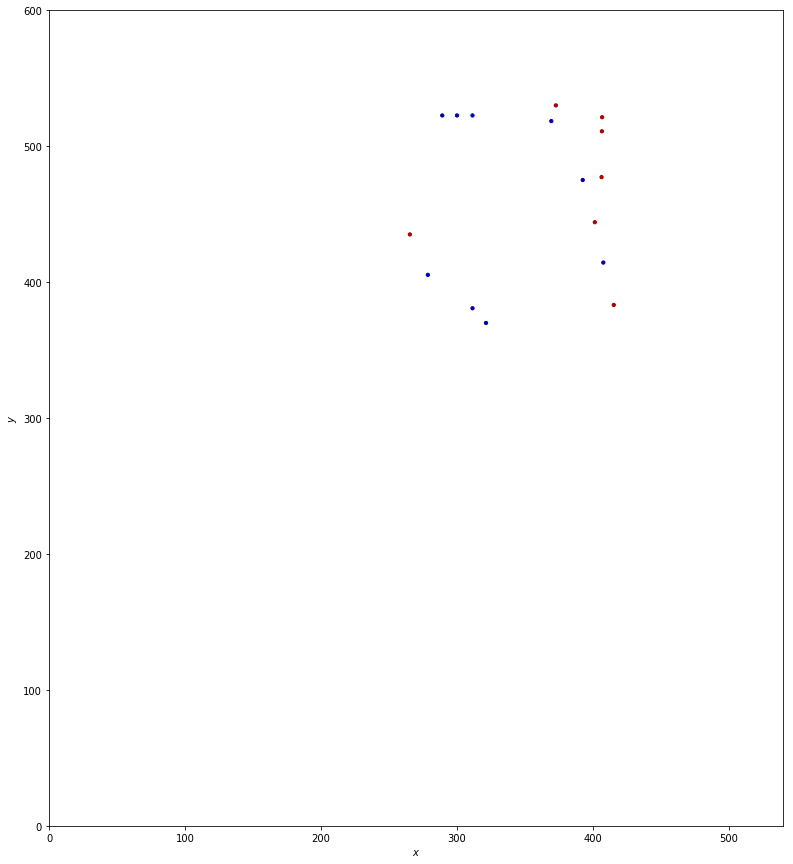

angle 112.461523455
move (0.006908567562089604, -0.99997613556236431)
358.864766575 461.30358623
176


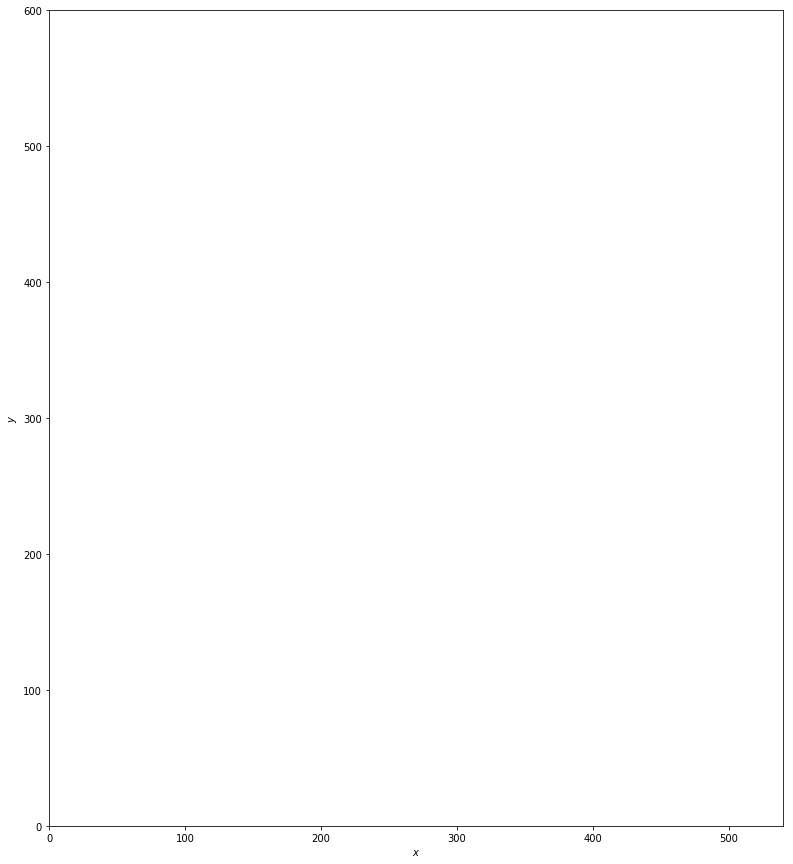

angle -89.6041650874
move (1.0, 0.0)
359.864766575 461.30358623
177
yes -1 (392.6697, 475.2002)


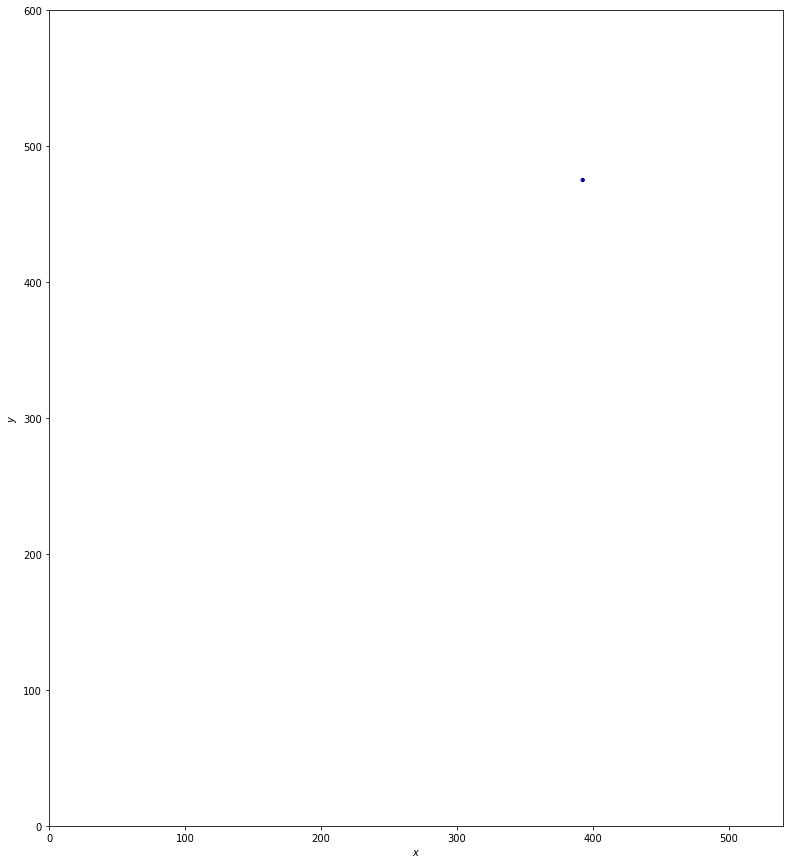

angle 0.0
move (-0.39005904130819952, 0.92078984806183017)
359.474707533 462.224376078
178
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


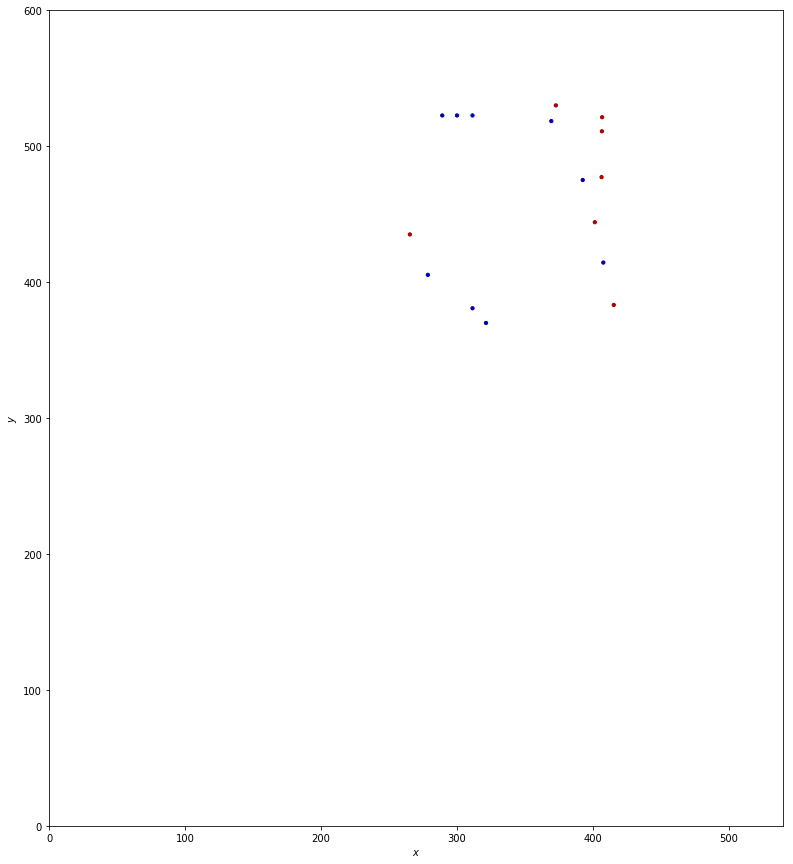

angle 112.958173173
move (0.0069781267940922809, -0.9999756525768243)
359.48168566 461.224400425
179


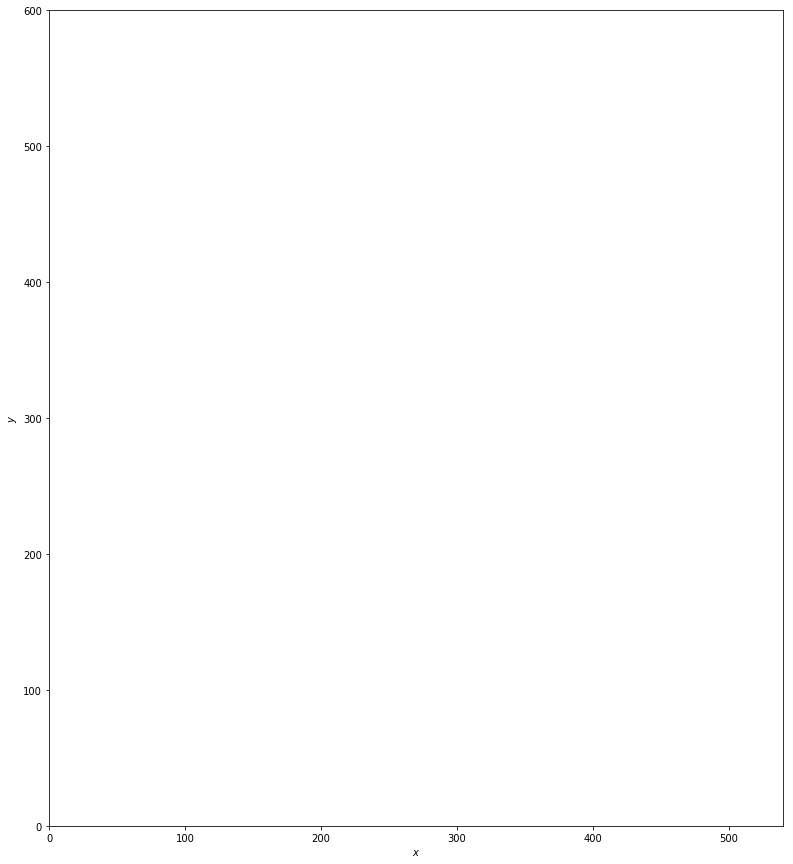

angle -89.6001795409
move (1.0, 0.0)
360.48168566 461.224400425
180
yes -1 (392.6697, 475.2002)


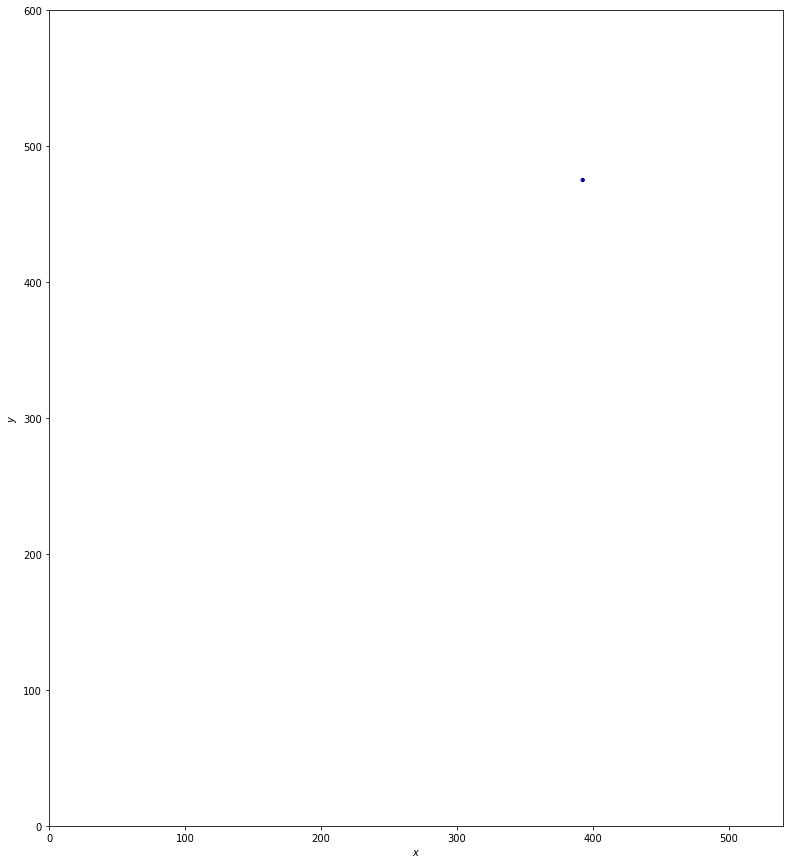

angle 0.0
move (-0.39827095351313568, 0.91726781671861668)
360.083414707 462.141668242
181
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


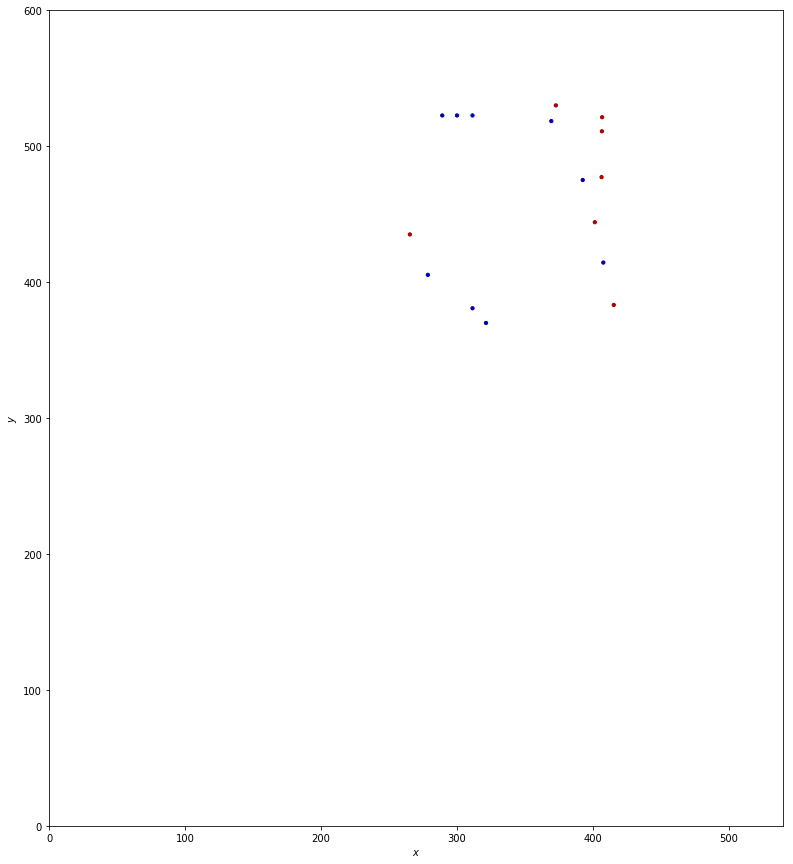

angle 113.470131845
move (0.0066962395244606222, -0.99997757993678593)
360.090110946 461.141690662
182


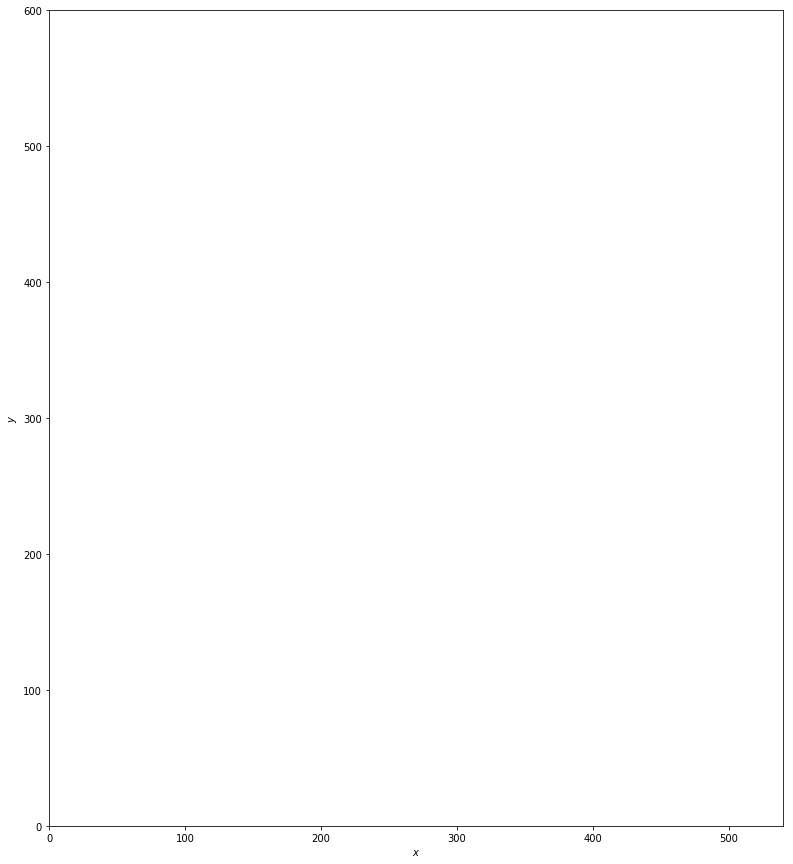

angle -89.6163308693
move (1.0, 0.0)
361.090110946 461.141690662
183
yes -1 (392.6697, 475.2002)


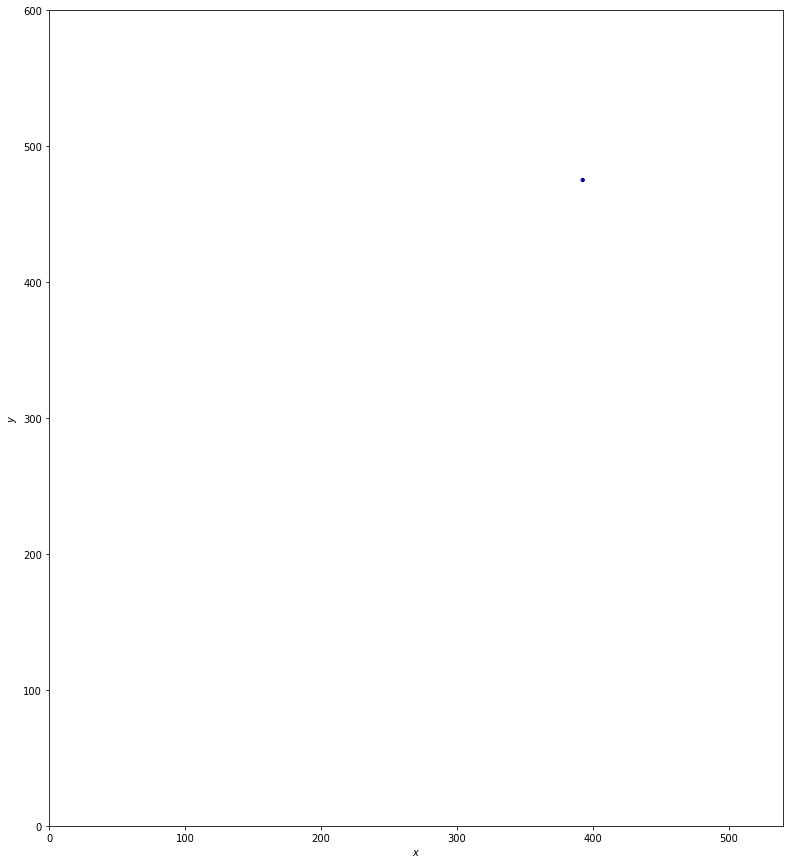

angle 0.0
move (-0.4066972996712796, 0.91356297343975656)
360.683413647 462.055253636
184
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


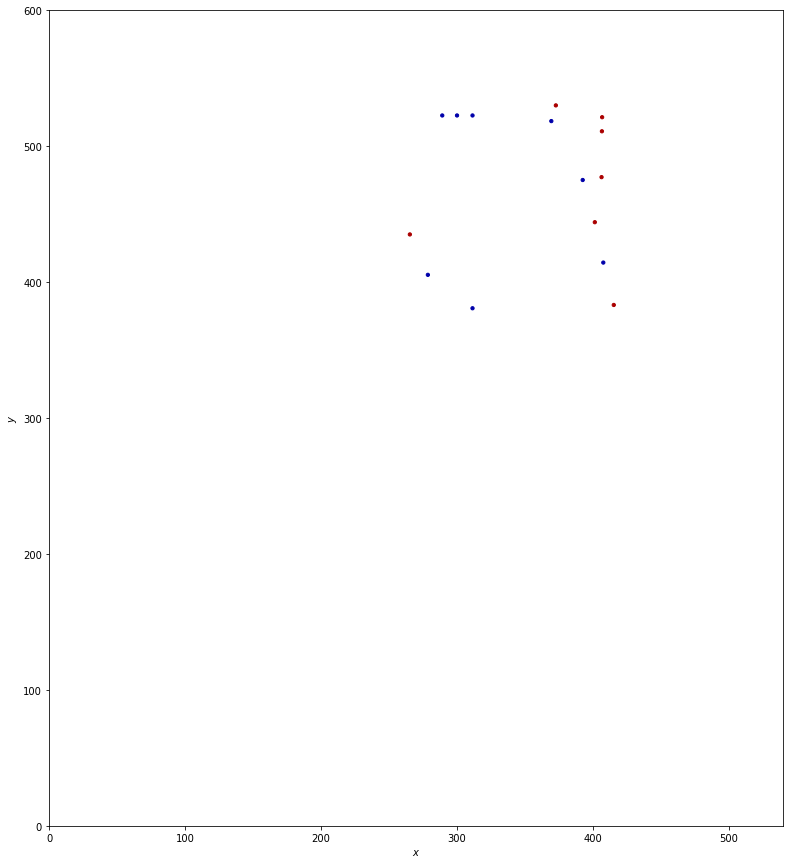

angle 113.997532482
move (-0.15304118527298147, -0.9882198113831967)
360.530372461 461.067033824
185
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


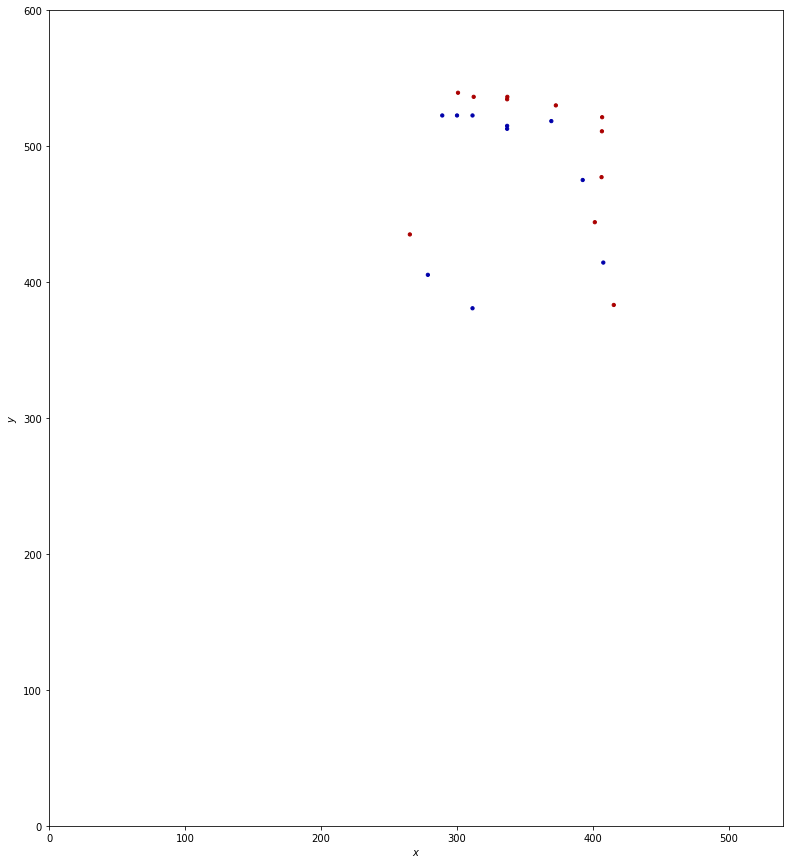

angle -98.803209053
move (-0.0063944911293522481, -0.99997955503259994)
360.52397797 460.067054269
186
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (300.8997, 539.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


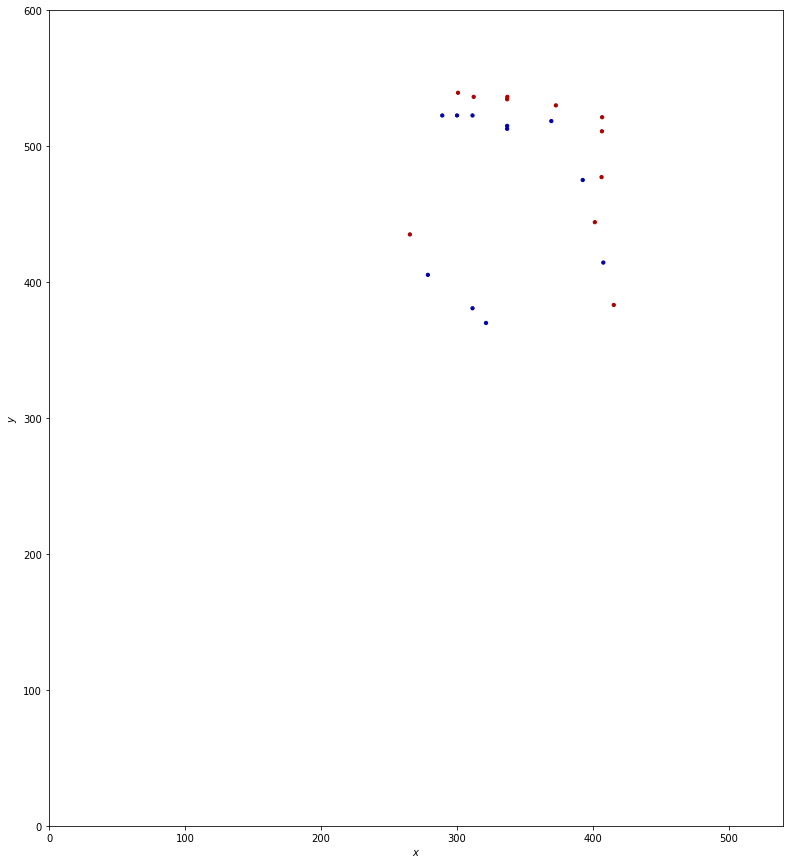

angle -90.3663798507
move (0.16607424173073895, -0.98611325223503621)
360.690052212 459.080941017
187


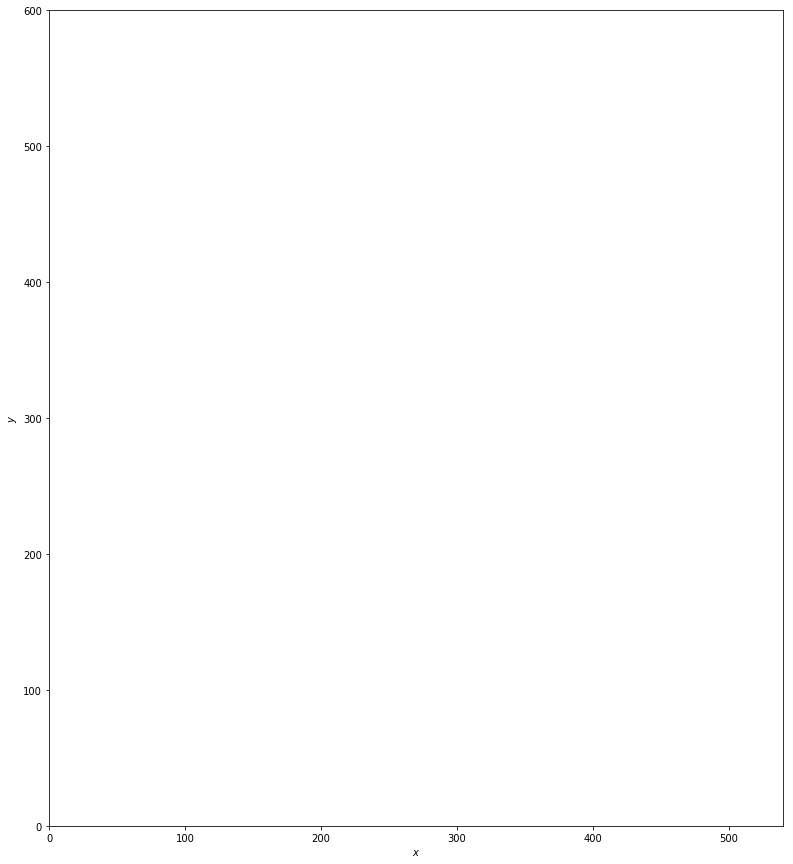

angle -80.4403549672
move (1.0, 0.0)
361.690052212 459.080941017
188
yes -1 (392.6697, 475.2002)


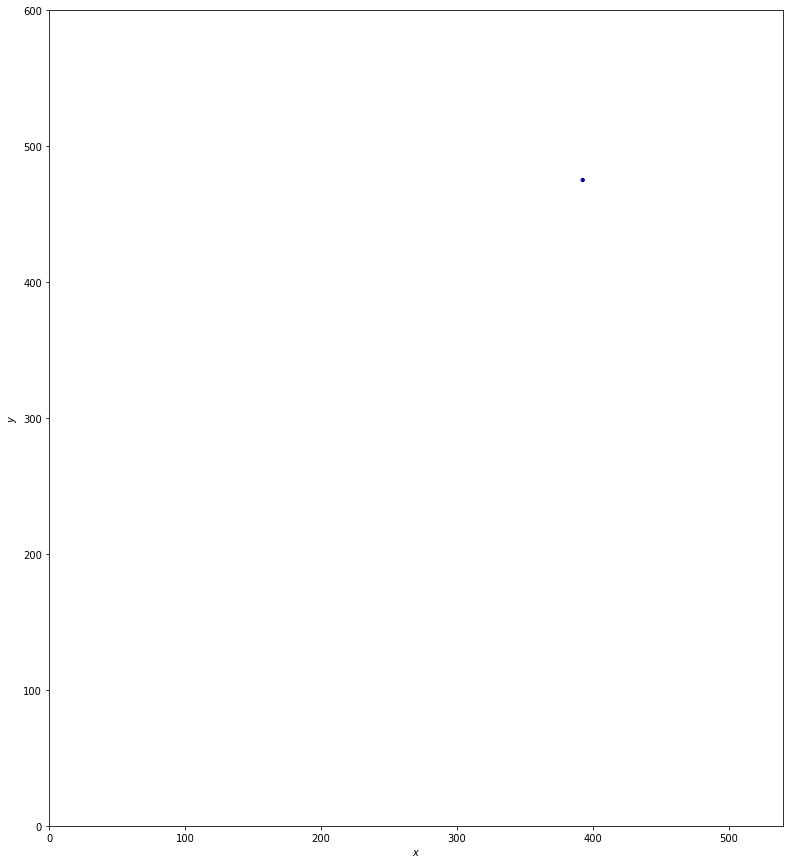

angle 0.0
move (-0.46157456513070172, 0.88710141518566166)
361.228477647 459.968042432
189
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


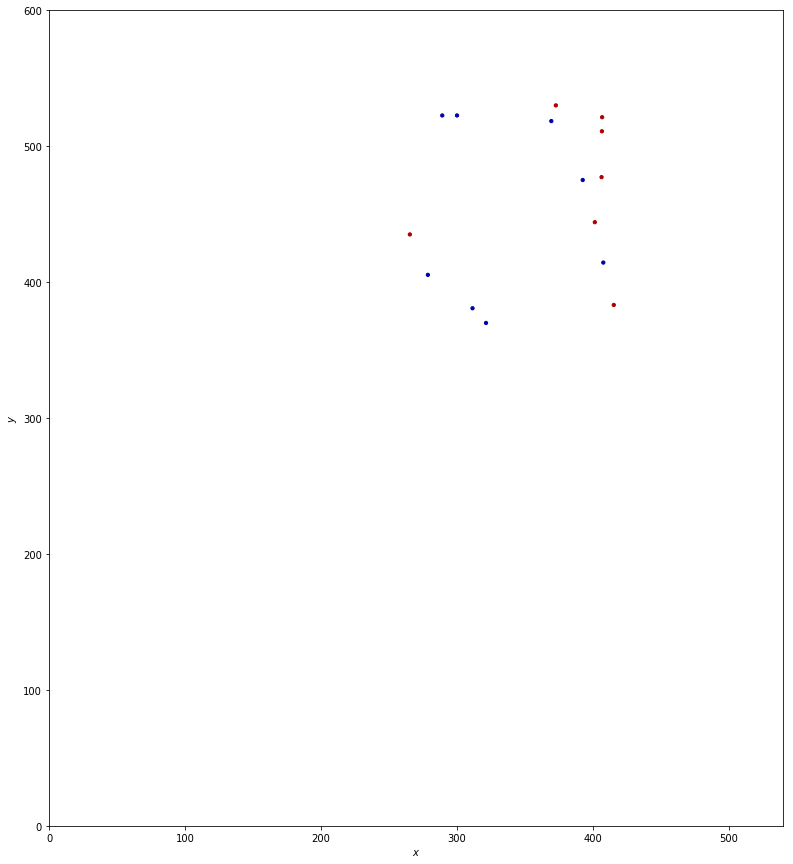

angle 117.488758071
move (0.20809507071970038, -0.97810860416528533)
361.436572718 458.989933828
190


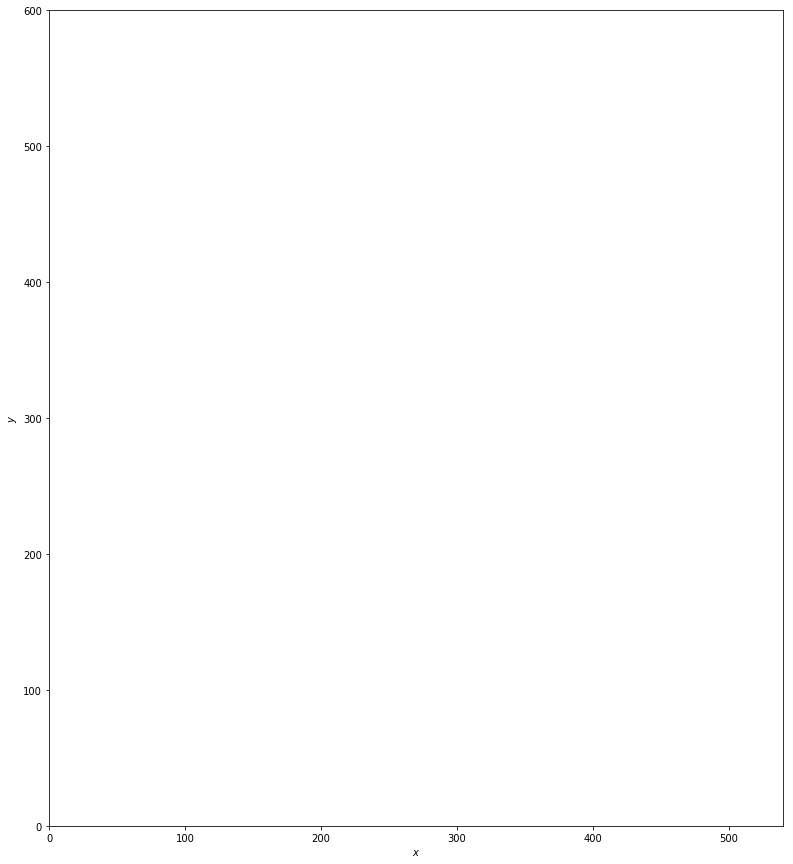

angle -77.9892581612
move (1.0, 0.0)
362.436572718 458.989933828
191
yes -1 (392.6697, 475.2002)


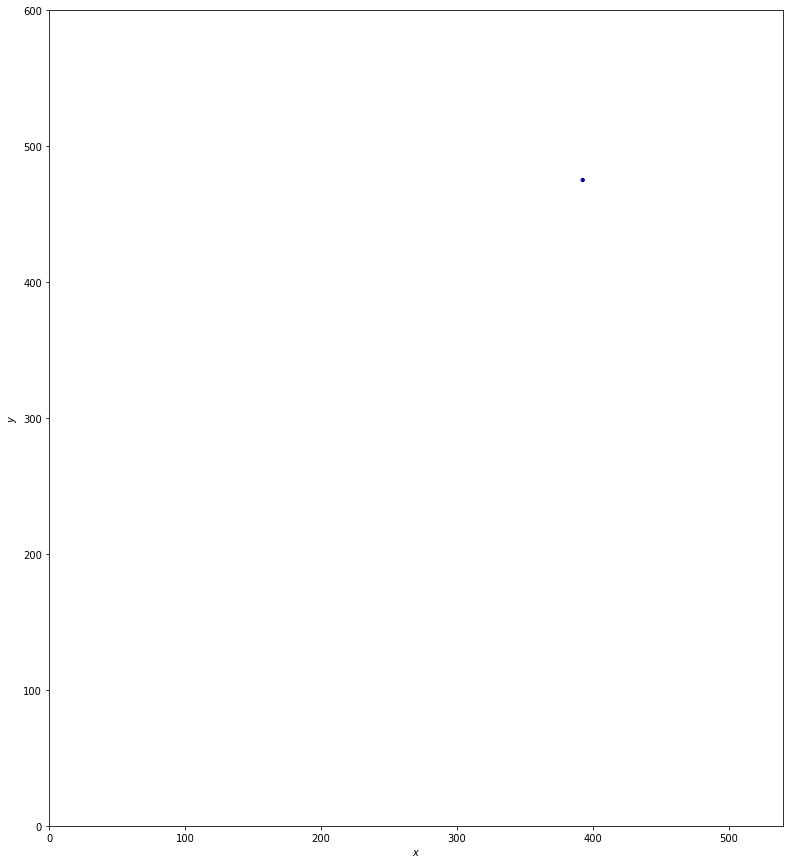

angle 0.0
move (-0.47253730597253235, 0.88131066852967421)
361.964035412 459.871244496
192
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


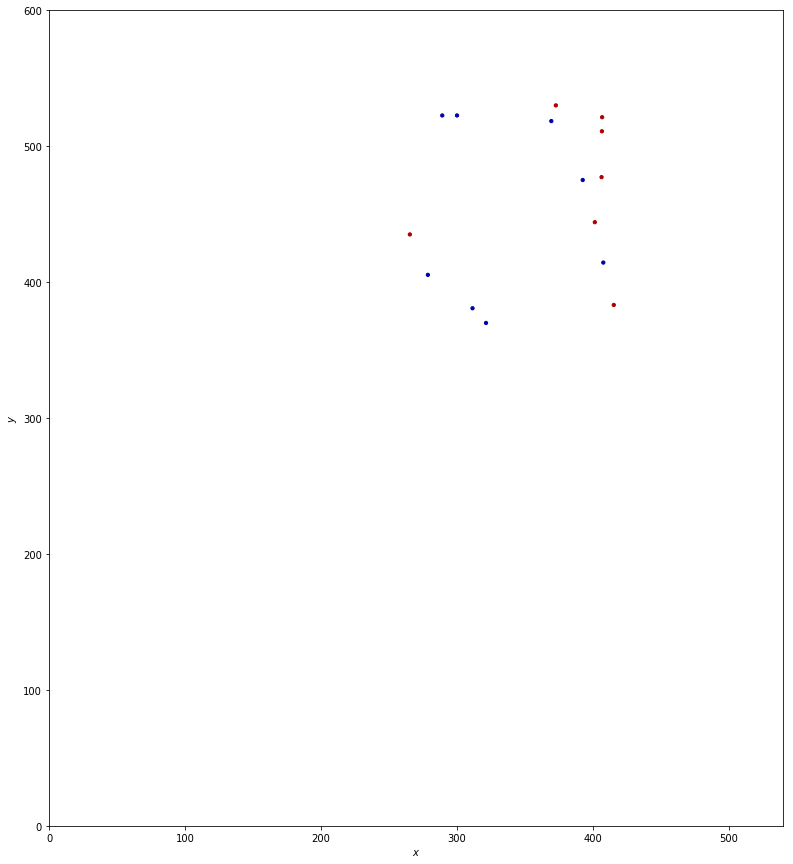

angle 118.199125006
move (0.20245016196240073, -0.97929256707145373)
362.166485574 458.891951929
193


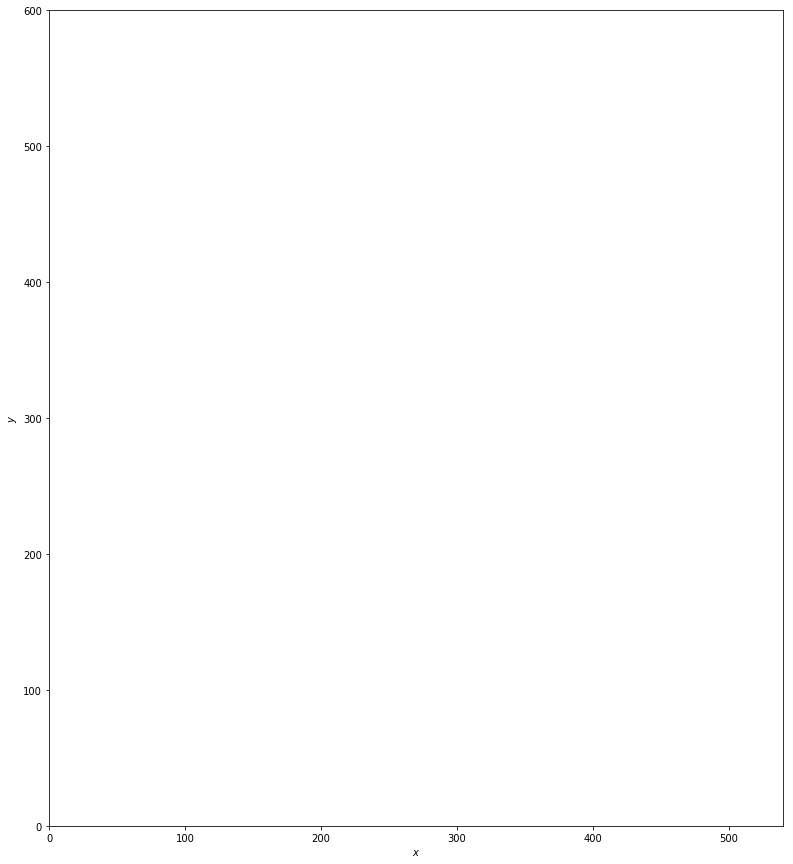

angle -78.3197254723
move (1.0, 0.0)
363.166485574 458.891951929
194
yes -1 (392.6697, 475.2002)


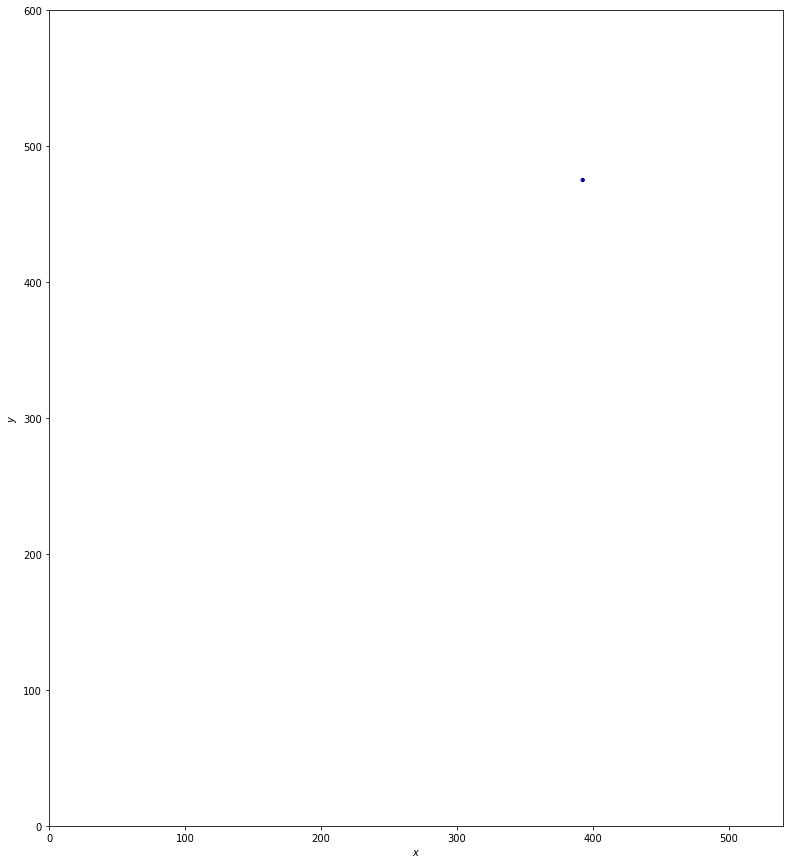

angle 0.0
move (-0.4837733728230455, 0.8751933065028632)
362.682712201 459.767145236
195
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)


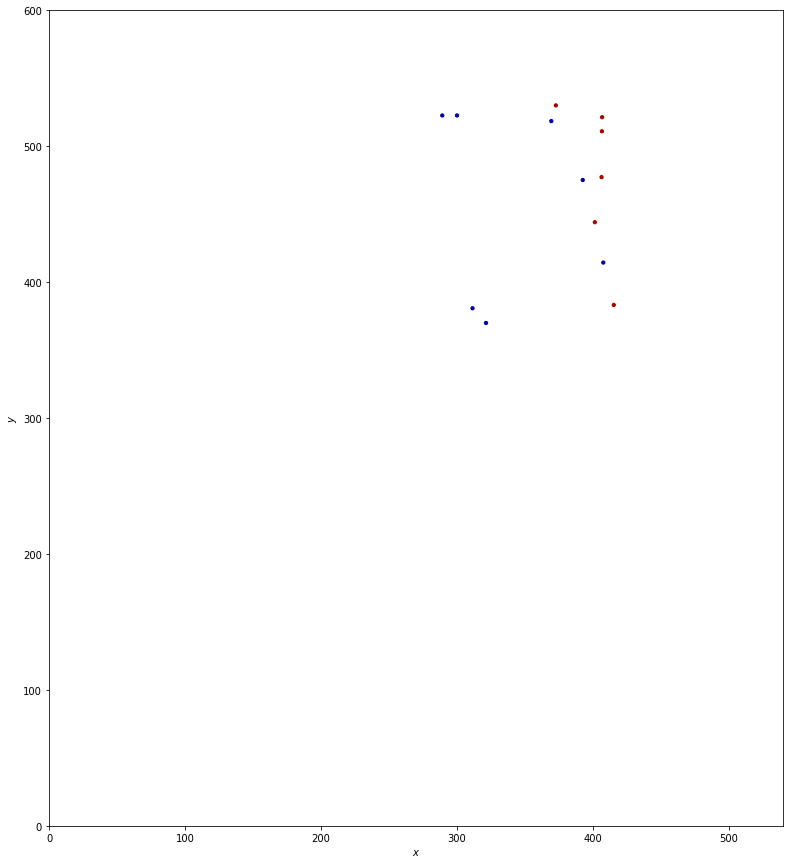

angle 118.932138353
move (0.14019191865738745, -0.99012434872755273)
362.822904119 458.777020887
196


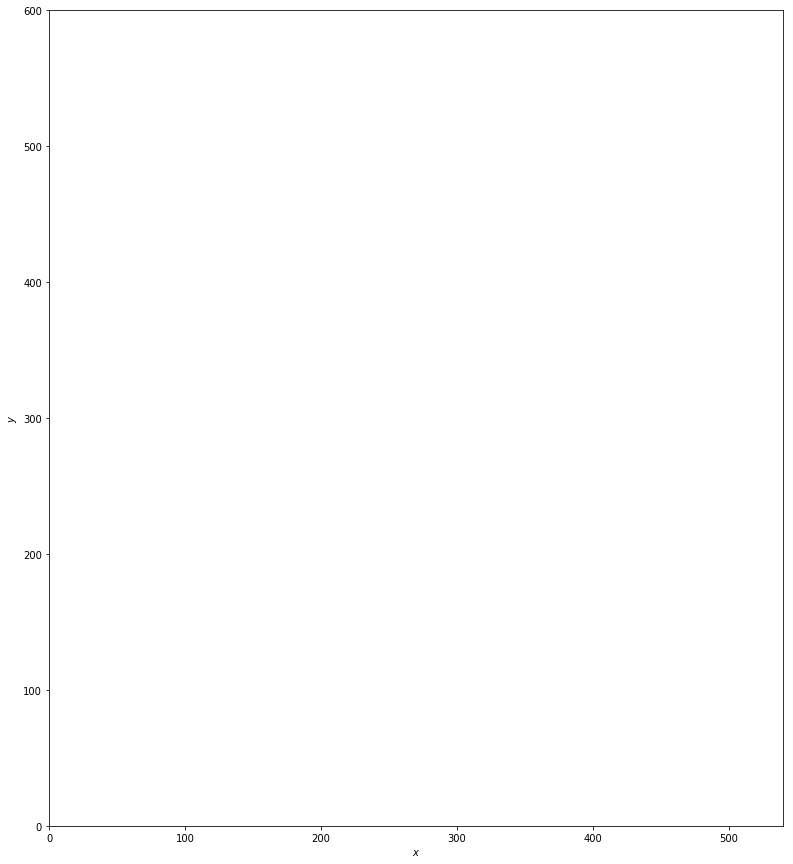

angle -81.9410480989
move (1.0, 0.0)
363.822904119 458.777020887
197
yes -1 (392.6697, 475.2002)


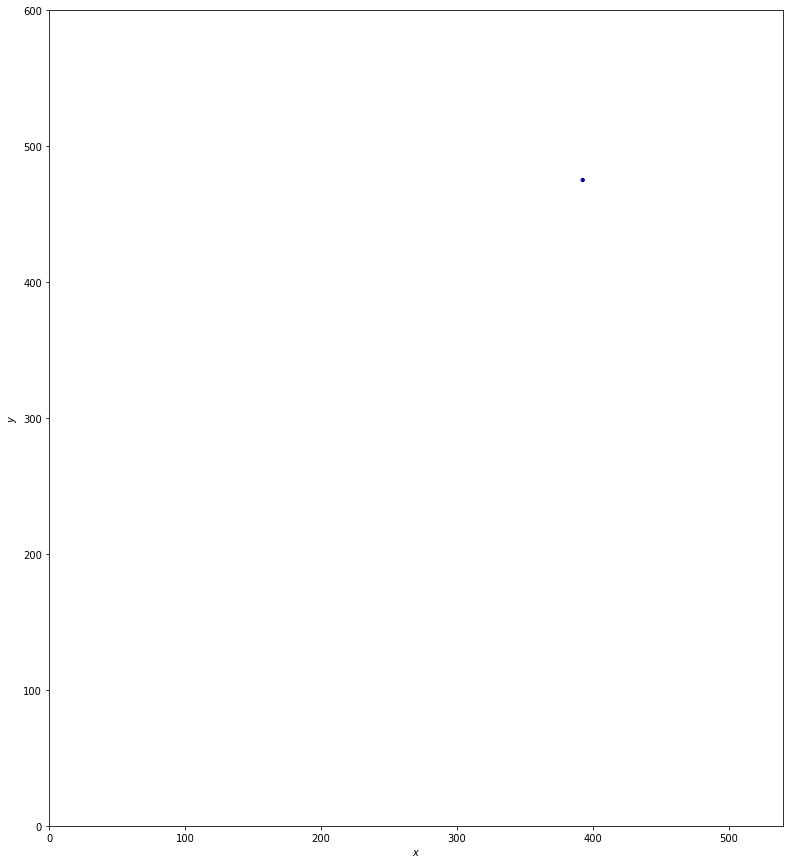

angle 0.0
move (-0.49475971095146787, 0.86902982021287389)
363.328144408 459.646050707
198
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)


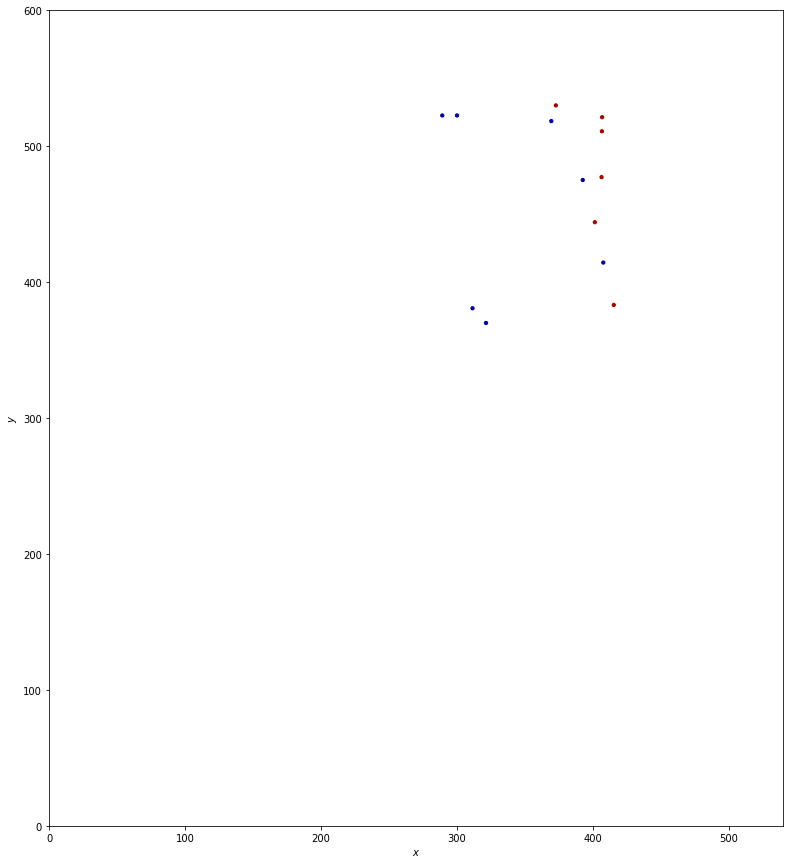

angle 119.653906655
move (0.13515109683390222, -0.99082500020164666)
363.463295505 458.655225707
199


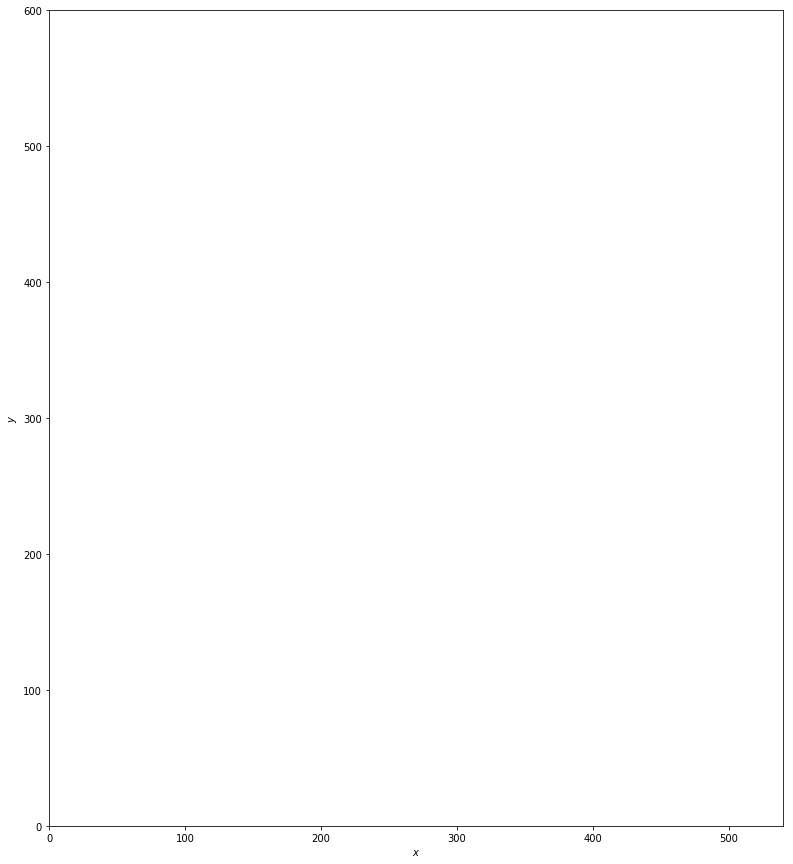

angle -82.2326428259
move (1.0, 0.0)
364.463295505 458.655225707
200
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


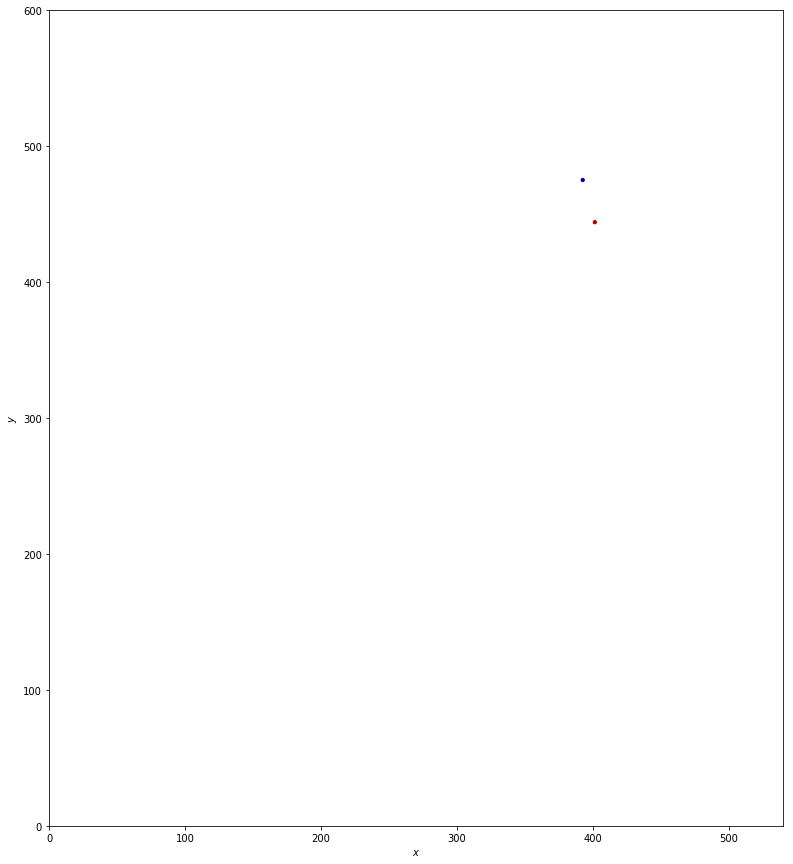

angle 0.0
move (-0.98724489541230642, 0.15920903392189814)
363.47605061 458.814434741
201


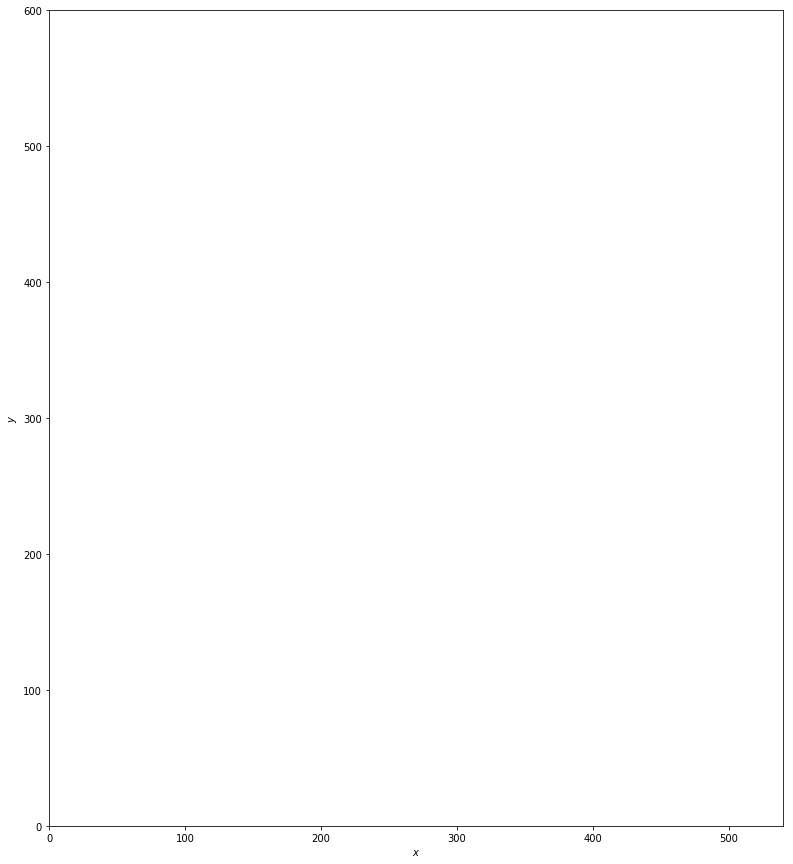

angle 170.839011285
move (1.0, 0.0)
364.47605061 458.814434741
202
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


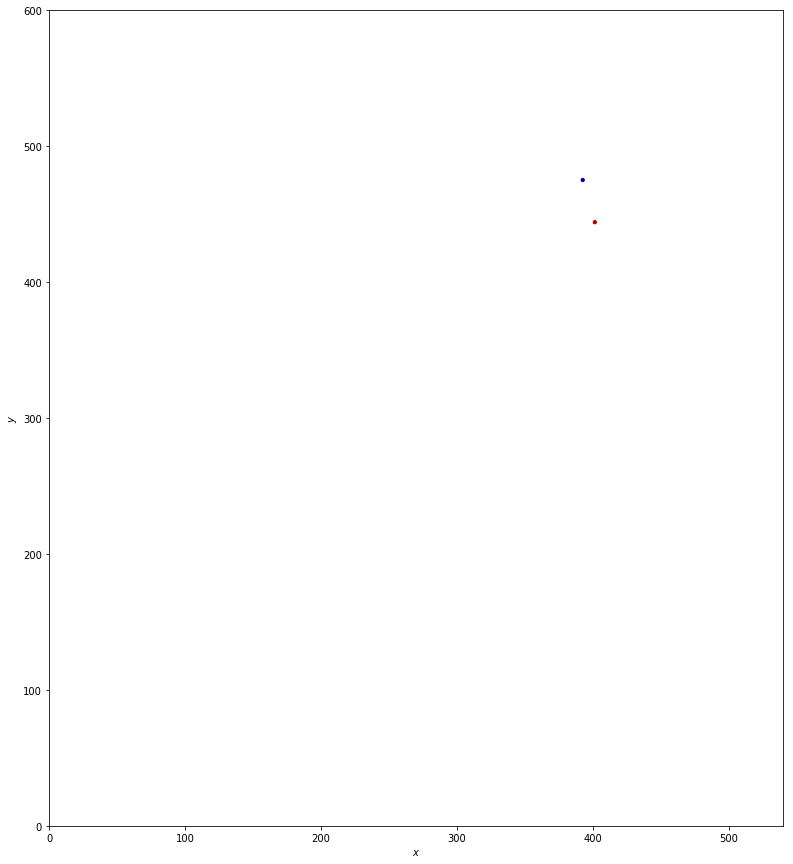

angle 0.0
move (-0.9858509893164602, 0.16762406409509548)
363.490199621 458.982058805
203


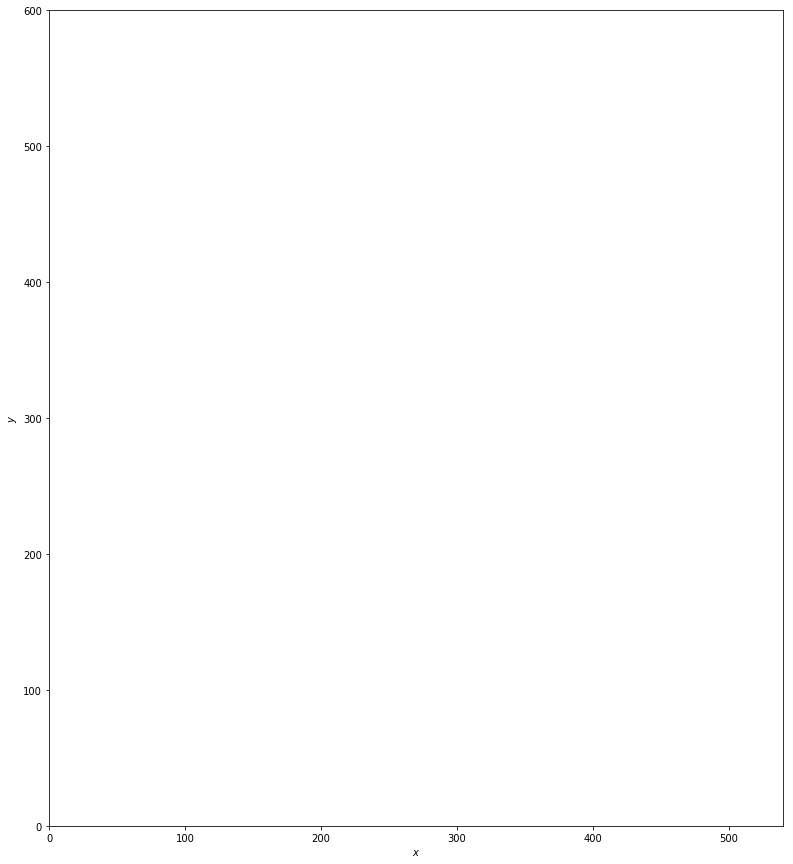

angle 170.350294245
move (1.0, 0.0)
364.490199621 458.982058805
204
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


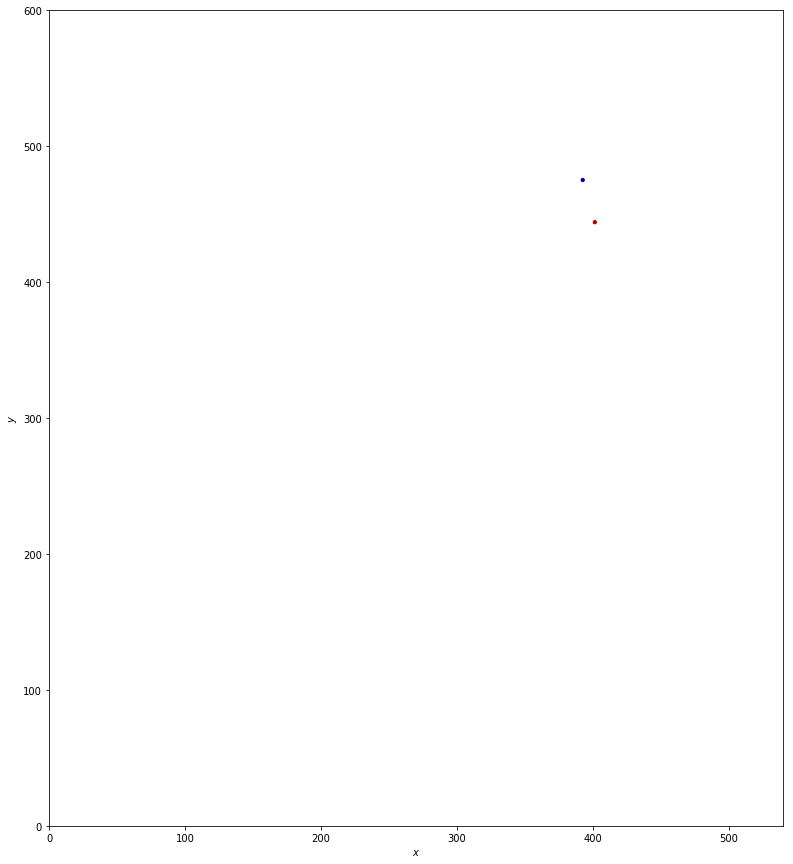

angle 0.0
move (-0.98430466067757005, 0.17647757638978834)
363.50589496 459.158536382
205


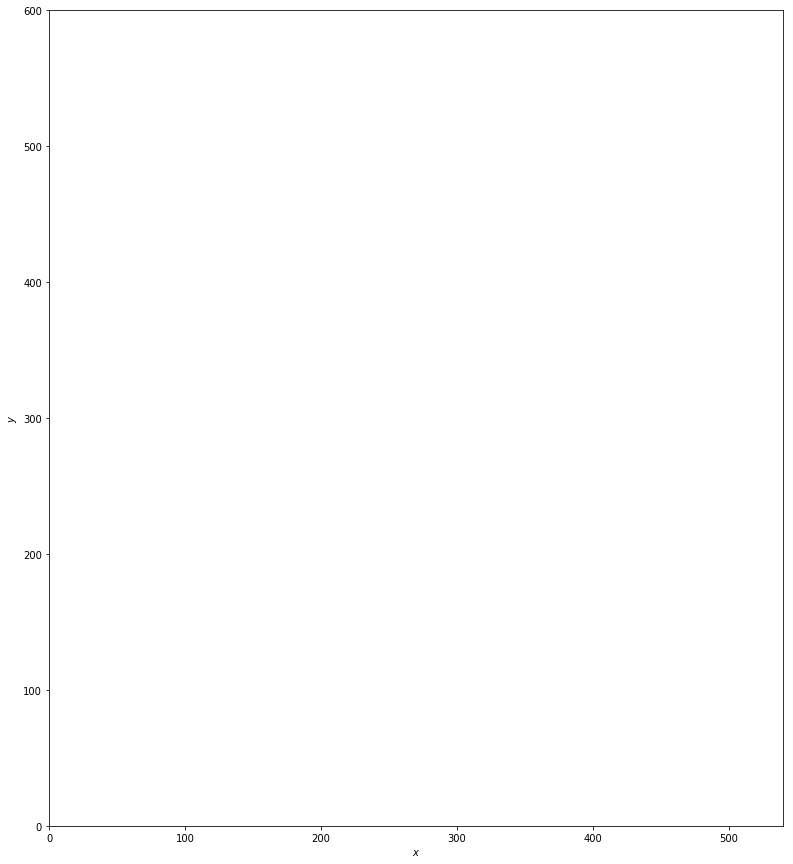

angle 169.835344602
move (1.0, 0.0)
364.50589496 459.158536382
206
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


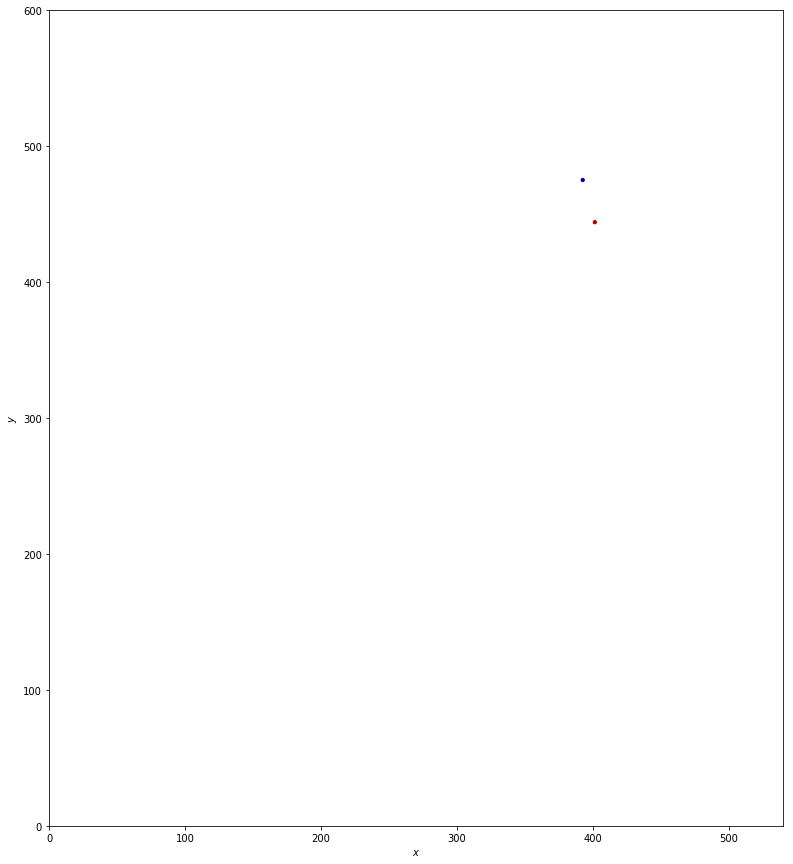

angle 0.0
move (-0.98258925274120246, 0.18579117416466628)
363.523305707 459.344327556
207


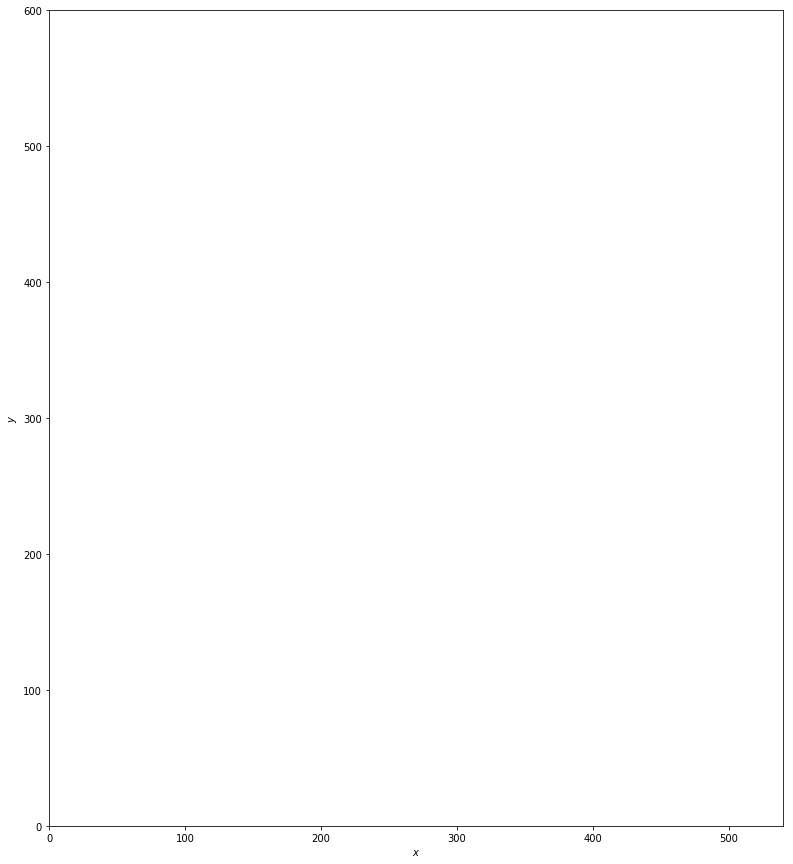

angle 169.292736938
move (1.0, 0.0)
364.523305707 459.344327556
208
yes -1 (392.6697, 475.2002)


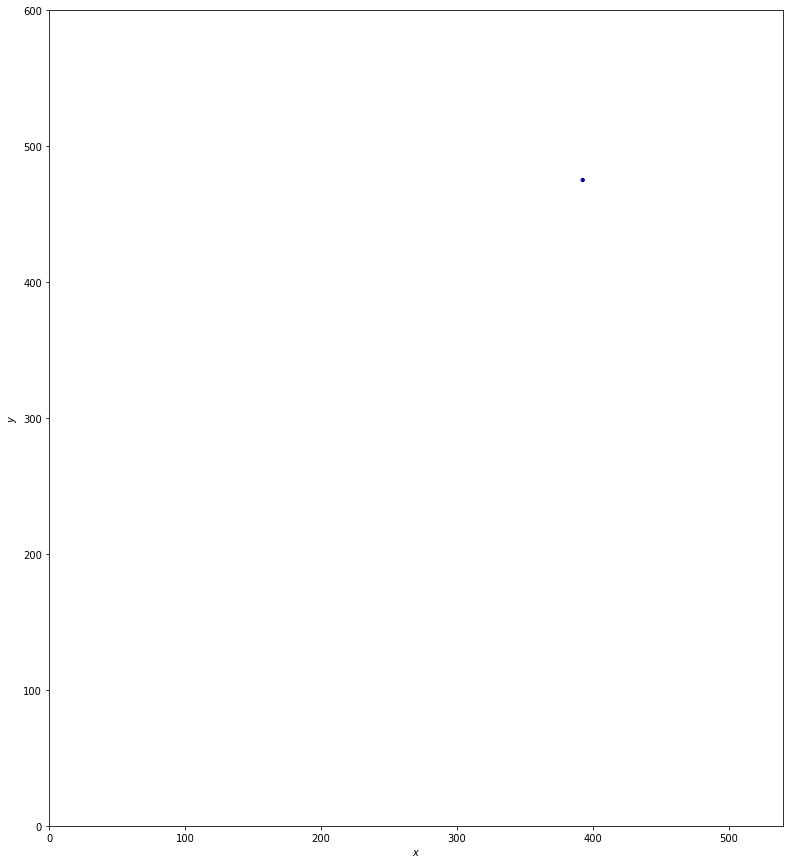

angle 0.0
move (-0.49081433668326691, 0.87126418892673685)
364.03249137 460.215591745
209
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)


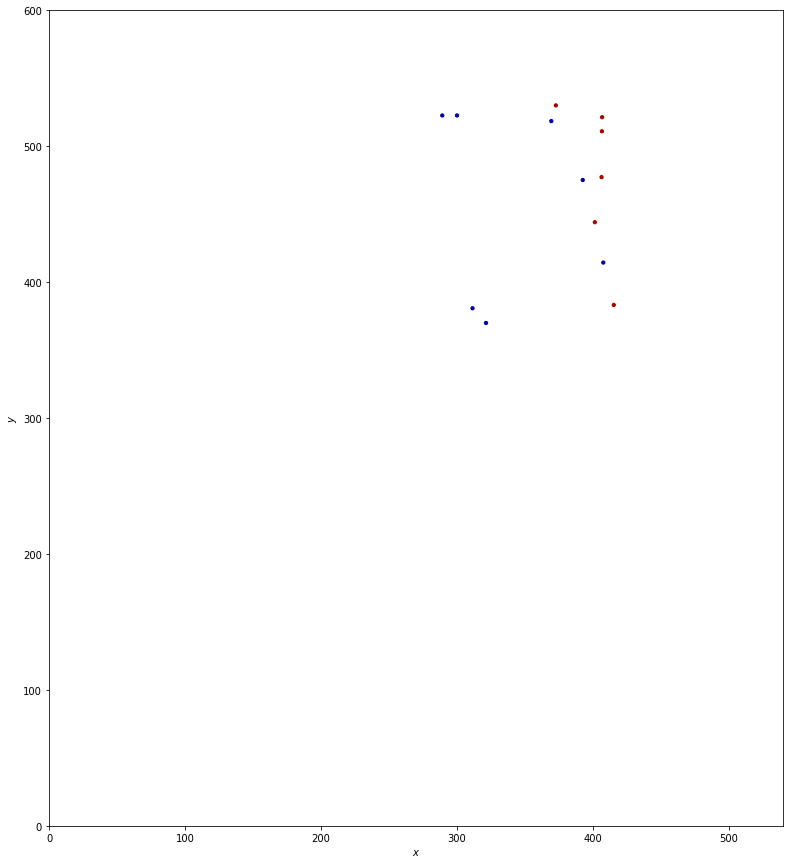

angle 119.394119624
move (0.12565359799738016, -0.99207417732259962)
364.158144968 459.223517567
210


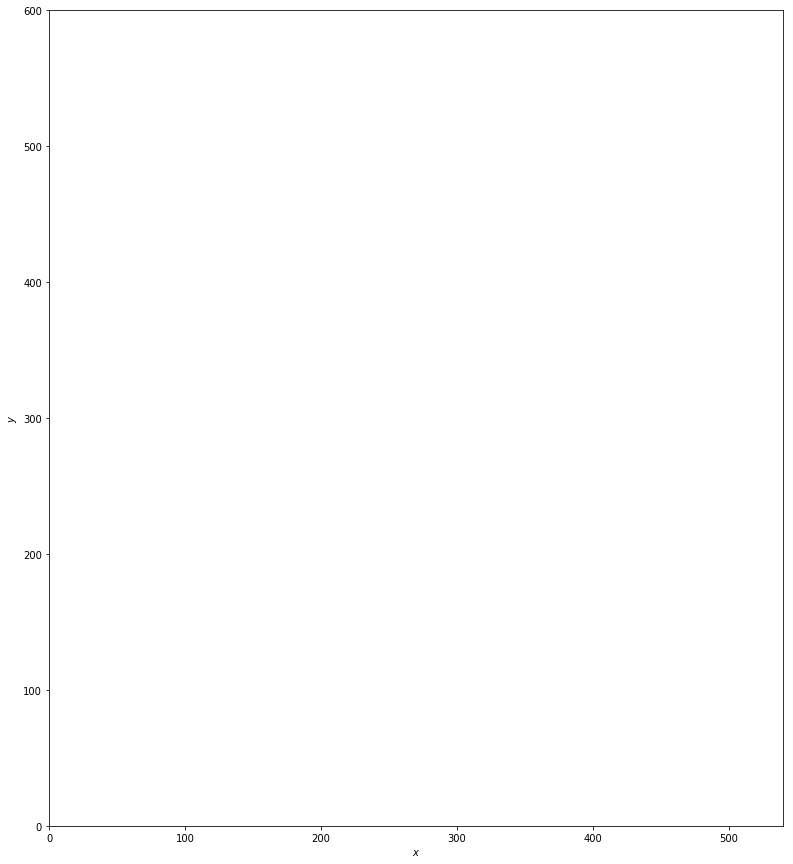

angle -82.7814982032
move (1.0, 0.0)
365.158144968 459.223517567
211
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


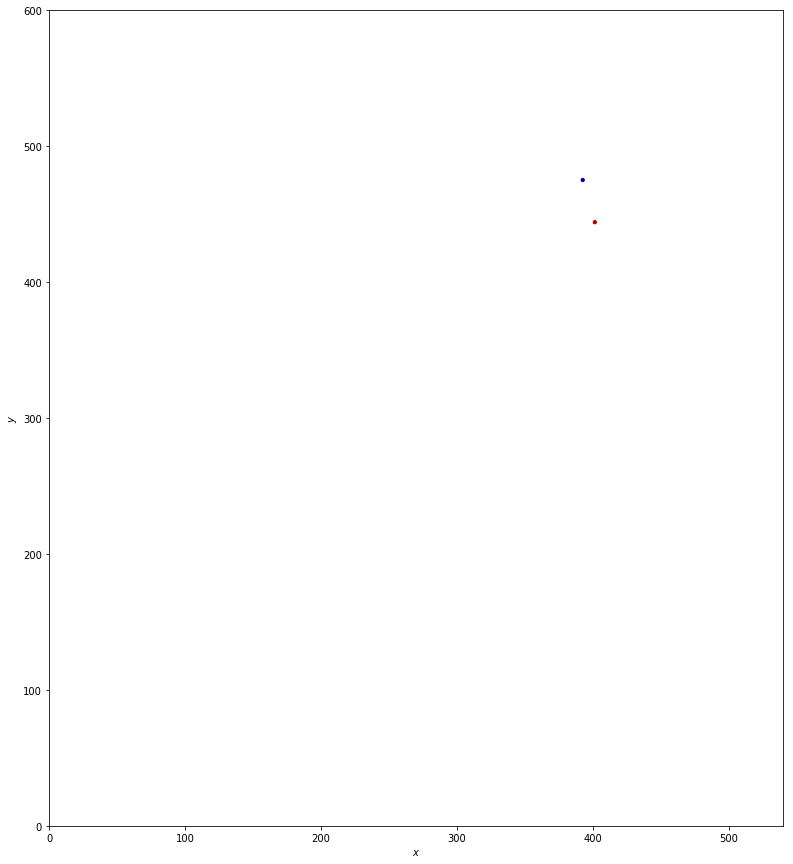

angle 0.0
move (-0.98272009431566876, 0.18509785581741081)
364.175424874 459.408615423
212


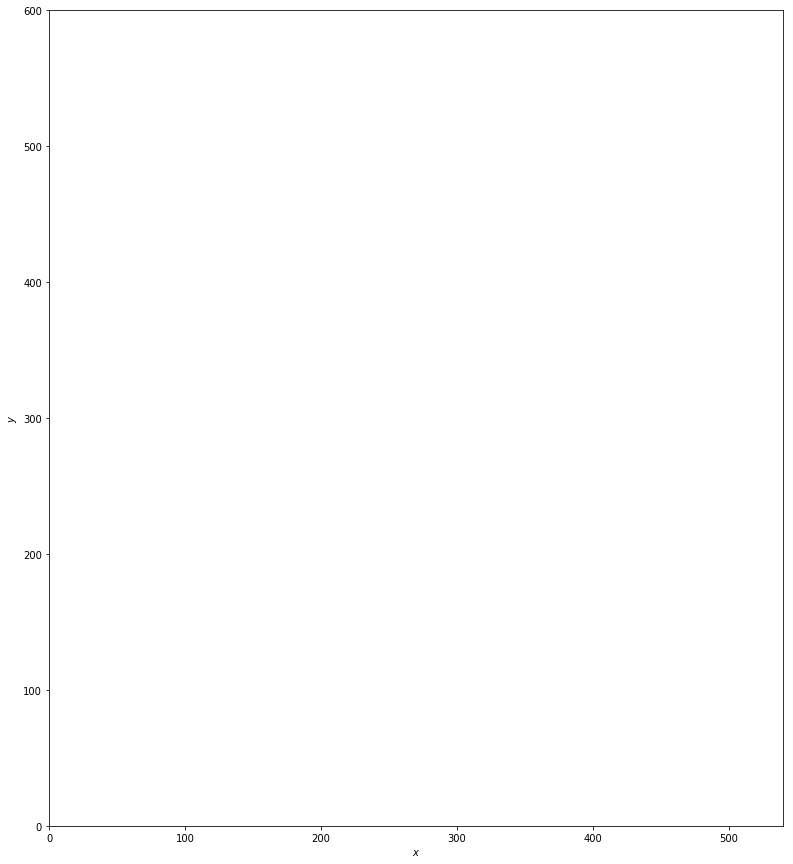

angle 169.333162343
move (1.0, 0.0)
365.175424874 459.408615423
213
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


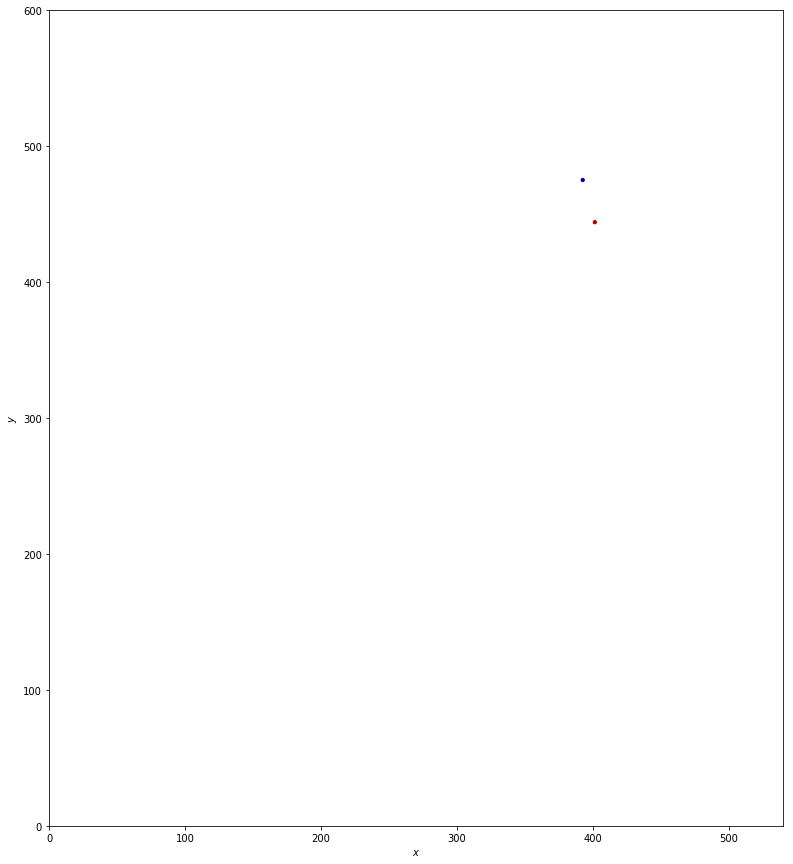

angle 0.0
move (-0.98080699895868606, 0.19498110368355182)
364.194617875 459.603596527
214


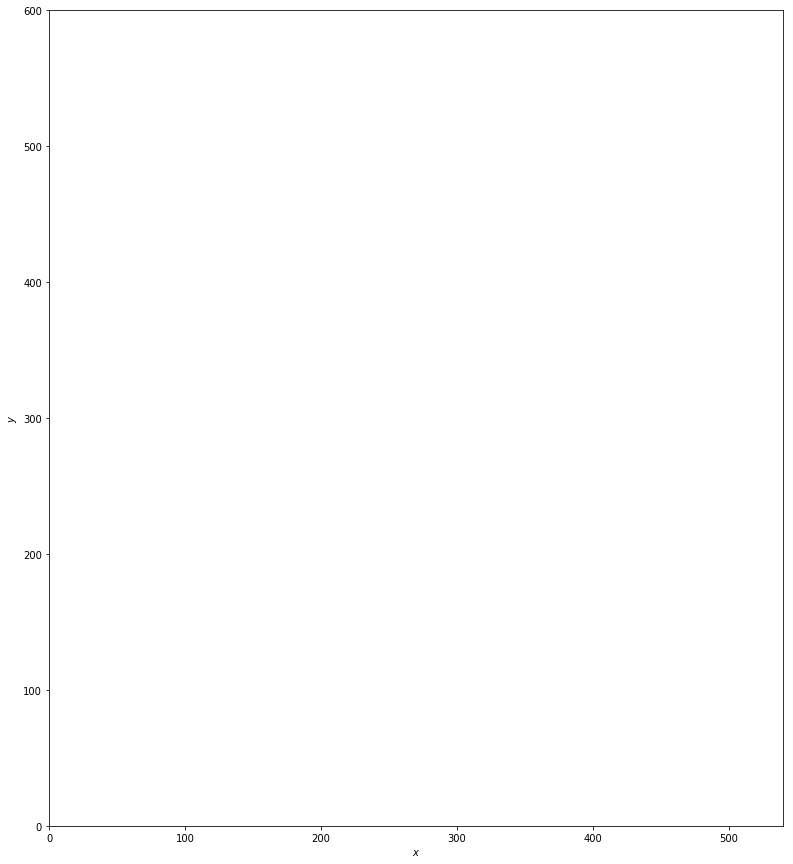

angle 168.756380275
move (1.0, 0.0)
365.194617875 459.603596527
215
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


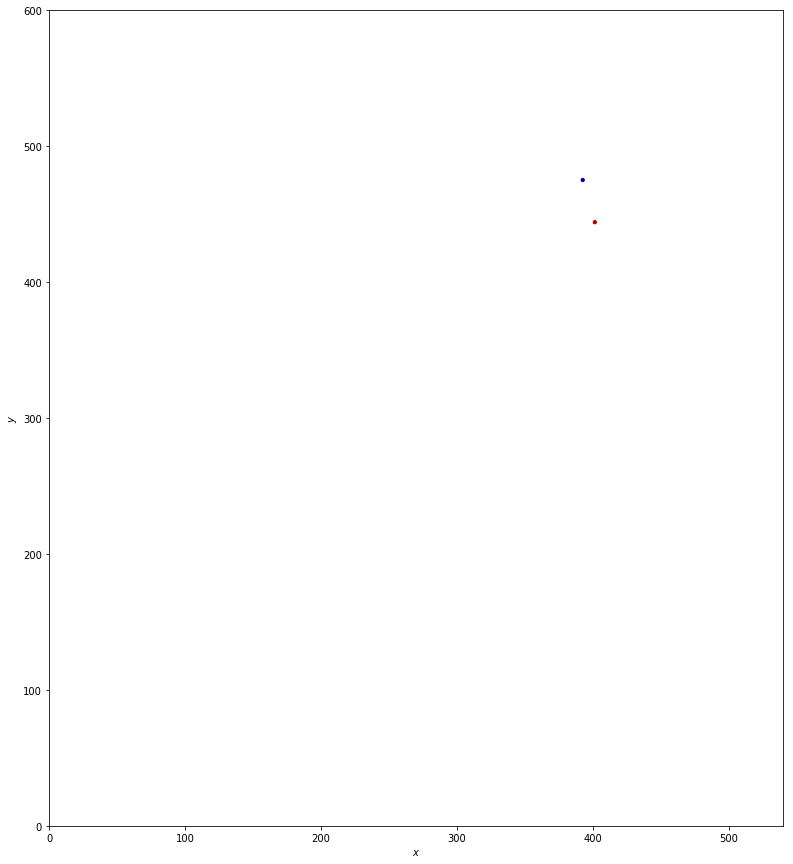

angle 0.0
move (-0.97868203447553592, 0.20538129270901451)
364.215935841 459.80897782
216


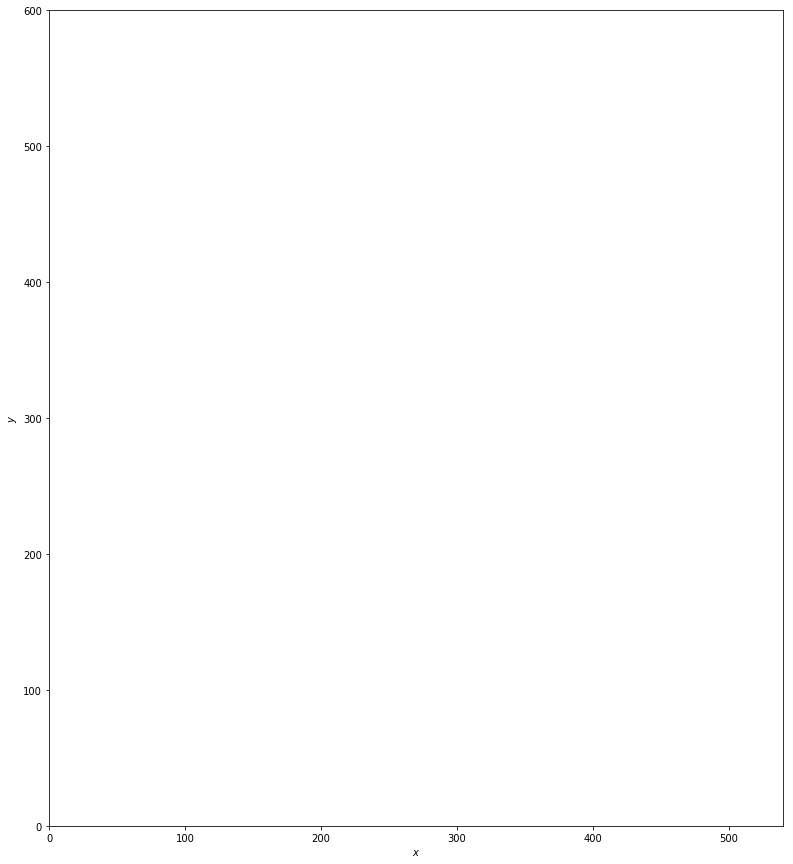

angle 168.148179534
move (1.0, 0.0)
365.215935841 459.80897782
217
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


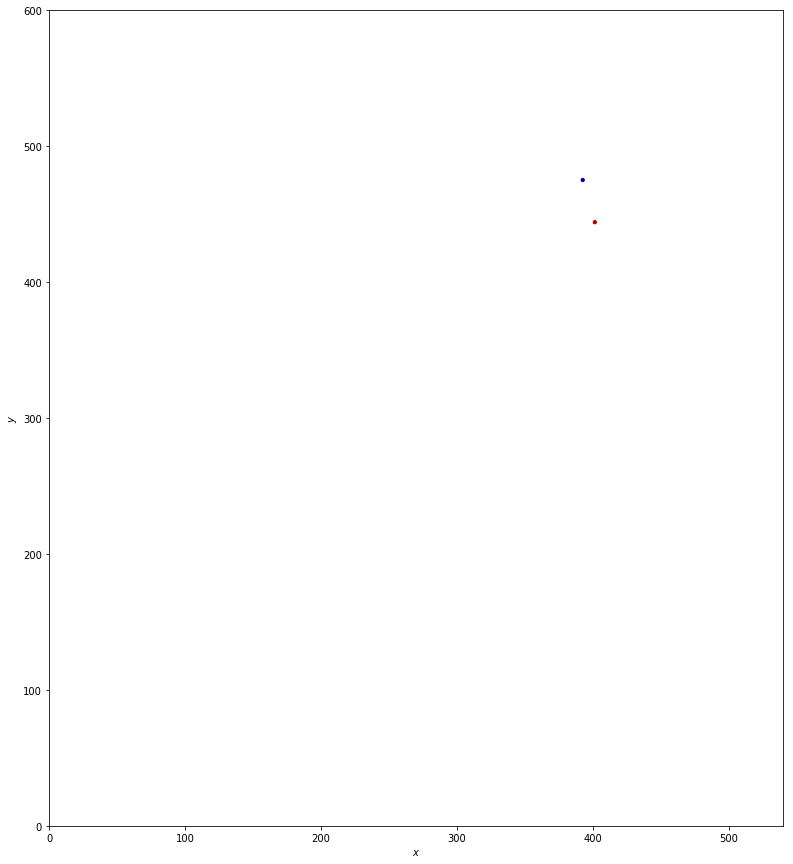

angle 0.0
move (-0.97632177333754877, 0.21632335728493143)
364.239614067 460.025301177
218


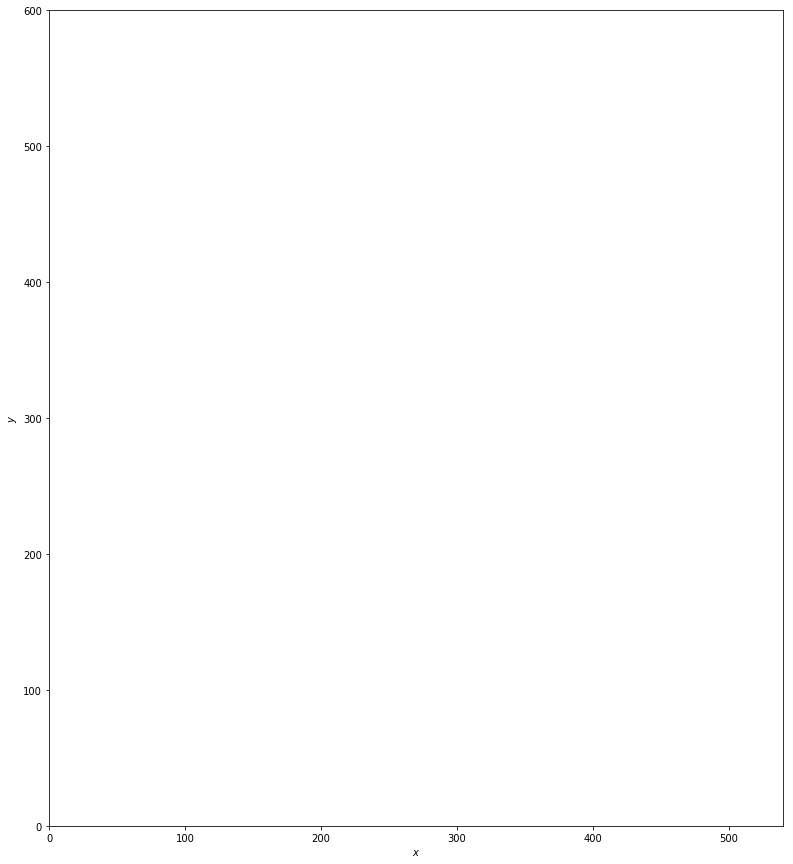

angle 167.506822652
move (1.0, 0.0)
365.239614067 460.025301177
219
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


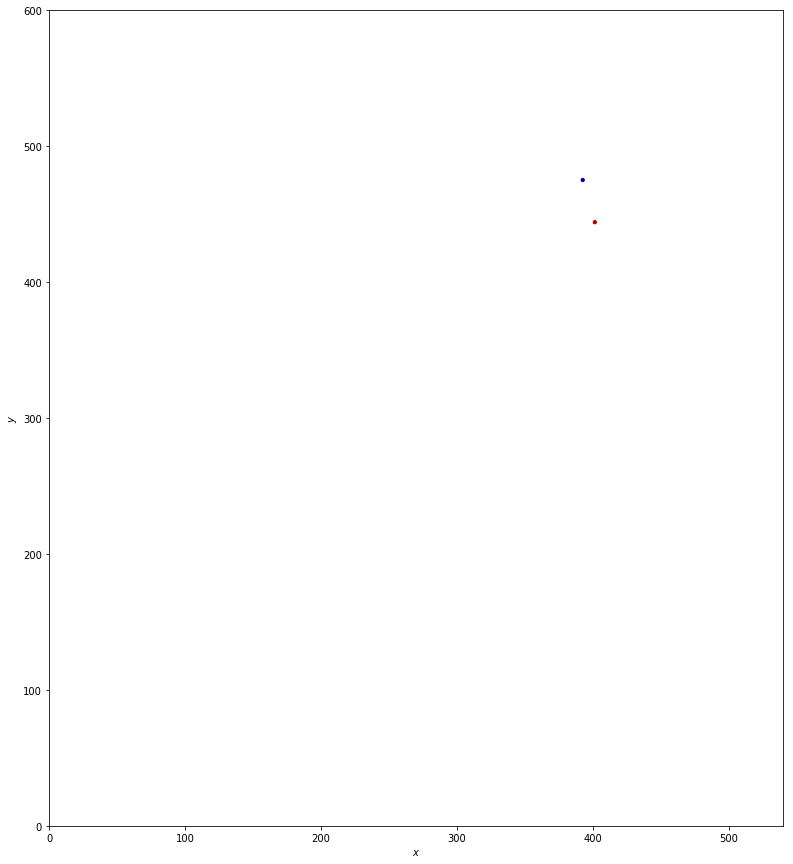

angle 0.0
move (-0.97370021436670418, 0.22783303654701681)
364.265913853 460.253134213
220


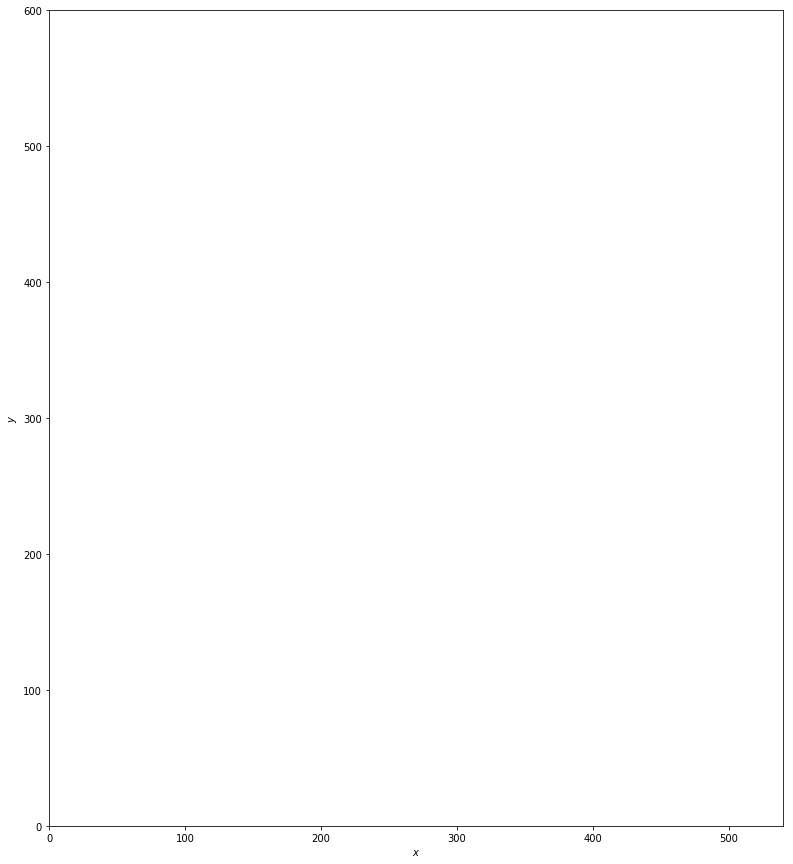

angle 166.830472958
move (1.0, 0.0)
365.265913853 460.253134213
221
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


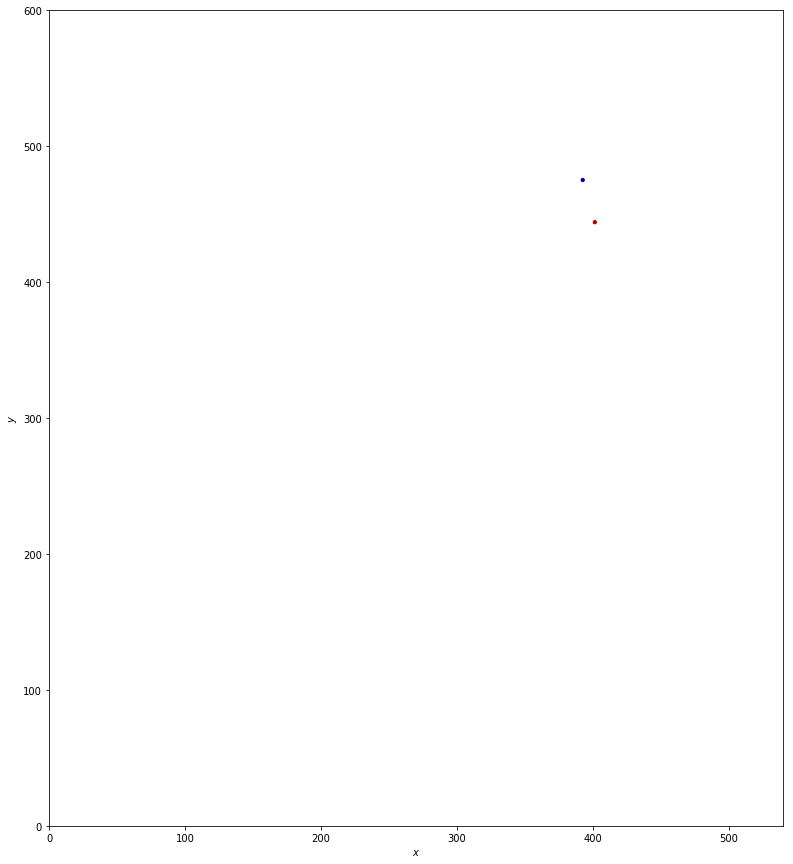

angle 0.0
move (-0.9707885052513342, 0.23993682100061292)
364.295125348 460.493071034
222


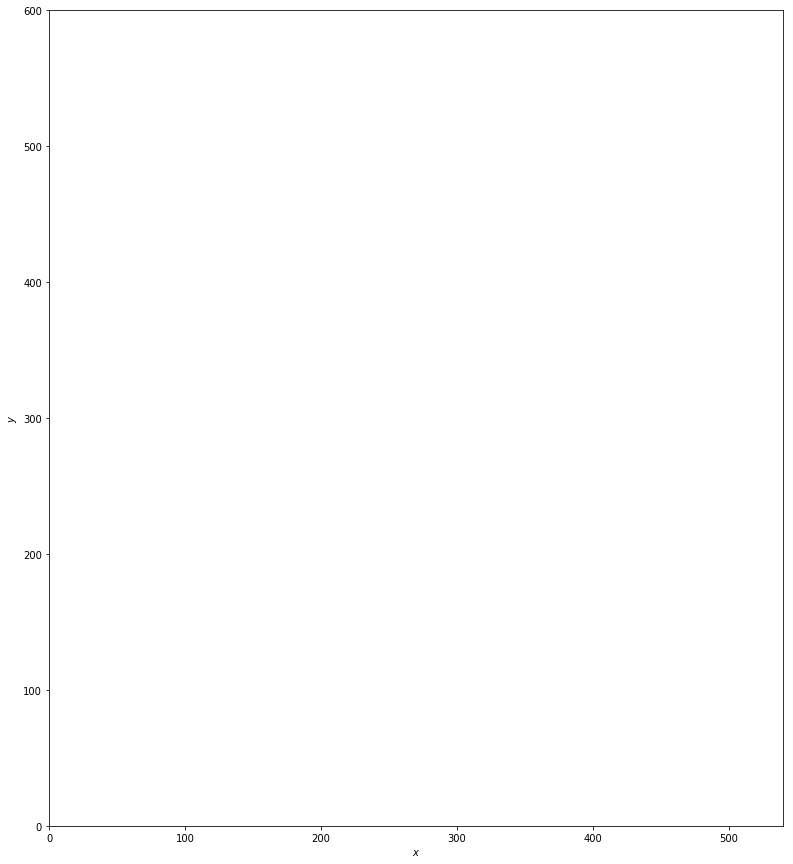

angle 166.117188482
move (1.0, 0.0)
365.295125348 460.493071034
223
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


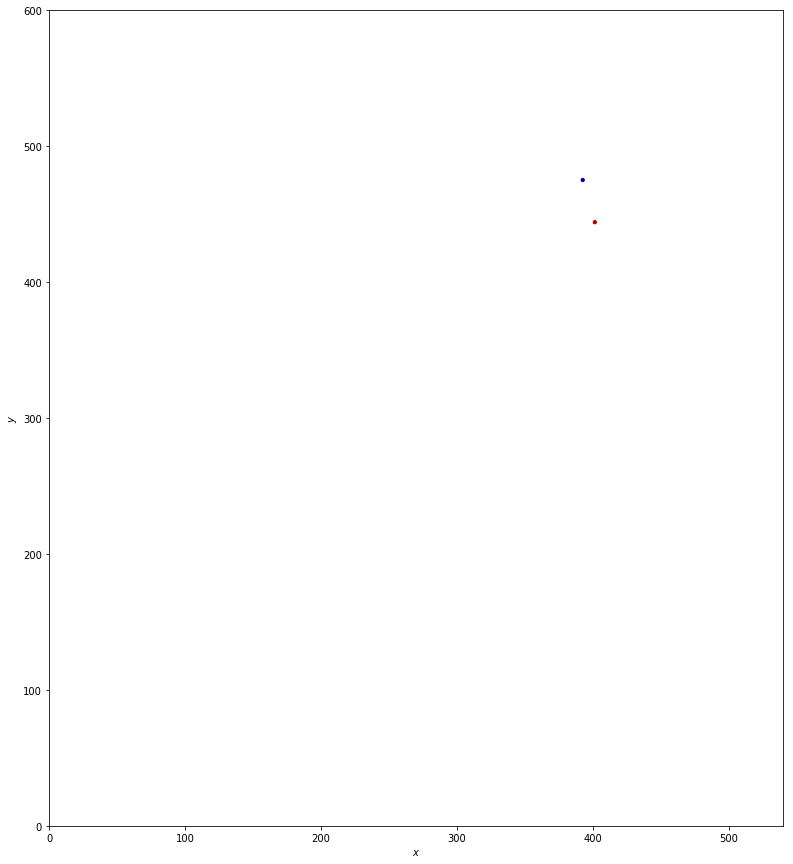

angle 0.0
move (-0.96755463656313168, 0.25266187932726653)
364.327570711 460.745732914
224


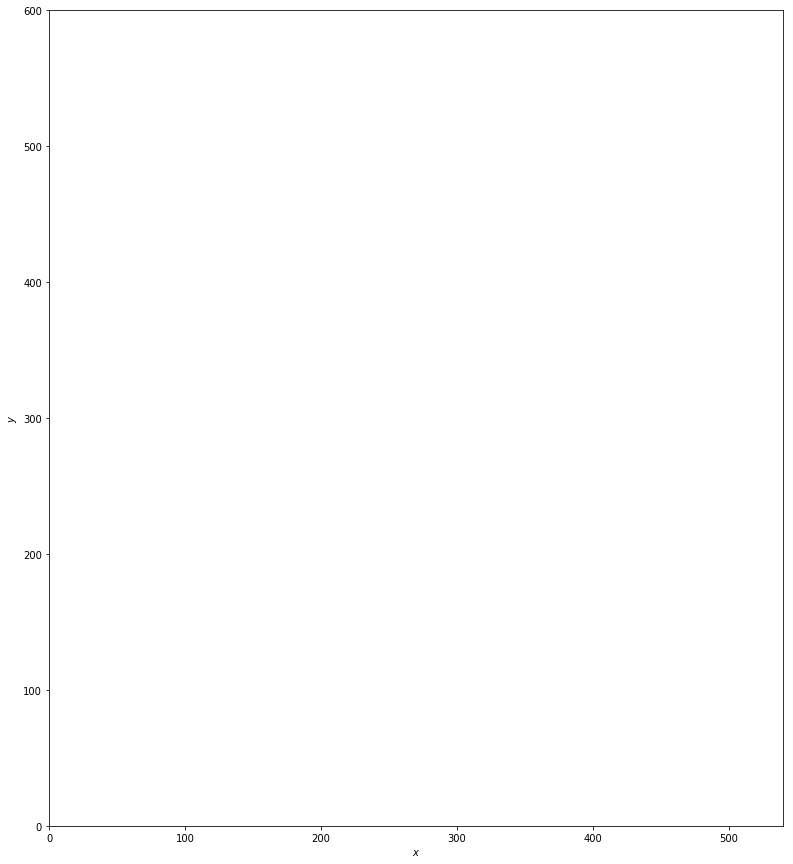

angle 165.364915423
move (1.0, 0.0)
365.327570711 460.745732914
225
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


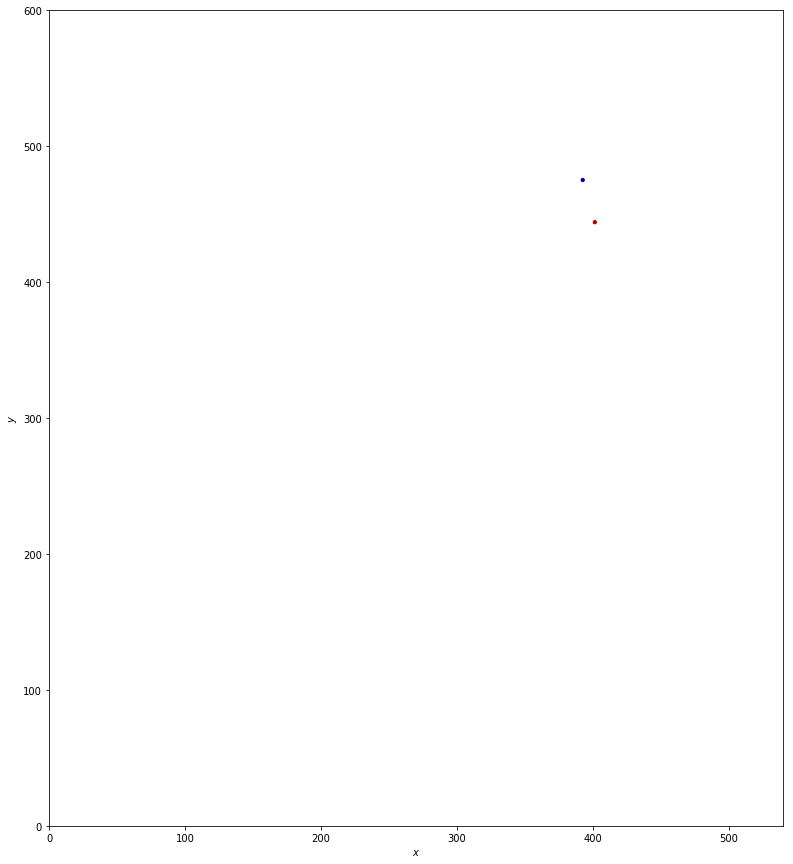

angle 0.0
move (-0.96396310470861424, 0.26603596140471181)
364.363607606 461.011768875
226
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (311.5797, 380.8201)


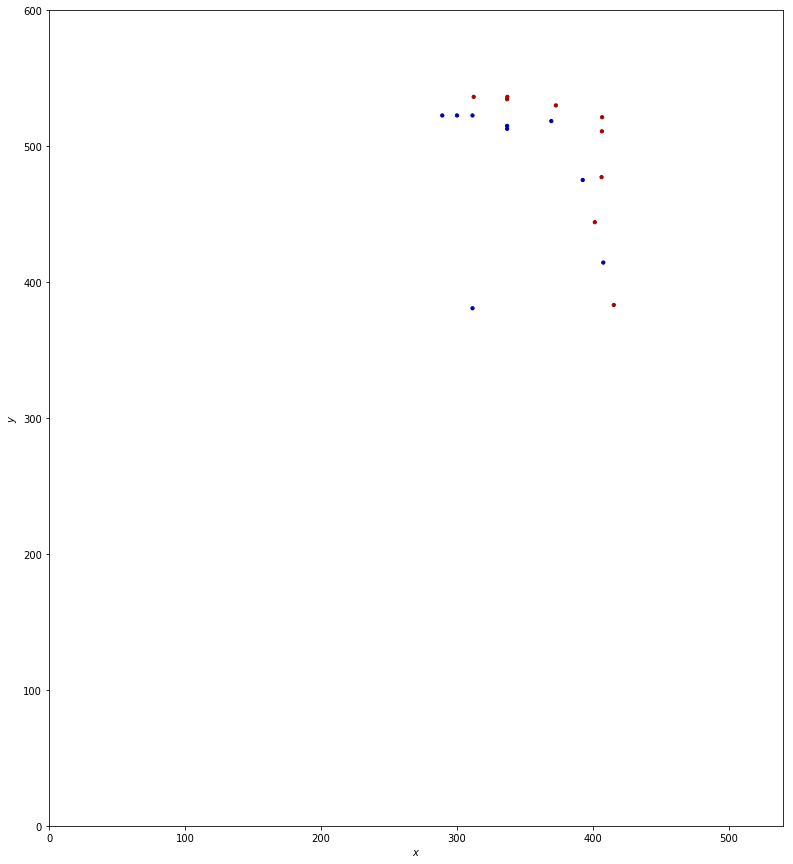

angle 164.571481124
move (-0.18190286642654641, -0.98331650407475923)
364.18170474 460.028452371
227
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (311.5797, 380.8201)


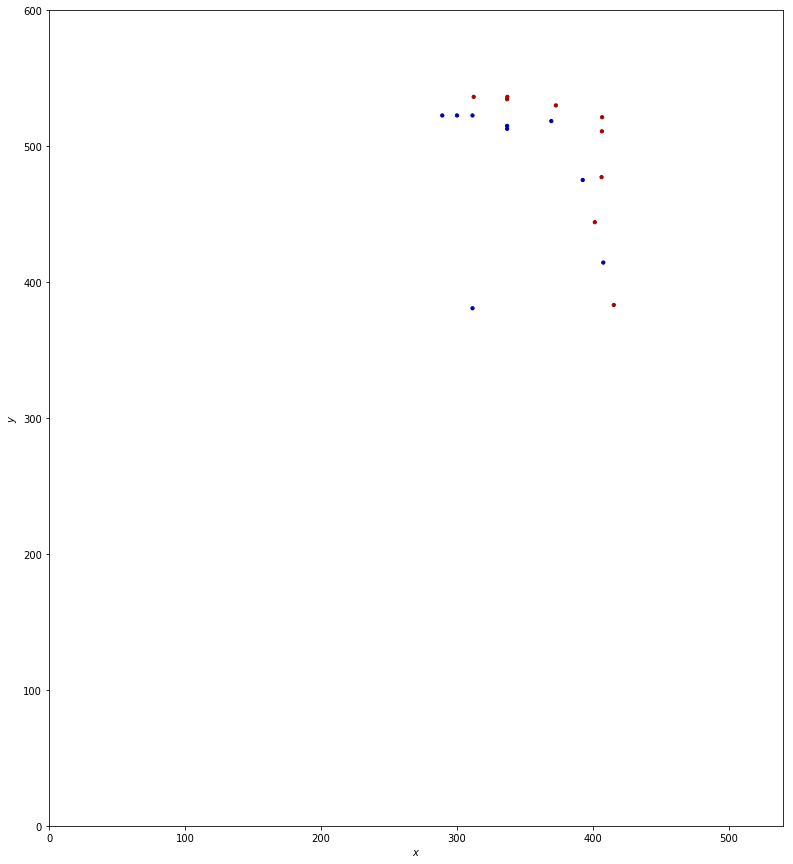

angle -100.480616051
move (-0.17613959300847259, -0.98436519837650172)
364.005565147 459.044087173
228
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)


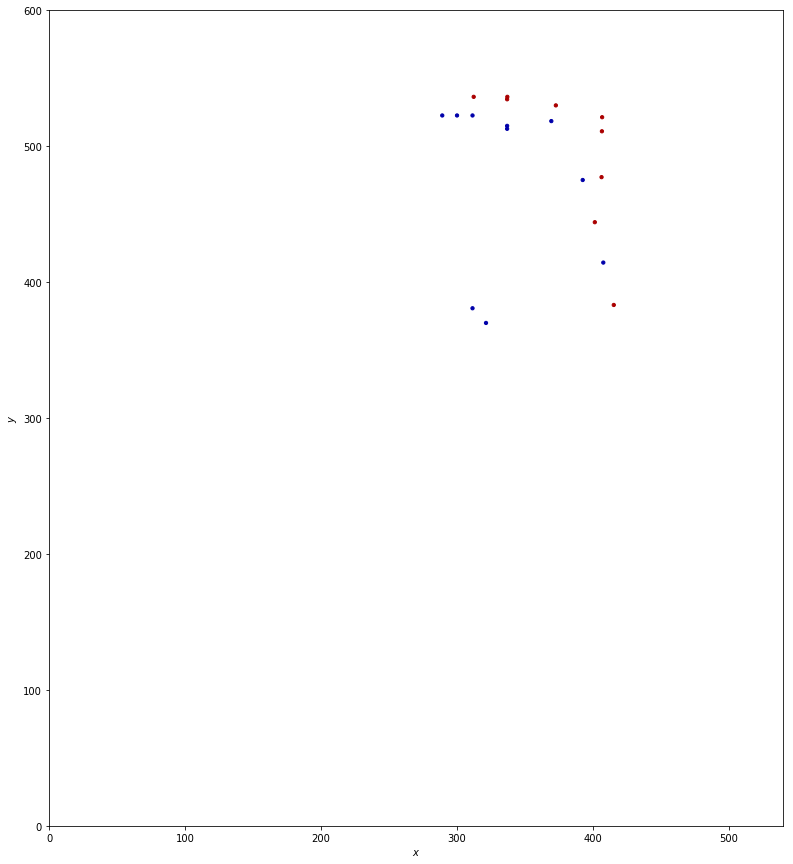

angle -100.144982194
move (-0.01976868840910696, -0.99980458038487885)
363.985796459 458.044282592
229
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)


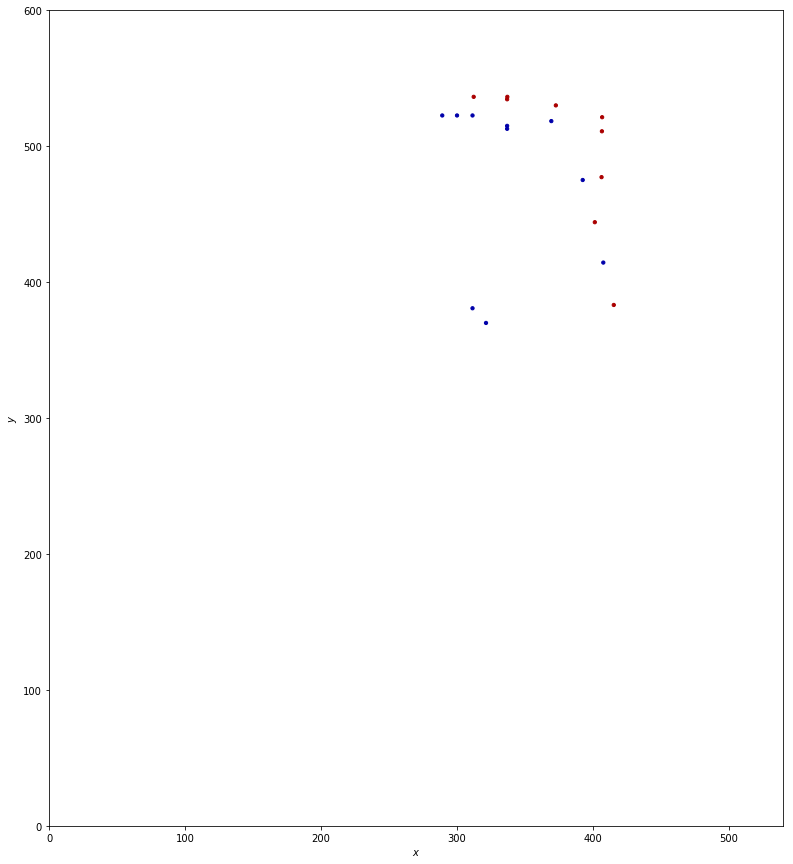

angle -91.1327361996
move (-0.010785469166858854, -0.99994183513584967)
363.975010989 457.044340757
230
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (289.3184, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)


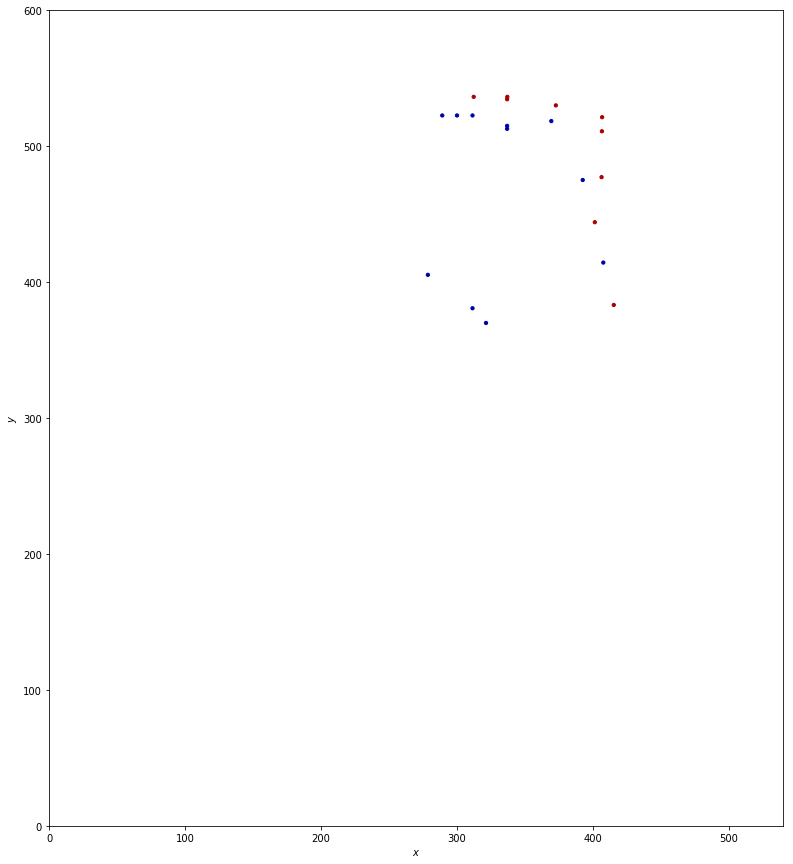

angle -90.6179738448
move (0.069148687685949159, -0.99760636475080244)
364.044159677 456.046734392
231
yes 1 (401.5797, 444.1501)


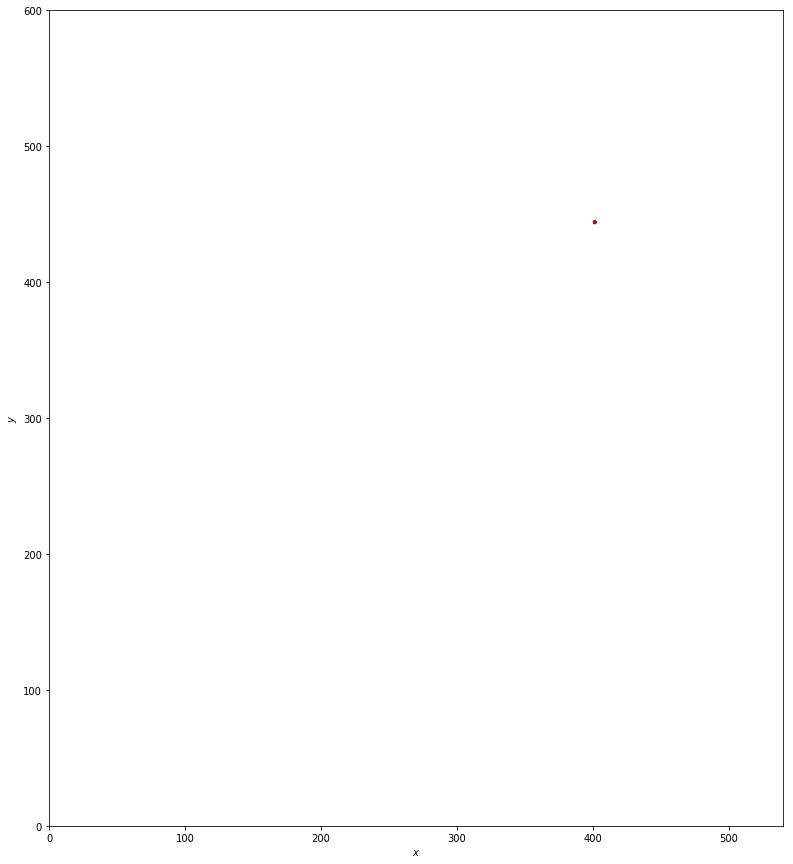

angle -86.0349078702
move (-0.30213128300755432, -0.95326632576012515)
363.742028394 455.093468067
232
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)


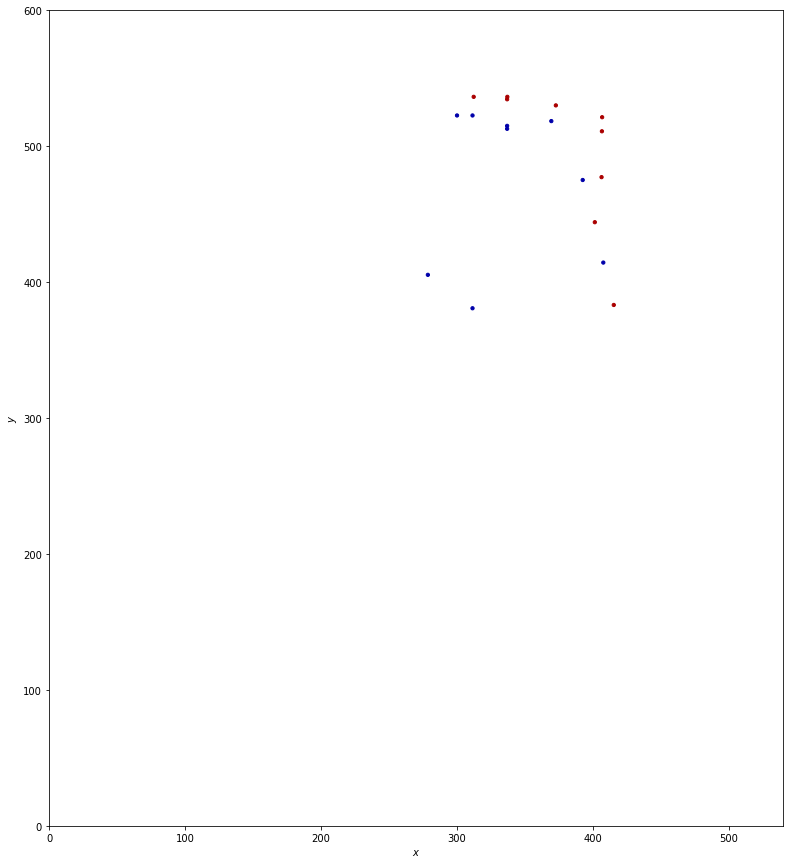

angle -107.585657986
move (0.059635447463869937, -0.99822022289962853)
363.801663842 454.095247844
233
yes 1 (401.5797, 444.1501)


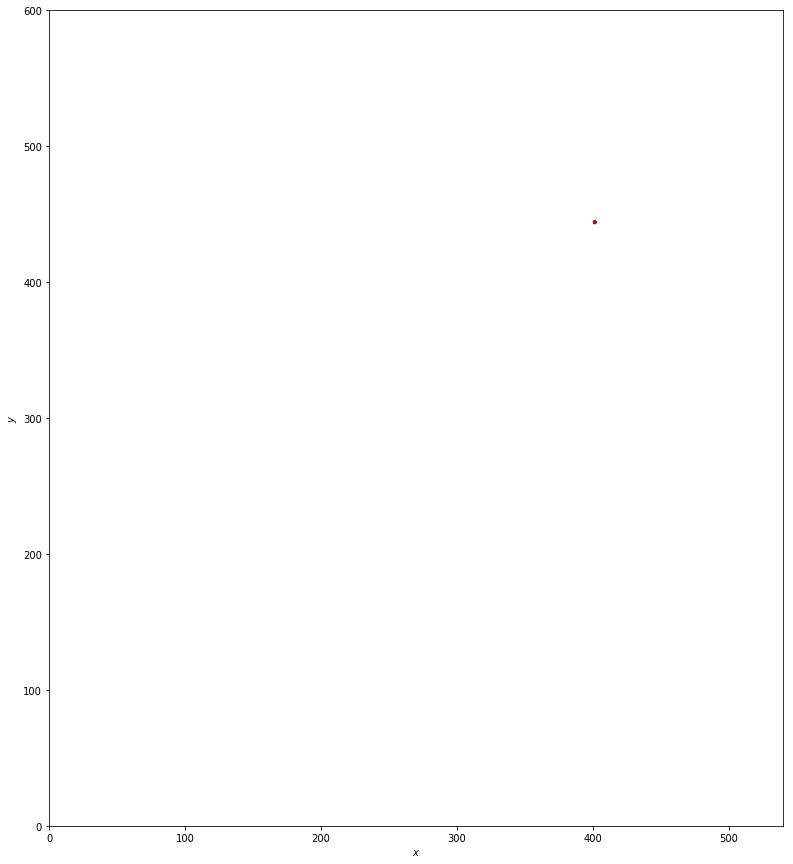

angle -86.581112024
move (-0.25457851109846341, -0.96705210908559092)
363.54708533 453.128195735
234
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


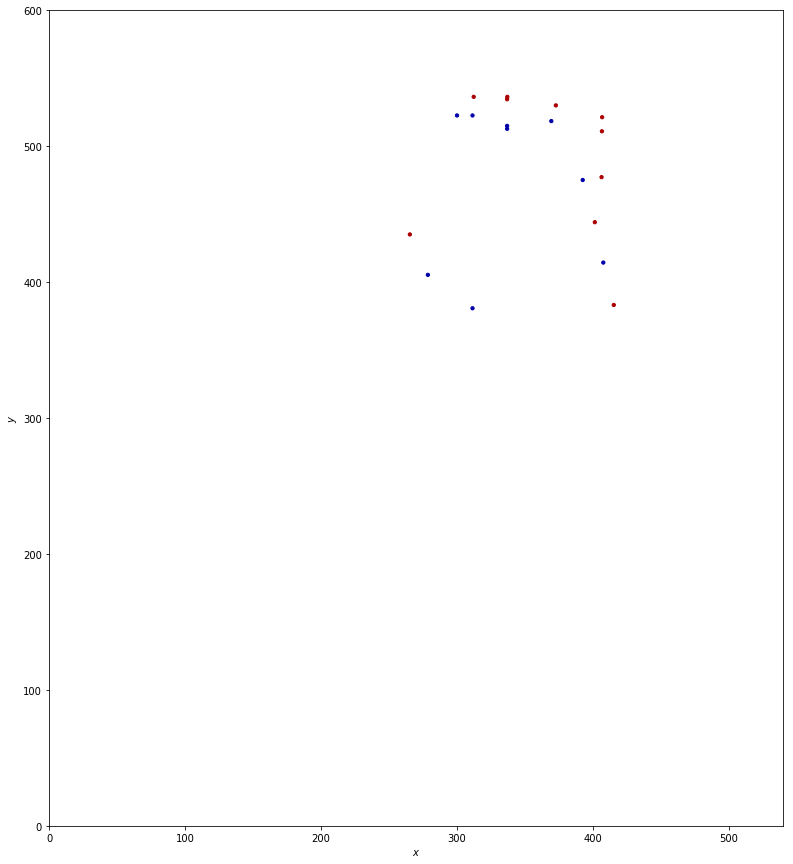

angle -104.748611397
move (0.063691817913265725, -0.99796961493369296)
363.610777148 452.13022612
235
yes 1 (401.5797, 444.1501)


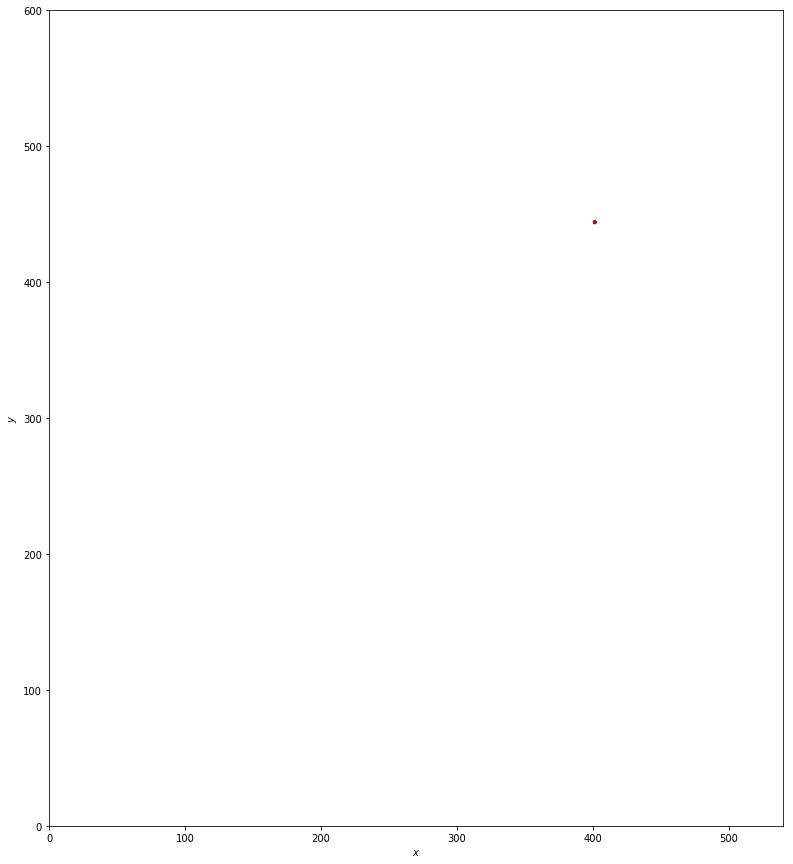

angle -86.3482558271
move (-0.20568144776698574, -0.97861899738584512)
363.405095701 451.151607122
236
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (312.4497, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


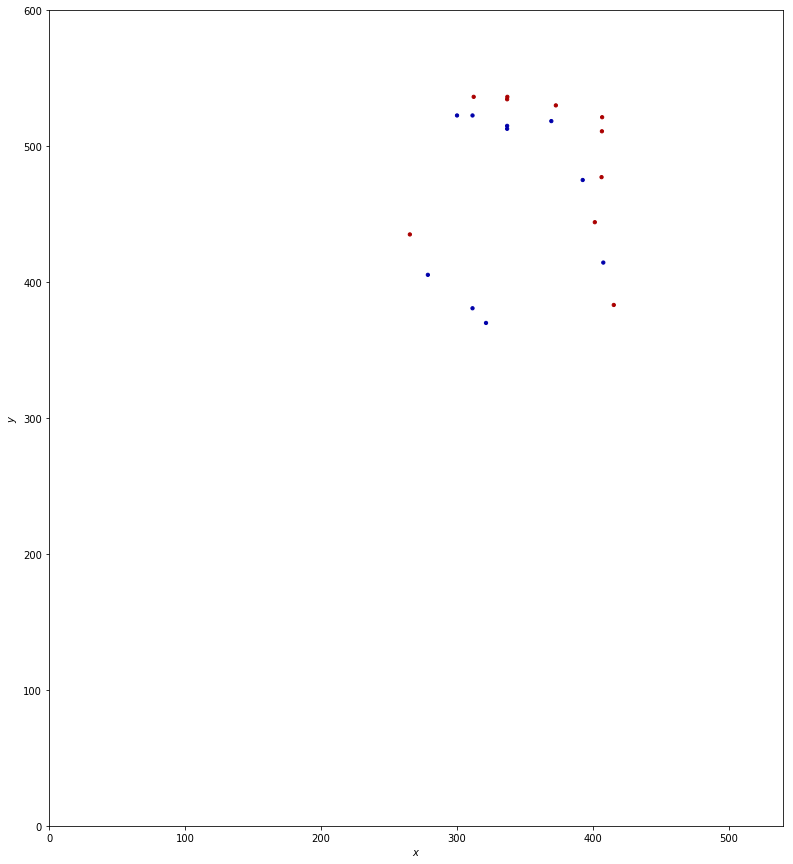

angle -101.869393254
move (0.25038873015071872, -0.96814538361421243)
363.655484431 450.183461739
237
yes 1 (401.5797, 444.1501)


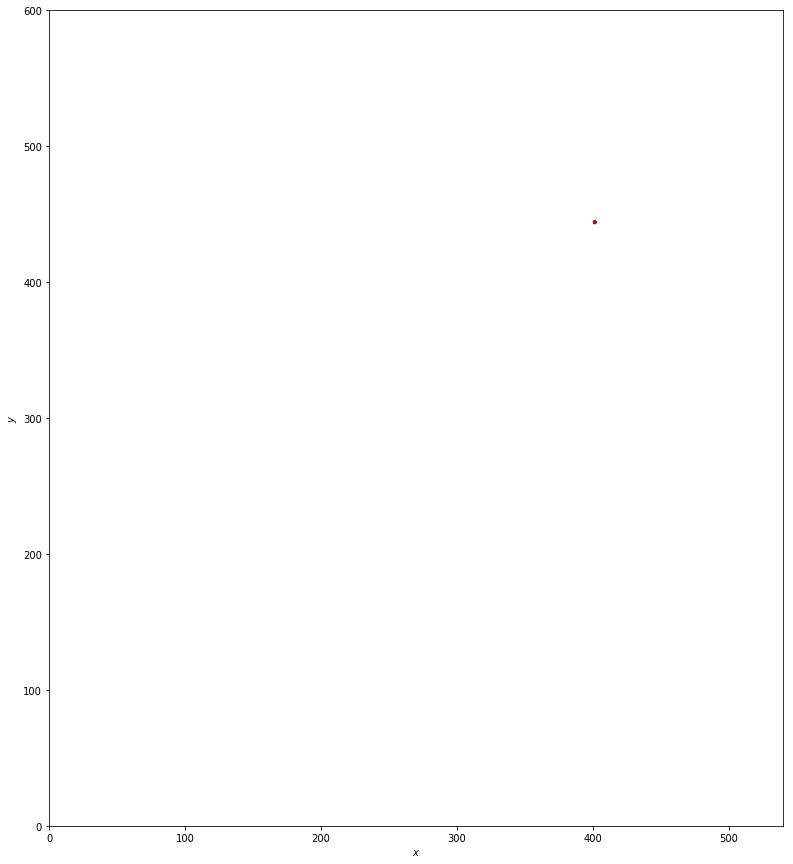

angle -75.4994835818
move (-0.1571141295085634, -0.98758045257526561)
363.498370301 449.195881286
238
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


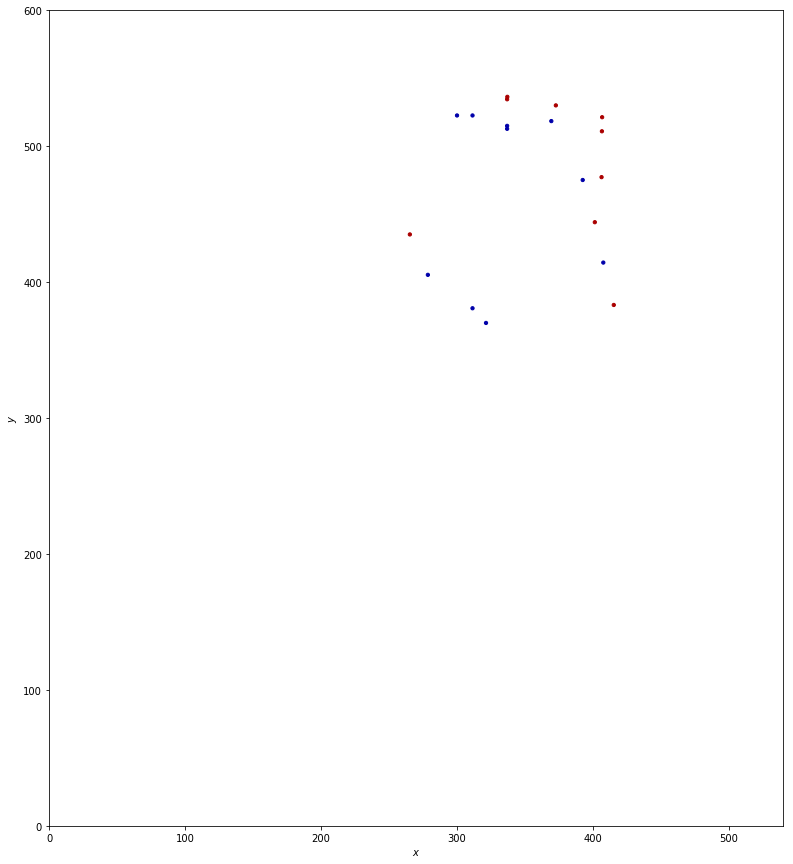

angle -99.0394294732
move (0.13303412689884139, -0.99111145744576223)
363.631404428 448.204769829
239
yes 1 (401.5797, 444.1501)


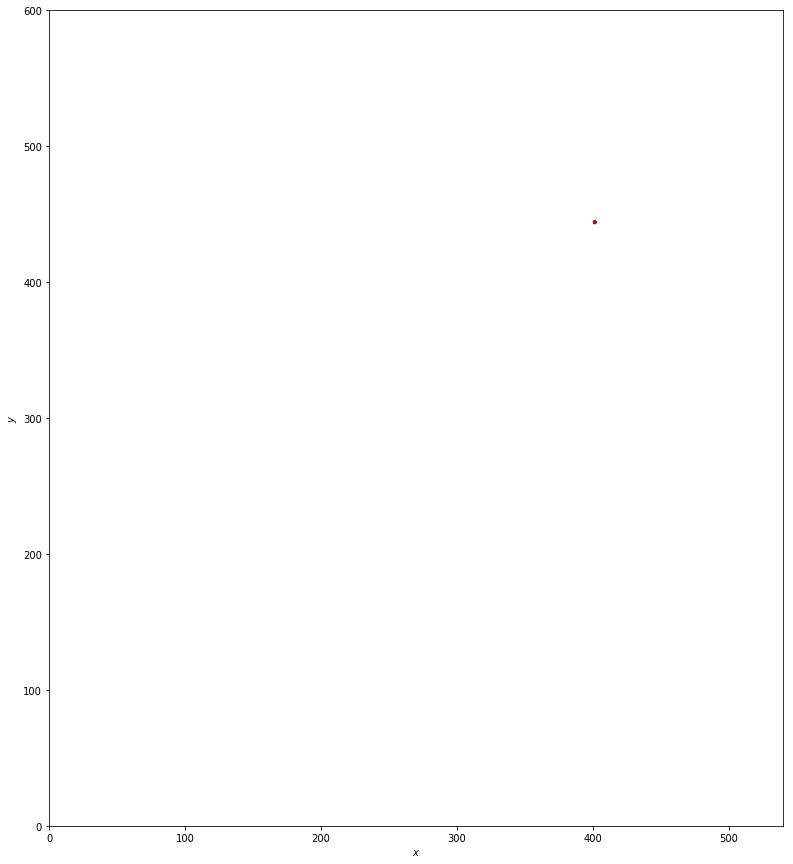

angle -82.3550417011
move (-0.10624248998501726, -0.99434025027743067)
363.525161938 447.210429578
240
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (300.1797, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


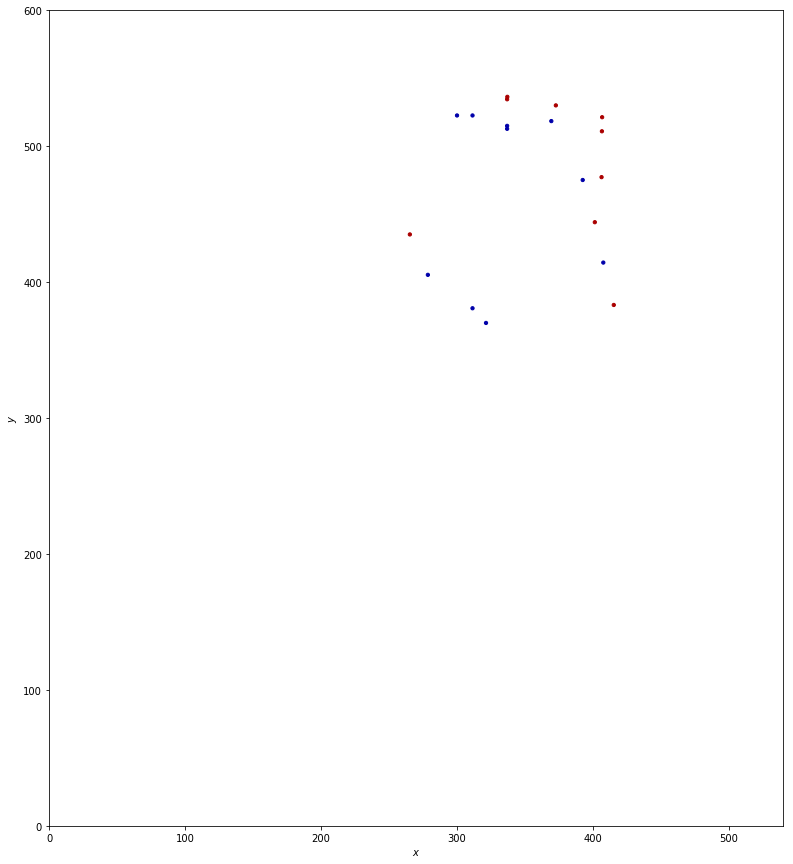

angle -96.09875644
move (0.16712858208638809, -0.98593510793043238)
363.69229052 446.22449447
241
yes 1 (401.5797, 444.1501)


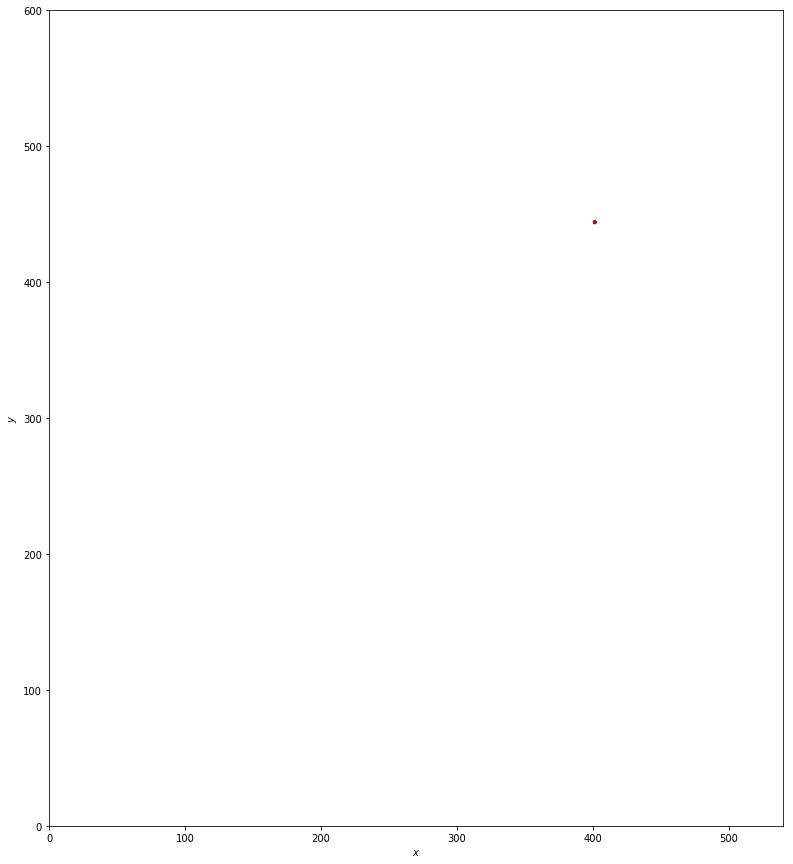

angle -80.3790894851
move (-0.054669670800678874, -0.99850449528008911)
363.637620849 445.225989975
242
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)


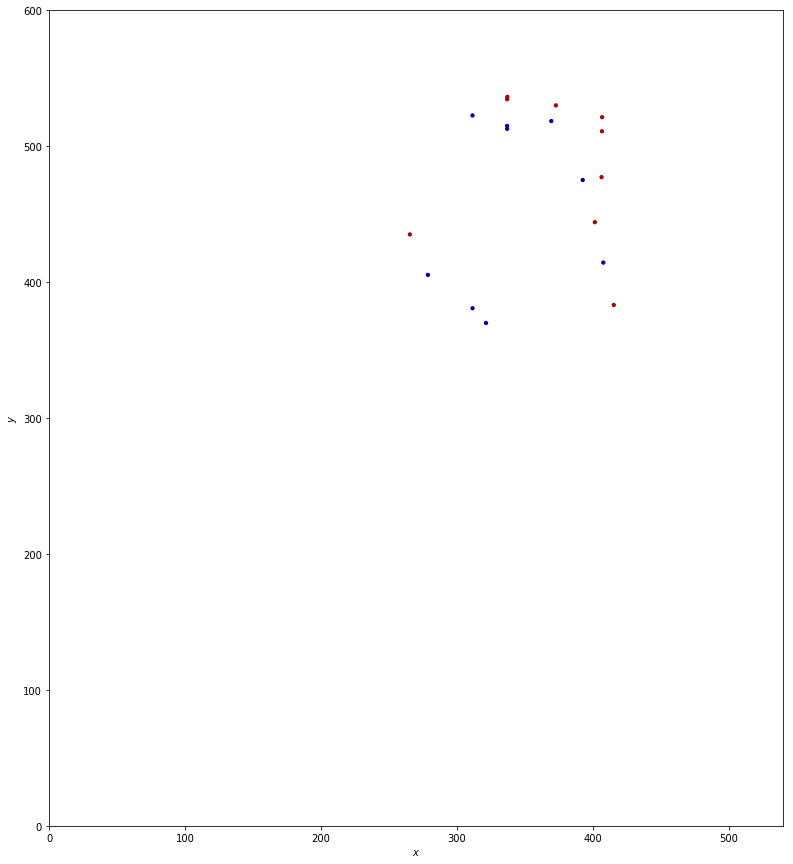

angle -93.133903816
move (0.34160263460576662, -0.93984447651215097)
363.979223484 444.286145499
243
yes 1 (401.5797, 444.1501)


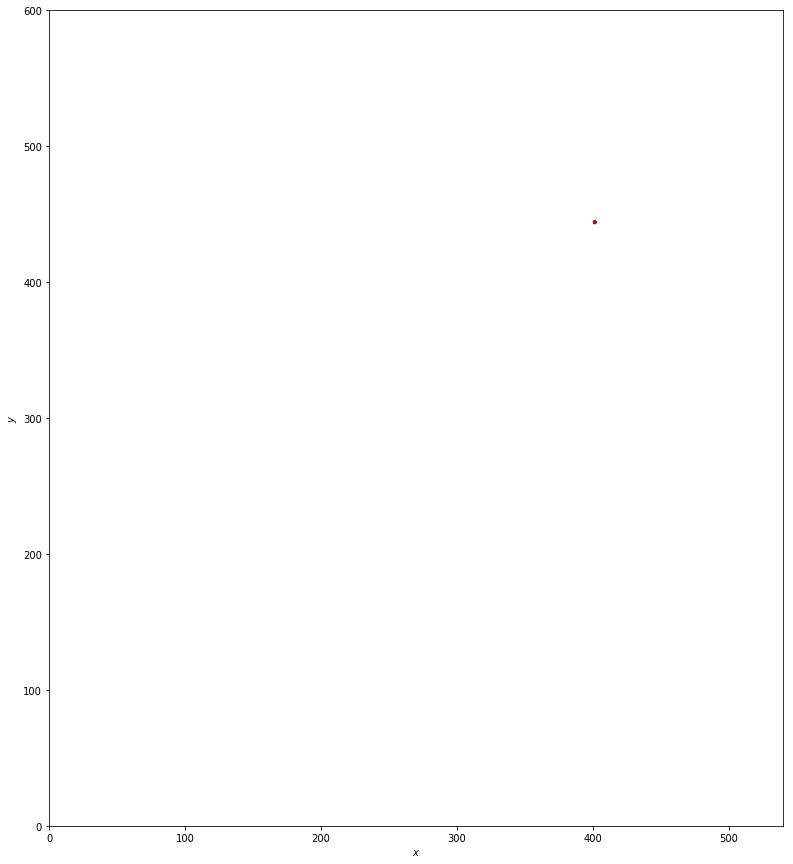

angle -70.0254546582
move (-0.0036181618103670321, -0.99999345443113474)
363.975605322 443.286152044
244
yes 1 (337.0497, 534.6002)
yes -1 (337.0497, 515.0402)
yes 1 (337.1997, 536.4001)
yes 1 (406.9497, 521.4001)
yes 1 (406.7997, 511.0502)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (415.5297, 383.2502)
yes -1 (407.8197, 414.4502)
yes -1 (392.6697, 475.2002)
yes -1 (369.5697, 518.5502)
yes 1 (372.8997, 530.1002)
yes -1 (337.0497, 512.8801)
yes -1 (311.5797, 522.6902)
yes -1 (321.5097, 370.0201)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (265.4697, 435.1501)


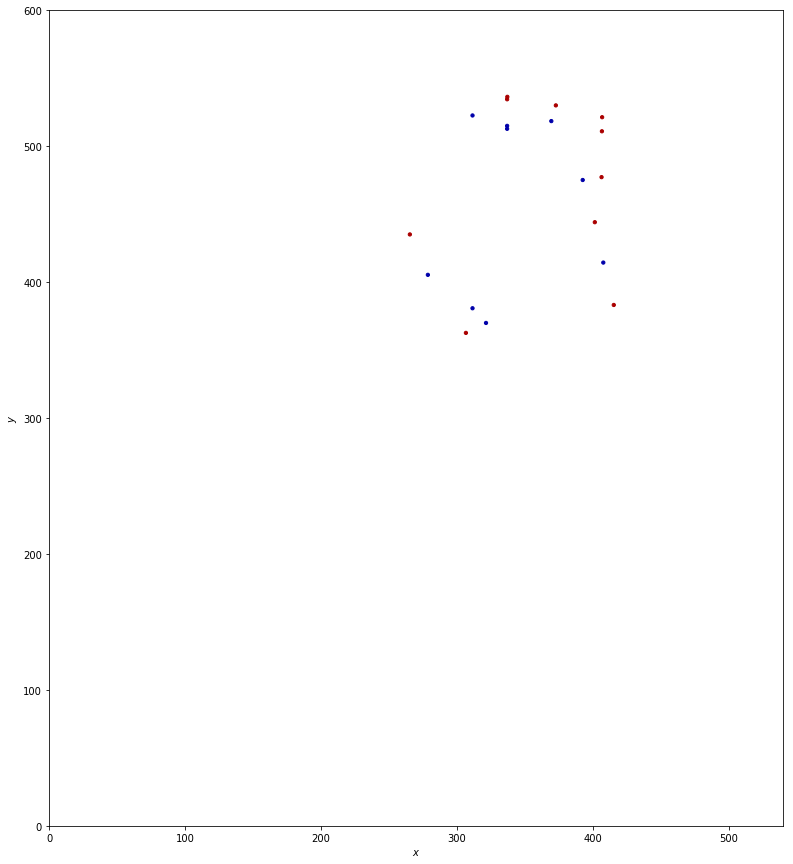

angle -90.2073058536
move (0.27404509254611759, -0.96171684359347154)
364.249650415 442.324435201
245
yes 1 (401.5797, 444.1501)


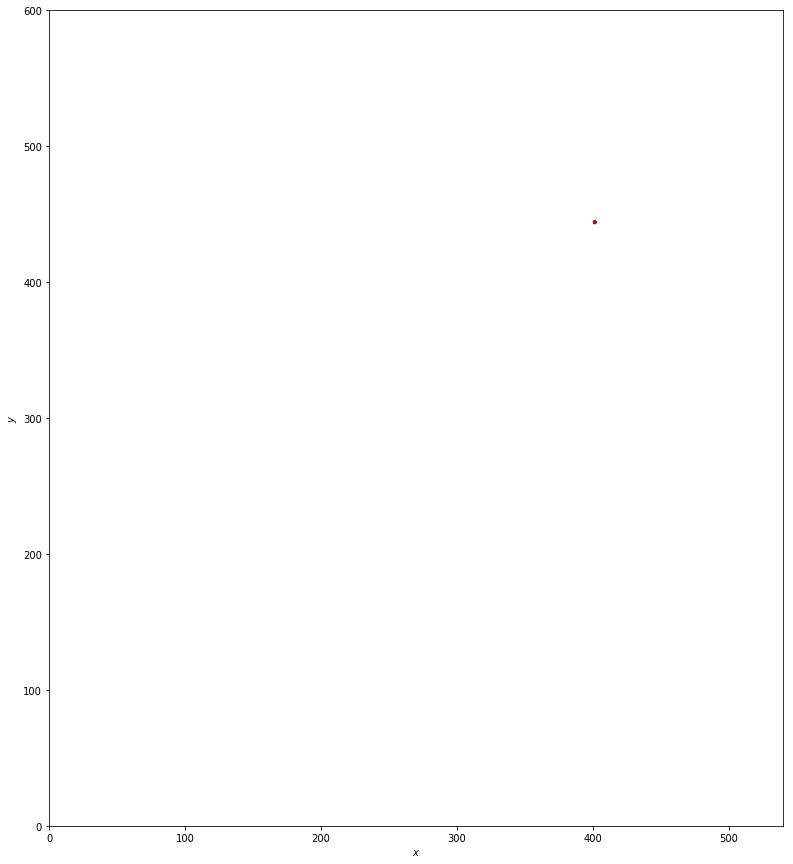

angle -74.0948839964
move (0.048847655317280893, -0.99880624075443392)
364.29849807 441.32562896
246


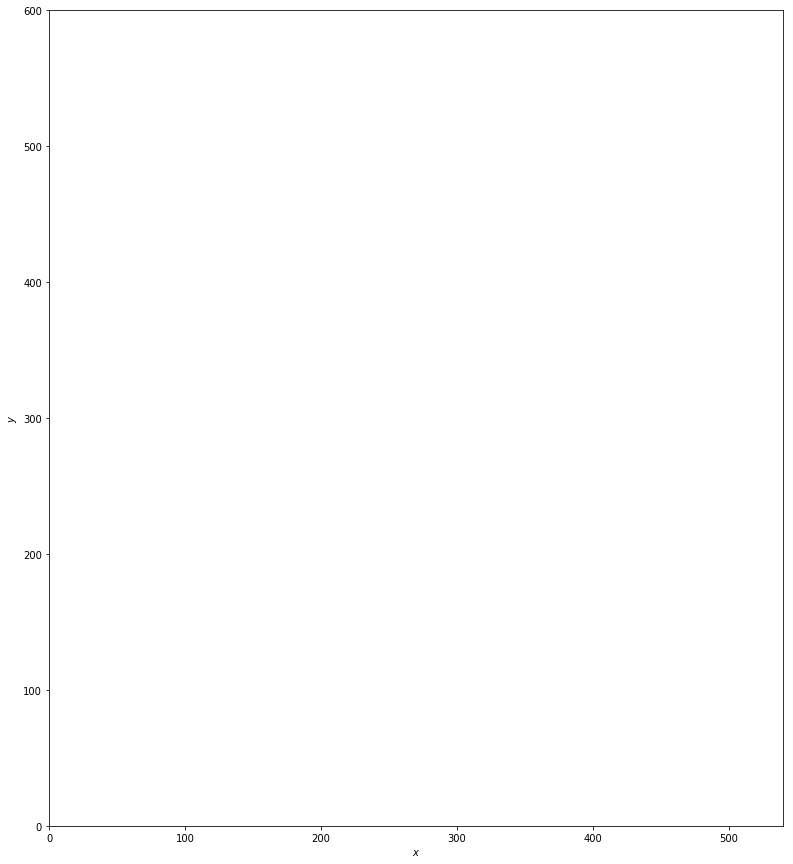

angle -87.2001212955
move (1.0, 0.0)
365.29849807 441.32562896
247
yes 1 (401.5797, 444.1501)


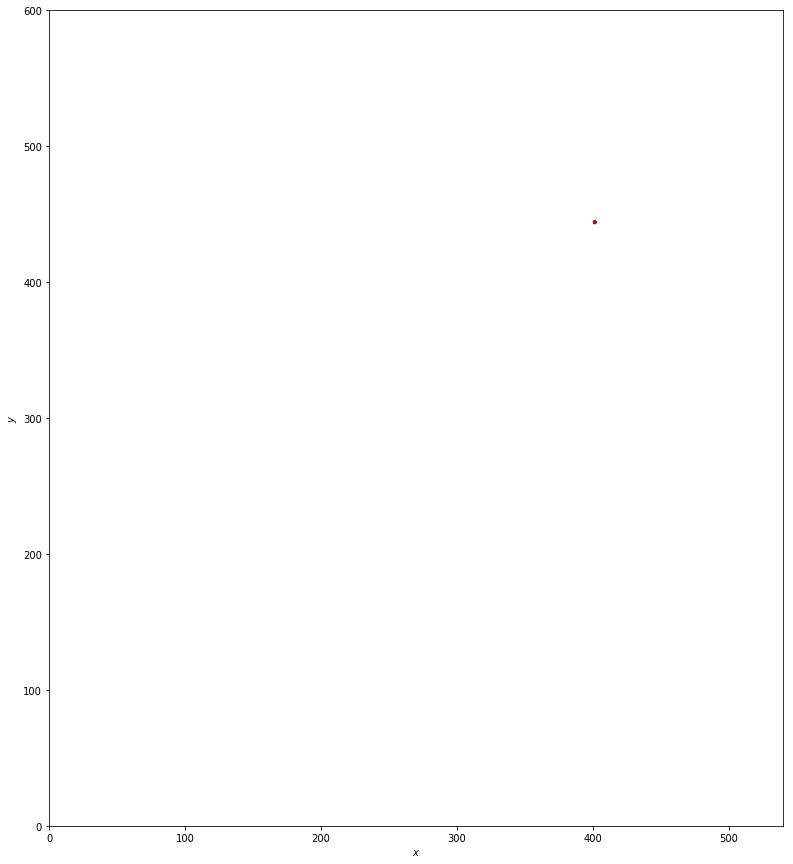

angle 0.0
move (0.077614596445742146, -0.99698343738427497)
365.376112667 440.328645523
248


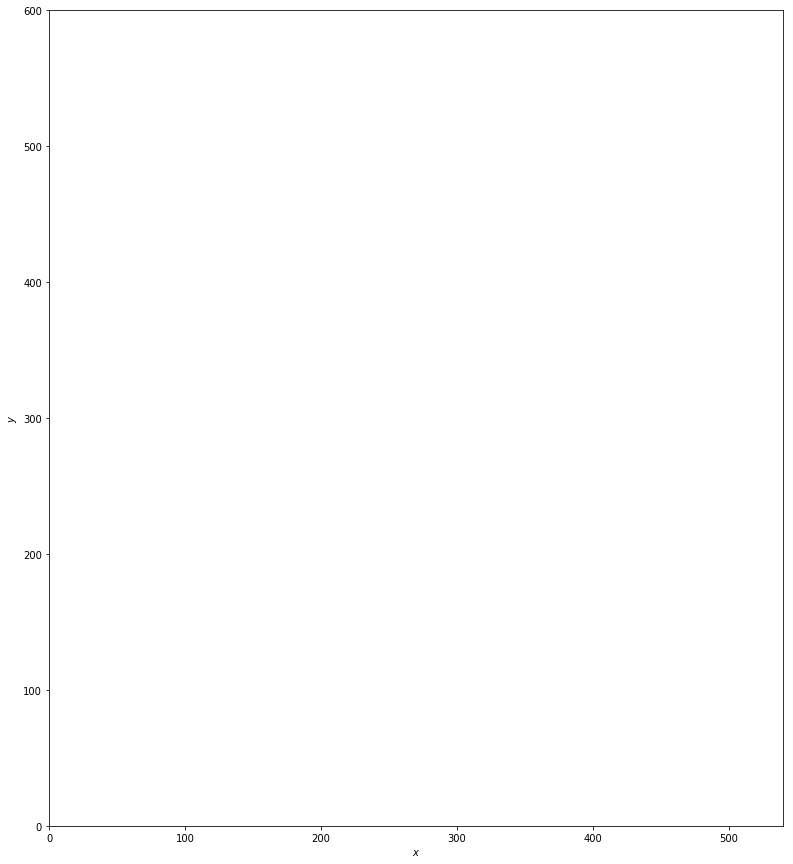

angle -85.5485342525
move (1.0, 0.0)
366.376112667 440.328645523
249
yes 1 (401.5797, 444.1501)


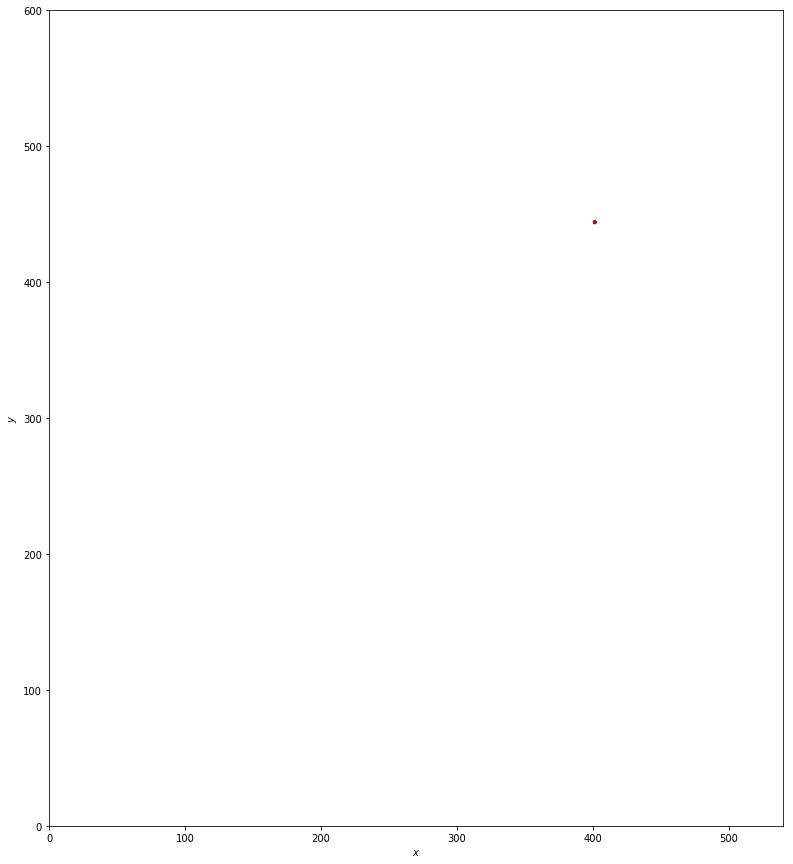

angle 0.0
move (0.107919001619114, -0.99415968993393289)
366.484031668 439.334485833
250


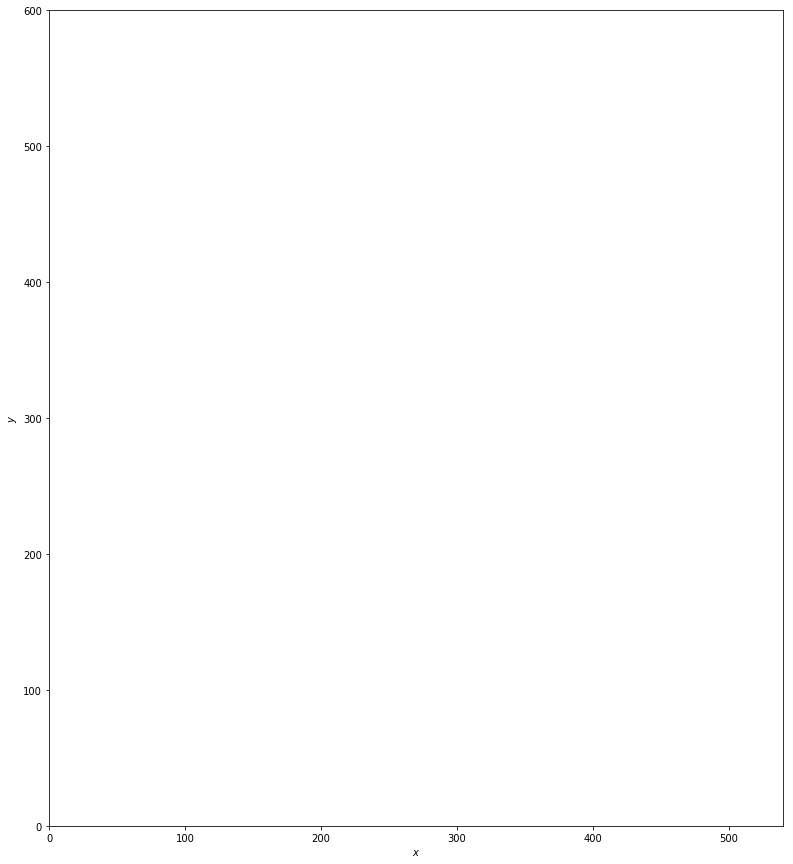

angle -83.8046310168
move (1.0, 0.0)
367.484031668 439.334485833
251
yes 1 (401.5797, 444.1501)


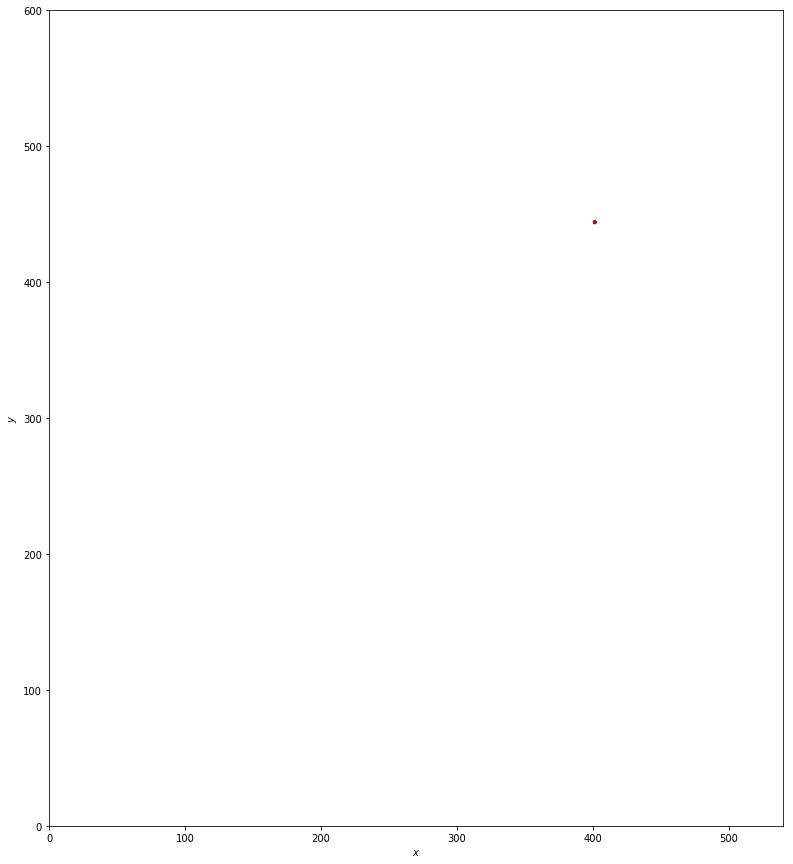

angle 0.0
move (0.13985030107652696, -0.99017265832217605)
367.623881969 438.344313174
252


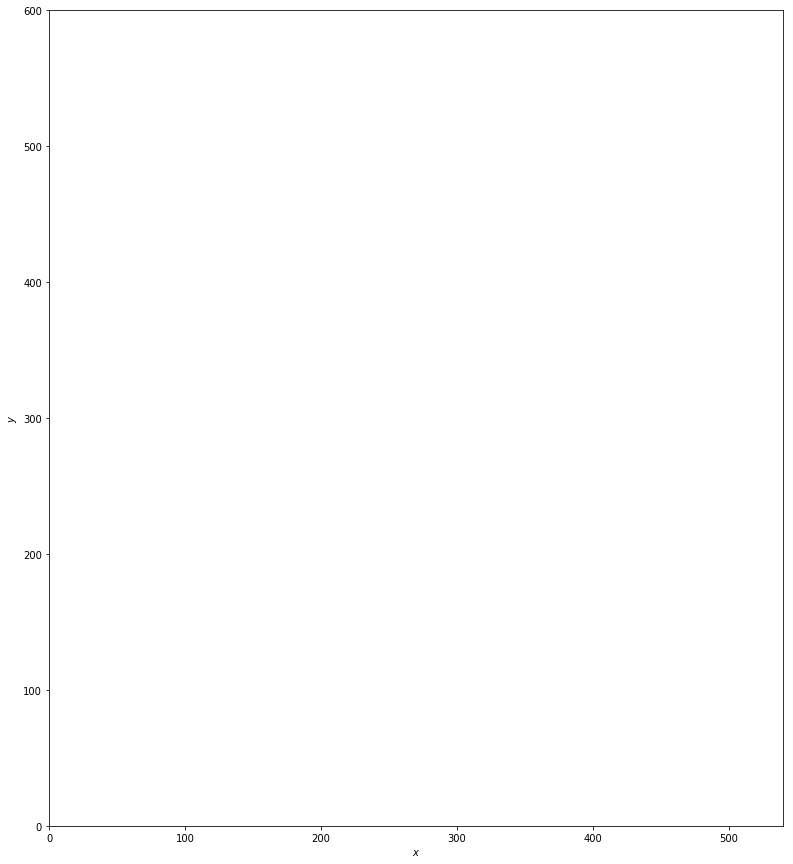

angle -81.9608160885
move (1.0, 0.0)
368.623881969 438.344313174
253
yes 1 (401.5797, 444.1501)


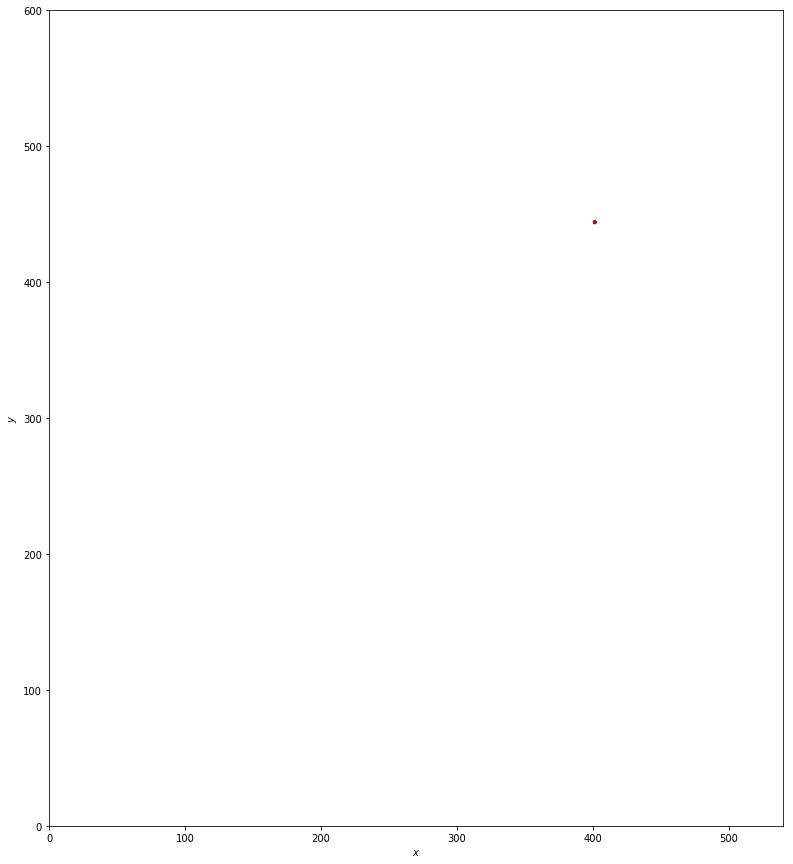

angle 0.0
move (0.17349708861795959, -0.98483438213797747)
368.797379058 437.359478792
254


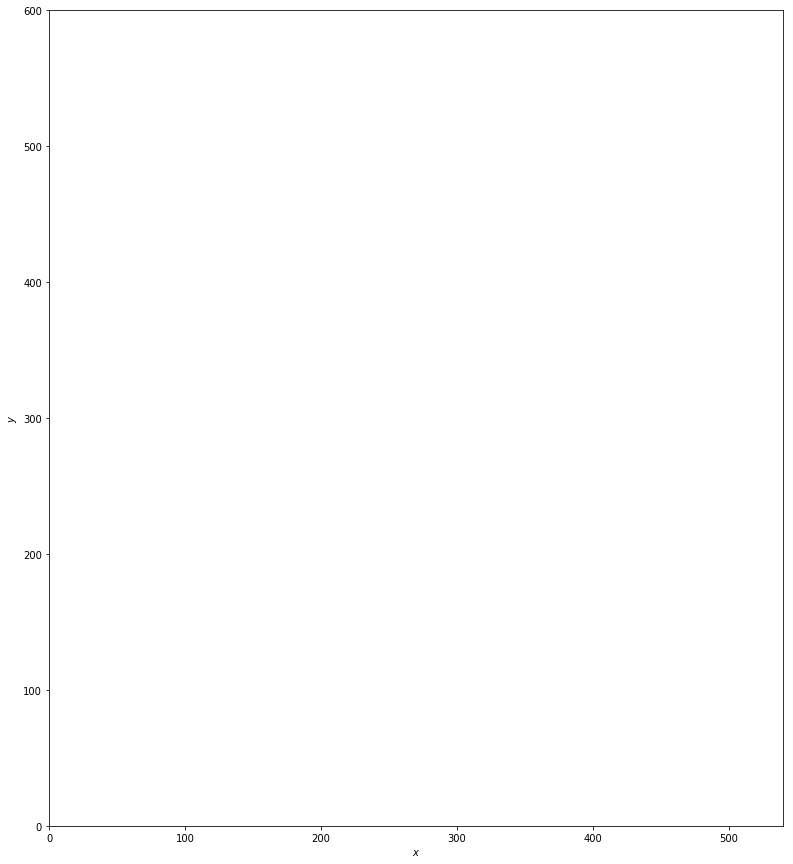

angle -80.0087901905
move (1.0, 0.0)
369.797379058 437.359478792
255
yes 1 (401.5797, 444.1501)


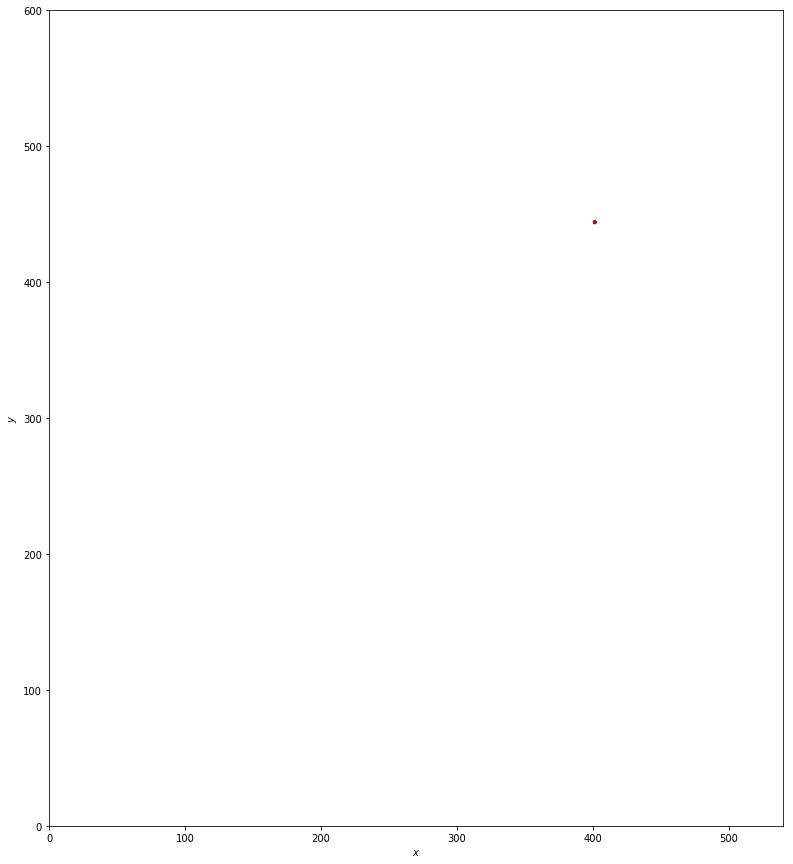

angle 0.0
move (0.20894432142813207, -0.97792753849297931)
370.006323379 436.381551254
256


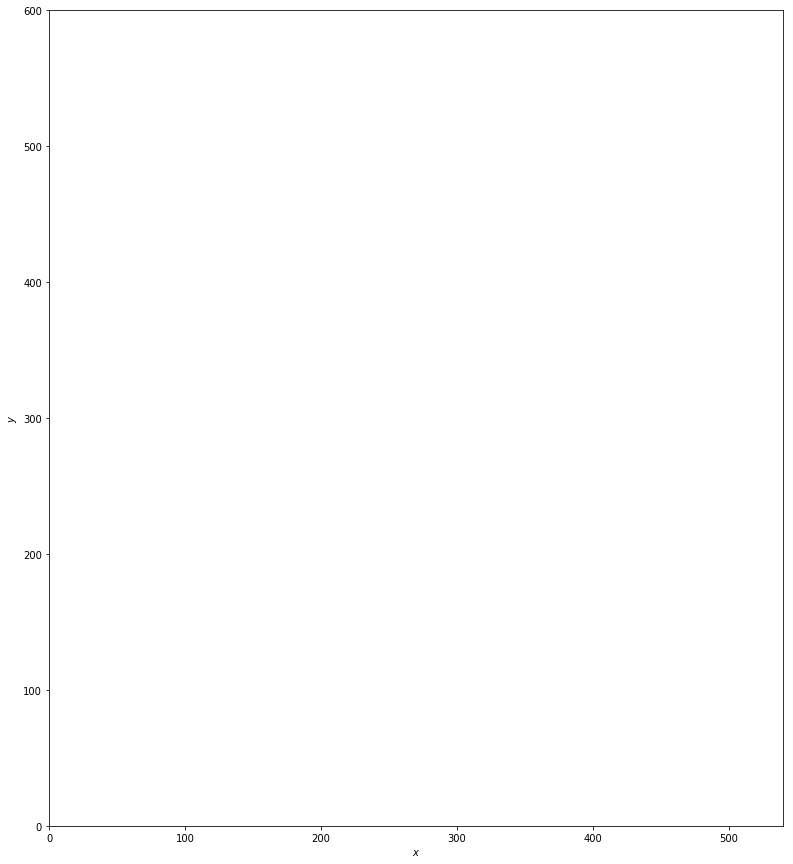

angle -77.9395060352
move (1.0, 0.0)
371.006323379 436.381551254
257
yes 1 (401.5797, 444.1501)


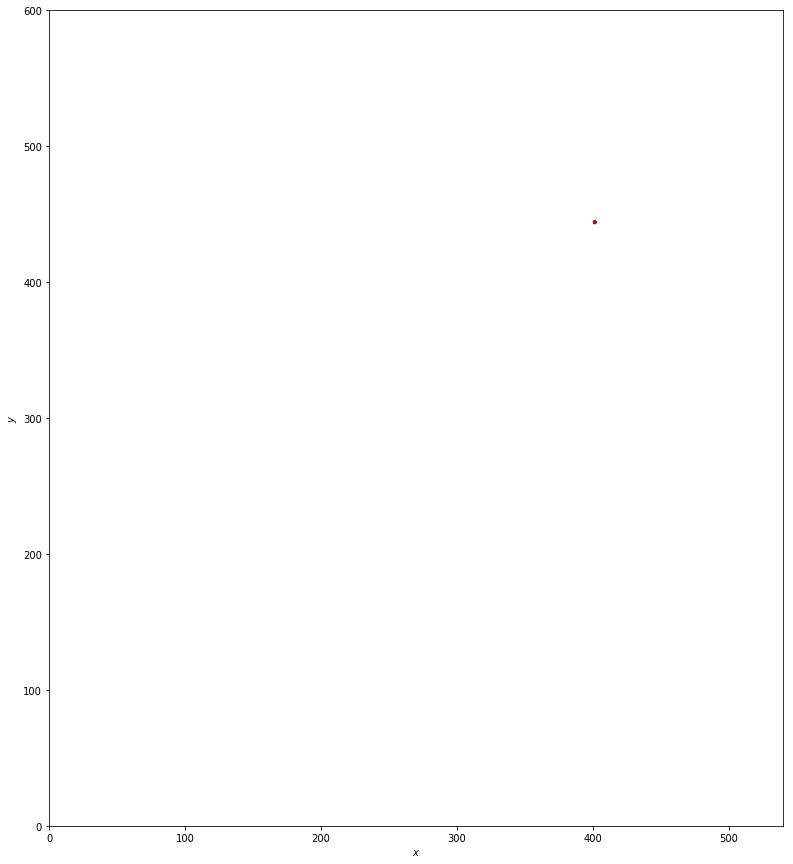

angle 0.0
move (0.24626944056469857, -0.96920140458211801)
371.25259282 435.412349849
258


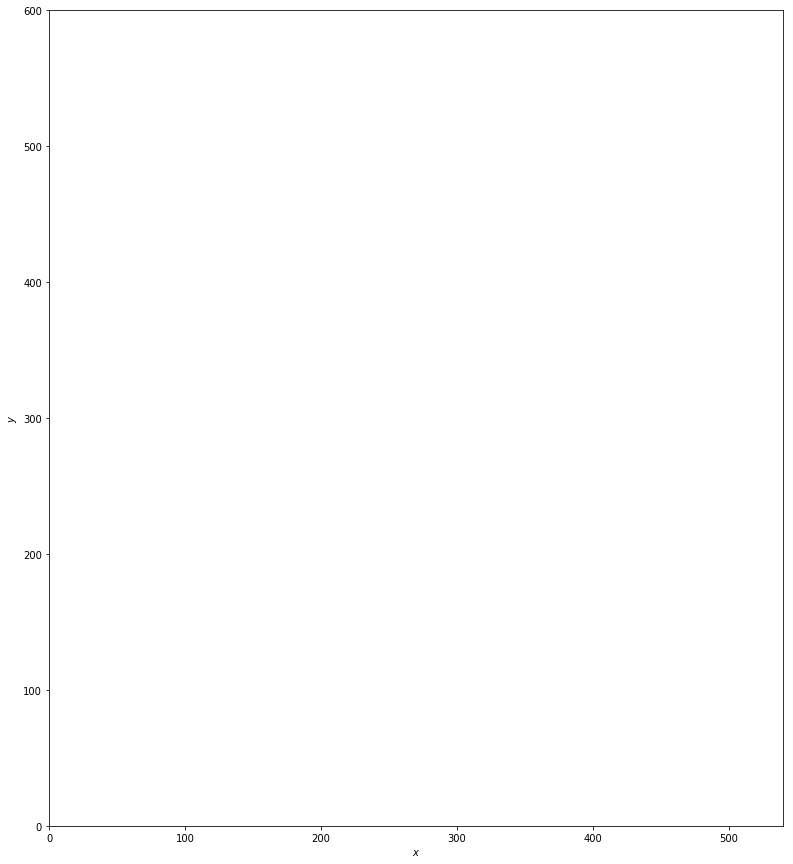

angle -75.7431338706
move (1.0, 0.0)
372.25259282 435.412349849
259
yes 1 (401.5797, 444.1501)


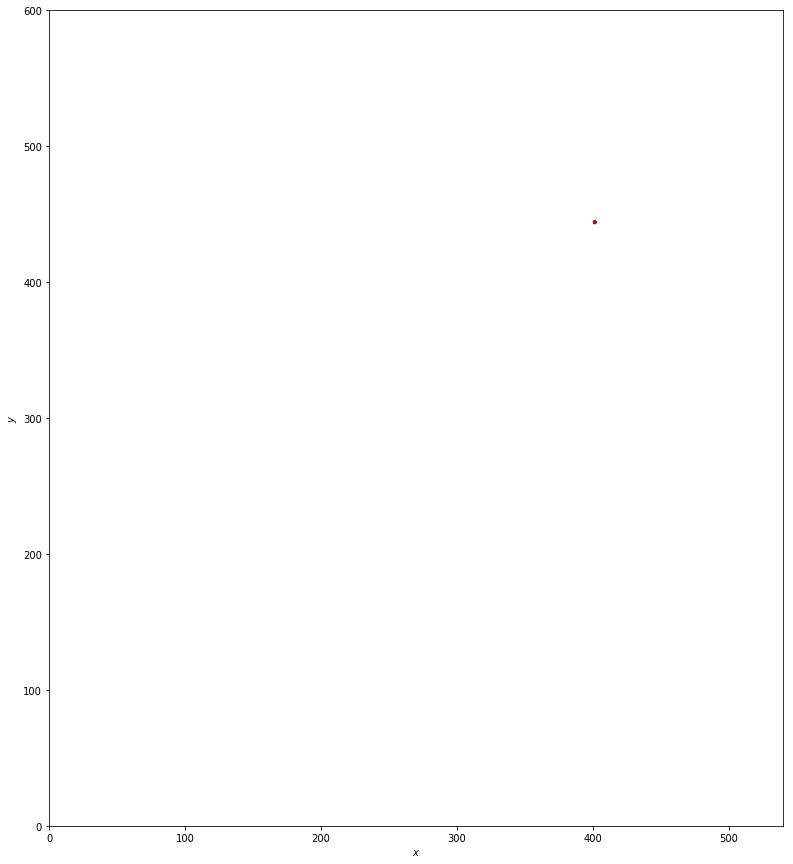

angle 0.0
move (0.28553709991750942, -0.95836765626282394)
372.53812992 434.453982193
260


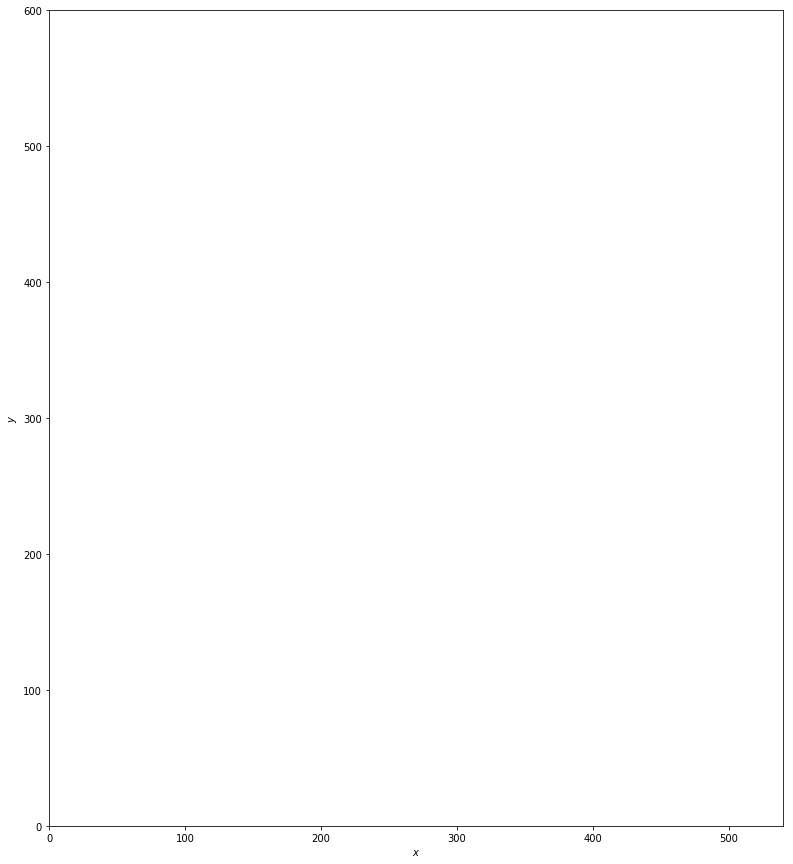

angle -73.409043703
move (1.0, 0.0)
373.53812992 434.453982193
261
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


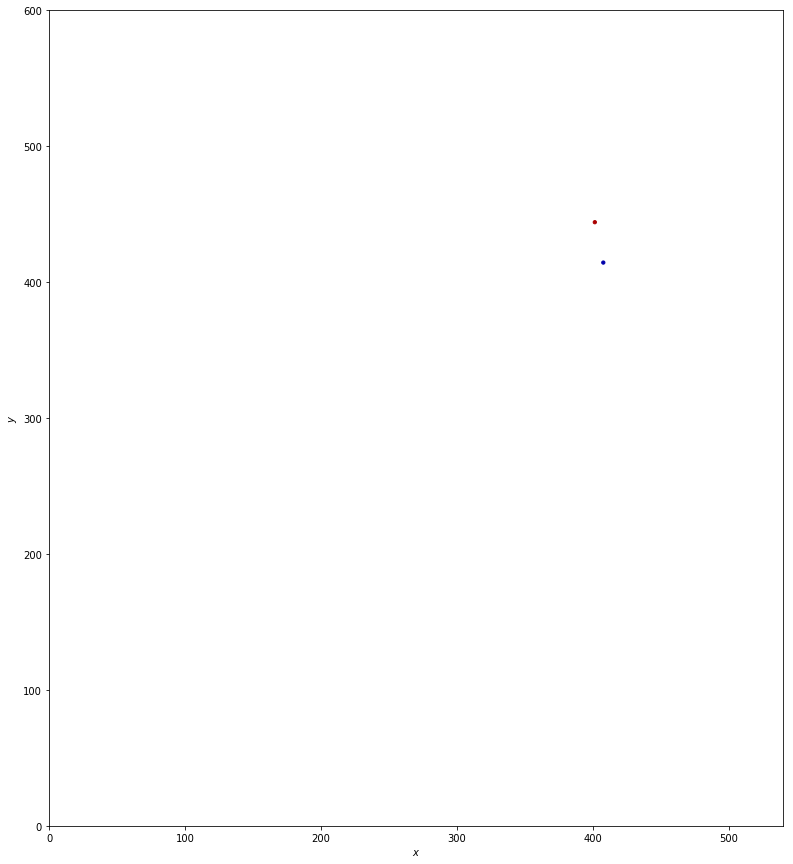

angle 0.0
move (0.89713659159873527, -0.44175325240976326)
374.435266511 434.01222894
262
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


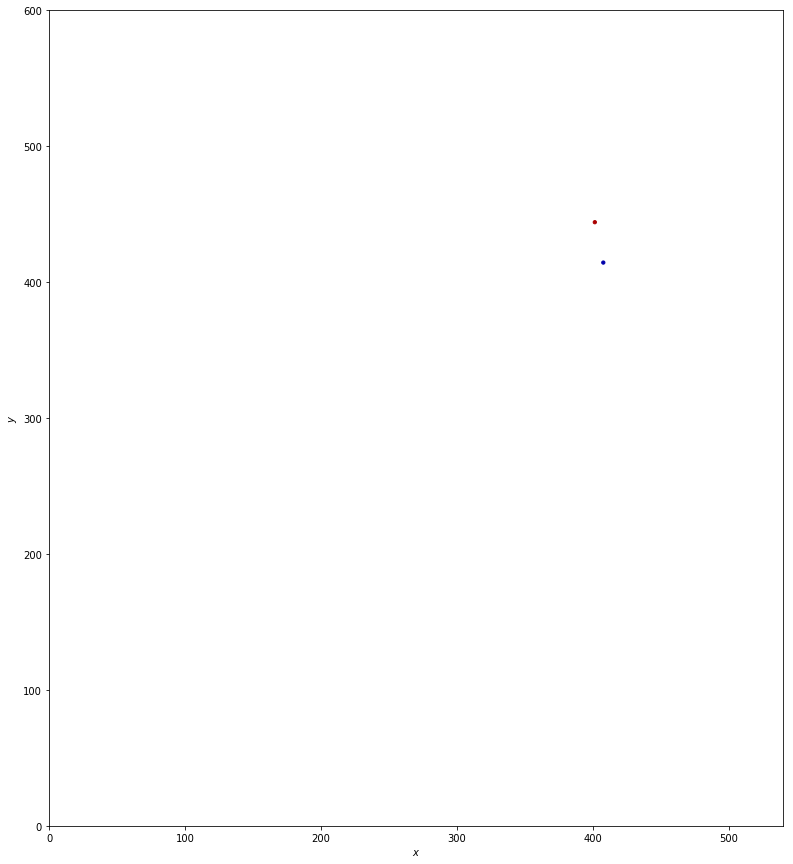

angle -26.2157991459
move (0.90766047608071843, -0.41970520625901647)
375.342926987 433.592523734
263
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


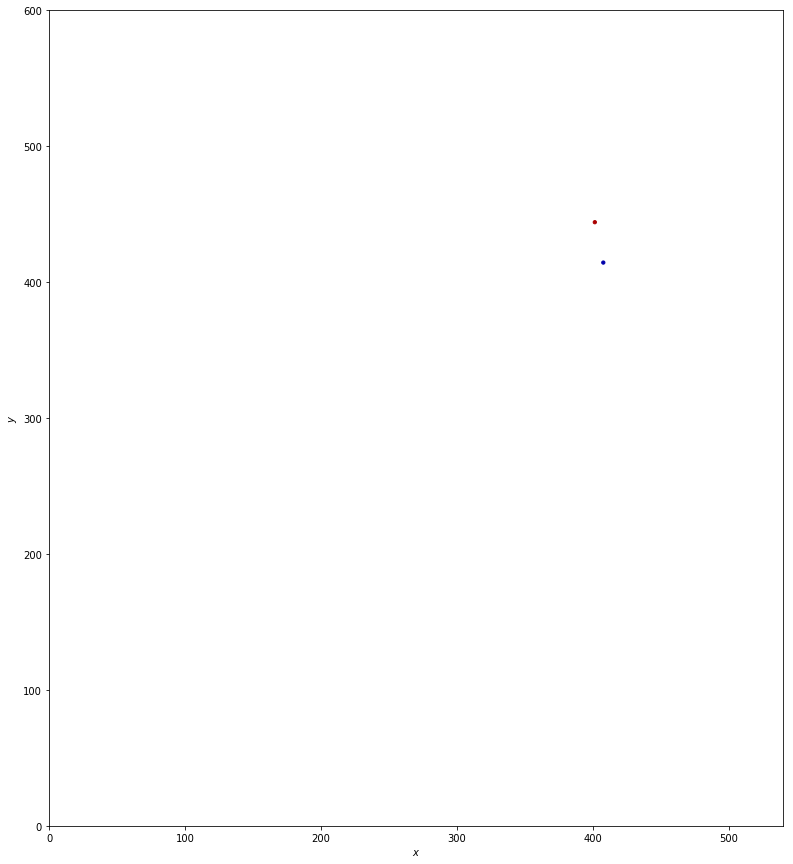

angle -24.8159773305
move (0.91759759861006718, -0.39751056215531944)
376.260524586 433.195013172
264
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


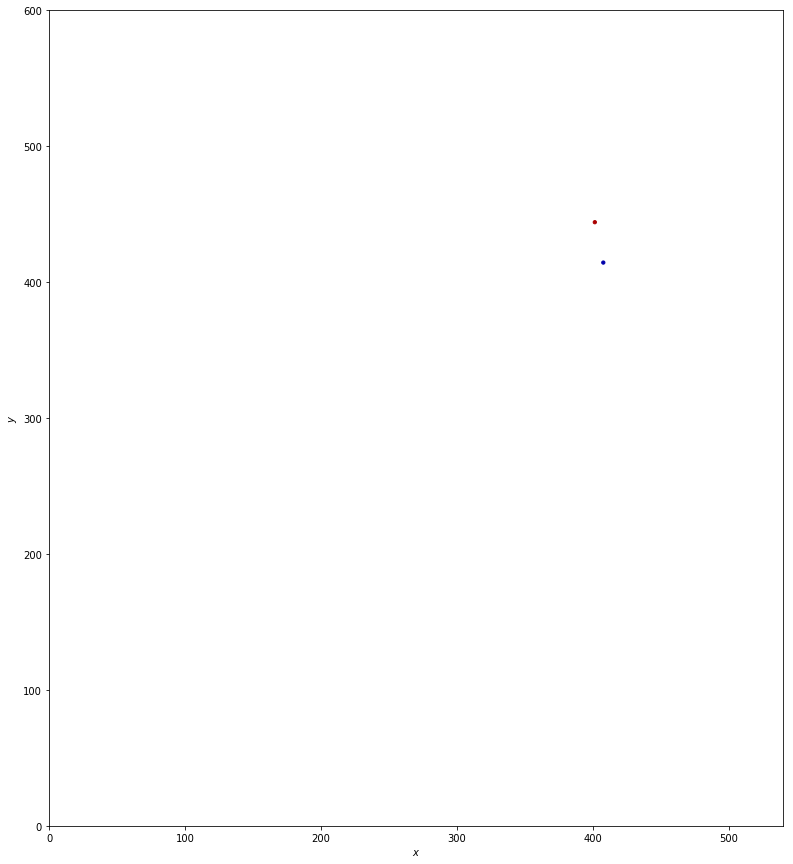

angle -23.4226436615
move (0.92694613879376841, -0.37519442396619346)
377.187470725 432.819818748
265
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


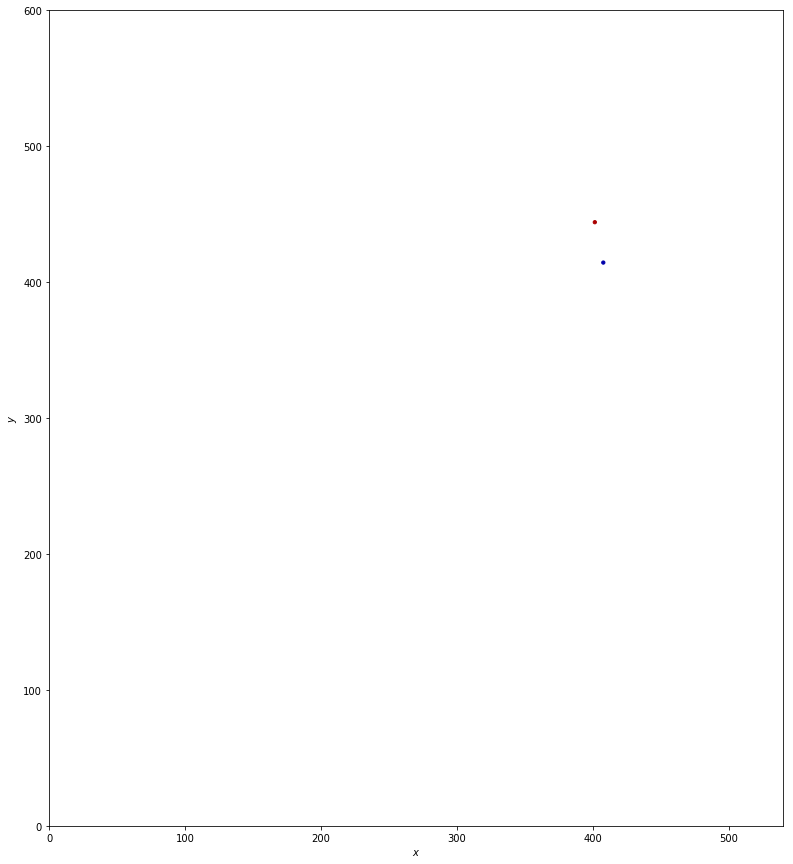

angle -22.0363299322
move (0.93570541308008959, -0.35278234073238263)
378.123176138 432.467036407
266
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


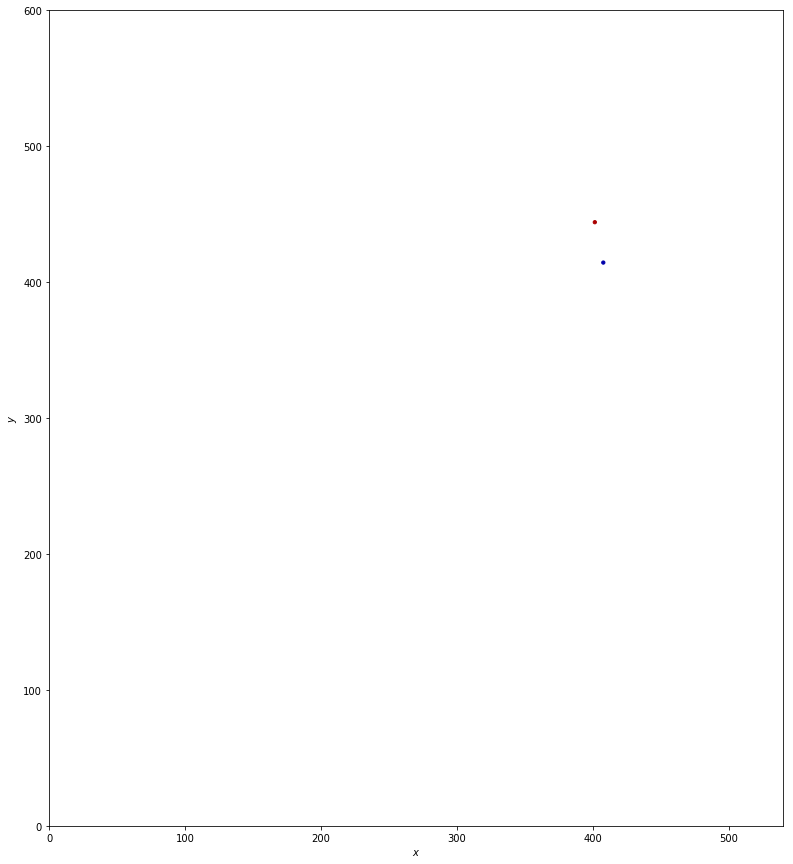

angle -20.6575902393
move (0.94387590753373973, -0.33030027426170766)
379.067052045 432.136736133
267
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


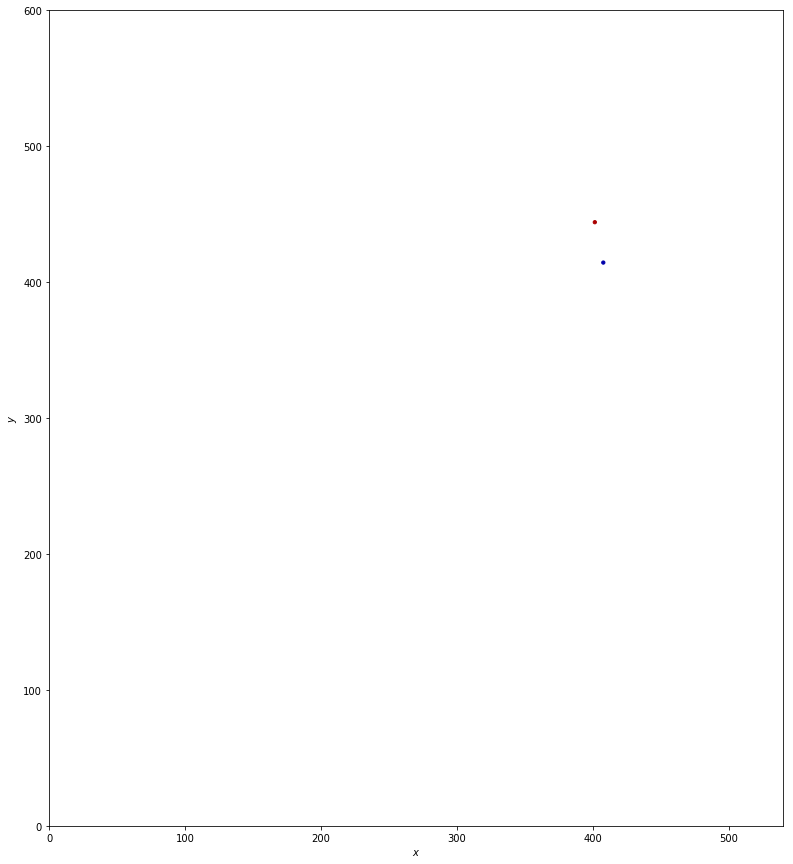

angle -19.2870019241
move (0.95145930921859245, -0.30777456506553452)
380.018511355 431.828961568
268
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


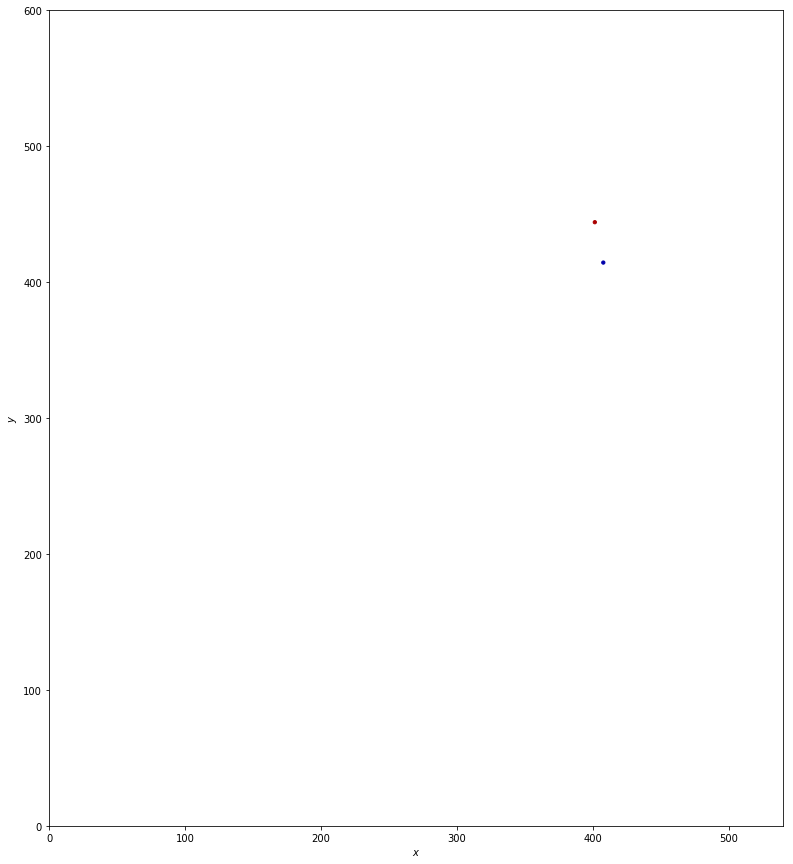

angle -17.925166514
move (0.9584585361093324, -0.28523189611113881)
380.976969891 431.543729672
269
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


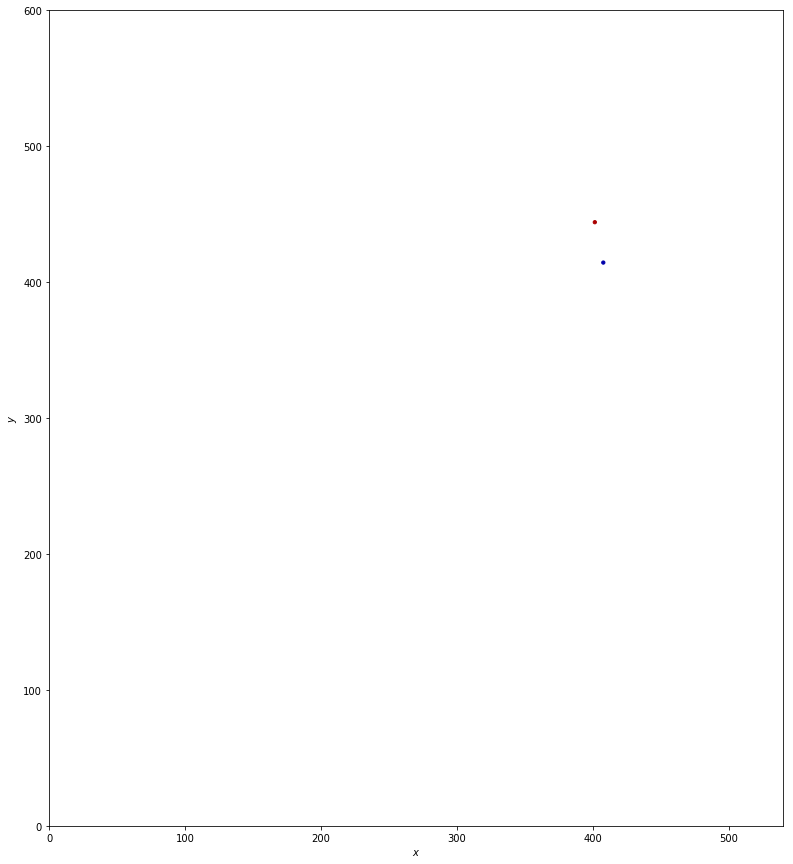

angle -16.5727106262
move (0.96487776540553138, -0.26269925356960622)
381.941847656 431.281030418
270
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


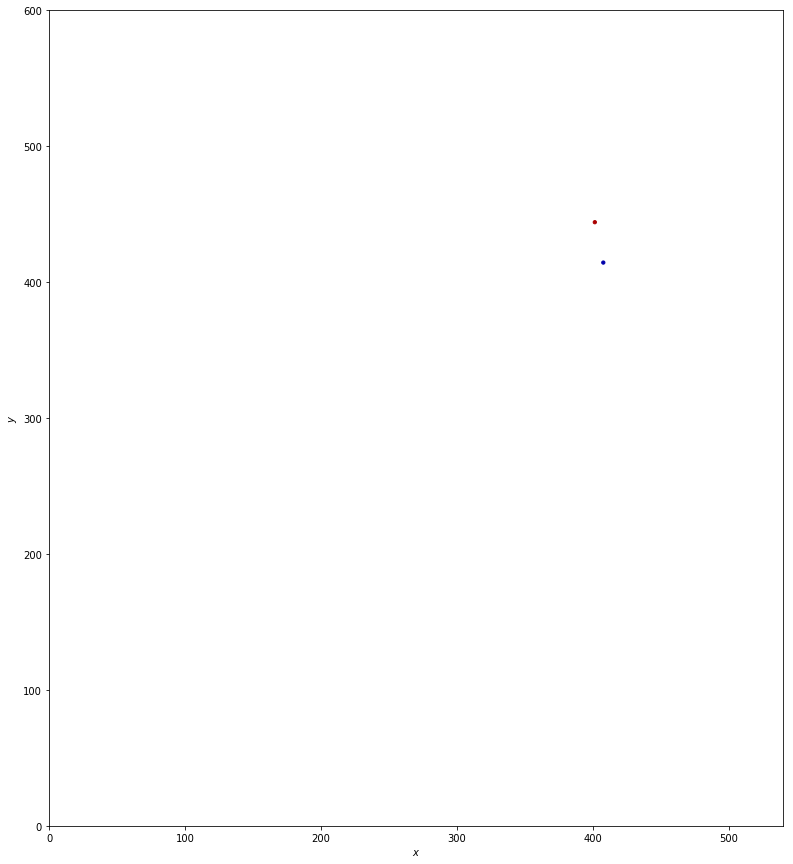

angle -15.2302867785
move (0.97072246003979079, -0.24020388334557963)
382.912570116 431.040826535
271
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


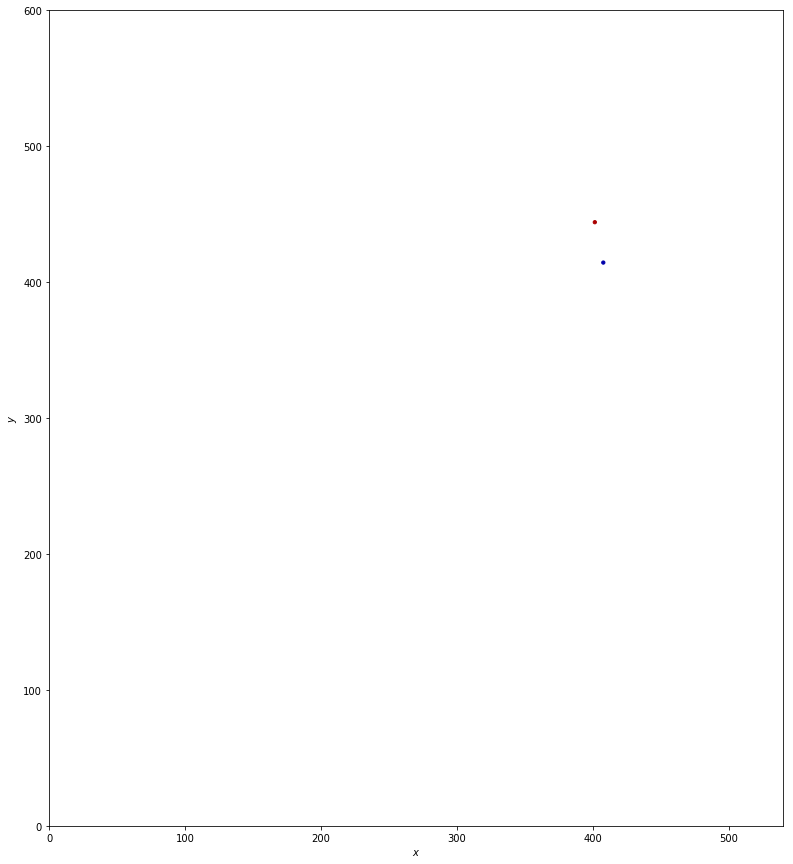

angle -13.8985740306
move (0.97599939304216587, -0.21777324165591089)
383.888569509 430.823053293
272
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


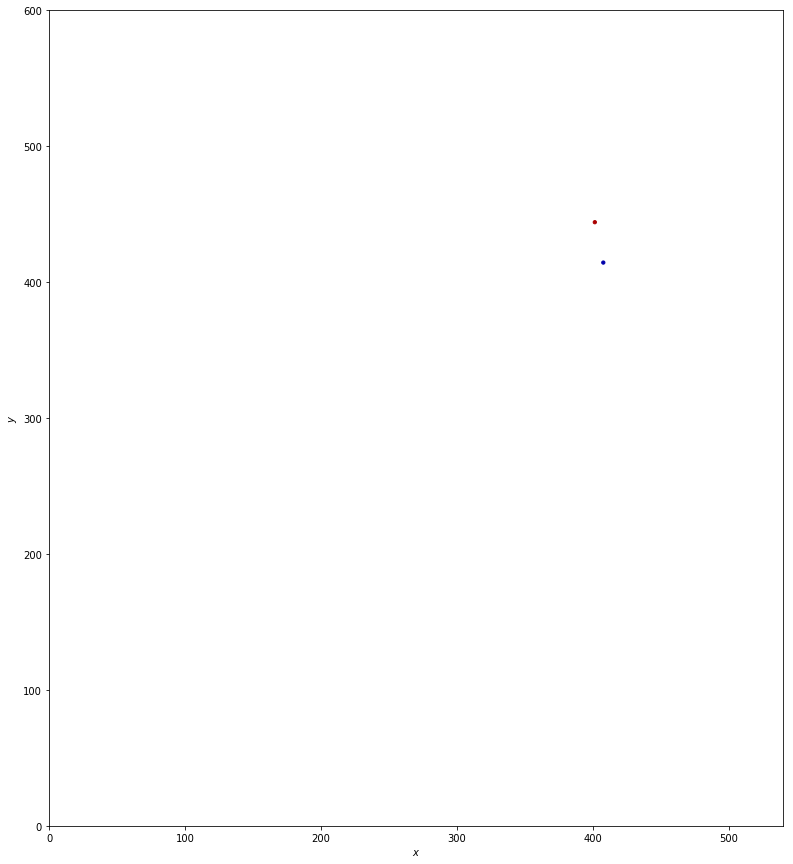

angle -12.5782783464
move (0.9807166692283158, -0.19543493724950547)
384.869286179 430.627618356
273
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


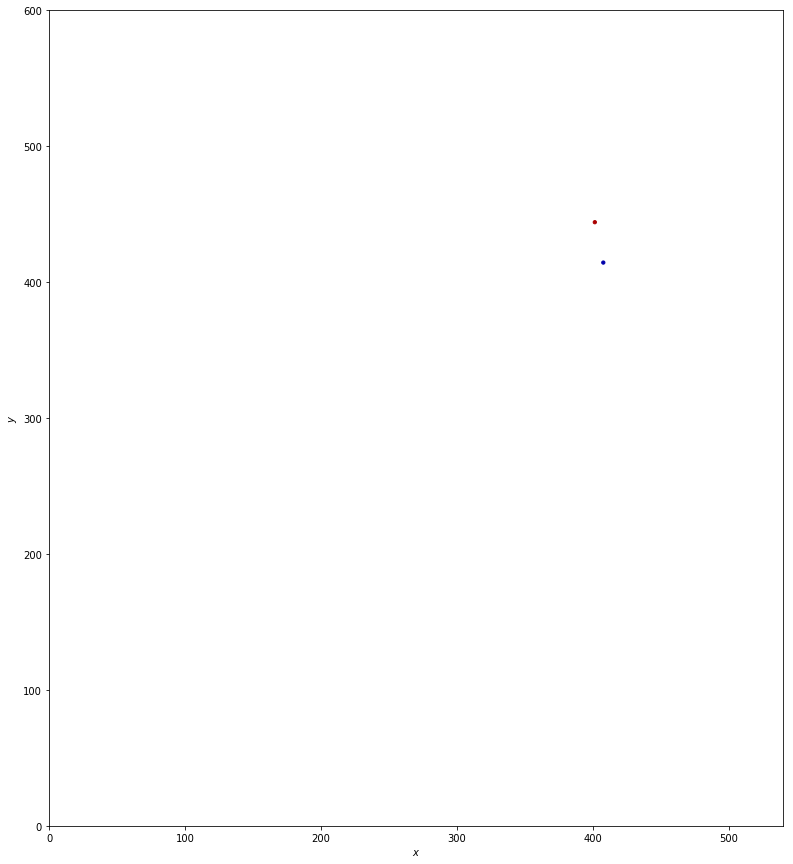

angle -11.2701325298
move (0.98488374339621687, -0.17321666199836191)
385.854169922 430.454401694
274
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


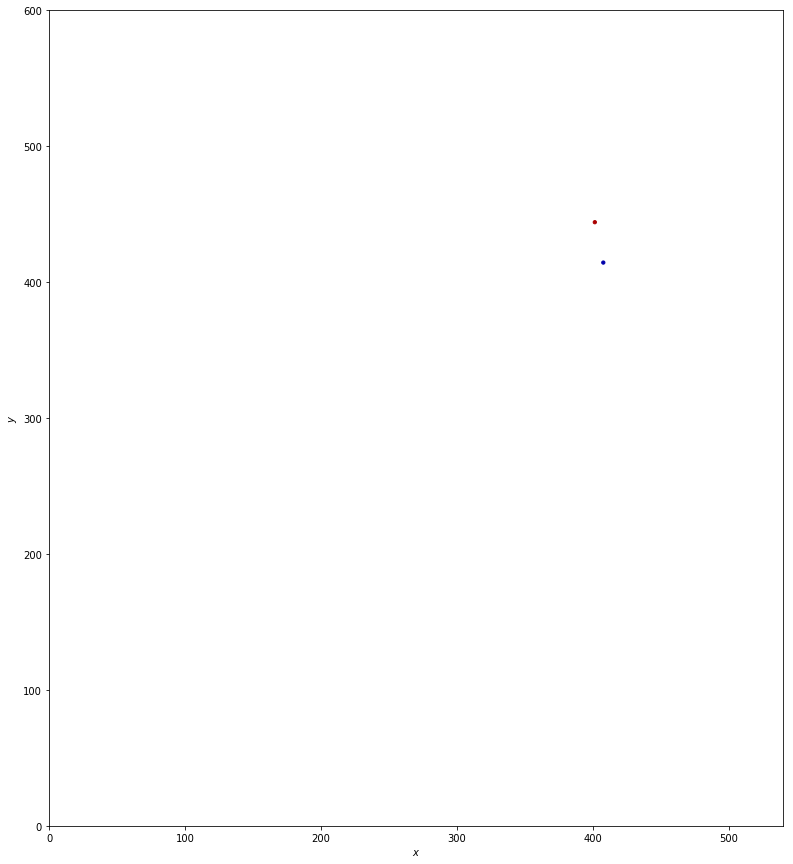

angle -9.9748955344
move (0.98851143381805118, -0.15114610551046534)
386.842681356 430.303255588
275
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


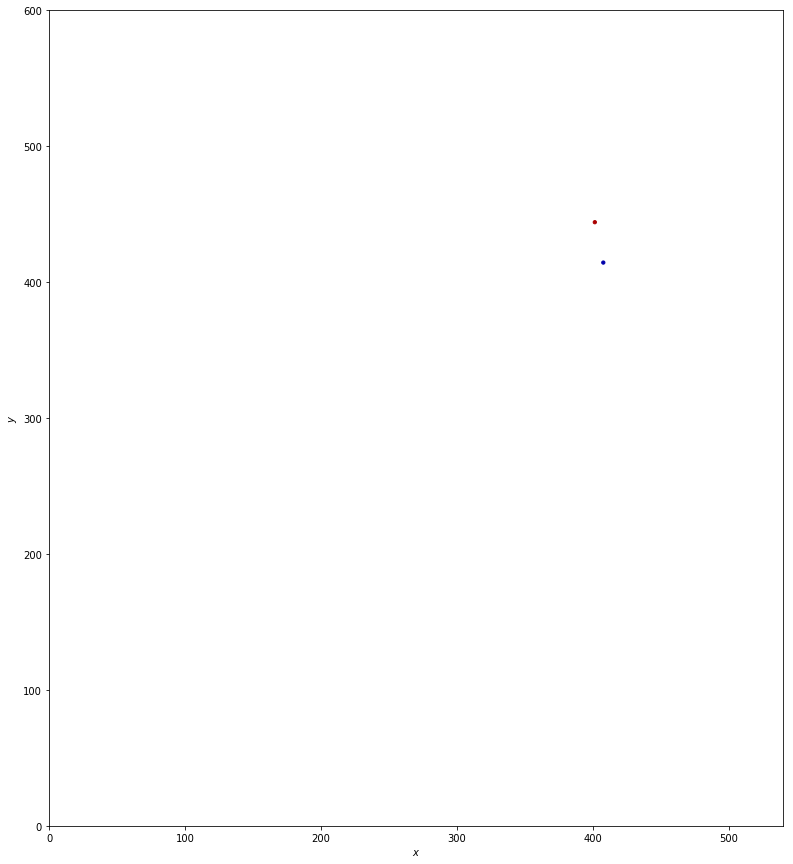

angle -8.69335088258
move (0.99161192926757236, -0.12925084809873846)
387.834293285 430.17400474
276
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


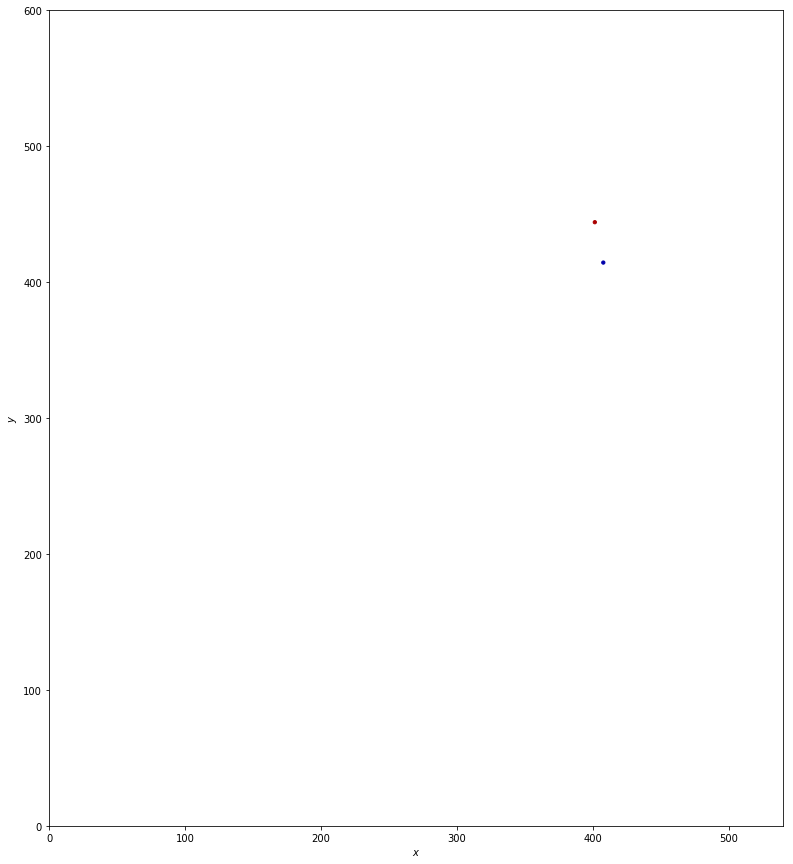

angle -7.42630384985
move (0.99419878709359633, -0.10755822489062382)
388.828492072 430.066446516
277
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


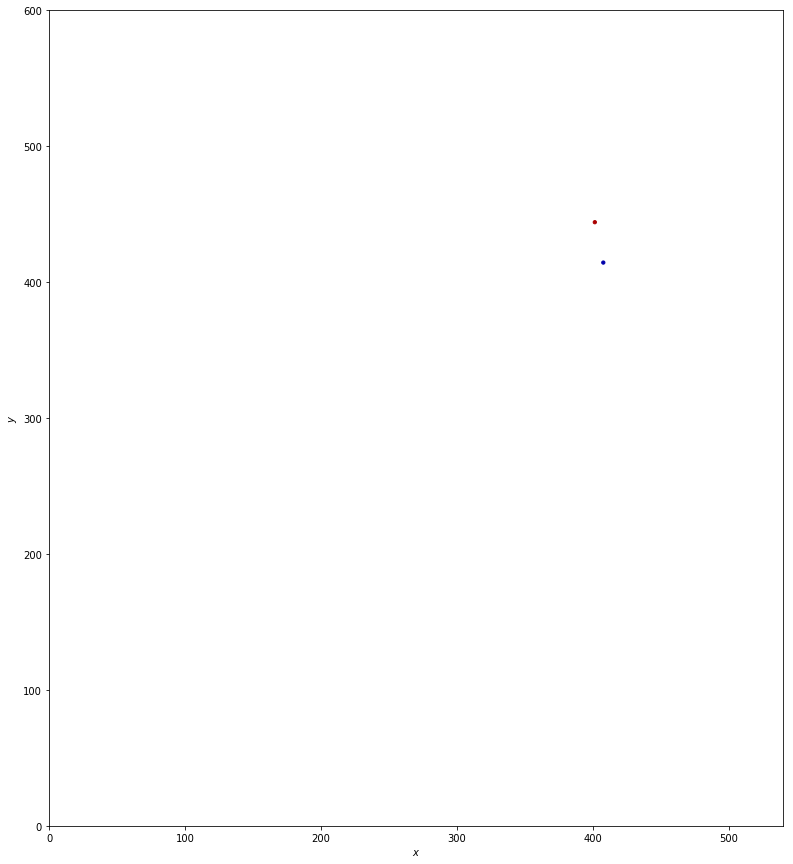

angle -6.17457697419
move (0.99628691890429699, -0.086095152129389299)
389.824778991 429.980351363
278
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


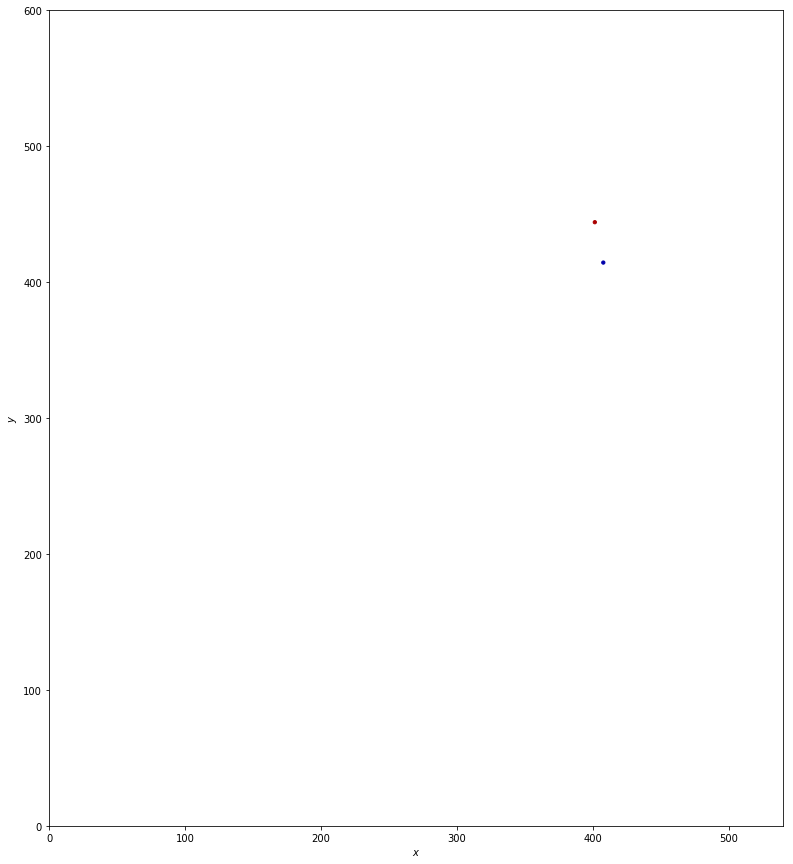

angle -4.9390033414
move (0.99789255924362996, -0.064887904929951709)
390.82267155 429.915463458
279
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


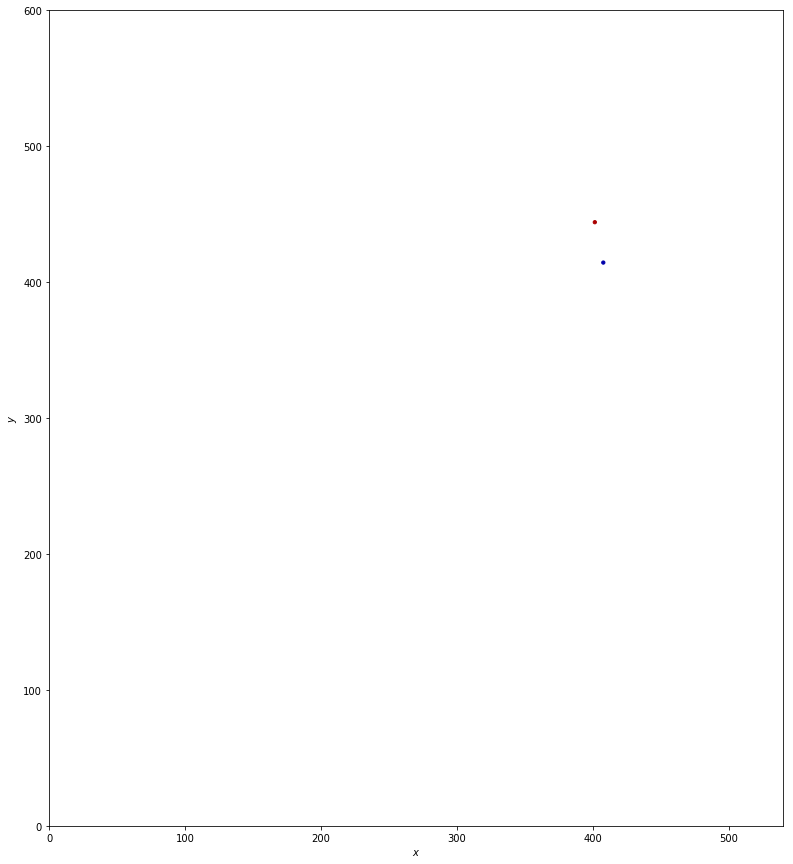

angle -3.72041698076
move (0.9990332112281699, -0.043961834164772007)
391.821704761 429.871501624
280
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


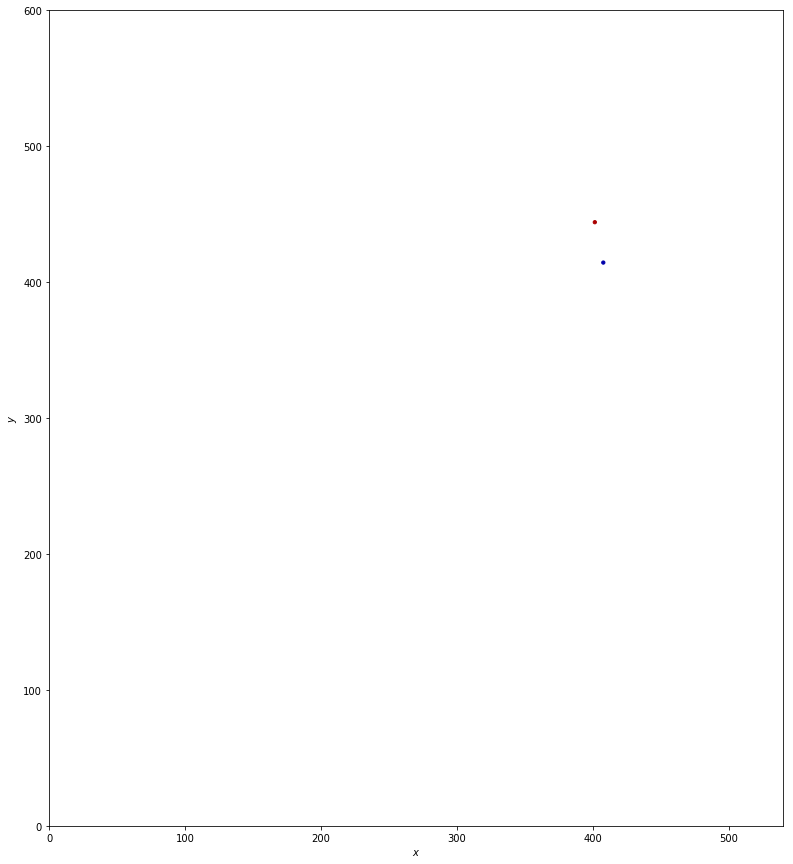

angle -2.51963959607
move (0.99972756153315123, -0.023341009210816534)
392.821432323 429.848160615
281
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


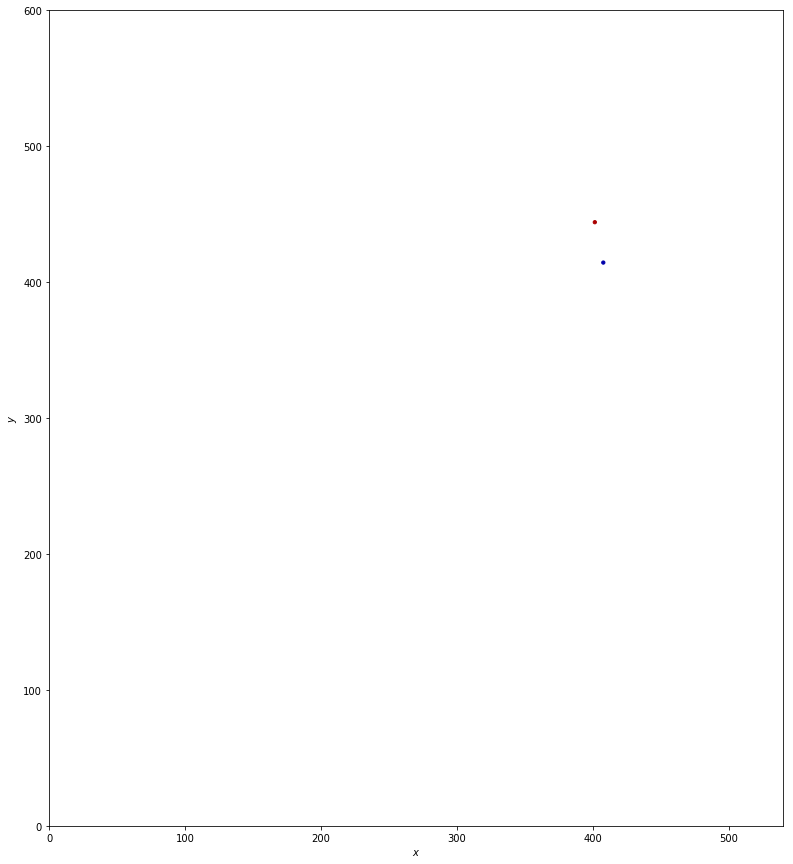

angle -1.33746277833
move (0.9999953555270199, -0.0030477736774618442)
393.821427679 429.845112841
282
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


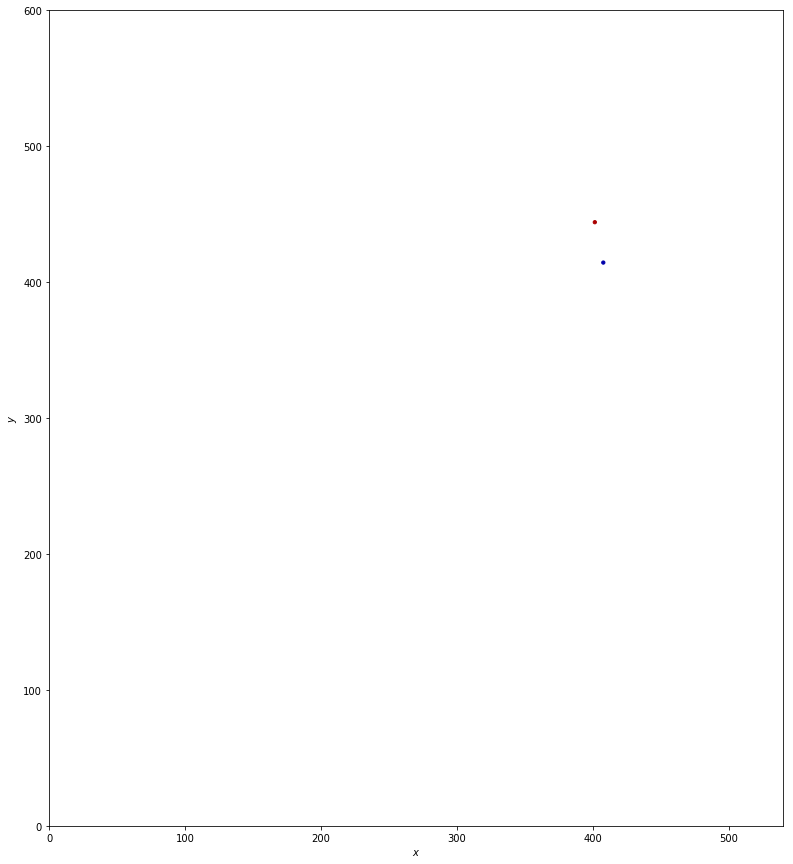

angle -0.174624838976
move (0.99985722205134364, 0.016897796062508085)
394.821284901 429.862010637
283
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


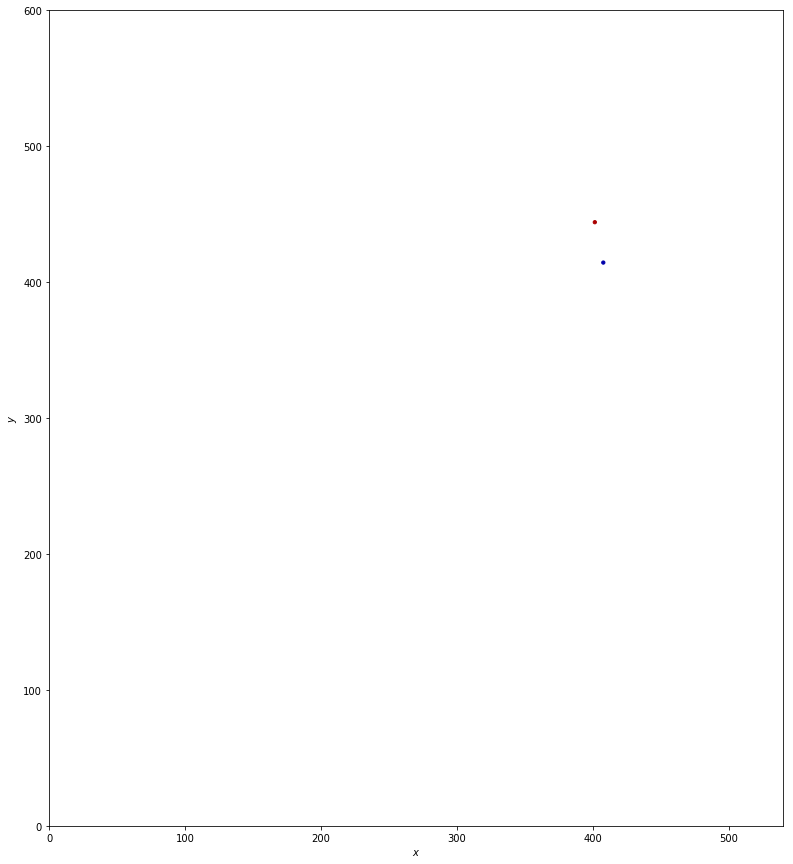

angle 0.968218477976
move (0.99933443681121625, 0.036478533457489741)
395.820619337 429.898489171
284
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


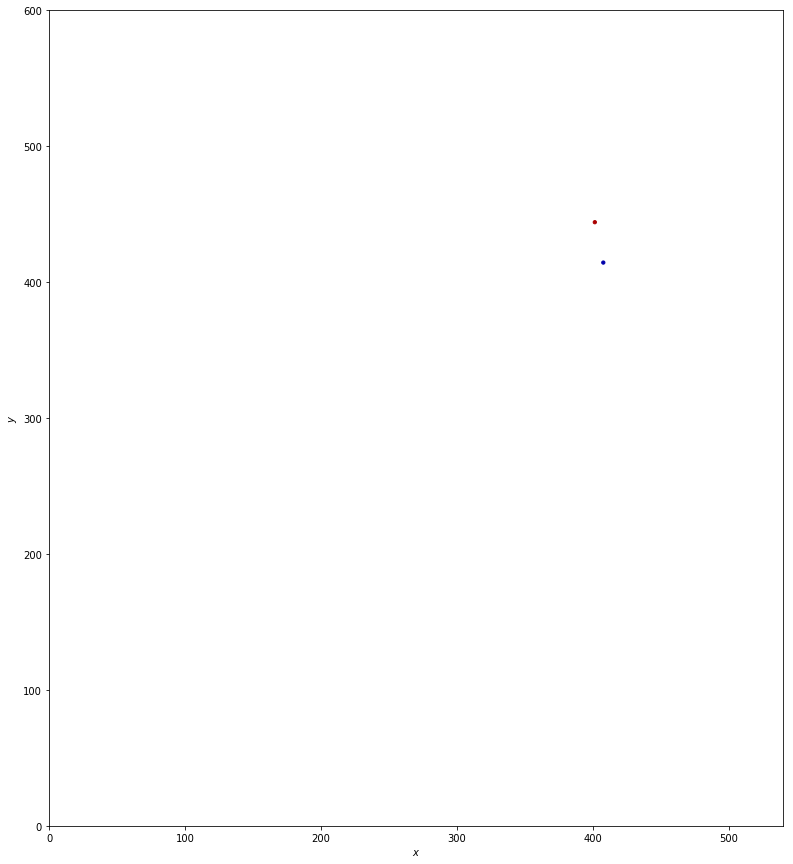

angle 2.09052982376
move (0.99844861427298193, 0.055680918242807763)
396.819067952 429.954170089
285
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


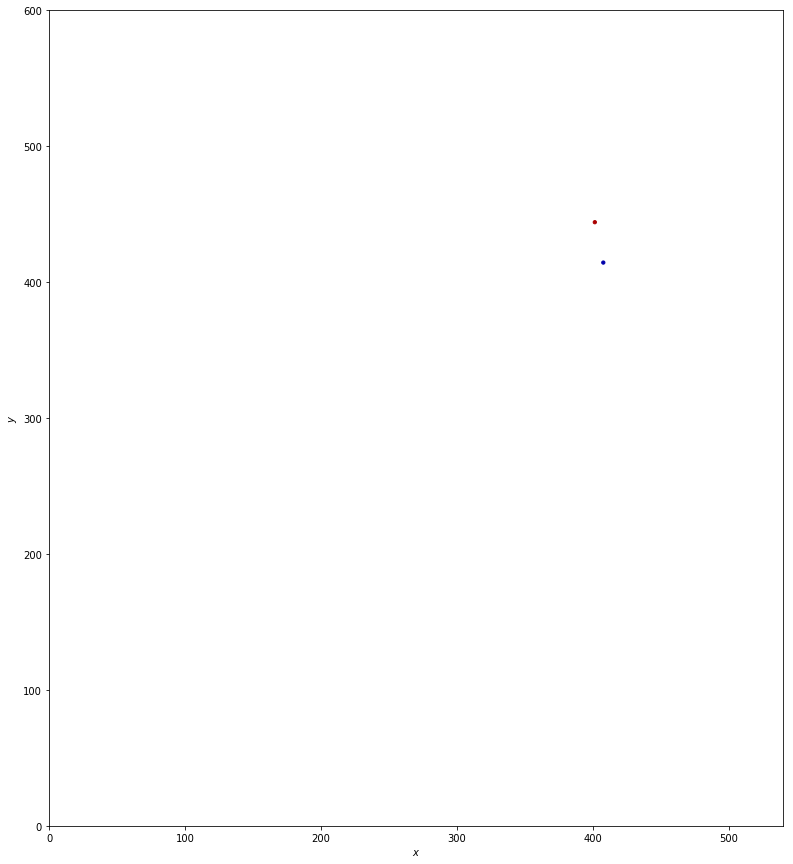

angle 3.19193242498
move (0.99722132121891016, 0.074495882479579209)
397.816289273 430.028665972
286
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


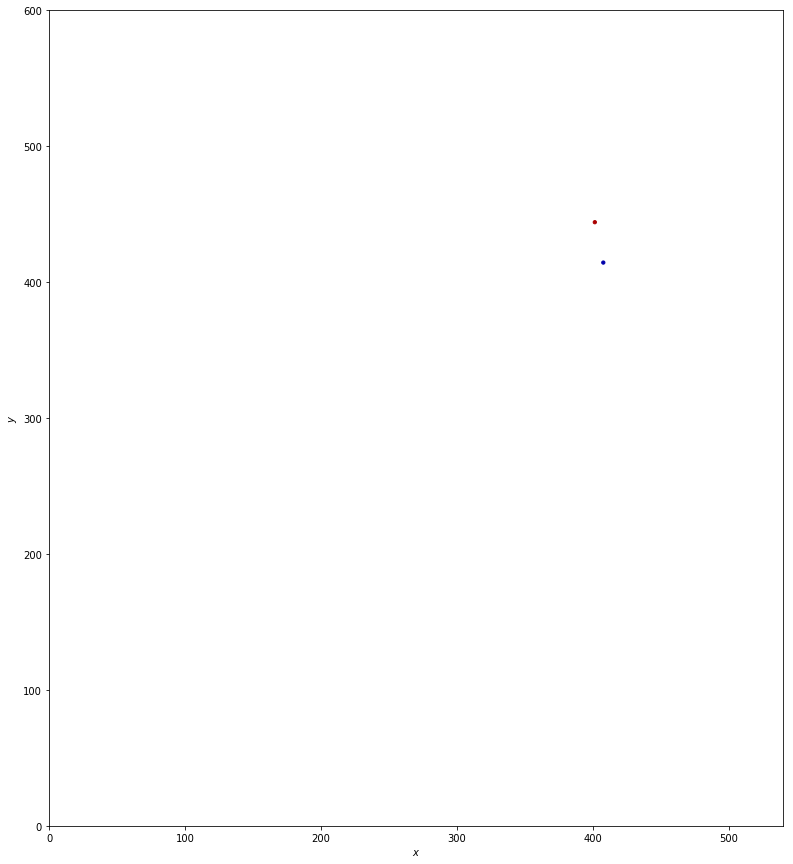

angle 4.27225746776
move (0.99567361153930578, 0.092919638851405431)
398.811962884 430.12158561
287
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


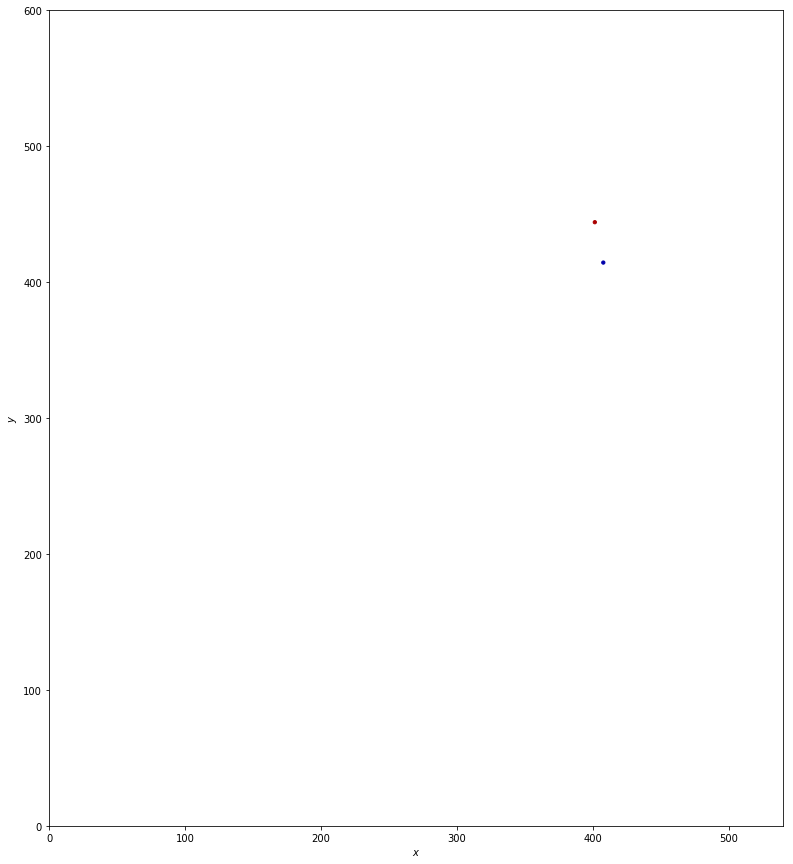

angle 5.33159420924
move (0.99382549197038683, 0.11095445691732481)
399.805788376 430.232540067
288
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


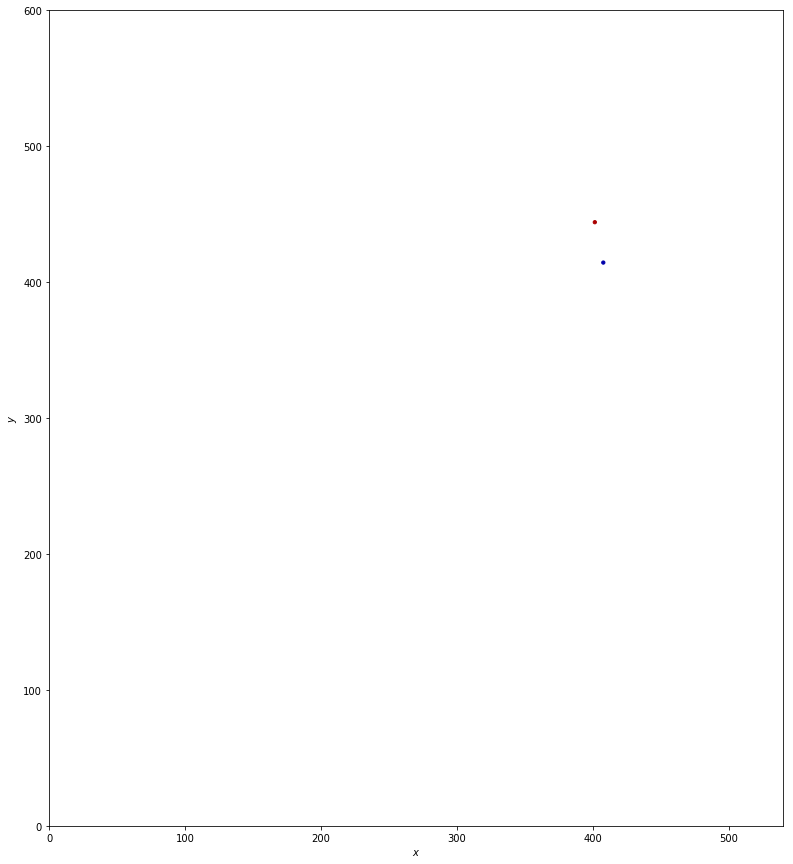

angle 6.37033874041
move (0.99169534199169795, 0.12860928688072767)
400.797483718 430.361149354
289
yes 1 (401.5797, 444.1501)
yes -1 (407.8197, 414.4502)


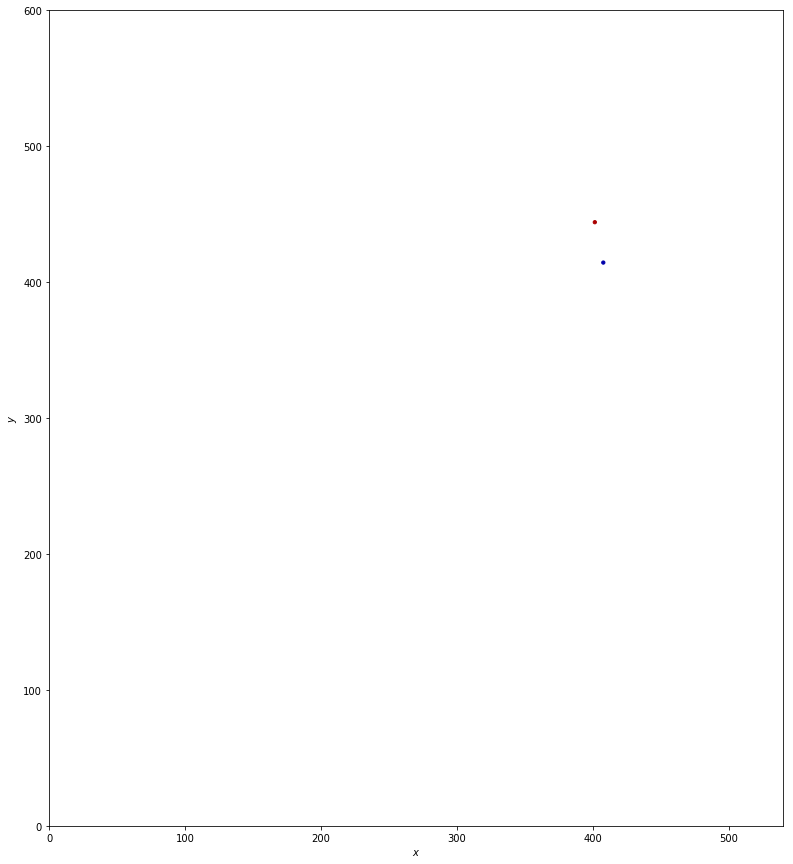

angle 7.38923571689
move (0.9892993262927624, 0.1459001130797587)
401.786783045 430.507049467
290
yes -1 (407.8197, 414.4502)


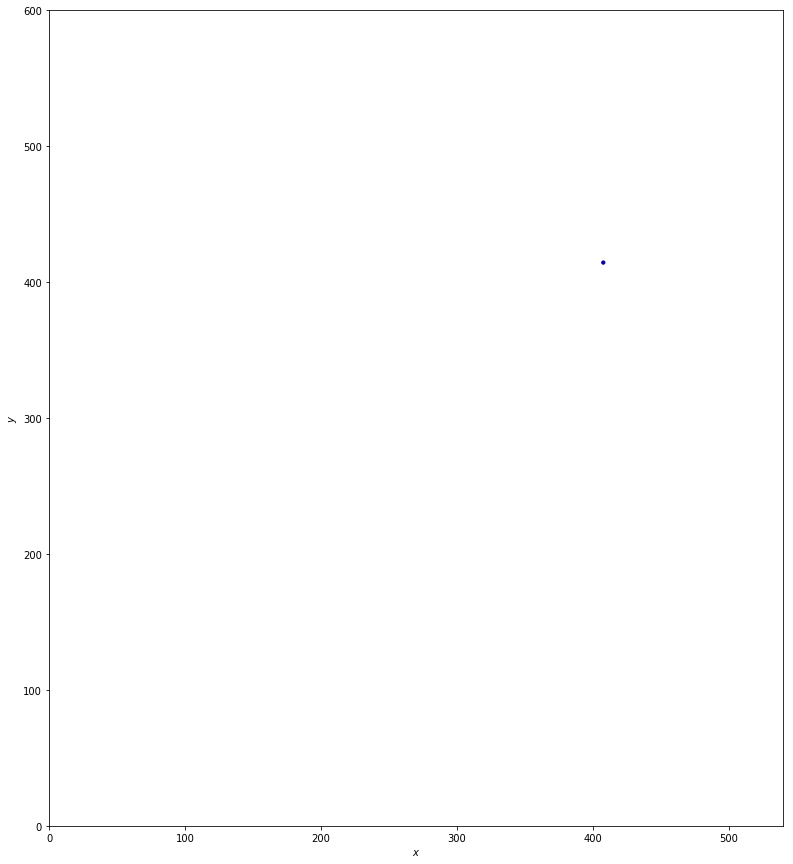

angle 8.38940621121
move (0.936106683659505, 0.3517161878674388)
402.722889728 430.858765655
291
yes 1 (401.5797, 444.1501)


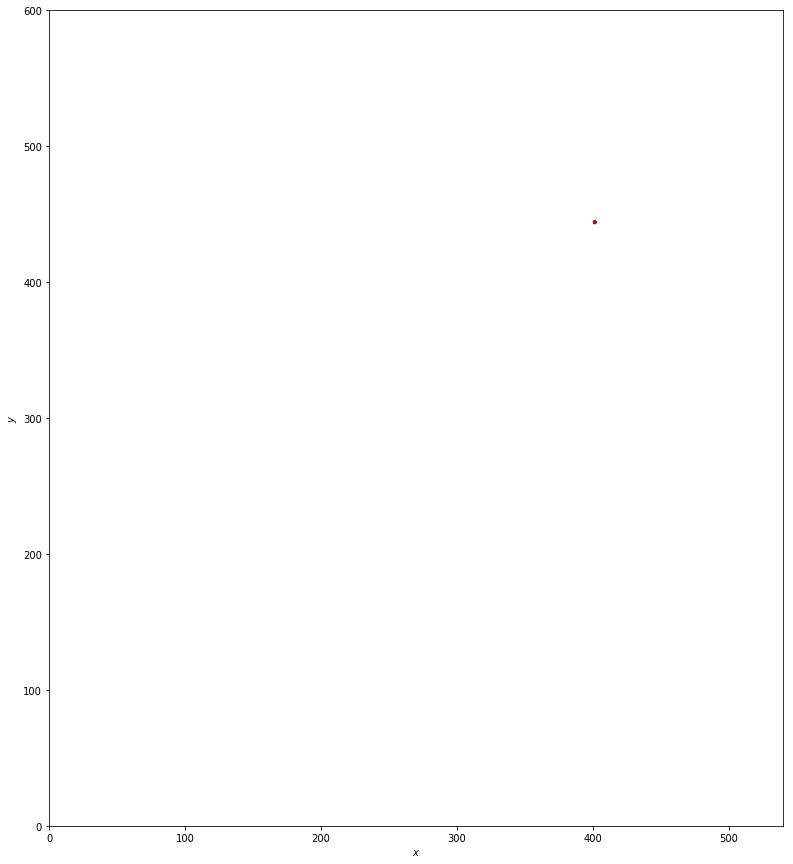

angle 20.5923208108
move (0.99632152340382796, 0.085693768748231702)
403.719211252 430.944459424
292
yes -1 (407.8197, 414.4502)


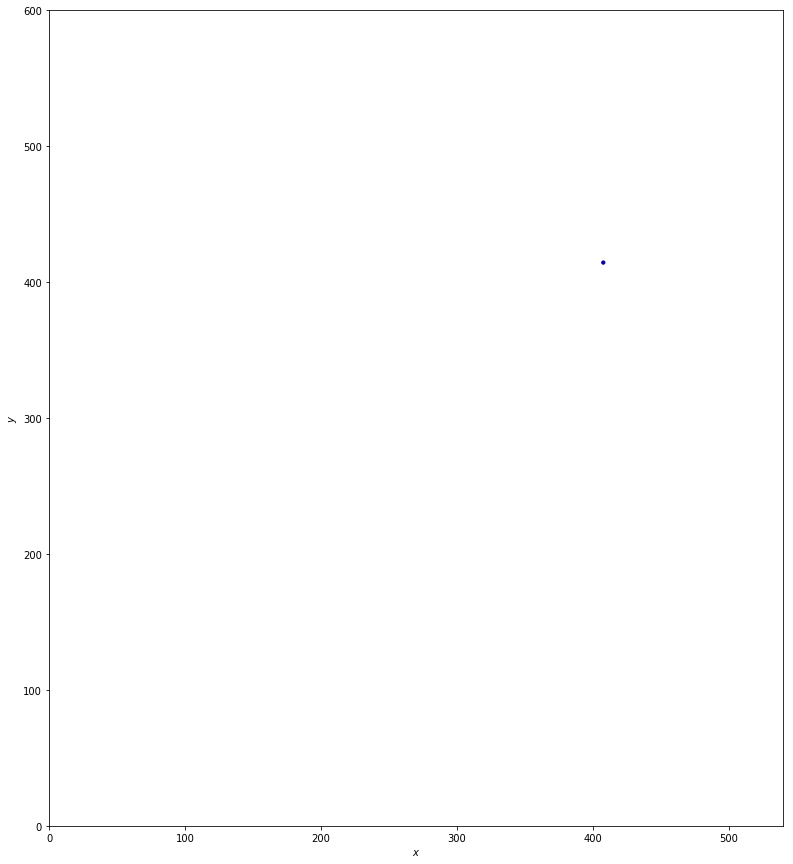

angle 4.91592045878
move (0.97046112038106269, 0.24125756740200391)
404.689672372 431.185716991
293


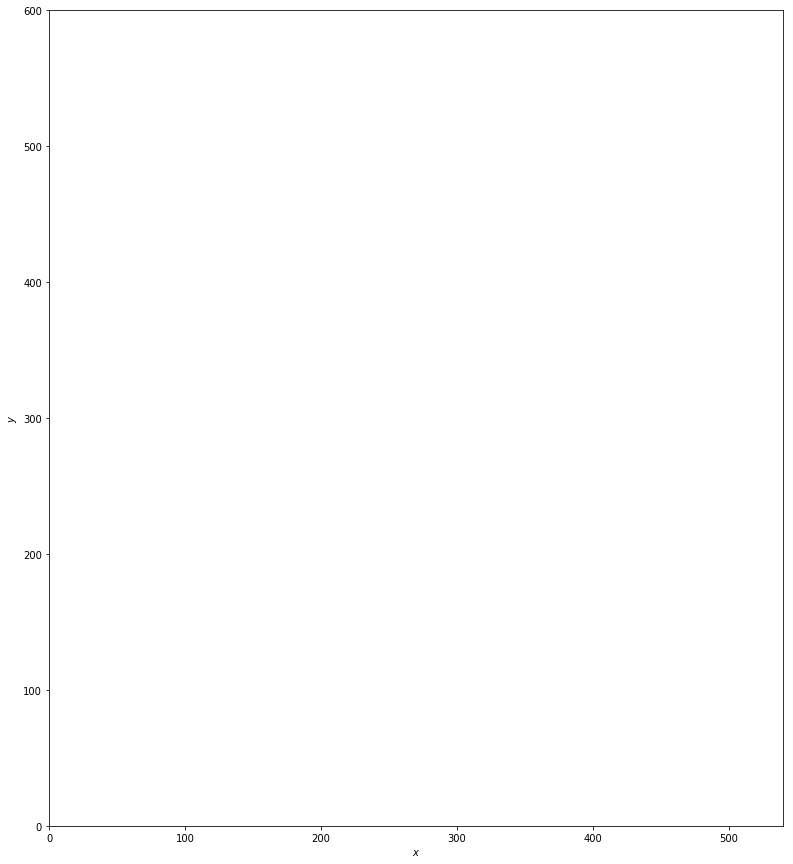

angle 13.9607748899
move (1.0, 0.0)
405.689672372 431.185716991
294


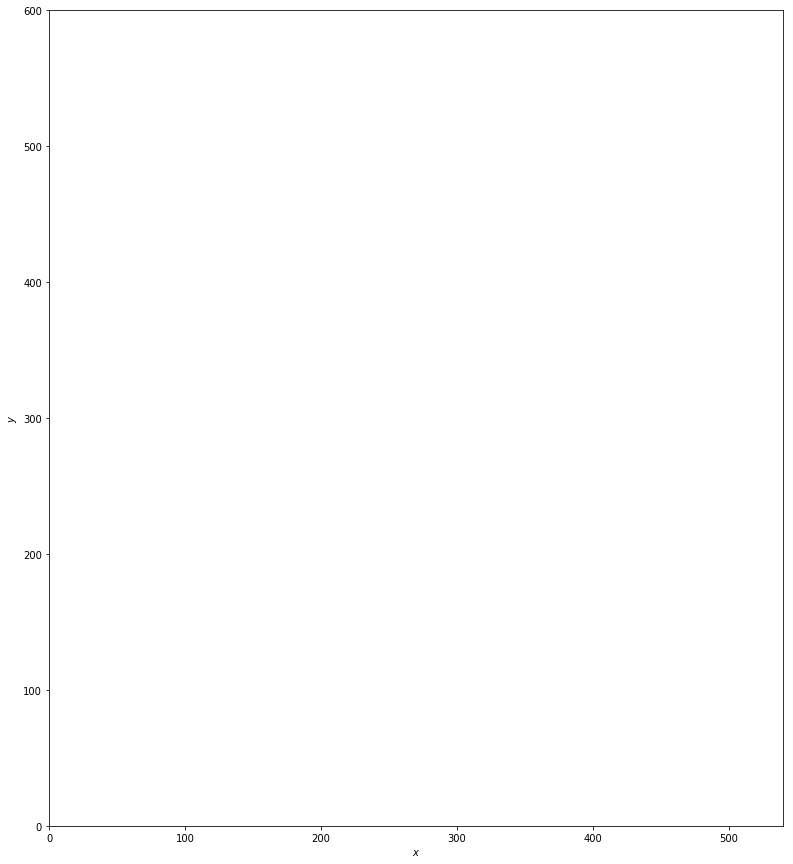

angle 0.0
move (1.0, 0.0)
406.689672372 431.185716991
295


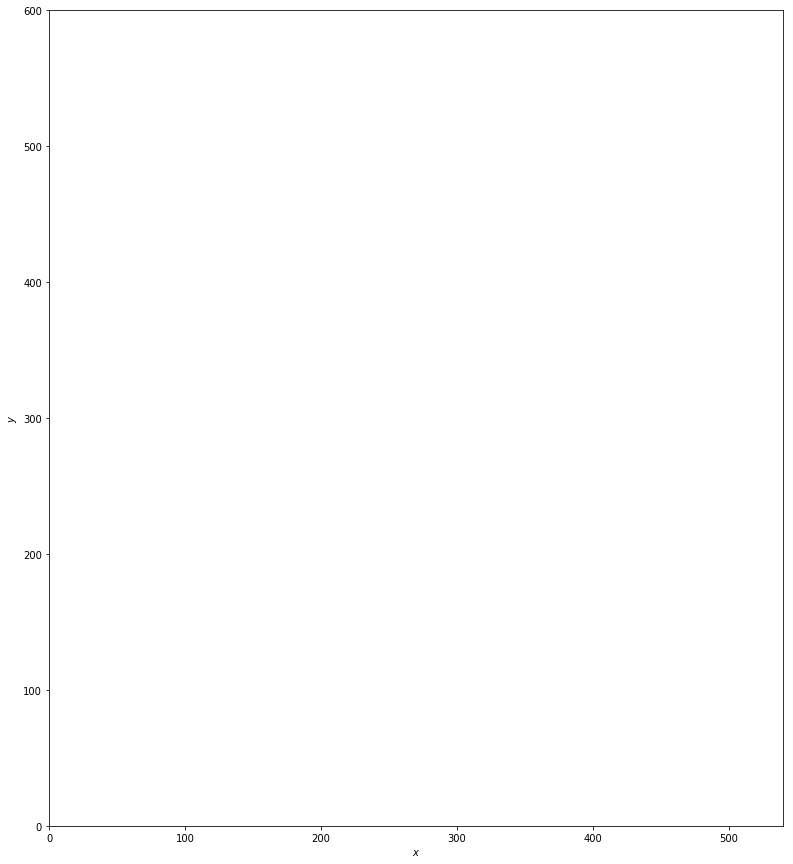

angle 0.0
move (1.0, 0.0)
407.689672372 431.185716991
296


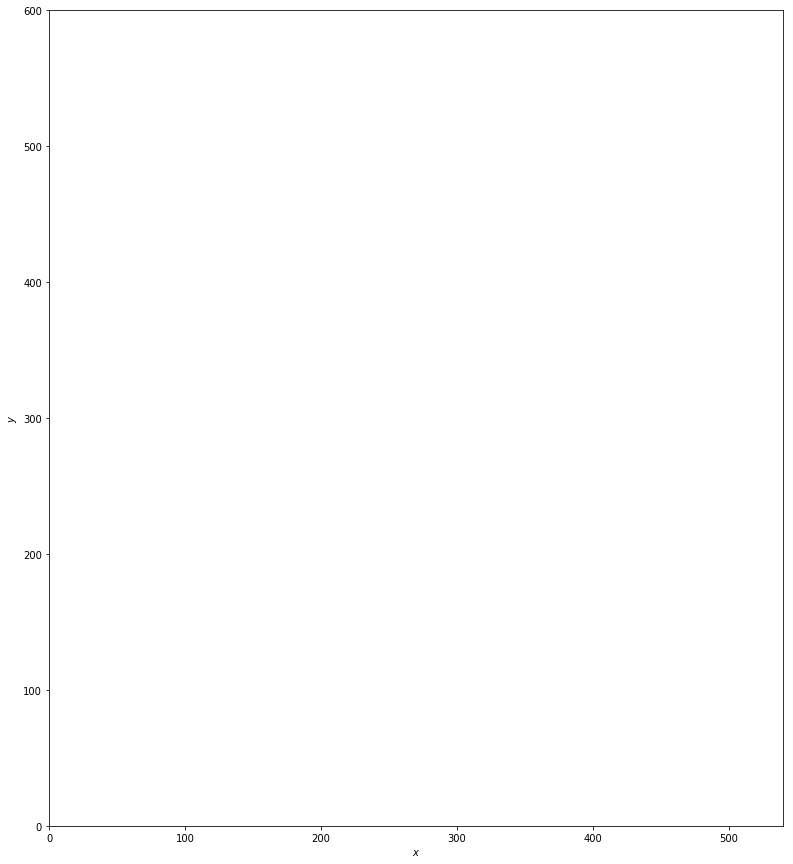

angle 0.0
move (1.0, 0.0)
408.689672372 431.185716991
297


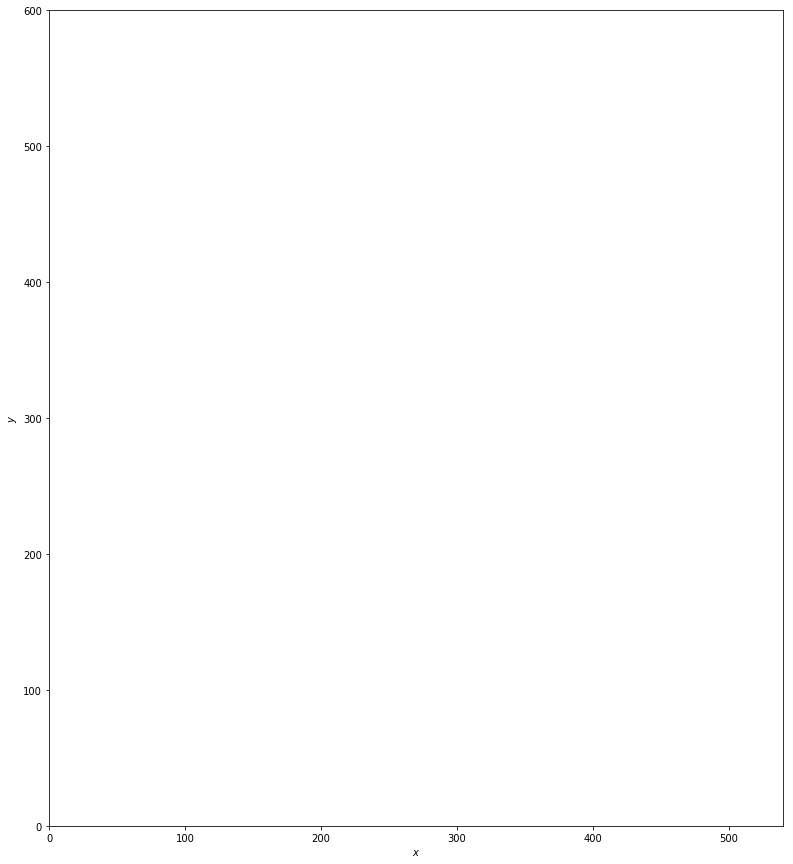

angle 0.0
move (1.0, 0.0)
409.689672372 431.185716991
298


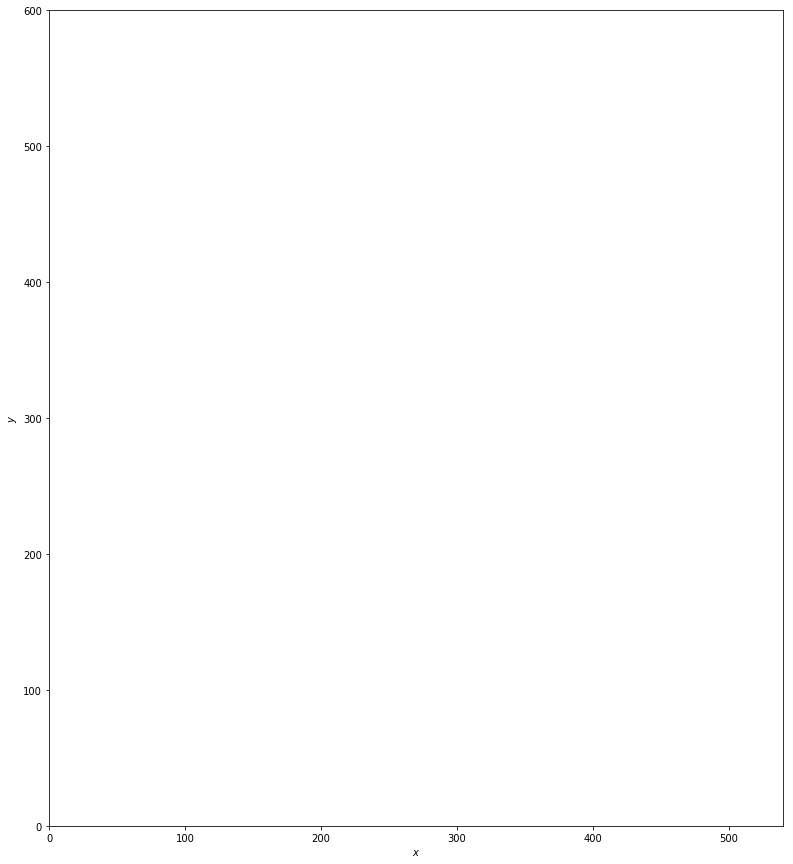

angle 0.0
move (1.0, 0.0)
410.689672372 431.185716991
299


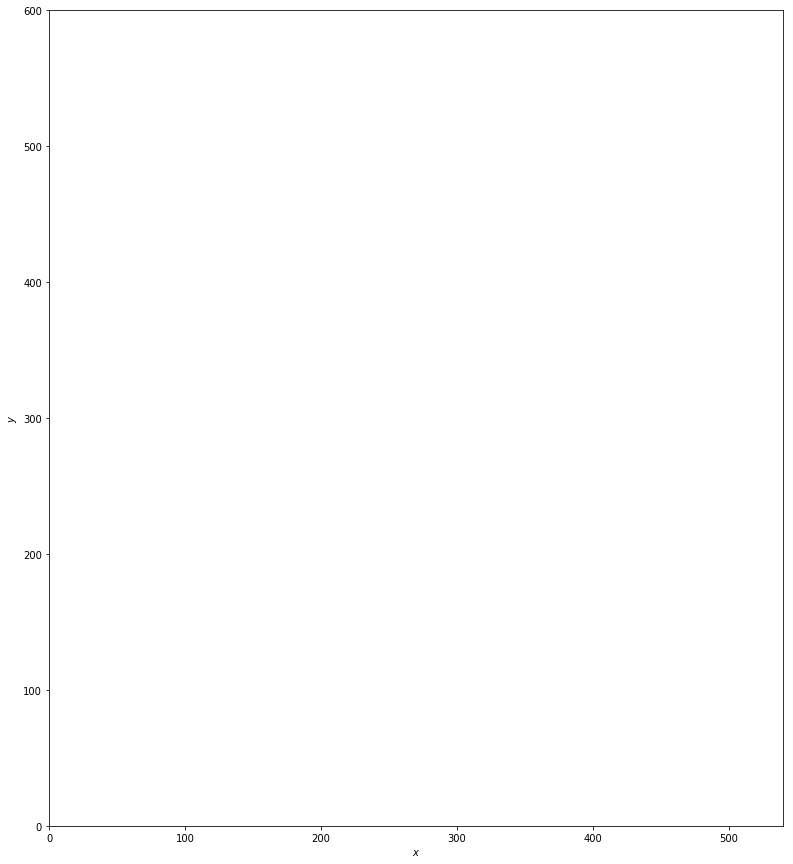

angle 0.0
move (1.0, 0.0)
411.689672372 431.185716991
300


In [14]:
cones = []




cones.append((1,(297.1497,558.3002)))   #Stage
cones.append((-1,(288.9881,558.1653)))   #Stage
cones.append((1,(337.0497,534.6002)))   #Start
cones.append((-1,(337.0497,515.0402)))   #Start
cones.append((1,(337.1997,536.4001)))   #
cones.append((1,(312.4497,536.4001)))   #
cones.append((1,(300.8997,539.4001)))   #
cones.append((1,(406.9497,521.4001)))   #
cones.append((1,(406.7997,511.0502)))   #
cones.append((1,(406.5297,477.3002)))   #
cones.append((1,(401.5797,444.1501)))   #
cones.append((1,(415.5297,383.2502)))   #
cones.append((-1,(407.8197,414.4502)))   #
cones.append((-1,(392.6697,475.2002)))   #
cones.append((-1,(369.5697,518.5502)))   #
cones.append((1,(372.8997,530.1002)))   #
cones.append((-1,(337.0497,512.8801)))   #
cones.append((-1,(311.5797,522.6902)))   #
cones.append((-1,(300.1797,522.6902)))   #
cones.append((-1,(289.3184,522.6902)))   #
cones.append((-1,(288.9881,540.8401)))   #
cones.append((-1,(422.8197,353.2501)))   #
cones.append((-1,(417.4197,323.8201)))   #
cones.append((-1,(416.6997,299.3701)))   #
cones.append((1,(429.4797,323.8201)))   #
cones.append((1,(430.1997,299.3701)))   #
cones.append((1,(430.1997,228.7201)))   #
cones.append((1,(406.8897,228.7201)))   #
cones.append((1,(383.4297,228.7201)))   #
cones.append((-1,(382.1397,254.8201)))   #
cones.append((-1,(347.2797,262.9201)))   #
cones.append((-1,(324.2697,310.9201)))   #
cones.append((-1,(321.5097,370.0201)))   #
cones.append((-1,(311.5797,380.8201)))   #
cones.append((-1,(278.7297,405.4201)))   #
cones.append((-1,(254.2797,481.6201)))   #
cones.append((-1,(253.5597,501.1201)))   #
cones.append((-1,(245.3997,505.7401)))   #
cones.append((1,(312.2997,307.8002)))   #
cones.append((1,(306.7197,362.7002)))   #
cones.append((1,(265.4697,435.1501)))   #
cones.append((1,(241.9197,476.0102)))   #
cones.append((1,(194.8197,510.0302)))   #
cones.append((1,(171.8697,465.1802)))   #
cones.append((1,(184.7697,388.3802)))   #
cones.append((1,(202.7697,323.2501)))   #
cones.append((-1,(196.4097,532.5602)))   #
cones.append((-1,(159.3597,524.9703)))   #
cones.append((-1,(159.3597,504.7502)))   #
cones.append((-1,(159.3597,484.6802)))   #
cones.append((-1,(159.3294,463.2902)))   #
cones.append((-1,(176.1294,420.6902)))   #
cones.append((-1,(193.9497,355.8902)))   #
cones.append((-1,(212.2497,288.3902)))   #
cones.append((1,(213.2697,209.2501)))   #
cones.append((1,(228.4197,168.1501)))   #
cones.append((1,(277.2897,159.1501)))   #
cones.append((1,(329.1897,168.8701)))   #
cones.append((1,(395.1597,159.3901)))   #
cones.append((1,(347.9997,228.7201)))   #
cones.append((1,(336.2097,252.1201)))   #
cones.append((-1,(200.5497,209.4001)))   #
cones.append((-1,(202.0497,179.4001)))   #
cones.append((-1,(202.0497,156.0001)))   #
cones.append((-1,(218.3997,156.0001)))   #
cones.append((-1,(269.1,146.2501)))   #
cones.append((-1,(277.5006,146.2501)))   #
cones.append((-1,(329.2478,157.5002)))   #
cones.append((-1,(395.0094,134.4001)))   #
cones.append((-1,(395.0094,111.0002)))   #
cones.append((1,(418.6194,158.0701)))   #
cones.append((1,(418.5594,129.9902)))   #
cones.append((-1,(359.7594,75.75018)))   #
cones.append((-1,(316.9494,75.75018)))   #
cones.append((-1,(265.56,51.90015)))   #
cones.append((-1,(218.0094,51.90015)))   #
cones.append((-1,(183.3297,68.25018)))   #
cones.append((-1,(164.7,115.3502)))   #
cones.append((-1,(163.26,118.8002)))   #
cones.append((-1,(161.5794,122.2502)))   #
cones.append((1,(405.5097,58.59015)))   #
cones.append((1,(395.6997,58.59015)))   #
cones.append((1,(359.6991,62.79016)))   #
cones.append((1,(316.6194,64.05029)))   #
cones.append((1,(264.5997,35.85034)))   #
cones.append((1,(219.5391,33.30029)))   #
cones.append((1,(188.9391,29.85034)))   #
cones.append((1,(174.6894,59.31018)))   #
cones.append((1,(154.2894,109.1105)))   #
cones.append((1,(152.5494,112.7402)))   #
cones.append((1,(151.2294,116.4902)))   #
cones.append((1,(117.3294,163.0801)))   #
cones.append((1,(117.3594,166.5601)))   #
cones.append((1,(117.3294,169.9202)))   #
cones.append((-1,(130.5449,169.9202)))   #
cones.append((-1,(148.3949,228.5402)))   #
cones.append((-1,(148.3949,251.1308)))   #
cones.append((1,(134.7294,229.5901)))   #
cones.append((1,(134.7294,251.1308)))   #
cones.append((1,(113.2794,286.4705)))   #
cones.append((-1,(124.2449,287.1905)))   #
cones.append((-1,(125.2043,347.7905)))   #Finish

cones.append((-1,(127.5136,347.7905)))   #
cones.append((-1,(122.8049,381.6602)))   #
cones.append((-1,(122.9543,399.2101)))   #
cones.append((-1,(123.1036,416.7602)))   #
cones.append((-1,(122.8049,434.3102)))   #
cones.append((-1,(122.6561,452.0102)))   #
cones.append((-1,(122.5074,469.5602)))   #
cones.append((-1,(122.6587,487.2602)))   #Exit
cones.append((1,(112.5594,347.7905)))   #Finish
cones.append((1,(110.3847,347.7905)))   #
cones.append((1,(112.5594,381.8102)))   #
cones.append((1,(112.4987,399.2101)))   #
cones.append((1,(112.4381,416.6102)))   #
cones.append((1,(112.3775,434.0102)))   #
cones.append((1,(112.3168,451.5602)))   #
cones.append((1,(112.5562,469.4102)))   #
cones.append((1,(112.1956,487.1102)))   #Exit

def isBetween(x, end1, end2):
    '''Return True if x is between the ends or equal to either.
    The ends do not need to be in increasing order.'''
    
    return end1 <= x <= end2 or end2 <= x <= end1

def add_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle + (sweep/2.0) < np.pi: 
        return angle + (sweep/2.0)
    else: 
        return angle + (sweep/2.0) - (2.0*np.pi)
    
def sub_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle - (sweep/2.0) > -np.pi: 
        return angle - (sweep/2.0)
    else: 
        return angle - (sweep/2.0) + (2.0*np.pi)
    
def angleIsBetween(Xpos,Ypos,angle,sweep,coords): 

    sweepadd = add_angle_sweep(angle,sweep)
    sweepsub = sub_angle_sweep(angle,sweep)

    if np.pi/2.0 >= angle >= -np.pi/2.0:
        #print(angle, 'Between -90 and 90')
        if sweep < np.pi:
            #print(angle, 'little sweep')  
            return isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        else:
            #print(angle, 'Big sweep')
            return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
    else:
        #print(angle, 'Not between -90 and 90')
        return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        
        


# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 293.0
Ypos = 558.0
angle = -np.pi/2
path = []
speed = 1.0
dist1 = 40.0**2.0
sweep1 = np.pi/1.1
dist2 = 100.0**2.0
sweep2 = np.pi/6.0
totaltries = 300
tries = 0
while not(Xpos < 122 and Xpos > 112 and Ypos > 487) and tries < totaltries:
    
   
        
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_xlim(0,540)
    ax1.set_ylim(0,600)
    ax1.set_aspect('equal')
    
    Ex = 0.0
    Ey = 0.0
    for conetype, coords in cones:
       # if ((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
       #     and (angle+sweep1 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep1) 
        #    or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
        #    and (angle+sweep2 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep2)):
        #    ex, ey = E(conetype, coords, x=Xpos, y=Ypos)
        if ((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
            and (angleIsBetween(Xpos,Ypos,angle,sweep1,coords)) 
            or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
            and (angleIsBetween(Xpos,Ypos,angle,sweep2,coords))):
            ex, ey = E(conetype, coords, x=Xpos, y=Ypos)
            Ex += ex
            Ey += ey
            
            
            

            # Add filled circles for the cones themselves
            cone_colors = {True: '#aa0000', False: '#0000aa'}

            ax1.add_artist(Circle(coords, 1.2, color=cone_colors[conetype>0]))
    

            
            
            
            
            print('yes', conetype, coords)
        
    
    #print(Ex,Ey)
    plt.show()
    print('angle',(angle*180/np.pi))
    angle = np.arctan2(Ey, Ex)    
   
    newx=  np.cos(angle) * speed
    newy= np.sin(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    print ('move',(newx, newy))
    print(Xpos, Ypos)
    print(tries)
    #time.sleep(.5)

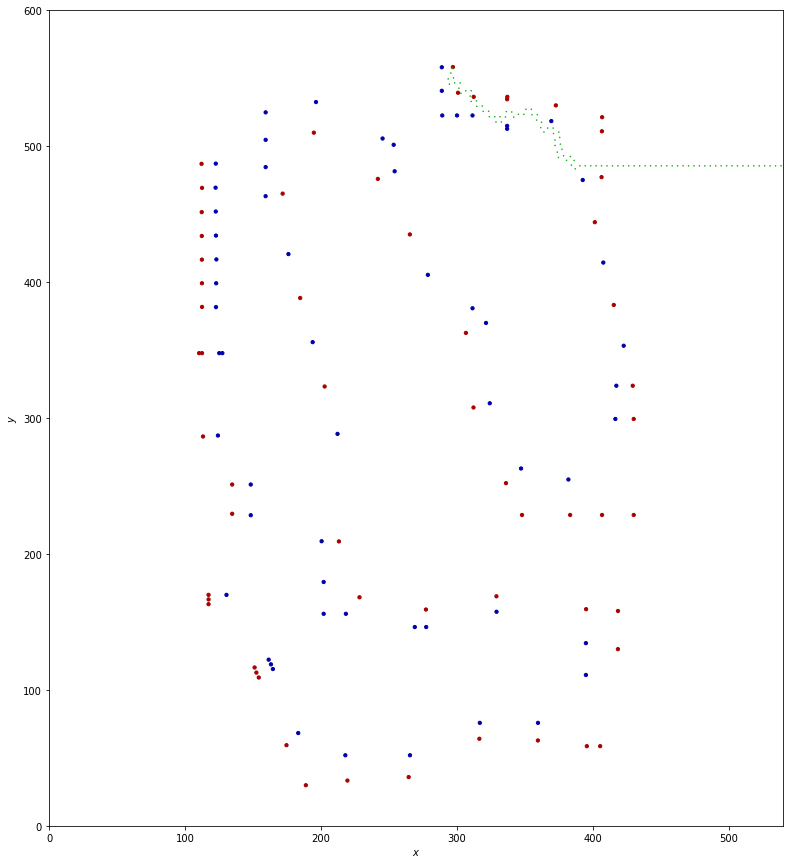

In [12]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 1.2, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.2, color='#00aa00'))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0,540)
ax.set_ylim(0,600)
ax.set_aspect('equal')
plt.show()

In [14]:
print((1,0),np.arctan2(1,0),np.arctan2(1,0)*180/np.pi)
print((0,1),np.arctan2(0,1)*180/np.pi)
print((-1,-0),np.arctan2(-1,0)*180/np.pi)
print((0.001,-1),np.arctan2(0.001,-1)*180/np.pi)
print((-0.001,-1),np.arctan2(-0.001,-1)*180/np.pi)

(1, 0) 1.57079632679 90.0
(0, 1) 0.0
(-1, 0) -90.0
(0.001, -1) 179.94270424
(-0.001, -1) -179.94270424


In [83]:
 # subset the cones to ones only within 'range'
    
cones = []




cones.append((1,(297.0,558.0)))   #Stage
cones.append((-1,(289,558.0)))   #Stage
cones.append((1,(337.0,534.6)))   #Start
cones.append((-1,(337.0497,515.0402)))   #Start
cones.append((1,(337.1997,536.4001)))   #
cones.append((1,(312.4497,536.4001)))   #
cones.append((1,(300.8997,539.4001)))   #
cones.append((1,(406.9497,521.4001)))   #
cones.append((1,(406.7997,511.0502)))   #


def isBetween(x, end1, end2):
    '''Return True if x is between the ends or equal to either.
    The ends do not need to be in increasing order.'''
    
    return end1 <= x <= end2 or end2 <= x <= end1

def add_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle + (sweep/2.0) < np.pi: 
        return angle + (sweep/2.0)
    else: 
        return angle + (sweep/2.0) - (2.0*np.pi)
    
def sub_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle - (sweep/2.0) > -np.pi: 
        return angle - (sweep/2.0)
    else: 
        return angle - (sweep/2.0) + (2.0*np.pi)
    
def angleIsBetween(Xpos,Ypos,angle,sweep,coords): 

    sweepadd = add_angle_sweep(angle,sweep)
    sweepsub = sub_angle_sweep(angle,sweep)

    if np.pi/2.0 >= angle >= -np.pi/2.0:
        #print(angle, 'Between -90 and 90')
        if sweep < np.pi:
            #print(angle, 'little sweep')  
            return isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        else:
            #print(angle, 'Big sweep')
            return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
    else:
        #print(angle, 'Not between -90 and 90')
        return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        
        


Xpos = 293.0
Ypos = 558.0
angle = -np.pi/2.0
print(angle, angle*180/np.pi)
dist1 = 20.0**2.0

sweep1 = np.pi/1.8*2.0
print('sweep1',sweep1, sweep1*180/np.pi)
dist2 = 150**2.0

sweep2 = np.pi/8.0*2.0
print('sweep2',sweep2, sweep2*180/np.pi)

for dir, coords in cones:
    print(' ')
    print(dir, coords)
    print(coords[0]-Xpos, coords[1]-Ypos)
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) , dist1 )
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1 )
    print('angle+sweep1',angle+sweep1)
    
    sweep1p = add_angle_sweep(angle,sweep1) 
    print('sweep1p',sweep1p*180/np.pi)    
    
    sweep1n = sub_angle_sweep(angle,sweep1) 
    print('sweep1n',sweep1n*180/np.pi) 
    
   
        
    print((sweep1p*180.0/np.pi , np.arctan2( coords[1]-Ypos,coords[0]-Xpos)*180.0/np.pi , sweep1n*180.0/np.pi))
    #print((sweep1p > np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > sweep1n))
    print((isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),sweep1p,sweep1n)))
    
    
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) , dist2)
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2)
    
    print('angle+sweep2',angle+sweep2)
    
    sweep2p = add_angle_sweep(angle,sweep2) 
    print('sweep2p',sweep2p*180/np.pi)    
    
    sweep2n = sub_angle_sweep(angle,sweep2) 
    print('sweep2n',sweep2n*180/np.pi) 
    
    print(sweep2p*180.0/np.pi ,  np.arctan2( coords[1]-Ypos,coords[0]-Xpos)*180.0/np.pi , sweep2n*180.0/np.pi)
    #print(angle+sweep2 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep2)
    print((isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),sweep2p,sweep2n)))
    print((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
          and (angleIsBetween(Xpos,Ypos,angle,sweep1,coords)) 
          or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
          and (angleIsBetween(Xpos,Ypos,angle,sweep2,coords)))
    print(angleIsBetween(Xpos,Ypos,angle,sweep1,coords))
    print(angleIsBetween(Xpos,Ypos,angle,sweep2,coords))
   
        

-1.5707963267948966 -90.0
sweep1 3.490658503988659 200.0
sweep2 0.7853981633974483 45.0
 
1 (297.0, 558.0)
4.0 0.0
16.0 400.0
True
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, 0.0, 170.0)
False
16.0 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 0.0 -112.5
False
True
True
False
 
-1 (289, 558.0)
-4.0 0.0
16.0 400.0
True
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, 180.0, 170.0)
False
16.0 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 180.0 -112.5
False
True
True
False
 
1 (337.0, 534.6)
44.0 -23.399999999999977
2483.559999999999 400.0
False
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, -28.004857388043625, 170.0)
False
2483.559999999999 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 -28.004857388 -112.5
False
False
True
False
 
-1 (337.0497,

In [72]:
a = True
b = False

print (a, b, not a, not b)

True False False True
